In [2]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# warnings
import warnings
warnings.filterwarnings('ignore')




C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Data Reading
data= pd.read_csv(r'C:\Users\DELL\Desktop\FinalYear\StressDetection\sentiment_analysis_term_train.csv')

# Copy
stress=data.copy()

# Data
stress.head()

,text,label
0,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,neg
1,बैटरी लाइफ बहुत बढिया है।,pos
2,हकीकत ये है कि मेटल के नाम पर फोन में सिर्फ चा...,neu
3,स्लोफो एक मनोरंजक एप्लिकेशन है इसमें कोई दो रा...,pos
4,अच्छी बैटरी क्षमता है।,pos


In [3]:
# Statistical Information
stress.describe()

,text,label
count,2497,2497
unique,2497,3
top,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,pos
freq,1,1147


In [4]:
# Delete rows with 'neu' label
data = data[data['label'] != 'neu']

# Convert 'pos' to 1 and 'neg' to 0
data['label'] = data['label'].map({'pos': 1, 'neg': 0})

# Print the resulting DataFrame
data.head()

,text,label
0,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,0
1,बैटरी लाइफ बहुत बढिया है।,1
3,स्लोफो एक मनोरंजक एप्लिकेशन है इसमें कोई दो रा...,1
4,अच्छी बैटरी क्षमता है।,1
5,बैटरी लाइफ की बात करें तो हमारे लगातार वीडियो ...,1


In [5]:
from googletrans import Translator

# Initialize translator
translator = Translator()

# Function to translate text
def translate_text(text, source_lang):
    try:
        translation = translator.translate(text, src=source_lang, dest='en')
        return translation.text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

# Apply translation using Google Translate
data['text'] = data.apply(lambda row: translate_text(row['text'], source_lang="hi"), axis=1)

# Remove rows with translation errors
data = data.dropna(subset=['text'])


Translation error: The read operation timed out


In [6]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

#Data Reading
stress_c= pd.read_csv(r'C:\Users\DELL\Desktop\FinalYear\StressDetection\Stress.csv')

# Copy
stress=stress_c.copy()

# Data
stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [7]:
# Select only 'text' and 'label' columns
stress = stress[['text', 'label']]

# Print the resulting DataFrame
stress.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [3]:
# # Concatenate the rows of 'stree' onto 'data'
# merged_data = pd.concat([data, stress], ignore_index=True)

# # Print the concatenated DataFrame
# print(merged_data)
REDDIT = r'C:\Users\DELL\Desktop\FinalYear\StressDetection\Reddit_Combi.csv'
USECOLS = ['Body_Title', 'label']
merged_data = pd.read_csv(filepath_or_buffer=REDDIT, sep=';', usecols=USECOLS)
merged_data.head()
# merged_data=pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi.csv')
# merged_data = merged_data[['Body_title', 'label']]
# merged_data.head()

,Body_Title,label
0,Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,1


In [13]:
# Calculate the percentage of each label
label_counts = merged_data['label'].value_counts(normalize=True) * 100

# Print the percentage of each label
print("Percentage of label 0:", label_counts[0])
print("Percentage of label 1:", label_counts[1])

Percentage of label 0: 12.103746397694524
Percentage of label 1: 87.89625360230548


In [14]:
# Regular Expression
import re 

# Handling string
import string

# NLP tool
import spacy

nlp=spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

# Importing Natural Language Tool Kit for NLP operations
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')                                
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
# Defining function for preprocessing
def preprocess(text, remove_digits=True):
    text = re.sub(r'\W+', ' ', text)  # Using raw string literal
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"(?<!\w)\d+", "", text)
    text = re.sub(r"-(?!\w)|(?<!\w)-", "", text)
    text = text.lower()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = ' '.join([word for word in nopunc.split()
                       if word.lower() not in stopwords.words('english')])
    return nopunc

# Defining a function for lemmatization
def lemmatize(words):
    words = nlp(words)
    lemmas = []
    for word in words:
        lemmas.append(word.lemma_)
    return lemmas

# Converting them into string
def listtostring(s):
    str1 = ' '
    return str1.join(s)

def clean_text(input):
    word = preprocess(input)
    lemmas = lemmatize(word)
    return listtostring(lemmas)


In [4]:
# Creating a feature to store clean texts
# merged_data['clean_text']=merged_data['Body_Title'].apply(clean_text)
# merged_data.to_csv('Reddit_Combi_clean_text.csv', index=False)
merged_data= pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi_clean_text.csv')
merged_data.head()


,Body_Title,label,clean_text
0,Envy to other is swallowing me Im from develop...,1,envy swallow I m developingcountry indonesia t...
1,Nothin outta the ordinary. Paradise. Job stres...,1,nothin outta ordinary paradise job stress life...
2,Almost 49 and the chasm of emptiness has never...,1,almost chasm emptiness never greater diagnose ...
3,I’m happy again After my closest friend left m...,0,happy close friend leave april finally let go ...
4,Is it possible to recover from such a traumati...,1,possible recover traumatic childhood yet feel ...


In [5]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertForSequenceClassification
import torch


# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [6]:
# Defining target & feature for ML model building
x=merged_data['clean_text']
y=merged_data['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from time import time

def train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer='tfidf'):
    if vectorizer == 'tfidf':
        vector = TfidfVectorizer()
    elif vectorizer == 'bow':
        vector = CountVectorizer()
    elif vectorizer == 'onehot':
        vector = OneHotEncoder()
        x_train = vector.fit_transform(x_train).toarray()
        x_test = vector.transform(x_test).toarray()
    
    else:
        raise ValueError("Vectorizer should be one of 'tfidf', 'bow', or 'onehot'.")

    if vectorizer != 'onehot':
        x_train = vector.fit_transform(x_train)
        x_test = vector.transform(x_test)
 
    # Fitting training data into the model & predicting
    t0 = time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print('Time taken:', time() - t0)
    print('Accuracy:', acc)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc

# Example usage:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Define your model
model = LogisticRegression()

# Train and evaluate the model using TF-IDF
true_labels, predicted_labels, accuracy = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer='tfidf')


# Train and evaluate the model using bag-of-words
#true_labels, predicted_labels, accuracy = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer='bow')

# Train and evaluate the model using one-hot encoding
#true_labels, predicted_labels, accuracy = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer='onehot')




Time taken: 0.0356295108795166
Accuracy: 0.8928
Confusion Matrix:
 [[  7  65]
 [  2 551]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.10      0.17        72
           1       0.89      1.00      0.94       553

    accuracy                           0.89       625
   macro avg       0.84      0.55      0.56       625
weighted avg       0.88      0.89      0.85       625



In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from time import time
import pandas as pd

def train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer):
    if vectorizer == 'tfidf':
        vector = TfidfVectorizer()
    elif vectorizer == 'bow':
        vector = CountVectorizer()
    elif vectorizer == 'onehot':
        raise ValueError("One-hot encoding is not applicable for text data.")
    else:
        raise ValueError("Vectorizer should be one of 'tfidf', 'bow', or 'onehot'.")

    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    # Fitting training data into the model & predicting
    t0 = time()
    model.fit(x_train.toarray(), y_train)  # Convert sparse matrix to dense array
    y_pred = model.predict(x_test.toarray())  # Convert sparse matrix to dense array
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return acc, f1

# Example usage:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    acc, f1 = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, 'tfidf')
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df)


                     Model  Accuracy  F1 Score
0      Logistic Regression    0.8928  0.854000
1                      SVM    0.8976  0.863663
2            Decision Tree    0.8608  0.859507
3            Random Forest    0.8848  0.830721
4                 AdaBoost    0.9136  0.905074
5  Multinomial Naive Bayes    0.8848  0.830721
6     Gaussian Naive Bayes    0.7872  0.797743


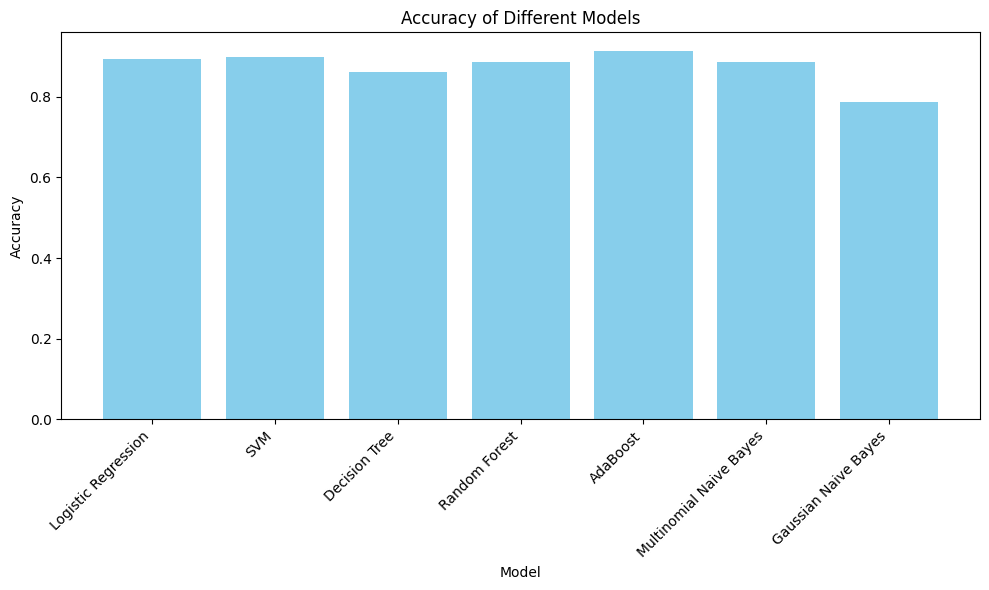

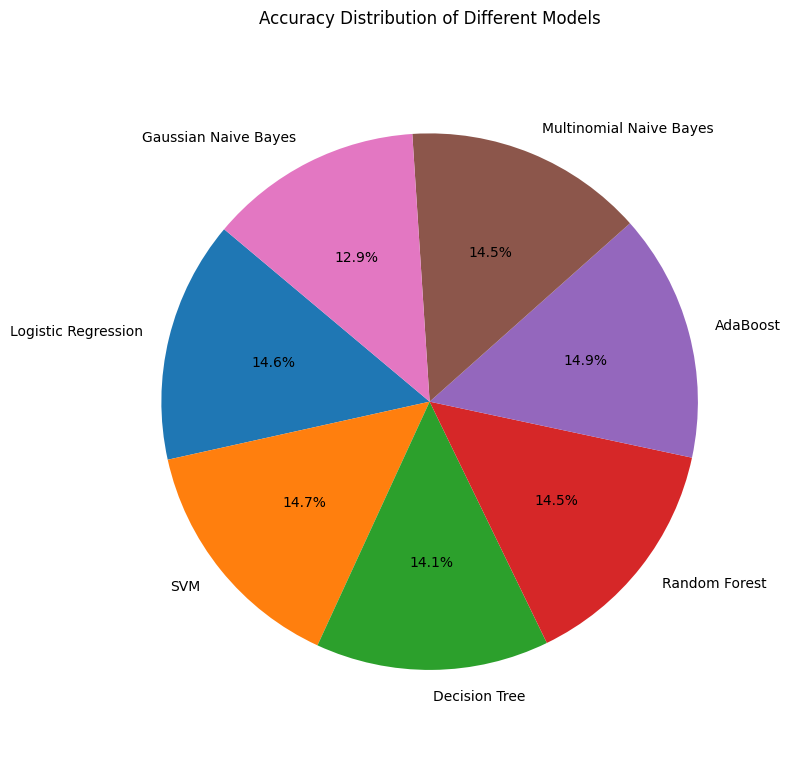

In [8]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(results_df['Accuracy'], labels=results_df['Model'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Accuracy Distribution of Different Models')
plt.tight_layout()
plt.show()


In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from time import time
import pandas as pd

def train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer):
    if vectorizer == 'tfidf':
        vector = TfidfVectorizer()
    elif vectorizer == 'bow':
        vector = CountVectorizer()
    else:
        raise ValueError("Vectorizer should be one of 'tfidf' or 'bow'.")

    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    # Fitting training data into the model & predicting
    t0 = time()
    model.fit(x_train.toarray(), y_train)  # Convert sparse matrix to dense array
    y_pred = model.predict(x_test.toarray())  # Convert sparse matrix to dense array
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return acc, f1

# Example usage:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB() 
}

results = []

for name, model in models.items():
    acc, f1 = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, 'bow')
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df)


                     Model  Accuracy  F1 Score
0      Logistic Regression    0.9264  0.922325
1                      SVM    0.9056  0.876989
2            Decision Tree    0.8784  0.874407
3            Random Forest    0.8848  0.830721
4                 AdaBoost    0.9200  0.911332
5  Multinomial Naive Bayes    0.9104  0.888508
6     Gaussian Naive Bayes    0.7904  0.799830


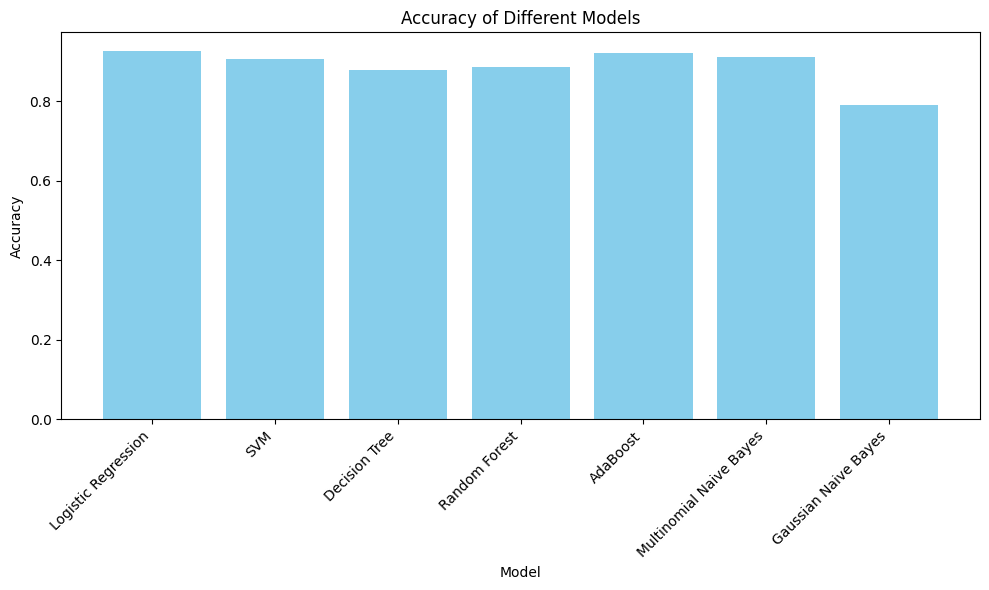

In [10]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from time import time
import pandas as pd
import numpy as np

def train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer, ngram_range=(1, 1)):
    if vectorizer == 'tfidf':
        vector = TfidfVectorizer(ngram_range=ngram_range)
    elif vectorizer == 'ngrams':
        vector = CountVectorizer(ngram_range=ngram_range)
    else:
        raise ValueError("Vectorizer should be one of 'tfidf' or 'ngrams'.")

    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)

    # Fitting training data into the model & predicting
    t0 = time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return acc, f1

# Example usage:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),
    "Multinomial Naive Bayes": MultinomialNB(),
}

ngram_range = (1, 2)  # Example: unigrams and bigrams

results = []

for name, model in models.items():
    acc, f1 = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, 'ngrams', ngram_range=ngram_range)
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df)


                     Model  Accuracy  F1 Score
0      Logistic Regression    0.9312  0.923404
1                      SVM    0.8976  0.859441
2            Decision Tree    0.8720  0.866869
3            Random Forest    0.8848  0.830721
4                 AdaBoost    0.9216  0.915638
5  Multinomial Naive Bayes    0.8848  0.830721


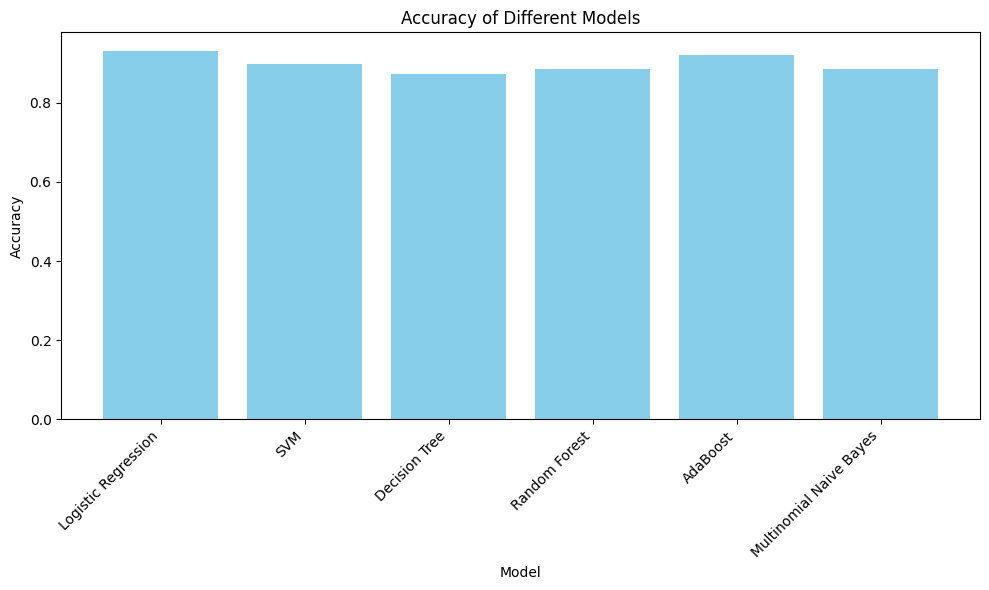

In [12]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def one_hot_encode_texts(texts):
    # Create a CountVectorizer to build the vocabulary
    vectorizer = CountVectorizer(binary=True)
    one_hot_encoded = vectorizer.fit_transform(texts).toarray()
    return one_hot_encoded, vectorizer

def train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer):
    if vectorizer == 'tfidf':
        vector = TfidfVectorizer()
        x_train = vector.fit_transform(x_train)
        x_test = vector.transform(x_test)
    elif vectorizer == 'bow':
        vector = CountVectorizer()
        x_train = vector.fit_transform(x_train)
        x_test = vector.transform(x_test)
    elif vectorizer == 'onehot':
        x_train, vector = one_hot_encode_texts(x_train)
        x_test = vector.transform(x_test).toarray()
    else:
        raise ValueError("Vectorizer should be one of 'tfidf', 'bow', or 'onehot'.")

    # Fitting training data into the model & predicting
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return acc, f1, conf

# Load the dataset
df = pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi_clean_text.csv')

# Check the column names
print(df.columns)

# Assuming the correct column name is 'body_title' and 'label'
x = df['clean_text']
y = df['label']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    acc, f1, conf = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, 'onehot')
    results.append([name, acc, f1, conf])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Confusion Matrix"])
print(results_df)


Index(['Body_Title', 'label', 'clean_text'], dtype='object')
                     Model  Accuracy  F1 Score       Confusion Matrix
0      Logistic Regression    0.9264  0.919822  [[37, 35], [11, 542]]
1                      SVM    0.9072  0.878219   [[14, 58], [0, 553]]
2            Decision Tree    0.8720  0.870402  [[30, 42], [38, 515]]
3            Random Forest    0.8864  0.834583    [[1, 71], [0, 553]]
4                 AdaBoost    0.9120  0.902895  [[31, 41], [14, 539]]
5  Multinomial Naive Bayes    0.8944  0.857281    [[8, 64], [2, 551]]
6     Gaussian Naive Bayes    0.7920  0.800873  [[15, 57], [73, 480]]


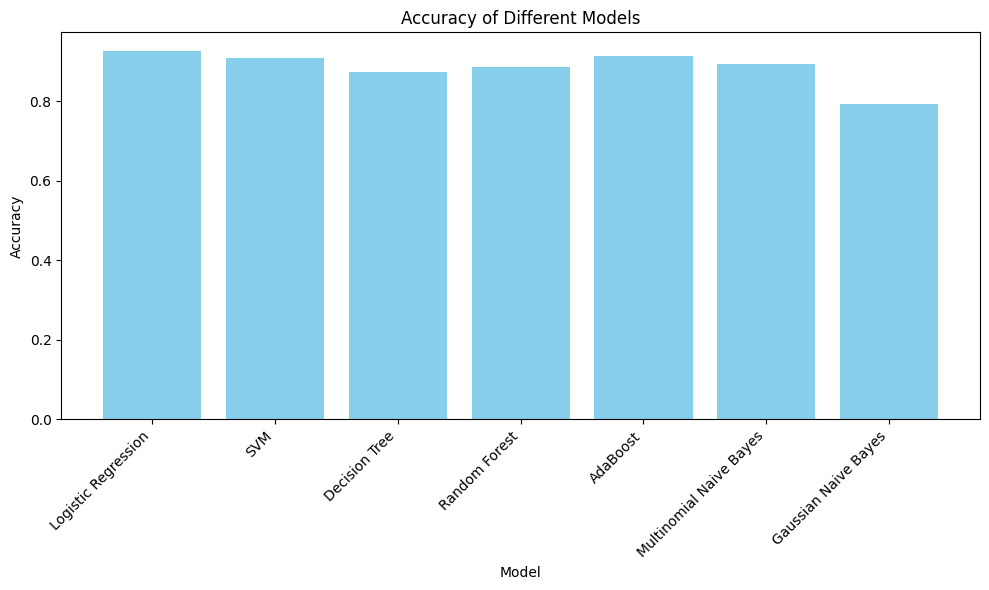

In [14]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [15]:
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import torch
import numpy as np
import pandas as pd
import psutil
import os

def print_memory_usage():
    process = psutil.Process(os.getpid())
    print(f"Memory usage: {process.memory_info().rss / (1024 ** 2)} MB")

# Load pre-trained BERT model and tokenizer
print("Loading BERT model and tokenizer...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Load dataset
df = pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi_clean_text.csv')

# Check the column names
print(df.columns)

# Assuming the correct column names are 'clean_text' and 'label'
x = df['clean_text'].tolist()
y = df['label'].tolist()

# Use a smaller subset for debugging
x = x[:100]  # Using only 100 samples for initial debugging
y = y[:100]

print("Dataset loaded. Generating BERT embeddings...")

# Function to get BERT embeddings
def get_bert_embeddings(texts, batch_size=8):  # Reduce batch size further
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = bert_model(**inputs)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        embeddings.append(batch_embeddings)
        print_memory_usage()  # Print memory usage for debugging
    return np.vstack(embeddings)

# Get BERT embeddings for the dataset
bert_embeddings = get_bert_embeddings(x)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(bert_embeddings, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df)


Loading BERT model and tokenizer...
Index(['Body_Title', 'label', 'clean_text'], dtype='object')
Dataset loaded. Generating BERT embeddings...
Memory usage: 1045.87890625 MB
Memory usage: 1066.06640625 MB
Memory usage: 1046.328125 MB
Memory usage: 1046.2890625 MB
Memory usage: 1056.328125 MB
Memory usage: 1043.65625 MB
Memory usage: 1032.390625 MB
Memory usage: 1035.796875 MB
Memory usage: 1051.015625 MB
Memory usage: 1056.84765625 MB
Memory usage: 1093.4453125 MB


In [ ]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [3]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Example dataset (replace with your own data)
# x = ["text document 1", "text document 2", ...]
# y = [0, 1, ...]  # Labels
df = pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi_clean_text.csv')

# Split the data into features (X) and target labels (y)
x = df['clean_text']
y = df['label']

# Tokenize documents and prepare tagged data for Doc2Vec
tagged_data = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(x)]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4)

# Get document embeddings
doc_embeddings = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data]

# Convert embeddings to numpy array
doc_embeddings = np.array(doc_embeddings)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(doc_embeddings, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' to account for class imbalance
    results.append([name, accuracy, f1])

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df)


                  Model  Accuracy  F1 Score
0   Logistic Regression    0.8896  0.866667
1                   SVM    0.9040  0.883386
2         Decision Tree    0.8480  0.851039
3         Random Forest    0.9008  0.873349
4              AdaBoost    0.8992  0.893216
5  Gaussian Naive Bayes    0.8176  0.843387


In [ ]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(results_df['Accuracy'], labels=results_df['Model'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Accuracy Distribution of Different Models')
plt.tight_layout()
plt.show()


In [4]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi_clean_text.csv')

# Split the data into features (X) and target labels (y)
x = df['clean_text']
y = df['label']

# Tokenize documents and prepare tagged data for Doc2Vec
tagged_data = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(x)]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4)

# Get document embeddings
doc_embeddings = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data]

# Convert embeddings to numpy array
doc_embeddings = np.array(doc_embeddings)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(doc_embeddings, y, test_size=0.2, random_state=42)

# Initialize Gaussian Process Classifier with RBF kernel
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)

# Train the classifier
gpc.fit(x_train, y_train)

# Predict on test set
y_pred = gpc.predict(x_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score

# Print accuracy and F1 score
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.9296
F1 Score: 0.9251351296390443


In [ ]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(results_df['Accuracy'], labels=results_df['Model'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Accuracy Distribution of Different Models')
plt.tight_layout()
plt.show()


In [ ]:
# //ignore this cell


from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import torch
import pandas as pd

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Example dataset (replace with your own data)
df = pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi_clean_text.csv')

# Split the data into features (X) and target labels (y)
x = df['clean_text']
y = df['label']

# Tokenize input texts
x_tokenized = tokenizer(x.tolist(), padding=True, truncation=True, return_tensors='pt')

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tokenized['input_ids'], y, test_size=0.2, random_state=42)

# Define optimizer and criterion
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Convert y_train to a list
y_train = y_train.tolist()

# Training loop
model.train()
for epoch in range(3):  # Adjust as needed
    for i in range(0, len(x_train), 32):  # Mini-batch size of 32, adjust as needed
        batch_x = x_train[i:i+32]
        batch_y = torch.tensor(y_train[i:i+32]).long()  # Convert to tensor
        optimizer.zero_grad()
        outputs = model(input_ids=batch_x, labels=batch_y)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(input_ids=x_test)
    predictions = torch.argmax(outputs.logits, dim=1).numpy()

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Python312\Lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


: 

ValueError: Exception encountered when calling layer 'keras_layer_3' (type KerasLayer).

Setting hub.KerasLayer.trainable = True is unsupported when loading from the TF1 Hub format.

Call arguments received by layer 'keras_layer_3' (type KerasLayer):
  • inputs=["'jars glenn mixer gl attractive design also make special oil seal allow powder make come'", "'four chrombook chiclet keyboard easy use'", "'come live we leave alone waste mind would boyfriend she s marry eventually move back dad everything fine call talk sound like life together well break short period time move live half sibling would drink excessively call cry life'", "'make feel small left feel angry really fucking angry want call office make fuss want behind angry someone could really think way angry'", "'problem kind mistake make one even fix shift know say helpful diffuse tension pretty sure coworker hate like everybody always already panic attack different time work'", "'going happen still feel sanity happiness stability well ever anvil head hashtag'", "'friend party man whisper ear like stare touch later date friend know want upset car man lady cut get road rage say want drag car hair cut nipple later say obviously mean'", "'need help talk still good person even mess sometimes long try ok afraid people leave make sad mean annoy anything hold even try improve make concentrated effort change crippling catastrophic thought'", "'greet message facebook account disabled try log couple month back immediately send appeal i d proof form two month response basically appeal go trash account really important exclude family photo memory own couple page huge fan follow'", "'week ago find note open computer write question ask psychic reading stuff one guy worth pursue guy refer online friend state extensive conversation talk long course label friend albeit grow fascinated offer open relationship partly entertain idea mostly de escalate could relationship end event'", "'relate tl dr something stupid work coworker call rightfully apologize accept good stop think dwell'", "'survey usually take minute less complete take long like please note survey well view via computer screen rather mobile phone interested link url'", "'seventh grade start school activity last trimester school year split three trimester sign different activity trimester last trimester start club anime manga fanclub receive email activity many people sign club really boost self confidence everyone really seem enjoy activity'", "'lean kiss tongue embarrass first kiss next time see stick finger even though say unzipped pant kick ride bike way home blood run leg tell dad afraid would beat'", "'tablet light thin quite comfortable use'", "'absence flash tablet also cause reason'", "'remember feel like anxious one medicine none one put take edge even play xbox live without hold breath get anxious people hear breathe mute mic give lung reprieve go back hold thank read little rant'", "'talk feature key pad good quality make phone use comfortable'", "'htc one series especially know well photography great music ability'", "'would picture think love interest start date really different style normal type different interest however amazing fun personality sense humor mesh really well together another big thing make we perfect fact get first love relationship year one year meet'", "'try avoid social medium know anxiety provoking join ultimately think would make feel connected people kind okay course look everyone highlight reel friend count especially envious help feel like crap social life come standstill early compartmentalized facet life ensure people knew never intermingle'", "'stop tell someone work say wrong look say day really go stuff keep push college back want nurse want anything hermit go live wood really look response tired people listen believe life do'", "'digifleep pro tablet unique combination design performance'", "'hi r assistance dad traumatic brain injury car accident two year ago victim another driver recklessness negligence rear end twice stop stoplight force retire permanently disabled deal effect permanent brain damage rest life dad require constant caretaker exhibit symptom similar alzheimer dementia patient mom unable work either'", "'become two side battle within one hand want we build life together experience love relationship day want absolve obsessed'", "'trauma survivor often need awareness need feel safe secure spite awareness tell first sign anxiety depression traumatize people spiral toxic shame depend wounding message receive abuser feel effect anxiety depression also deep shame defective good enough many survivor emotionally physically abandon deep root knowledge fact insufficiently love live constant reminder brain body deprive basic human right'", "'lot storage space'", "'sensation last hour seem like circulation problem panic course end er time doctor come see immediately want talk anxiety say could run test think would help'", "'good time plant tree year ago second good time today new favorite quote know anxiety cripple we accomplish one simple task put one stop close recovery today get haircut make excuse month keep cancel appointment'", "'version event believe due ten witness deny expel immediately get home unexpectedly bag already pack sister law walk give insincere hug say action consequence go portland two week early ask could say goodbye niece nephews friend say'", "'extext storage'", "'wait reach phase stop small seafood restaurant along way sit charge phone consult reddit one man work place ask person work place eighteen year golden grill tooth tell start brunswick ended matter'", "'change way think understand catch feeling despite sex admittedly catch feeling want continue since enjoy company vibe well together tl dr meet cool girl might feeling tell current intention date really fwb hangout'", "'really like roommate suitemate cool besides loud night know sleep well different place know want put hassle anyone suggestion please let know honestly come vent'", "'quite fast due tagra processor'", "'know expect want alone law enforcement officer small town road injury never severe though'", "'go to try keep short possible meet month ago instant chemistry fall love pretty quickly use talk time surprised feeling never feel like anyway month ago start call less would still drive hour come see communication we see lacklustre usually clingy used talk phone several time day turn minute call'", "'would suffice drastically help boost income time frame repayment list include tip bad scenario word loan may repaid soon thank consideration sean'", "'important thing smartphone despite low price tremendous feature'", "'fond exciting game lot munnar'", "'start get jaw ache collarbone pain back pain e several time every time healthy bar one time chest wall muscle inflammation course pain panic cycle go hour want know happen help doctor do not listen say well doseage put back pill knock ruin function life anyone else get similar thing deal doctor do not care'", "'try cheese pretty intense flavor highly sensitive person think cause stress stand hour feel drop feel stomach know sign get food sit dad happy check cheese risk wait chill whole body feel drop sensation hearing start going start get warm felt like pin needle body'", "'person live husband basically try imply mad husband abuse never sick shit tl dr alcoholic mother negative aspect life guilte feel sorry know'", "'consume quite lot caffeine mg per day summer medicate mg methylphenidate adhd rarely take caffeine methylphenidate together lot side effect one anxiety increase heart rate take methylphenidate high bp chest pain appointment cardiologyst trial exam year old really possible chest angina age'", "'want chalk finance finance nearly bad start think maybe something else going finally get job work towards entire life get settlement opportunity thing talk entire life begin experience odd feeling call confidence confidence confident situation finally improve relationship continue deteriorate attempt exert level control yet experience say something time resist'", "'help greatly appreciate sure pay forward back foot thank edit remove bitcoin address miss rule sorry edit2 thank much'", "'satsang ashram locate southwest deoghar one major pilgrimage center jharkhand'", "'hi post lot sub constantly figure submit post step deal panic attack anxious intrusive thought hope able help way help'", "'ptsd upset panic attack sympathize way go abandon restaurant find car know'", "'trust anyone especially go fucking crazy feel really conclusion life currently psych ward involuntarily admit january pay close k day stint one give shit even attempt ask question mental health day option plus take work indefinitely basket sake'", "'young child include rajendra gupta kk raina deepti mishra navni parihar fill story character'", "'snow valley fun park bahang tourist make journey manali memorable spending two moment peace knock'", "'laugh loudly couple people surprise many other stay silent faith young fool go heaven john god love worl know jesus say faith without good work awkward silence still stand close face turn away find much later kick food place disrespectful pastor come preach'", "'soon front scene front hotel step road peak kanchanjungha welcome we'", "'button make strict plastic look cheap hard press respond power button late unlocked phone'", "'need information emotional right know thinking straight probably miss something research advice info resource organization apply help pay greatly appreciate kansas help thank'", "'honest apologetic could try understand naive confused try give time understand less less sign facebook weekend corrine suggest people add'", "'outer shell phone e chassie make polycarbonate quite strong'", "'keep go back even clean mess make smash stuff drop dream approve sorry long post suck hear situation want friend back recover use funniest happy guy around broken'", "'new operating system'", "'brother usually get along reason make really angry point like become pretty level head guy never really yell get angry anyone reason come brother anger get overwhelming one get point anger start sweat shake never hurt major way thing annoy little thing like ignore respond talk lack eye contact generally ignore disregard attempt communication wanna like towards really know'", "'sunday th go outside drink margarita year old follow ignore we day go help year old call bathroom minute later head check attack accusation lock house crazy could etc front door stick worth'", "'thing great life work personal relationship get friend suggestion facebook see like add someone past worst abusive ex boyfriend year ago recently join fb able block likely use fake name stupidly visit page different'", "'never side road one let someone know interested know go let know without completely devastating know risk matter say go gently tl dr person want hook adoptive sister nothing common tell interested'", "'user easily enjoy music connect smartphone tablet laptop'", "'share favorite travel destination book movie show music food tell like guest host style travel airbnb hosting tell life motto much glitter generality follow truth count complete airbnb host want need know'", "'time multitaske phone look bit slow'", "'angrily throw blanket want side bed tell want sleep bed go sleep couch know doctor say seem care evidence care much health gathering thing leave room get heat call bitch care less inanimate object get literally push big push back eventually push room slam door'", "'issue alcoholic one issue add anxiety constantly bar send anxiety overdrive still love though keep fight enough though'", "'even moreso little push behind also interview apply secondary job supplement current employment seem go increasingly well thank much everyone send food item sure pay forward someday edit receive even stuff day ago pasta sauce oatmeal thank much mystery redditor'", "'break work today little two hour ago enjoy cup grape juice one moment start drink fast choke cough moment constantly burp taste grape juice mouth next hour lol thank anxiety manage convince juice get lung go to get dry secondary drowning'", "'good thing sony give good sensor tablet camera bring good photo'", "'let alone assault charge beat right would option issue lease able afford desperately want help situation feel like help choose anything happen become fault refuse let happen'", "'tablet android ice cream sandwich user interface require customization'", "'customer convenience company also provide keyboard device use acer one tablet'", "'mi4i bottlefire feature remove fun selfie picture remove wrinkle face stain'", "'way know love double body weight weight lifter blind rage come people keep gambling could permanently damage healthcare know number like believe know limit fight scared past choking happen every incident accident could irreversible'", "'keyboard touchpad also quite good easy type'", "'camera fail low light nois level increase lot granness look picture'", "'violent pretty much since month nothing horrendous first slap punch spit face argument grab reason could deal always remorseful depressed afterwards year split stole car key ignition get car threaten kill rip hair nail etc go police issue domestic violence order'", "'kennan capable take great picture thank lense'", "'interested interview story please send dm ocd assure topic treat tact deserve note anonymous interview time full name would publish story happy answer question may thank'", "'f boyfriend happily monogamous year good sex life mention couple time might hot add someone else mix right opportunity present meet f pottery class immediately feel girl crush really ordinary super cute hung friend several occasion'", "'also use get really bad nightmare die afterlife kid mom would rub chest til fall asleep never ever think anxiety didnʻt want diagnose know people actually wouldnʻt want compare stress wonder itʻs possible like mild anxiety sleep deprive also possible anxiety come back decade noticeable event thank ahead time help'", "'however take lot time focus subject click picture also slightly blur'", "'recently start anxiety attack become hard breathe subject regard many topic mainly obsess relationship government bureaucracy handle lately mainly life go feel kind lose spouse live war tear country full people try rip chance get everyone rude generally fit way bring everything expensive stress beyond measure bring waiting finish college get move civilized nation elsewhere'", "'thing consider stand aside first time get involve could give description go go privacy reason time able average person tell breakfast lunch dinner snack give day year ago get mixed head usually react badly anniversary incident involve blame someone die'", "'city famous pilgrimage site hindu'", "'idea ask reddit unresolved noise problem help anywhere look cool year meaning have not sleep peace year summer believe develop tinnitus result wear headphone bed put pressure ear possibly also earplug earphone well realize concession poor live alone subsidized housing be not nearly good enough need move many reason'", "'recently anxiety get really bad possibly worse ever experience panic attack still justify take medication feel like deserve suffer also struggle feel like make none problem exist know rationally can not true struggled life however still shift know part anxiety make feel like whether another thing make believe guess look advice reassurance really tired feeling way constantly turmoil mind'", "'lose job unborn baby husband lose job overwhelmed pretty much numb bill pile fast know anymore make vinyl decal start make much moment husband paperwork new job today wait hear back job interview unfourtunatley soon enough finance company car call say need pay tomorrow another end month'", "'realize ok past acute phase ptsd develop last year flashback well less often less intense learned manage panic attack work process deal event often work reason really ok push make friend date expand life beyond work small world expand'", "'good camera'", "'performance xperia tablet z also fantastic real use'", "'john often withhold necessary prescription drug get way super mess recently small financial windfall become super nice spent revert extremely manipulative abusive show we picture bruise plan right get prescription send somewhere near us john work leave service dog meet us car take house hour away'", "'big company luckily see time act though exist try talk update pregnancy ask involve child sake literally stare right without say word month daughter bear texte tell miss amazing person world fair surprise write back want see apologized say change within couple month engage'", "'know time feel like kill think couple year that s happen month ago choose go homeless stuck'", "'especially practical experiment market product much well easy use like android ui'", "'although shortage temple peepal tree lake cave museum bodh gaya attraction tourist mahabodhi temple see buddhist monk tourist world see'", "'wonder night ever get past night night like anyone ever ask okay forgive'", "'mahendra mewati also effective small role'", "'move mature kind love less focused fear instead relationship tl dr feel like selfish immature mostly focus need distance validation less ldr bf worrying possibility might like much anymore live together'", "'quality image also good many good feature'", "'therapist ask point blank want talk talk thing bother last two week ask suggestion tip regard trich really give advice instead read document hour print end apt give anyways yes information beneficial find stuff sub side bar slowly become frustrated want open help mean huge step even schedule appointment much less continue go month'", "'device special fitness feature'", "'sick twisted get nauseas dissociative flashback nightmare come back mostly parent afraid see although dream usually tell understand mad go police'", "'abusive relationship find brain try rationalize expand little incident happen week huge fight depression seem understand completely stick depressive episode great part year despite medication change weekly therapy session suicidal quite time know last week actually tell maybe kill light happen recently dark place right'", "'fuck get money job literally nothing help patient fuck absolutely useless bigot town small suggest everyone know never ever go damn fucking clinic dick x200b time get new doctor see finally get someone listen'", "'hardly anyone else could play role beauty simplicity like'", "'mean really matter know either still feel well aware go much could also whole live situation man horrible stressful anyway without trigger something else know position would do everything could help partner take seriously regardless whether would feel way bad something'", "'also always bite pick lip mean usually patch dry blood also chew nail though find clip nail almost everyday go away know behavior typical ocd ocd symptom think anxiety tip would appreciate want share habit go ahead'", "'one catchphrase similar taboo pass around device get team guess word phrase timer run course make countdown noise beep make even anxious partner get quite good gauge scale notice get tense pass around circle head towards'", "'sorry ramble would like know way contact chemistry teacher phone number sure go tl dr nervous talk school counsellor counsellor know chem teacher weird see class parent ignorant mental issue contact chem teacher weary'", "'convenient type long time'", "'look good'", "'love loyal also individual personality alaska funny bunny stomp hind leg get way always want treat always friend rabbit sleepy type one jump bed try steal food stop eat food people may quickly think drug try quickly think animal unless dangerous episode become angry think drug money people spend could go raise give love home animal heal'", "'feel really leave someone suppose one good friend late say something even say anything tl dr friend throw birthday party actual birthday include birthday girl invite party anyways'", "'character film write manner'", "'tablet quite sharp closing opening application'", "'together year married year husband outwardly reserve introvert also goofy around joke around playful interaction unless come serious subject lot teasing tickling play wrestle home problem always come umm romantic'", "'performance lumia gb ram capacity also good'", "'lack physical volume'", "'beg buy bus ticket we travel via bus hour road travel current city cover travel go back nbsp would really mean lot family want see grandfather one last time'", "'road homelessness develop idea go die young around yrs old do not remember come idea obsess idea'", "'muster courage bit uh public guess problem question feel free ask also thank read post general hope excellent day also every letter capitalize post mod jaden smith'", "'thank advance anyone give advice currently enrol local community college tcc work part time live parent due disagreement move next monday latest much saving make good decision far work fix mean time around name make around month look like loan vehicle parent f150 k mile break need new tire'", "'respond brain think great must useful send think iterate directly control thought brain send manipulate send give feedback either respond respond respond compulsion brain throw think paradoxically thing relieve anxiety make ocd bad compulsion engage strong obsession become'", "'sony battery also extend mah arrangement make make handset light predecessor'", "'clearly need talk couple example mind drive point home mainly first night introduce everyone house warming go dinner tomorrow night thank ton feedback everyone'", "'take tea sip chair skywalk terrace admire beauty yerkad valley hour'", "'dog jett diagnose diabetes hospital stabilize blood sugar luckily seem well home we soon unfortunately bill large enough cover especially poor financial situation evict home soon try find place bill much we help us bill set gofundme url'", "'start really believe brain problem trauma everyone think dramatic slut anyway even matter like maybe right feel like embarrassed even go back psych today seriously look like total basket case'", "'make feel somewhat uncomfortable laughed try go along trust take innocent compliment ask want smoke weed know already past experience tend bad reaction tell freak let anything bad happen pretty good day smoke weed actually okay high'", "'ever trigger grandma even though make upset well could bad mentality yesterday grandma get mad really mad start scream call name throw book trigger trauma mom'", "'phone also quite compact design fit easily pocket hand'", "'talk like put hand shoulder smile say sure go circle make feel well affirm think worthwhile great probably get nerve'", "'stop without getting black ball deal harassment tl dr break ex cheat getting harass ex girlfriend sister job hold lot weight company behavior escalate stop without getting black ball deal harassment'", "'heart palpitating finally respond group chat active scared nobody go care say finally respond morning chat seem active possibly hurt right try beat anxiety well fear confirm nobody respond texte'", "'hello support sub last four month helpful thank everyone read situation sure advice give young sister twenty one year old bpd something much like become emotional begin panic potential abandonment threaten suicide cut hair etc'", "'speaker side tablet make fun tool'", "'one instance last year graduate college something could not believe accept finally do college fast forward today next week mark st year anniversary work part want enjoy parent co worker friend another part want forget spend ordinary day anything'", "'nice close point return flight book come see agree travel house week seem bond big time love abound sure one hand want let loose detach let fun lead new ltr awesome kill guess uncertainty'", "'nexus also active display notification motorola'", "'keyboard excellent typing give good experience'", "'beautiful hi tech'", "'know whether call crisis team see they ll stay phone leave distract i m determind agoraphobic stick inside trap yet frozen bed scare leave case mean even start get ready go towards front door know eat anxiety part keep try convince do not need eat ok stay inside safe'", "'property provide good functionality device expect'", "'get home go bed struggle get morning try hard feel like get right feel stupid literally everything do life far way go thing terrify let ruin try hard pretend everything ok anymore'", "'make decision enough fear go die fight afraid anymore reach point year ago wonderful thing sleep peacefully tired want sleep trunk car garage afraid sleep alone house tired sleep sofa floor different room avoid sleep bedroom fear'", "'do great performance envi dv6 make happy'", "'unlike redmi zte use ogs technology offer v5 good viewing angle redmi'", "'style emotional release bodywork call amanae emotional release therapy feel compel help veteran way might able get touch organization area see volunteer intense process want know could help people suffer ptsd especially veteran know would like rattle cage rattle exactly right thing treat ptsd would volunteer service learn work sufferer'", "'quality streaming depend great extent internet connection everything well organize tv channel watch perfectly correctly'", "'nightmare terrify mix intense body horror trauma flashback wake even tired pain make miserable day chronic pain flare ptsd symptom kick ass mental illness act top tired nightmare anything fucking win tired'", "'stylus well stylus previous canvas doodle although slot keep stylu much'", "'sinogen recently mold accord bit good incorporate feature'", "'important thing samsung galaxy zoom megapixel seamos camera sensor x zoom ginson flash'", "'know garret would never see come family exhausted point want anything help platform little thing helps think care family totally deserve help get'", "'proper road recovery feel need sex worry anything say sex natural moment find plan everything say advance sex come naturally pose major threat sexual identity fear initiate tomorrow burst tears middle scared'", "'appearance smartphone look like c tablet big inch full hd display screen'", "'kiss twice read text seem like definitely care lot enough share ever share emotional affair assure cut contact love next'", "'feel like take giant step back address next counseling session anyone know sort reaction common recovery process tl dr abusive relationship lead violate protection order subsequent criminal trial make question emotional stability memory symptom cptsd cause fail interaction day day basis simply bizarre miscommunication'", "'reason niece decide call we basically tattle ex live drug etc kinda already know situation custody huge deal well invite niece call carla bf home bbq well never leave even understand happen well major issue bf finally able get rid'", "'feel lonely like trust rely tear piece always anxious finally breakdown christmas fear lack help partner healing break go home next day speak since devastate'", "'phulbani ideal destination people engage search natural history forest dweller forest dweller full forest dweller'", "'place union three holy river ganga yamuna saraswati'", "'go exciting panoramic journey'", "'day lead test bad sleep night row call sick work near panic attack unable eat much feel like throw test hand shake heart race really state drive'", "'want live cut back everything even connection back family need plan get back parent earn bit well find cheap place unfortunately option afraid go home already switch job afraid mother accept home block every attempt mine bring possibility go back'", "'live lavish lifestyle rolling around money explain divide rent base income percentage would actually pay per month top fact turn free car feel really unfair think blame move we expensive location new job mind pay anything dirt cheap rent charge live house'", "'new mexico countie x200 new york bronx king nassau new york manhattan queens richmond suffolk county'", "'sister live bf year old nephew minute away day ago ask nephew come spend next monday friday bf go town want house alone without live family guess sometimes get uncomfortable say okay sure live sqft studio pullout couch addition bed bf year month ago unofficially move unofficial share bill stuff mail whatnot still go parent live'", "'afford rent student loan income I m plan go back school houston since uh year instate tuition convince afford I m sad disappoint never life suppose mom financially irresponsible lightly put let go school k without even know basically doom start reality maybe ill kill face life become much handle'", "'keep feature mind x10 consider effective product'", "'first thank everyone submit request lot great request wish could fulfill win time please keep visit r assistance sure back laptop giveaway near future winner announce subject verification detail outline original post reply I m receive within hour disqualify another person need select'", "'watch telenovelas see drama show make forget anxiety pretty quick jane choose michael rafael go walk though new employment minute away way via walk get decent walking day week'", "'apart app loading also take little long time become cause user dislike'", "'link donate url find mission statement fundraiser like say something first program tenth year look leave legacy next ten year player come community use public field share community love'", "'ranthambore national park rajasthan popular among tourist around world'", "'try keep short succint easy read brief relationship girl conecte inmediately try relationship problem consume we bulimic erection issue parent issue nihilistic aproach life mentally strong boy immature naive suppose kind'", "'however wear time sensor stop take irrigated datum'", "'build quality phone initial level good'", "'also slot sim card also provide facility call use tablet'", "'give chunk life experience people never get hold emotional super strength thing throw other completely balance even phase task previous courage may bit easy might soon find look'", "'say much morgie cell phone number close see around much meet couple time text call ask happen night'", "'clarity detail league time update little need bring big gun compare'", "'talk say like care alot time type thing keep happen truly feel care mean neglect frustrating keep say something look like bad guy that s try ruin friendship try going tell friend say probably going think try get away tl dr girlfriend trouble balance friendship relationship'", "'give great performance hyder father'", "'old android simple design may slightly problem'", "'day school go walk mile sun city lake menifee today get free phone ebt phone break recently eat breakfast food know ask receive grateful think mentally handle eat something today help help thank read message hope good day'", "'resolution good like option available market'", "'cause quite disagreement often compromise quickie later time hate admit sense feel incompatibility grow apparent relationship go gain weight help situation love dearly want make work also worry go far relationship without frame reference would want one first girlfriend afraid throw away relationship cause love someone dearly cautious point appear though begin get financially entangle'", "'pushkar famous pilgrimage place rajasthan'", "'day actually storm shout fucking useless time spur actually end ride without help use work together builder would ask get philips screwdriver adult assume people know philips screwdriver young boy'", "'one thing like display reflective'", "'try figure learn good think learn one trust include people inconsistent unstable people know love exist mean much even truly believe someone else care want life point finally question cut start treat like worthless without moment notice process happen realize truly hope find kind relationship hope really nothing else worth live besides fun stuff right'", "'display perform well case'", "'year since emancipation watch cognitive state decline agoraphobic year year ago move shelter system domestic dispute trigger agoraphobia feel like constant threat safe anymore move'", "'harm eye user along well quality wide view'", "'try pay old bill like delinquent electric bill rarely extra save pay old bill clear hurdle path place pay bill get electric service time come big win stay relative kind keep pace expense contribute expense slowly pay bill'", "'life spiral area sure survive much long everyone close seemingly decide pretend exist right start third year uni anxiety level usually pretty high time year last month bad life emotional well try hard suffering med seem help'", "'play game video without difficulty'", "'since go good download bbm appl app store'", "'thing go favor mediapad good display good battery life speaker whose voice loud'", "'art director amit ray give full support'", "'reason wake anxiety like feeling stomach ache uneasiness sort dread feeling like little thing would bring edge panic attack understand last long time anyways sometimes breathe exercise help take edge fully help'", "'however great experience keyboard give'", "'tablet many good feature penn'", "'since major anxiety voice refuse speak anyone afraid think lie robot sound way feel energetic confident must sound rest time however know going speak eventually job interview party tuesday also speak boyfriend confident english ever tell sound like robot overcome stop feel anxious'", "'say love good otherwise together tell want tell mean thing think come follow idea straight university student devise rating system handle aggression'", "'know everyone going maybe think suboxone least use one thing help anxiety admit afraid admit make go cold turkey unemployed look employment live grandparent year old male'", "'much drive impact life way feel like personal prison therapy seem work ask overcome situation advice'", "'terrify scared get away say joke around horrible get sting panic fear anyone pinche today even use light without fear fire fine kind lighter also panic anybody raise voice sound angry'", "'response survey item anonymous keep confidential clicking survey link take page ask read consent form explain purpose research content survey type question ask amount time may take complete survey risk benefit participation end form click agree consent use answer provide begin complete survey thank time interest url'", "'chasse good finish make phone smart appearance'", "'think ever feel soo intimidate someone feel like going melt whenever around although think bad happen reject previously make stupid attempt try hook one break boyfriend previously break month get back together year together'", "'feel weird feel like nothing cry cry go back sad right cry get think stress something build time like hop month continue stress work stress fluctuate daily basis much stress relieve activity actually help cry mean go'", "'give something weak know work many med feel like point know work might well write script sugar pill decide tell anxious heavy duty benzo work near brink end life due fear anxiety option leave blame cautious'", "'meet current boyfriend let call v back november thing fine red flag date month one day go warm coffee start scream wrong never ptsd rape abuse get uncomfortable guy yell vicinity yell debilitate know make clear potential significant other'", "'guy loves deserve punishment life part feel something see jane tonight sit alone die inside know important thing life leave never even see something inside feel morsel empathy reciprocal love back want give chance destroy'", "'laptop anti glare hd lid screen'", "'get little sleep maybe hour two every night exhaust throughout day despite work surround enthusiastic people day week yet get home alone sleep even though tired worry stress constantly nag'", "'look beauty munnar seem paradise earth'", "'especially jeff drink drug inconsistent lifestyle overall regret agree bf ruminate couple counsel multiple time tl dr boyfriend brother almost college grad little direction bf want move expensive city job live share condo rent free'", "'recently go event extremely traumatic without specify recently everywhere news less week even sure deal know feel like discourage get help recommendation people record talk little talk amongst friend say feel help'", "'apparently new technology entire phone shut minute make emergency call wait tell work happen come go hospital care mad get fire feel shake scared still'", "'ask nightmare drain energy make feel bad throughout day hard try normal planning seek counselling without parent knowledge condition get university get settle wonder going tell thing therapist look diagnosis people share experience know talk sorry seem kind ranty ramble thought bit mess sure think thank read anyhow'", "'name'", "'wtf wrong society piss angry abuser well know coach lose job court case'", "'edit sorry word salad esk difficult follow one time ever speak first time write entire thing long include every detail les happen would really appreciate anyone want avoid abuse go abuse employer learn mistake smarter strong get first retail job popular hunting fish retail chain store give idea work boyfriend time'", "'laptop acutepe keyboard fast typing'", "'happen fall get bus boy live neighborhood walk house run tackle do many day would always wrestle snowball fight goof today different'", "'problem may due font use'", "'already smoke weed college first seem move stance okay smoking weed long happen could smoke hang friend try ask genuinely understanding feel way seem describe rationally say gut feeling get legitimately bother give anxiety seem distressed talk almost poiint tear say wish know bother much help matter much think much try explain know explain want give option smoking weed friend want break something like love'", "'charminar consider identity city square impressive building consist four tower'", "'need vent receive advice encouragement go major jaw surgery replace tmj joint disk fat graft mouth wire shut next month fill time would spend talk eat generally good time instead study standardized test need go good college study least hour day put strain recovery upper body muscle strain affect jaw subsequently new disk luckily hard work pay'", "'know know want hard house school work'", "'model brilliant screen pixel five inch'", "'sad five year time try many thing ease anxiety know like medication therapy desensitise etc none seem good however past year work nearly everyday anxiety alleviate lot exaggerate really chill'", "'noticing pattern body like reject partner concern might cause abuse early age seek counseling afraid go talk happen go break talk therapist whenever topic abuse arise tense remember anything sorry ramble hard subject talk know put word emotion feel towards event'", "'hyderabad major tourist destination due beautiful building delicious eat'", "'hi everyone story able take away feeling hurt linger well question warn kind long post lot need say get head trigger content warning explicit mention sex act detail mention coercion mention threaten mention alcoholism thing know context life queer pronoun trans gender woman please google unfamiliar term autistic child home school long time live middle nowhere farm country bus sidewalk mean transportation find father diagnose early onset dementia stricken say least know already dysfunctional family go horror watch father become less less'", "'next week fly family vacation flight long msy las lax msy way home fly really trigger anxiety mostly like control surrounding idea metal tube foot air ideal also lot fear terrorist attack mass shooting movie theater crowd public place also problem wonder anyone tip fly anxiety fear'", "'past week phone bill payment process call bank automate recording ask confirm recent transaction attempt pay phone bill confirm go catch break though get fix'", "'trap like wth hide emotion effectively know lot mind lately anxious also feel unfair use emotional punch bag love guy lately think almost daily basis whether put end relationship exhaust continuous lashing bullshit'", "'video load video well yutub video quality special'", "'wrong insane abuser spend long abuse nice abuse nice start think play role abuse reason nice demand meet live safe feel secure override trauma anything make nice mean get safe secure contingent upon forget'", "'never proper doctor could diagnose long story suffer ptsd abuse entire life physically abuse teacher year old mother physically mentally emotionally abuse leave house'", "'inch hd touch display screen good glow resolution pixel'", "'rohtang snow laden rohtang introduce tourist snow silver throughout year'", "'place city shelter space we put baby literal street fine new want go baby city good shelter program homeless mother child love able make call get greyhound th th likely able get money go'", "'feel like can not trust anyone truly feel never feel sort platonic romantic love still feel much anxiety interact anyone especially show interest w one thing help realize imagine however family deeply oppose'", "'low resolution one deficiency well'", "'post spur fact scrolling photo take boyfriend last year find think person actually boyfriend mean sappy get lucky way although luck sure see person time still feel like recognize photo way together five year make sense normally people high school many see since graduate six year ago'", "'one deficiency laptop optical drive'", "'unlimited gameplay hardcore action'", "'back part tablet make metal texture tablet quite good'", "'give micro deming inki black lead panel'", "'girlfriend date month happy relationship time love love spend almost time together insecure time couple mood swing happy upset good bring slump usually'", "'meantime girl texte ask time reply follow day ask reply show instead share see make story get stick drive someone airport follow want see anything point royally freak say reason make story drive airport look like committed attend easy come urgent non negotiable reason make rather look like jerk ditch last minute something else pop without give notice understandable buy story girl call tell nothing go beyond friendship talk forever say busy new relationship talk beyond simple text would explain know date moment'", "'feel tension seriousness usually lockdown drill thing serious high schooler mess around know nothing wrong drill different know okay everyone safe atmosphere completely different'", "'affect two week combination terrify annoying randomly throughout day notice feel hard breathe take deep breath normal air come almost feel like viscosity like molasse make cough time cough anything dry'", "'good design'", "'hi everyone edit title say read symptom btw feel like give little background month ago leave abusive ex girlfriend first serious partner together year half pretty much ruin life experience kind abuse even apart include emotional mental physical fast forward today new relationship sweetest girl world brand new start since freshman college good chance never speak maybe even see ex good'", "'panic attack break cry front mom schedule appointment therapy feel like bleh do not care get well right whole body shock panic attack feel like death honestly doubt get well'", "'anybody ever happen history whatsoever react peanut butter even full panel allergy test year ago confirm allergic every pollen know man apparently lol use eat peanut butter sandwich lunch time favorite candy use reese peanut butter cup even eat one past month eat pint peanut butter ice cream problem'", "'go home next day fcking do not know heart rate feel like shake whole bed I m die tldr get friendzone beach can not take like man'", "'great screen'", "'think sound fun agree whole way nervous anxious kind fine fairly scared ended friend also sex agree waste afterwards feel sick repulse freaked happen'", "'apart also operate connect smartphone tablet vy fi'", "'spend load money thing like use spend understand feel relationship spoil enjoy spoil one spoil haha tl dr boyfriend like want anything'", "'course understand want safe iud use condom time know pry sex life know sexually active boyfriend really judgmental casual sex pregnancy scare last week pregnant want advice mom use way make feel bad sex life young would constantly slut shame thing even do make feel guilty idea even sex sex even year long high school boyfriend cripple guilt whenever argue make time critique entire personality behavior argument even within relationship'", "'procession phone gb ram give good speed'", "'share home helping watch one another child well get work schedule mesh anyone ever see homeless family co op work way similar single father married wife will not allow country untill make enough income tie strategize good approach thank'", "'hey folk greeting india friend mine school father diagnose non alcoholic liver cirrhosis back liver degenerated need get immediate transplant surgery cost post op heavy frequent hospitalization eat reserve cash since friend still college much'", "'would intersect potential partner attitude probably see post woman give birth four month ago husband piss breast sore play woman give birth three month ago husband pressure piv sex even though still uncomfortable woman enjoy sexual play breast anymore breastfeed mammary gland sex organ husband get piss want touch breast apparently aware erogenous zone post remember read relevant example go'", "'phone actual therapist mostly sit alone chain smoke someone talk try nice polite simply remind evidence show would possible september acting could fuck leave well pretend hopefulness feel everyone well wish return tomorrow disability pay ride take train first time really wonderful place'", "'stop aware happen around anymore apparently also dissociate time remember anything afterwards break heart see also kind scare difficult watch'", "'autofocus work fast make little sound kit len'", "'worth identity breathe blame everything guess get abortion upset friend bring somewhere run girl love even though second really hurt hide friend friend reject say like friend'", "'due good power inside tablet game run well'", "'reluctant start one really ashamed ask help one dear friend suggest really anywhere else ask assistance right high risk homelessness landlord want unless come next couple day also recently kick food stamp lately apparent reason work get fix'", "'say stand hearing get enough plate actually suffer depression read people post think maybe actually easy maybe exaggerate thing feel like need get chest anyway thank read sorry post long'", "'strong texture design'", "'buy good specification feature low price prove good experience'", "'can not call capable gaming machine'", "'penosonic company bring tremendous camera shoot magnificent quality movie accord'", "'become depressed gain lot weight make even insecure look also drop university come back finish degree year old already graduate college work part time job goal become flight attendant cm tall weight kg think safe say look fit also good look face quite popular workplace among coworker customer'", "'past night drift sleep get sensation fall jerk awake happen hour forget scientific name really matter happen never like time row prevent sleep like fucking'", "'make great experience like web browse video watch game etc'", "'disclaimer intend bad mouth mirtazapine side effect somewhat dull effect mind people first month likely discuss enough feel nothing other feel like zombie totally individual trust maintain benefit proper use together conversational therapy efficient many people hope say sub feel need share experience though hope help someone might react way mirtazapine well record increase appetite'", "'size vivobbook f202e touchpad put we little surprise size big expectation'", "'weight half compare new ipad light available inch tablet'", "'leave buddy house go organic farm volunteer little nature could clear head really enjoy immensely quickly realize would able get ahead make living though learn lot valuable skill take along way journey come back month dfw metroplex reside dad step mom sibling stay humble shack backyard fix cot c extension cord dad allow stay able get job expect first paycheck th september'", "'song music film effective'", "'adreno prove little low capacity gpu benchmark test'", "'lack adaptation'", "'url curious picture truck expire tag drive september olympia wa slab city can also truck live year make move learn since get currently still fuck hot'", "'angle look display quite good experience watch movie etc good'", "'also see icon also large z1 compact make easy open app'", "'know right much anxiety feel hope right take lot effort post panic easily also trust issue'", "'kyle get start contact write letter prove still know live able get touch regardless block friend police force near informed situation time start talk kyle put jail separate reason since two event stop contact thank christ james know kyle tell james recent development lot go death family health issue among other'", "'b want come chile place always want go spend week two explore together writing seem genuinely conflict next day b try kiss say b say fall really want go chile'", "'can not function hostile room mate need work literally way function homeless barely keep suicide point can not go residential care facility mistreat abuse people extremely often unite state can not handle abuse end kill idea thank'", "'hello new thought would share bit story come onto reddit three month ago survivor sub therapy five month help great deal never seek help one bad experience therapy decade ago never go back figure helpable'", "'feel like bad luck everything maybe bias feel like life deal short hand feel guilty say people live far bad mine walk painful talk painful know want everything end want rest struggle'", "'warn messy post really place sorry guy lot mind hope make good text also sorry spelling error english one talent boyfriend date year'", "'sanctuary attraction nature lover due eco tourism'", "'little background girlfriend f one husband friend high school make detailed post instagram back december describe abusive relationship boyfriend week later post go suddenly well post sappy happy post send private message facebook ask everything okay anything could let know genuinely worry message never open profile deactivate'", "'also tell idiot waste life attempt end anyways come appointment tear horrible day still think make feel like nothing complain take last couple week finally accept nothing wrong'", "'tired watching day waste away useless useless insomnia depression anxiety lack motivation chronic illness destroy life result ptsd make bad know post go know comment say'", "'seem innocent look like see something like want someone try parent strict let watch much thing violence etc lax maybe factor also golden child extend family charm comedic artistic get pass lot'", "'ask patient get train understand want potentially move environment disturber normal way life that s month confident training would fix issue dog could something else deeply underlie miss love healthy relationship one come compromise winner loser agreement place help solve issue together trouble compromise proper solution happen come much large life decision like buy house move new city'", "'hi reddit never think would need post anything weekend tragedy strike people close heart request close family friend saturday night friend way home baby shower hit drunk driver previous dui suspend license'", "'example sell something worth hate want cry item list week responsibly price accept low ball offer choice would never let million year homeless clock ticking need move'", "'like processor'", "'nice get rude get bad compliment mom sister much tell sister proud tell love take care mom well still verbal punch bag every day tell mom love look pretty etc etc end reply go to fail year know right need school work sister call naive immature make fun people interest look'", "'among artist ayushmann khurrana try well catch shivkar talpade fickleness eccentric mood'", "'quickly get really romantically involve albeit online month decide meet gracious help parent book flight visit germany dad insist come meet thing quickly turn sexual first time intimate anyone first kiss etc'", "'character mumbai delhi story would reliable'", "'date guy nearly three month meet bar one night stand expectation low start take slow dinner takeout movie saturday thing feel really nice normal used meeting guy app everything game usually date multiple people feel different meet thanksgiving manage keep momentum go lot travel three week spend apart'", "'camera capacity good'", "'need know psychopathic family member promise house strange fucking reason apparently long time abusive ex leave alone parent say escape live likely follow go tell would get restraining order go'", "'hit close home parent pressure year reconcile brother angrily demand handle funeral whether insist go brother good man brother wedding attend decline bridesmaid keep careful distance go home drank entire bottle wine cry husband comfort never would know cousin son able make funeral yesterday'", "'hi everyone study university maryland working team product design project team decide focus idea wellness particular focus hospital patient wellness ever spend amount time hospital want hear short survey would benefit we greatly take feedback redesigning product thank'", "'want lose girl dream tl dr amazing relationship weed addiction ruin relationship make fall love opinion'", "'kind guy like ask help thing like especially feel like many people bad problem three year try save disabled person income nothing failure soon little save something else come encouragement online acquaintance decide try set gofundme account order get denture url feel like try every government assistance program charity us year old male help young enough assistance old enough assistance female kid help available proof thread make three year ago ask anything show tooth pull url'", "'extra apparently jail marry mom never tell we find late marriage story would like know file charge past incident well upset go charge misdeamenor instead felony since victim mom enough evidence hard drop charge right avoid police take police catch pay bail bail help friend wish would recieve felony plead guilty first court appearance apparently court appearance make befoe verdict finalize'", "'although polycarbonate body bright sometimes slip hand problem mostly see xperia device'", "'suddenly snap go fucking hate brother big piece shit ever care less start go know brother pretty psychotic she s tell clearly anger issue rest family keep ignore sometimes even enable minute explode start cry apparently brother tell dad something dad call say trust anymore whatever upset dad thing close dad dad favorite child tell speak want pry much feel like exactly business internal family issue girlfriend screenshot text message brother send could comprehend human especially sible say someone'", "'context father law ultimate handyman could practically everything round house undertake massive project essentially redo entire house time post year go face innumerous delay big restriction course money father law refuse get contractor belief expensive job standard want also source material back yard sale contact'", "'must iphone ipod touch th generation order participate earn complete study eligible ask download io app call rep also complete several online survey prior directly follow use app information please email we email study administer ucsf thrive lab base ucsf principal investigator dr aoife donovan contact aoife email question'", "'many occasion could basic function like copy paste easily'", "'father one notable family lawyer illinois working case justine can not afford lawyer follow treatment ppd psychiatric evaluation physical home visit prove provide safe love home child year justine fight merely right even see child issue skype visit'", "'start talk girl j tinder month ago funny attractive quick witte however apprehensive meet drink get know person straight away town match christmas however live hour half away much large city first claim could afford travel see even back town also refuse let pay anything involve include travel city meet however say last week want meet know genuine wanted talk phone every evening week would meet day afterwards'", "'disability allowance seem like would enough cover even rent never mind food pet light heating take cat dog shelter know feel like come term learn live miserable time friend anymore'", "'good way hold couple day thing able pack clothe phone buy spam figure go tasty nah taste like salt honestly think big thing stay sane goodluck everyone'", "'feel like never trust judgement fucking hate person hate victim would never judge anyone else situation stand see someone abuse grandfather abuse grandmother whole marriage always feel like would always lookout'", "'good quality camera'", "'okay make short term acquaintance seem make friend beyond professional relationship polite greeting small talk etc sure practice make friend history relationship feel laced feeling betrayal maybe self sabotage little bit gosh would like someone talk day day life hope worry goal etc also eleven year old son would like model healthy platonic relationship work field require little one one contact rely walk public transportation busy schedule kid activity work community meeting factor make extra hard'", "'first diagnose put daily prozac year later manage wean use klonopin bad attack actually seem work well prozac year even get facebook month ago become point unneeded drama suddenly get depression symptom wall people become less communicative husband like go neighbor house paranoia like'", "'song incompatible unnecessary'", "'lack gb internal storage'", "'meet great guy connect immediately due interest like lot like go date everything go smoothly conversation still heat guy still show enthusiasm regard go general date end either sex something sexual cool conversation go much slow pace point stop talk'", "'commit mentally therapy know could pay therapist click would keep try someone anxiety get well week lead therapy start unusually good mention really unusually good cement depression less go six week two month four day sober pretty confident depression really go work hard make real practical progress'", "'go holiday good friend husband husband together ten year marry six good friend know three year spend huge amount time chat internet love death make insanely happy friend live decently far away see often'", "'check side email account almost never use think forgot password something see email send since essentially day stop speak say miss type stuff tell something important tell cave downhill ever since'", "'low device also able walk'", "'lily really nice person atleast continue believe think might open apparently mina lily know eachother since childhood still think bond want look professional kinda therapist someone help give real advice educate whim could get resource would really helpful'", "'go ahead turn water film cheap act'", "'query whether traumatic brain injury suffer year get together progress brain damage point nurse self kick help someone situation feel sorry want hurt alone also want hate leave incredibly long wind question brain damage excuse reason'", "'apart also home many endangered animal'", "'start try write thing necessarily journal write little idea various notebook come realize ptsd full steam handwriting different know family friend group great penmanship handwriting even look close'", "'good performance'", "'good goal finish undergrad already want go back school value girl want get good education pursue entrepreneurship ask much give financial situation ask something budget since really feel let go ask girl meet like'", "'also like animal bird plant mountain river etc one good place kerala'", "'clear chronic sound signature'", "'kind thing make want stop people go way negative someone ask question try get help stress anyone else issue get anxious silly'", "'go kerala come back without enjoy housebour journey incomplete'", "'option connect g network sim card one large weakness tablet people use g network internet due good speed'", "'ipad mini also hand use tablet'", "'meet go really well super sweet smart thoughtful kid like dad turn kid recently meet dad deal mental health issue texte friend suicidal parent scramble get help sure depression something else since start therapy seem ok obviously concerned listened supportive tell deal fair share mentally ill family member could tell really appreciate talk time day'", "'legitimately know anyone survive feel like even human type sob fuck truly dishearten use person feel like ghost step take whatsoever start turn back normalcy trap inside either die claw way whatever hole fall'", "'display reflective quite comfortable use'", "'good quality texture'", "'sony do great job case mobile phone xperia z one already great smartphone sony make even well compromise term performance hardware'", "'two drawback already note symbian symbian heavy belle belle mobile os os thickness'", "'long story short year old american bully severe encephalitis brain swelling point believe gme auto immune disease fight even want make donation want share link positive thought appreciate well wife month pregnant cancer early year struggle financially need help rest story link well photo video healthy'", "'main thing lately everything make feel overwhelmed stress even non stressful situation every day life good life lot less stressful seem cause lot stress would anyone else like wife example feel like always edge head go explode angry frustration nothing check many time full blood work test everything perfect health far dr concern always idea head would anything everything avoid take medication convince deal something wrong'", "'would play really loud music speaker get bad throw living room table get kick least apartment point homeless get job want get hold sign pan handle money would drive car live really fast say go kill we wreck car small wreck least ten time'", "'hello invite complete survey wmu psychology department research project design assess treatment preference among adult seek treatment variety concern hope learn preference treatment change time patient perception treatment match preference relate benefit receive treatment survey open anyone age old currently engage mental health treatment least one month four therapy session long one year choose participate ask provide demographic background information respond survey item preference treatment change time quality life survey may take minute complete'", "'scared time get flashback ptsd home home full spider insect memory feel like people life really handle even isolate sorry needed place put try stop cry'", "'accord we would well make mind buy option price checking'", "'leave something child police pull whatever reason treat situation like agreement give write form question like would greatly appreciate thank much'", "'smartphone easily fit price tag'", "'hardly step room concentrate love keep clean nice smell apartment mind extra cleaning buy extra air freshener keep way however matt bo literally follow around linger ever go cause entire apartment smell testosterone mildew matter day get bad'", "'someone house long go live mutual agreement get along really well people agree group far enthusiastic keen other mention discuss group prior free slot would lovely live possible slot actually possible since happened agree live take slot house five us total think good interest tight friend group mean communication sort easier assertive four also take subject'", "'basically go quite bit right suffer anxiety depression probably low mood irritation poor concentration thing go well friend autism make wall joke death kill general bother two friend pass away still think try remember good time suffer doubt disease fun'", "'apologize take much time space respect boundary storm angry bad part eventually say accept apology still ruin day insistence apologize speak retarded voice relationship doom tl dr bf fight much think fault think mine brain chemistry fault crazy need break'", "'however month ago move different country education meet handful number time leave date exactly good friend get foreign country speak almost daily phone get even close recently start drop hint like finally decide discuss feel tell love want relationship'", "'anupam kher give life long performance'", "'want get rid pent confused bounce energy inside cry overwhelm weak tell least force thing even make uncomfortable know normal ppl would issue must act normal like tired time want someone guide take hand understand need company stop war head tear say able'", "'I m scare everything around whenever panic attack even call help choke breath cry I m fearful going happen future already see therapist relapse bad since september know rollercoaster feel hopeless recover i m sorry bother guy need talk everyone talk asleep would not able talk even could feel numb panic attack last night need talk distraction something right feel wrong place'", "'get see tablet well brightness'", "'please tell jnmil know think unempathetic jnmil situation fh help tl dr fiancé ban ask question relationship mother question need visit fifth time five day x week since move together edit add often turn help'", "'post know sub direct originally post r assistance receive handful pm hello room house use past house friend great economically find job guy work field get microsoft get place'", "'get away sometimes fear young sibling suffer know mother force never see make decision even make decision option point feel homeless another worm thought scatter honestly scared know anymore'", "'nice thought even though tell mother never leave drink bar cross mind might something put drink push intoxicated start sip drink feel alcohol hit feel drunk say order uber us think drop back home actually remember ride home uber pull apartment complex say come inside know hungry pizza think eat pizza would good idea alcohol follow inside'", "'neosporin ace bandage one start bleed life lesson let dog run wet concrete let vet tell worry think worry sound ridiculous probably bonus molly need lose pound hate rain want walk lol'", "'important thing nikon d810 camera full frame megapixel seamos sensor iso range'", "'try befriend artist thinker doer often either shun work sub par nearly non existant see equal show sexual romantic interest reciprocate make nervous avoidant sometimes shunme think mistake interest make friend romantic interest quite annoyed assumption game play projecting go world'", "'start worse bring conversation ask dare call name dare say september th decide enough cut life'", "'anxiety alone time freak little bit heart rate blood pressure perfect panic go away quickly realize damn near convinced pot test'", "'neuropathy foot clinical depression rage bout insurance treatment medication family keep go wife fibromyalgia characterize chronic fatigue chronic pain well depression severe anxiety currently pende disability basically kill amazon flex run make semblance money'", "'work day week usually end work day around pm work pm live across city minute away work hardly meet make plan meet extremely value time'", "'mild dad use hit butt call love tap tell say understand old like say mild think constitute sex abuse absolutely uncomfortable boundary cross hardcore tell dad want play football tell try lingerie league instead mom use go clothe shopping would tell wear open back low cut shirt boy like even though want one night walk room completely naked turn light wake stand five second completely nude turn light'", "'deficiency menu can not customize include app choice'", "'mom hit newspaper shock would know like play hit smacking strike hit violence sort person send vibe ask universe yesterday decide take friend go help another friend move new place drive friend move strike shoulder address immediately th time tell thing friend drive nearly get collision another car think high marijuana friend move backseat like understand try get attention know thing year old get people attention smacking guy'", "'good weekend go movie together th feb start full dose zoloft feb weekend hang mostly stay tired travel work seem bit distant see still content good weekend together everything remain normal til feb regular texting sexy text etc'", "'eventually fall asleep probably around pm night many bizarre dream border nightmare wake around naturally always alarm set still hour sleep try fall back asleep next hour drift sleep continue bizarre dream whenever fall asleep'", "'url resume url thank'", "'hi wonder could offer advice situation buy house year ago yet move early thirty suffer long term depression although appear entirely normal appearance communication people albeit little quiet currently still home parent'", "'currently many variety turtle variety fish five variety amphibian find park'", "'likely go college september likely would qualify receive student loan head dorm time know amount stuff bring imagine give away either advice consider go church ask help temporary storage though atheist'", "'zte star smartphone ghz quolcom snapdragon processor gb ram well performance'", "'processor weak'", "'recieve eviction notice form food stamp medical possession friend house safe keeping want advice live affordable decent college nearby pay education place work available high education high school graduate move fine need make plan manage little money may'", "'clean house bleach get nasty burn throat wake next day day later go away day get bad body ache chill fever dizziness day clear dry cough day relief keep night go cough fit see doctor week town job think hypocongiract ii worry lot lol'", "'samsung galaxy note excellent android tablet also lead many good tablet powerful performance'", "'realistically geographic lockdown need pay grade etc go take good year switch need way maintain get couple year ago start get bad coped drinking lot couch potato bad family working stop go two week business trip'", "'lose control juststopthinke panic stop panic'", "'embarrass front other last weekend really make decide write jay marie husband another couple house drink play board game jay work next day stop early marie start take personally reason say we always ruin night'", "'also stem background still virgin obviously quire sure feel engage sexual intercourse whenever talk sex feel like lie feel interest learn different aspect sex actual sexual arousal questioning possibility asexuality anything feel kind giddy someone think way want sex way try engage picture video etc feel fake'", "'year go town label high school sweetheart every teenager envy relationship everywhere went follow every sport play cheer rain sleet snow sunshine stand proudly cheer little world love'", "'whenever reaction meltdown always try give shitty advice like think thing grateful sorry therapy take book help nothing anywhere say anything gratitude tend trigger say narcy mom would say try explain ask read book get mad mind trying tell ungrateful help tell important read book would help feel understood keeps come excuse excuse want read know anymore'", "'graphic quality also good'", "'back part phone silver color also replace black rear panel'", "'look everywhere possible cause everything make go away put vicks nose help mask smell still definitely go away next day anyone else deal olfactory hallucination seek medical attention'", "'dedicate camera see look size device lot space arm'", "'greenery cover around dry waterfall pond fill water'", "'like he s expect tummy spill jean like muffin still size small instead xsmall like use pretty fucking normal reckon like god help medium right today lash say omg dad cuz wear pant today pant wide loo high waiste make ass look big instead skinny jeans obv gain like pound tonne kilo whatever overnight later say easy make mad react way cus think fat make think get rise cool yo dad know adult another reason probably cuz get old live sedentary lifestyle holiday season put weight anything take bit chubby like overly flabby shirt fit anymore anyway part relevant relationship like share anyway'", "'edit thread get much attention could imagine many people offer advice share life experience think ever see much helpfulness friendliness internet want say thank think still long way go maybe think never disappear today good day since begin large part due people speak thread read every post keep read short thank everyone'", "'shutter live much photo quality good'", "'unfortunately also affect pretty much everything life include work memory everyday event happen daily even weekly always afraid might say something trigger always keep quiet say much guess language develop properly either neuropsychologist see offer book read learn condition give treatment option cause disorder unknown wondering maybe know likely struggle memory go back get solid treatment option see help'", "'request go bathroom right away help husband driver loading part finally come bathroom ask wrong say grab neck hurt think go back'", "'every get whelm feel head feel really freaked feel like sleep bit feel like anxious also tired wanna go take nap inner self tell go seizure seizure anything completely healthy'", "'mg twice day also take trazadone one night feel similar effect klonopin buspar much term withdrawal think maybe pick l ornithine hcl glycine sleep quality see help would prefer stay away pharma medication due possible side effect withdrawal issue'", "'appointment paralegal draw separation agreement tell want filing separation divorce ask mention finding extent chat cellphone bill disappear I m account leave affair completely honest feel like reconciliation experiencing string along till get piece place leave'", "'special thing signogen os term customization appearance make many reshuffle'", "'well last time fight finally call fucking scared hide basement door lock light cop take picture hand neck ask arrest tell judge see picture well know get warrant show first court date know even trouble'", "'detail clarity audio separation make worth purchase'", "'one girl pull ask like say yeah go like friend one night get pull packed nightclub try cry fact get ditch date night leave club go home train worst feel ever insecure ever tl dr one bad feeling ever life sorry dramatic'", "'slight deficiency feel reduce sound speaker'", "'r ptsd vote majority user vote would like survey ban user however expiresse interest sticky post move sticky post thread receive majority downvote survey ban permanently survey would like share we may please use follow format failure result survey remove'", "'next morn lot think god pray thank blessing thing call planet fitness subway make way back part town chill till daylight fin sorry get rushy currently walk hour get to get move soon decide make place sleep'", "'might sound bit bridezilla extremely annoy set wedding date last august july th specifically pick date look average temperature date last year determine high degree cooler follow weekend july go th know fmil book family vacation july'", "'sound speaker loud enough'", "'hi home week live abusive drug addict roommate constantly steal ask cop etc help tell restrain order well figure go leave away mentally physically exhausted know can not endure'", "'can not scratch also claim term strength four time strong phone'", "'clear okay monday think human brain work trip get worried think brain work would lose sleep night bad like last time also yesterday sleep bad wake like every hour night like last time get kind scared like last time time think fake life absurd think get really scared think rationally calm'", "'performance xperia z great benchmark test'", "'stress tolerance already zero contemplate suicide lot want see would lead want brother incredibly lucky get refer good psychologist like help problem get rehabilitation welfare hassle constantly talk new counselor psychologist psychiatrist trigger breakdown hate talk stranger ashamed hate share truly feel stranger make real'", "'tv design save power'", "'get bad feeling first ignore babysitter man someone never meet scared know man understand mother think alright man babysit girl one child never contact mom proceed leave house strange creepy man completely uncomfortable entire time'", "'know may seem like small thing someone problem huge deal store feel safe around manager talk grow employee point continue work luckily get put rd shift minimal contact still get work company mention struggle lately thing slow complete task work list big issue believe sure slow past supervisor say yes slow thorough'", "'therefore probably come surprise sprung question exactly well backfired allude fact freshly long term relationship want commit yet jason single year year relationship bit tongue bleed tell okay friend common point despite say need direct space week unfortunately follow could violent type physical violence emotional tension turmoil fuel run social setting alcohol'", "'mother full time elementary school teacher year primary caregiver mother work teacher amazing lady need license vocational nurse lvn assist adls health need mother provide family income lvn attend physical health need everywhere go day home college class community volunteer site good luck lvns last lvn unfortunately long work since december since november family post job opening six time online ask local vocational nursing school post job countless people post job open social medium one apply enjoyable position except one last four hour decide want job'", "'currently somewhat reliable car job line target work part time currently college multiple hour away help much would like currently locate western like know option anyone could give advice would much appreciate'", "'help fellow anxious gather maybe could create elaborate plan help avoid idk phone phobia really important conversation call lot depend explain thing demeanour lot thing could go terribly wrong absolutely socially inept phone call one bad way say word make sense please help'", "'game many stunt good graphic'", "'great power mp rear camera laser auto focus'", "'vtn inspirational amazing work focus honest dedication towards health veterans canada resource page canadian veteran mountie could get one program please contact brian get touch connect nbsp pharma therapy'", "'display galaxy note quite good'", "'hey r anxiety x200b undergraduate student aspire entrepreneur want use passion help people manage mental health begin stage form startup focus mental health wellbeing would love get opinion'", "'general puffer well game like easflt play well'", "'x200b skill realize use succeed tomorrow x200b maybe already know certain skill many people view negative happen past make learn certain behaviour adapt certain way think'", "'remain money go toward mother back pay district continue supplement personal care attendant bonus compensation state agency idea support woman daughter setup gofundme page link moment try get anyone attention would listen offer assistance thank reddit help advance'", "'film identify dreamwork animate film'", "'make high quality polycarbonate big thing price'", "'make difficult listen song video'", "'know bother actually see screen absolutely crush ask hide express hurt go use gaming system couple day ago saw still look regularly guess think use go look something search pop bing bar never feel attractive know fault insecurity problem fix know rationally man like variety send nude probably two month'", "'great look camera look beautiful go available soon price'", "'large tulip garden south asia tulip festival hold first week april like every year'", "'dog least get stuff cheap dog food something cat need cat food weighs mind anxiety keep go head know need see therapist guess money really hope someone help'", "'addition may problem installation driver video sound card'", "'finance cover rent bill grocery struggle lately barely eat fuck ask enough cover get car inspect gas get life slowly fall apart since april last year do every morning wake disappointment'", "'first time post apologize break rule take sertraline zoloft year low point take mg day stable mg day would like one day completely know take lot time work question anyone tell experience withdrawal symptom'", "'apart join great mass group kumbh get opportunity know indian religion culture allahabad'", "'problem kind surprised first time hear cousin name miss dearly spend dollar plane ticket go visit think much notice course couple week constantly get snapchat jessica reluctant open front another thing surprise always would open thing front never problem phone open snapchat jessica kind pull phone close see screen notice phone background one day see happy birthday card picture draw sign jessica'", "'camera take good hdr image even low light'", "'one good thing two battery'", "'november anniversary kidnap rape anniversary always hard year feel extra hard facebook lot friend celebrate kid birthdays today wedding anniversary share memories awesome vacation day last year etc feel weird alone trauma want anyone join misery guess wonder anyone else happen deal time'", "'like married pregnant willing compromise anyone similar situation advice proceed'", "'also answer million dollar question everyone happen someone outearn abuser factor wish people talk side financial abuse hear man financially abuse partner prohibit job deny access bank account sort thing also side monitor every account become completely terrify high earn partner much buy one cup coffee approve spend money random crap pass household expense'", "'hey everybody conduct research social medium usage could please spare minute take survey would really appreciate instagram survey purpose project examine effectiveness instagram term marketing promotion perspective among millennial consumer survey take approximately minute'", "'yeah see think steal think keep eye man place bad get to watch nod fall asleep wake steal charger'", "'heart race hand start sweat immediately feel need pee worry bathroom train least unknown problem long trap know stupid know fine know likelihood move shortly constant ifs set look around everyone else look perfectly calm perhaps mumbling inconvenience grip fear hate'", "'et701 score high mark case display'", "'sleepy want sleep bad second lay get bad chest stomach actually tighten anxiety think pippa irresponsible feel bad level anxiety something happen year ago anything insane try talk family even disagree basic premise pippa even neglect'", "'fine thought issue anger alcohol abuse frequent bout depression difficulty focus concentrate work attribute bipolar disorder work try many different type medication combination thereof sure even undergo electro convulsive therapy nothing help past summer thought try therapy something actively avoid think talk anything would affect bipolar disorder really want talk trauma'", "'ok go original trauma molest grandfather start around good guess memory could early memory although get back recently know long continue die around time also severely bully school cousin ring leader'", "'struggle hold job finish degree make rent monthly basis joe janet live big city hour away small town grow come university stay half joe circle friend janet friend circle include ex boyfriend college peer half bar friend'", "'abuse ex girlfriend well leave last june try kill release one week sentence dv incident land hospital though bad incident abuse night wave courage two second tell staff really happen arrest jail ever since'", "'due weak ram may also cause inconvenience use'", "'walk class someone behind locker drop stuff go panic start relive trauma go away tell friend outside class response start jokingly throw thing ground include stuff start cry middle class one notice'", "'first foremost veteran find ptsd service dog good friend also suffer ptsd process training pup service dog find helpful resource online give information service dog ptsd seem gear toward either therapy dog ptsd dog veterans url training expensive url awesome article website also veteran'", "'film song film give full attention'", "'also add dad bush pilot work travel industry know safe get edit rebooke flight morning'", "'beautiful scene zero hapoli city see'", "'ileana dikruz play character restraint decency'", "'target group ptsd sufferers military vet compensation raffle payment link access survey background survey bachelor thesis make website'", "'admittedly catch feeling want continue since enjoy company vibe well together tl dr meet cool girl might feeling tell current intention date really fwb hangout somebody never do anything casual relationship talk girl eventually date become comfortable sex hang somebody without catch feeling'", "'keep get sudden short panic attack anxiety attack sure feel fear even know feel forget everything short term afterwards last presumably short amount time bad feel imaginable random thought never remember trigger definitely something repeat though familiar feeling afterwards'", "'use always feel love common fight turn sickly true care much man place shoe feel pain must feel alone know sick stop feel bad right'", "'help would appreciated come paycheck everything ok price url daily day day'", "'something continually come back think anxiety manifest lately find consistent stability zoloft therapy long story short half year unemployed due panic attack work cause miserable week back new job different field ssri feel less great result time focus actually trigger anxiety rather fight daily bout throw panic sometimes read politic time ruminate perceive medical issue something big need work near future'", "'less space touch button available due small size ipad mini'", "'could try transfer another olive garden new area get job another restaurant quite easy get establish another restaurant sound like good scenario currently live friend bike work want get agaim asap'", "'volume output slightly slow little difficult listen voice music due speaker front penal'", "'hello tell title concerned little girl across street able walk talk think even yet witness four year live house home live suitable develop child parent constantly scream street girl bawl mom command get car take wherever'", "'do not know make tell care right part might specific dynamic philosophy club whenever propose something club usually first person contradict think expect context usually seem enjoy someone else club tell friend felt threaten intellectually infer might resent friend old much smart explanation think talk stuff study much start catch content knowledge do not like'", "'rare migratory bird arrive winter complete km journey main attraction tourist'", "'barely pay bill month device work well old spill good amount water last night dinner need least replace device keep plan willing pay back get foot long time redittor I m go anyplace thank'", "'specifically tell father lose money gambling depress since sort expect happen still severely disappointed literally continue lose respect father course much money rather would tell fear continue father continue waste away life well damage mine'", "'go completely stranger absolutely good friend I m talk person say thing time perfectly understand point faith song listen much coincidence happen month make believe fate destiny whatever call I m exe long term I ve never single since'", "'case front camera redmi well'", "'prison house two person already plan take leadership gang control wing make weapon get fight one guy know getting soon tell people act court date guy keep watch guard cellmate create weapon bed sheet strangulation protection give drug'", "'say take mother house smoked cigarette refuse take still continue fight hold keep say name gentle voice tell calm saying love know freaking keep say know go win go ahead tire know go anywhere'", "'start notice internet behavior past month kind bother girlfriend intelligent mature person get online like act totally different one send screencap troll people mean trolling almost'", "'would take mid twenty stop let people hurt trauma remain become successful professional happily marry home pet child never child survive therapy almost year cope mechanism fail breakdown breakdown slight trigger many trigger'", "'tourist heaven pilgrimage famous pushkar mela every year pushkar also contain large number domestic foreign tourist'", "'hello find rock hard place project work last long expect run money apply local arizona job get back october st doomsday need rent get frustrating scary'", "'nexus project butter feature greatly improve response tablet'", "'know want treat like human easy other say need quit job asap stand like leave bad relationship full uncertainty tension please help cling onto last bit hope'", "'play game battery end fast'", "'feel like pit can not escape know anxious time terrify fucking know sure anxious can not focus well think straight likely fuck somehow everytime feel like want belittle much deliberately purposefully want see cover blood bruise feel like deserve edit'", "'inform consent form begin survey provide information please click link access survey survey url feel free share survey friend family meet survey requirement may ask question later contact lena email email thank advance'", "'originally post somewhere else take someone feel belong think start say originally bear somewhere else move current home really young really know anyone else family either side mom dad brother never really close anyone entire life besides grandparent mom side music teacher except grandparent die year old within span month music teacher quit job struggle economically'", "'obviously devastate feel disappointed angry sad reject constantly ask long want live say want space go want ease feel ease different try make see supposed make new home feel ease avail'", "'open sort help public talk comment talk dm offer transport shelter link place ask help would nice happy talk another social medium platform fb twitter discord look side information none link sub look like suitable place ask sort help look r couchsurfe problem travel glare'", "'slim chrombook ever thickness mm'", "'price affect person naive understanding product unnecessary manner'", "'look tablet seven inch screen well average'", "'ok firstly say formally diagnose point logical conclusion suffer kind ptsd rape endure couple year back know meet seem pretty stable although know case blame behaviour really need help understanding get hurt worse already go forward keep mind thing'", "'move st august nice place come home air conditioning bathroom shower fridge keep food place pretty empty still blow everything pay deposit apartment power water internet time go get furniture little time slowly make place cozy believe finally'", "'hardworke multiple time life work multiple job support family never type government assistance even divorce abusive alcoholic husband seek child support alimony incredibly self sufficient seem catch break'", "'date one year everything seem fine love caring know truly loves also love however although thought keep come try focus problem objective manner want see girl problem'", "'dolly ki doli novelty story familiar story introduce interesting manner abhishek dogra umashankar singh'", "'people say follow gut even know gut feeling anymore obfuscate much overthought exhaustion people tell really big deal long run feel absolutely monumental something affect rest life relate make really tough lifelong decision like anxiety thank'", "'people abrasive mean stupid shit time presumptive people live alone blame parent blame everything fucking perfect think family definitely dysfunctional everyone else way another deeply love respect truly value sacrifice make'", "'anxiety attack return home put foot tell behavior towards unacceptable future husband need put comfort well consideration listen apologize profusely issue today'", "'five bright color include color like orange pink white phone attractive youth'", "'anand kumar film desi katta make unsuccessful attempt thread many subject story'", "'suck know need help want get help sexually abuse throughout childhood least year possibly long forgot memory long time finally get back freaking'", "'cover also look quite strong'", "'get upset call dog close door came avoid first confront lying sneak around defended say fault okay never okay feel like lead throughout entire relationship fact would prioritizing get high comforting really hurt feeling tired feeling like plant important'", "'complex ptsd due past romantic relationship various traumas life also diagnose bipolar severe social general anxiety ocpd currently suffer symptom mess healthy think pattern tear apart current relationship terribly upset first partner really take dark side paranoid feel thing go end make almost inevitable'", "'know terrible selfish obviously people friend miss really strong healthy friendship another girl way want good weekend feel impossible want everyone good weekend want make bad know feel like crawl little isolation hole sad know everyone hate honest know overthinke cause honestly one would care isolate want well people'", "'current bf care guy friend trust put precarious position feel guilt go away can not spend rest life work spending time home away people level anxiety near panic attack occasionally lead one point do not eat barely sleep day tl dr feel guilty nothing condition previously abusive relationship'", "'winter tyler go ice fishing lot nice get spend time something like well zack find tell tyler time go etc well tyler fill truck never fill four wheeler zack walk house nothing helmet absolutely ice fishing gear know tyler use tyler guise friendship go aka get go anymore'", "'go experience side effect wise regret start early really hope help anxiety panic disorder depression experience antidepressant get bad wait start actually feel like'", "'lean toward respond able let go sure even want talk make big decision kid get message plead conversation explanation apologize state try cause problem say prison something happen long time ago look like felony probation something get revoke send picture child one year old child share tell mother pass'", "'ignore post basically time ex recently decide knows cheat entire relationship know chick online post xxx picture remind incidence relationship literally never happen like one example time call jail cry b c guy house know wrong tell need help yet show evidence exist literally fabricate thing thin air claim happen deny abuser say like bad'", "'cheat married pregnant baby go know feel hurt lie say never anyone type person wear heart sleeve completely trust husband hard think hard see message everyday day soon wake stay talk phone hard still want see'", "'plastic casting tablet completely color make bad blurred use month'", "'appreciate let know instead fact expect result never chance come fruition always act integrity genuineness nobody mean nobody like passive aggressive dramatic co worker practice thing people always take seriously accept advice constructive'", "'want sit talk gf want roll unprepared even attempt talk book read material go help back case tl dr look way talk gf daughter spoil behavior'", "'look little thick today sleight phone build quality good'", "'real irony dad tell truth car would home right plot next scheme instead lie get catch arrogance problem face always chance dad might sign document let probably weasel money young brother uncle pay bail contend possibility dad something else plan get we probably gig goal life since big revelation pace maker get put dad can not talk bart dandy witness communication mom either brother contemplate get restrain order kind give dad operate sure actually protect we harm appointment doctor doorstall thursday probably get anywhere sure aware dad situation soon'", "'seventeen meet hospital drug rehab mental hospital technically kidnap run across country immediately get pregnant married point law wash hand matter bear premature month week dangerous spend month incubator heart surgery live health problem'", "'hp give matte finish part nv6 tx usually notebook'", "'special thing mini camera degree photo video capable shooting'", "'device light due reason tbv sure definite weight'", "'galaxy note useful feature pen'", "'provide link treatment resource throughout study study include participant year old please send we private message interested participate contact we send link screen questionnaire see qualify tell study'", "'long story short work call centre year vehicle breakdown service start able cope due combination thing change management enough staff constantly expand customer base reward base whether face fit rather actual demonstrable achievement etc unable relax work constantly think dread go work get random mood swing either intensely rageful wanting burst tear headache go day time regular occurence start manifest physical way unable sleep constantly weary lot sickness usual'", "'figure hey world internet bind video clip seem like way see unless live uk frustrating grandmother old excited want bring joy anyone somehow find video link miss somehow would grateful know call royal rebel air bbctwo uk'", "'third direct home television service provider effort impressive'", "'bad battery life'", "'feel horrible ever since close friend corrine tell lot happen family lot late night conversation tell nightmare might happen bit brother brain shoe afterwards track blood house go get phone call feel awful close know past traumatic rarely pry'", "'work hard accord opportunity satisfied performance'", "'barely sleep hospital stay night listen code room number terrify constantly live fear moment awake th day hospital seem clear sit assistance first time fast forward lucky alive injured rob normal engagement experience move together grieve process mind'", "'homeless june need place sleep safely else suffer severe mental distress become unable think properly go shelter organization ceo tell waaaaaay homeless bed like homeless bed something like lady come complain rape involuntarily cry noisy busy crowded environment become unable function help well leading month'", "'physically sexually abuse mom kid would pull pant fondle genital time child move college something know happen remember time time happen month ago though really vivid visceral nightmare form sexual abuse place timeline like type abuse nightmare mom naked bed touch get scared push away fall bed'", "'reason understandable threaten new friendship woman handle get angry critical really think therapist know handle deal say yesterday sit rational conversation someone feel safe around time other experience therapist helpful coached behave way would work someone abusive possibly put danger'", "'designate driver parent grandmother greek restaurant private wine taste belly dancer whatever fucking reason mom start tell go dance tell want keep push answer satisfy call belly dancer tell dance freeze briefly fucking leave restaurant'", "'soo lucky bless parent open home able keep go like feel afraid work feel like less man worry future ever get stable ground sorry need put thought text'", "'want thank everyone sub reddit answer crazy question also answer question obvious answer crazy see answer homeless month anymore room rent nice family'", "'two year ago move different city work earn lot job offer lot career progression want support always think good team time struggle financially help question talk extra money able save walk work min away seem though page want future buy place car start family think right track'", "'send extreme anxiety spiral see mother almost every weekend nearly five year drop hat understand try protect son level nastiness insane get old counsellor mine n involve speak say mother take thing seriously believe'", "'seat throne wire mermaid tend pyre golem force wall touch lemur gaze dusk danny drear lightning near'", "'death dream inevitable bring guy family home one night friend sleep separately kid still do not know agree separate try work cooperatively drunk bring guy home kid awake shocked see like'", "'browse playing game watch movie good experience'", "'homeless choose life happy fun please let harm rest would bad thing anyone could choose live happily freely without care without social constraint constriction imposition restriction greedy powerful adult impose rest pray look adult mess environmental specie demise degradation world human create busy ness work aftermath technologie debris provide we useless commodity allow homeless dweller remind we simplicity less living life let homeless choose free bird without worry morrow live carefree little child say jewish guy supposedly die cross'", "'along metal frame well security perspective along give phone premium look'", "'complete loss resolve btw talk time already nothing write hear tl dr husband always primary earner well pay job experience serious burn eat saving look like put business hold go back work'", "'depo shoot first time begin march decide go back nd fan experience issue come hell break loose control anxiety become control random day feel depressed crying spell intrusive thought control anxiety attack nd week work new job leave work go home happen almost half year'", "'talk sarcastically life obviously horrible say yeah mom deny yell we time say say yell time say yell time little sibling true nice sibling exclude today angry everything still yell say month terrorize yell thing think one small mistake automatically mean someone bad person'", "'contrast screen bad sun look good sun'", "'would tell good university world white lie great want go aid application process everything want go cheap assume otherwise either would nothing spend lot money school like'", "'question worried likely guy come look cause problem future overreact would shoe thank'", "'point move home live young sibling loud dog finally start new job see new psychologist appointment psychiatrist new doctor see twice already change diagnosis ptsd fit symptom include think part personality since hear really struggle accept reality deal vivid disturb nightmare wake soak sweat freeze cry'", "'first come face face sociopath completely oblivious truly whoever think want fake maybe take show true color maybe pretty close begin important time connect start'", "'along poor edit unnecessary background music disturb audience'", "'first time happen even ex use put effort create funny deep conversation make quite surface level reply think severely depressed mind make effort miss something many hobby work pub talk interest really think kinda like textile anymore focused job probably mention really really shy admit example meet person nervous physically shake minute relax'", "'strong texture design iso large range fps drive motor specialty'", "'hi visitor sub read sub rule please let know overstep sub register nurse rn interested become sane sexual assault nurse examiner'", "'along metal rim give around camera back panel look quite good make feel camera phone strong'", "'let get suck incident occur throw fit arm leg thrash direction idea happen come terrify one guy leave room guy tell possess evil spirit remember thinking feel'", "'tourist thrill see wildlife natural environment'", "'device megapixel front face camera work well video conferencing'", "'silent look eye minute get head back room get door yell something nasty say something like go hell get room close door rush door use body keep door close bash door body twice'", "'display good angle good'", "'though stay family household get pack member issue room many friend one can not help whatsoever wonderful baker want lose give situation right able keep roof head still keep job know able keep shelter continue work job able provide decent housing expense never burden anyone problem ever'", "'like title say rapidly lose motivation recently switch collage close home could closer family depressive spiral come often mainly lack work always end thing last damn minute freshman year try well almost'", "'even make comment bf overweight overweight basically take relationship mind life year make priority lose weight especially since nothing else occupy mind like cancer confidence level right feel fucking ugly fat get shape know would close'", "'lumia work low price'", "'idk guess maybe help someone else idk url'", "'back tab gray plastic matte finish quite good'", "'teach bunch first beginning week people ask ex inform break due infidelity part cool move however know sister would try paint bad guy spot'", "'already accountable family boyfriend pet co worker etc accountable ppl give two shit count hate pressure much awful thing avoid avoid avoid get chest feel like go vomit gurgle butterfly belly anxiety run morning ugh'", "'also take zoloft mg day plan start exercise nightly minute begin tonight want alleviate symptom cure would love know patient person illness really make fed point get angry anything help'", "'unite well term camera due many people decide take'", "'specification samsung galaxy tab improve much tab'", "'rape daily basis infancy adolescence radically accept check part linehan book explain unconditional positive regard myth nonexistent part explain paradoxical intervention manipulate jerk client around use head game reverse psychology radical genuineness'", "'friend come get grocery store parking lot wound legally without doubt fault although actually cop cut guy front let school bus go past without traffic whatever road slick stop time still freak head ugh mentally alright right go today'", "'hello lovely people look anyone interested take minute survey chance win equivalent amazon voucher need speak english first language able listen audio file select match picture tell fun anyone enters really help try progress research language meaning'", "'ziro quite rich term plant animal due diversity nature remain ideal place lover'", "'camera draw good picture normal low light condition'", "'also get really painful cramp period every month share people work want complain think business today ask leave lunch time lot pain terrible cramp actually bleed pant embarrassing secretary tell problem'", "'compare feature rs low price also attract'", "'one major attraction phone display inch full hd ips variety x1080 pixel resolution bring pixel ghanata ppi help make screen look good sharp'", "'mom never throw book impact something along name call enough ran room honestly remember remember attack go hour everything else blurry grandma sorry stress'", "'room would free along internet access bed provide get foot stable would course expect chip bit gigabit internet house several flat screen central air access pretty much every stream service could want well share steam library game mesh well stay quite awhile want move stable job apartment line help move pm interested reach get know'", "'new reddit really discuss issue trauma ptsd partner therapist struggle random dissociative cycle derealization depersonalization tire therapy half life write also listen music help issue never feel like enough start talk stress drinking piece conversation'", "'sexual abuse accusation wonderful see many man woman come forward sexual abuse escape much victim blame increasingly clear proof many man actually understand consent mean much left apartment day reliable form self medication expensive weed also autistic notice also overstimulate point hide much thank reading vent'", "'display price range well rival'", "'ok title say sister try set friend couple month til recently refuse even entertain idea slightly full decade young sister think stupid let age difference make mind point huge fight christmas refuse budge recently however bring friend around lot sister husband get along really well hang least weekend month usually get know girl realize sister adamant almost eerie much common'", "'weather beauty church increase'", "'reduce bandwith cost may reason'", "'tell toxic person feel guilty feeling relieve good friend admit talk art write thing make we friend year anxiety muddy water maybe shit emotional abuse crap ruin everything fault maybe end thing feel blame month straight want get away anxiety cause maybe one grovel fuck bad situation'", "'design device clear due much button make device look attractive'", "'keep getting crap non work people oh fly try psyche minute feel like yeah feel beyond tense anyone similar spot end thank'", "'summary work factory job month hope would career change pretty physical job push pull thing lb quite often day come job recover bulging disc low back l5 s1 medical certificate provide employer advise back injury go job'", "'lot helpful thing find whether get benefit meal find shelter concerned put together something newly homeless regard scams con user people avoid basic homeless etiquette unwritten rule people street smart limit experience situation terrify could end trust wrong people see sign street wise folk might'", "'ireland place exist pollution zero crime exist give access food warm bed chance rebuild life would take sick city consider rural life self sustainability adequate mean find finance farm sort would homeless scholarship program work people self sustainable life access counsel food board pay help'", "'happen twice happen drink love dearly want help support cry say sorry admit aggressive drink heartbroken know even consider domestic abuse violence'", "'try online date thing recently meet nice guy date far great funny nice understanding unfortunately really feel spark think go date would let see friend desire even kiss even though enjoy hang'", "'apparently user android device use outlook com outlook com app happy old user interface sink trouble'", "'design lenovo yoga tablet consider good tablet design ever'", "'taint memory dad doubt grandpa anyway control memories question pop feel really bad happen sometimes cry time rage feel like talk anyone could really use advice deal memory emotion take find way stop memory pop'", "'people forget go hill station'", "'already month advice improve cut lose get invest thank everyone tl dr boyfriend currently motivation move life relationship forward stick around keep try accept incompatibility ask much'", "'see one since helped process much help recognize start move past lot thing go hate fear father since incident sister end trigger memory tell blame marital issue among thing point even around family friend gathering without feel anxious want flee able accept thing happen past remind past able interact even really feel familial love anymore care wellbee familial bond kill come retrieve stuff couple day walk time ever stand make snide remark mother tell go ahead run problem like always back corner shake scream collapse mother come home make leave'", "'recently become depressed understanding also anxiety whole life wait see specialist diagnosis doctor pretty easy goin give pretty much whatever medication want lately try try find good combination med foquest would make depressed evening morning go foquest go wellbutrin xl mg day help depression attention memory focus falter'", "'battery life good'", "'easy control'", "'bit jumpy well bit animate person often jump exclaim something even excitement activate boyfriend startle response become extremely anxious time angry unsure help say current way address adequate ask could well help become even upset state always tell need figure'", "'first start say voice high pitch inflection occasionally go especially excited something sort expressive hand talk though think anyone else male female tell thing make doubt relationship little background issue last several boyfriend'", "'concerned might never able put condom last bed satisfy woman penis girl satisfy even exhaust say time cum one night previous guy stick thrust secretly jealous honestly since concerned might able stick right keep texting meeting say great hand great kisser keep silent penis apparently bed use keep cool throughout night laugh cool say expect concerned might deformity something'", "'come want kill almost everyday year do talking therapist ask friend help right see two option commit suicide develop emergency self care plan feel way okay feel safe unfortunately med impact anxiety sometimes depression ptsd'", "'seem bit difficult advise huwei medium pad link especially samsung galaxy available market well value price'", "'idea father also reinforce heavily remember vividly tell everything fault child mind obviously mean make everything fault much state thing house grow straight tell stop fuck much want thing fault emphasize fuck up minor let pack strawberry go waste forget call soon leave school etc punish severely hell even wrong feel like still victim gauge conflict save life even absolute ass feel like one persecute last relationship ago last year'", "'despite good light intador lack light photo'", "'speak amharic today take buy journal could write word confuse would like make mini dictionary phrase like feel well name food hungry thirsty tired etc amharic english translation look phrase need see say english absolutely phrase translation hand help'", "'go week long mexico vacation bf month try sit conversation get pregnant would ruin life teach thing prefer ignore good thing enjoy research decide move bf move back hometown even know bring one treat child think thing normal small decision go nightmare little information think process relationship pragmatic person also independent'", "'mi band quite useful fitness tracker'", "'fix car google youtube problem I ve save thousand dollar replace window switch sunvisor hood latch light etc mention time get bit confidence food grocery reference website food url do not want eat rice bean every day stop eat help'", "'along asus also instal well charge system laptop'", "'anyone else go deal anxiety year depend mark origin past several year try every non medical solution google come wallet allow think long hard seek medical help anxiety finally week honestly lot support encouragement seek treatment people talk previously doctor see amazing seriously idea broach topic feel comfortable discuss concern moment open mouth leave office'", "'new actress bhumi pednekar put life role sandhya'", "'person go get stuff do want right advice run marathon kill gym learn language study degree spare time finance scrupulous shape top quartile parent spouse comfortable least visibly uncomfortable company'", "'try take nap bed today sleep couch since march dream stuff bed good memory ruin stop hide temper become outlet anger yesterday also get choke self defense class practically way choke'", "'ptsd abusive relationship end year ago feel healthy enough go therapy emdr helped think well even move different state could quit triggering flashback year half ago single flashback last night start date guy pretty smitten last night go friend really good time also drink something trigger flashback able control emotion drink like go laugh good time panic attack ask could leave'", "'wanna break situation know guy help need vent partner work job treat like crap hate little money look new work good proud'", "'everything absolutely perfect always quiet complete sweetheart warm kind trust someone pretty much spit image imagine person would marry young one thing would seem never really talk life army know city couple inconsequential detail nothing significant'", "'one day break absolute tear rush counseler office point I m th grade mean acceptable behavior go high school burst ball tear front every last one peer good thing scenario make care little less everyone think due already absolute embarrassment mindset people surround family life fuck say least especially family'", "'anyway could persuade go view love place fine write something similar card piece paper attach example thank consider helping mean world probably post date get close aim continue try get least'", "'place situate hill valley sahyadri mountain range enjoyable weather throughout year'", "'want go away do not know feel like world want talk uncomfortable people hate feeling tip iceburg ptsd feel like need say something somwhere though'", "'parent support tell think bad idea finish leave excellent student super smart committed go study career decide leave would support decide quit career another town home town hs away rent apartment girl move away'", "'way state agency treat elderly disabled obviously other bring less time case worker name remove adult protective service ignore keep tell look nothing start breakout skin rash due wear filthy dirty clothing'", "'commit move share apartment city centre never live place like en suite double bedroom bathroom kitchen lounge share profressional right centre bustle city near bar music venue always live suburb always feel bit disconnect everything limit social life take place city centre scare introvert go lot people around time worry make mistake another big worry mine ex good friend live street away live go share supermarket etc'", "'also frustrating finally get kind help would expect family beyond woman meet panhandle summer thank strange able finally get mental health assistance get benefit fix get job safe place sleep rain snow somewhere leave pack bed roll rather carry around could probably ask store stuff seem asinine ask woman especially since extra supply dog really need understand even bare minimum much ask people suppose care'", "'talk make nice pretend ok feel unsettled edge around guess know complicated situation feel never get real talk like sort apology seem rather narcissistic bad father enough want admit wrong something get still around exaggerate'", "'girlfriend ptsd say thought might incident occur read post history basically place involuntary psychiatric hold pretty much reason therapist responsible cover lie greatly affect would definitely consider traumatic event actual event transpire condition hospital pretty bad also huge betrayal trust'", "'due full hd color screen look much well view angle also good phone'", "'end think want move socal like warm weather huge fan cold perpetually rainy place family support find really hard get gainful employment would like able get foot need government assistance pursue art least say year work experience thank'", "'almost grocery food stamp come rd know without cover bruise much pain worried year old watch whole thing scare shake sorry long guess need vent'", "'sleep pattern erratic want sleep anymore normal ptsd nightmare every time sleep every time psychologist start trying slowly desensitize show picture video disturbs currently make thing worse long start see improvement'", "'today horrible day get go call can not function people work retail today claim fever course memorial day weekend make one bad time even course say phone well really put we bind absolutely paranoid find hate get fire paranoid worried see come house check even though know would never wish someone could understand sympathize empathize'", "'together two half year go rough patch long ago ship basic back good depression anxiety suicidal tendency push away try good support hard boyfriend shrink doctor idk anymore try good help really care anymore'", "'url url be not promote one company another think opportunity can not reach therapist irl consider method ask question hope find helpful informative u itherapy answer want good luck'", "'write letter give letter repeat want say later read case misunderstanding communicate well know word reason break though obviously want say reason physical appearance say see friend nothing great'", "'think call relive trauma talk take emotional response power away nervous scared anyone kind treatment help'", "'pankaj kapoor naseeruddin shah surprise we well performance'", "'pretty healthy silcock key water survive heat go beyond stay hydrated enough food salt come lead bad cramp morning sleep wishful dream night time low still mid sortta sweat doze flip pillow soak wet repeat'", "'use tap water neti pot cold seem get bad right google neti pot make cold bad suddenly information appear use tap water neti pot get brain eat amoeba naegleria fowleri one kill kid swim fresh water guess two people louisiana die via tap water neti pot year back'", "'notice recently sleep problem might reason first think something physical lack iron blood something never think would something deep post especially discussion really want post story course comment would love discuss stuff guy thank read'", "'today really bad day energy cry think suicide day afraid thing never change strong enough change thing help'", "'sigh fucking bail plan today get suicidal headcase ass hospital admittance psych ward ptsd get trigger get ambulance fucking jump side door chase alley find hide behind truck police get involve ptsd trigger nice speak french comfort little'", "'oh fucking boy ex boyfriend make think prince charming turn asshole want date ex bully stalker like obsess one half year pretty instead leave like normal person abuse use incredibly strong narcissism make every problem try make dump plan would correlate'", "'assume would answer question would explore feeling inadequacy would interpret transference response instead title getting go like think interesting nice person believe unlikely besides addendum refusal speak question seem false'", "'need financial help know exactly find know want say okay dollar need make rent pay credit card bill want give handout come back follow month begin expect aside afford extra month wife try pay debt start family'", "'tell response kinda like feel guilty make life hard wish could forgive feel pressured forgive frustrating give damn feeling cry eye see dad push mom hit fact remember tell shut give damn brother push wall yell middle school help feel like fuel brother heroin addiction almost kill still could cause recently relapse angry want'", "'anxiety depression feb weekend hung discuss go want know would different expectation would differently want know could introduce bf friend people together change really already exclusive'", "'city also world famous home build specific style addition culture tradition'", "'emotional turning point dog time lovable super friendly labrador year decide wander gate explore drive work one evening freeze cold night remember ge try call lab avail lab explore road father hate say start get angry furious even'", "'need immediate help do not know else turn recently suffer major nerve damage severely diminish use mobilty arm cause insufferable pain neck shoulder arm turn cost long time position apple month behind rent less week come money landlord foreclose evict nowhere go bit behind predicament'", "'ask someone somebody help rest repair cost repair dollar currently need get do soon stick side road break vehicle spending unnecessary money uber lyft willing pay back monthly acceptable interest pay full get pay bi weekly full time job thank advance'", "'ikan introduce easy way application'", "'camera moto g capable mega pixel obviously good class'", "'go exactly do though female go theatre lose pint blood aim get story publish sell money need initially get book print would donated research ttts donation percentage sale would donate important research please take time click link share try would appreciative url'", "'phone screen luxurious resolution low weight make attractive'", "'look inch android tablet without give high price et701 balanced tool'", "'hi can not think clearly today know take care always issue shower last one two month ago sleep clothe wear next day hand face'", "'last five year apple io operate see well development'", "'size good fairly thin tablet'", "'mood since friday night date get tired let go sleep saturday morning try forplay stop tell wait till later night would make saturday night roll around fall asleep sunday morning climb bed start breakfast say bad asleep morning try wake something special later day get ready birthday party say wish could undress instead get party go take hint later tonight finally mood'", "'afraid losing go bathroom look mirror first time year feel like see reflection know battle get long way go something snap tonight understand go together'", "'sanctuary buzzing bird along natural beauty'", "'refuse carry we anymore also tired drama we well part hope pay rent give push really move anyway ok go shelter worry laptop remember living shelter kid allow certain item want part laptop keep safe get lose'", "'usually vocalize rock end pretty catatonic mute another couple hour stick mute part right scared leave bed talk hope end soon anyone else wail go mute find anything help get voice back'", "'good keyboard touchpad prove helpful'", "'camera photo immediately draw operational log'", "'even use restroom think restroom shooter enter shooter could easily get classroom would lock lock late one class afraid leave classroom anyone else feel way like function normally anymore school scary place sudden use place feel safe comfortable even though open campus ugh'", "'phone crisis line daylight point phone therapist talk hour get agree go social worker office since still calm give free appointment next day go though sympathetic make clear commit stop drink go get meaningful work do say abandon would sit affected alcohol'", "'send full blown crisis break open one believe worthless wound level care iop day week hour day give enough relief return weekly emdr first session round last week physically symptomatic ever session'", "'back corner kitchen keep hit fall stomped face also choke trying hit back much big start choke bit holy hell arm get surprisingly yell hurt go finish pack'", "'kalki bring character alive screen internally'", "'go back next day say good news go lie anymore say take rape like still come back nothing could make leave point lie always tell cheat something wrong etc think turn take picture phone maybe show police'", "'feel like start get control back life slowly resignate situation ready make thing well stable relationship supportive wife ambition grow back slowly finnaly hope could hardly ask ask doc low effexor feel like side effect outweigh good really help much anxiety feel depersonalization ever since medication finally give uncontrollable craving'", "'keep mind buyer conscious price device make despite seem give good sound quality'", "'one night go club go back friend snuggle next interlock finger hand later night turn around kiss kiss whole night anything friend sleep room talk night week later go bar together'", "'however job physically laborious start wrap p currently rely co worker get since car order time run supermarket ask help buy grocery pay back later run pantry food end work day early today due feel sick assume stomach virus home today sleep hour end hurl everything stomach p please need hot meal even local chinese place'", "'really really afraid public embarrassment awkward situation train station see homeless lady ask food money always help homeless people change wallet walk take wallet pull cash give kinda old perfect physical health'", "'effexor xr doctor say basically crap shoot different people react medication different way still love first hand account like medication anyone share experience'", "'subreddit truly help tough times ptsd want share gratitude guy wise strong endlessly kind great year struggle finally place feel comfortable skin sure still get issue life balance peaceful'", "'stick anxious move know always make progress okay way grateful sub really amazing see alone read struggle accomplishment inspire beyond belief hope reading find inspiration'", "'incarnation purushottam joshi make role person helpless adamant principle'", "'afraid sell house sure future hold family make bad decision past credit horrible try get loan happen car money get car let alone make payment payday loan offer az every online loan option although bad seem like well fate lose home year'", "'pretty break almost money go towards bill food state basic free insurance ohp oregon health plan sure kind psychological service could provide hesitant start regimen anxiety medication possible work thing open advice thank much advance'", "'response survey item anonymous keep confidential clicking survey link take page ask read consent form explain purpose research content survey type question ask amount time may take complete survey risk benefit participation end form click agree consent use answer provide begin complete survey thank time interest'", "'view angle good present smooth touch sensitivity expectation sometimes phone seem ignore touch input'", "'apart great location film superhero beat bad people give fun'", "'light'", "'click good picture travel car bus'", "'allow show cause scene like definitely allow talk child like handicap yes move brother panic attack afraid house thing find house short notice prove difficult blemish rental history past problem get much well place since'", "'swear time tl dr girlfriend cheat twice always adamant keep contact people cheat relationship wit end p'", "'say sorry would never take physical place completely reject first co worker request take however continue talk also continue talk flirt second co worker know romantic feeling say sorry addiction desire tell fair man lead agree try convince stay'", "'week bad cry everything struggle work get basic task do heavily overwhelmed small thing sink full dish point clean one leave pile high go near cried'", "'thing feeling intensity level use feel fall one normally sense urgency crazy live type feeling'", "'request accommodation university would willing share help help thank edit thank much respond specific accommodation ask beneficial instance day job work classroom kids adhd'", "'end grab neck hand slam head wall hallway throw ground hit radiator throw bucket toy dog shit genuinely think knew dog shit throw whatever dog must shit pass time go upstairs slam door lock get right run stair tell let get shit go tell leave start kick door demand let get shit go'", "'tablet mah battery large thin tablet'", "'do lot cut self esteem also do lot home well feed possession car wonderful memory molest come rescue constantly stand nobody else believe sometimes amazing parent ask times afraid mother bad father bad'", "'vocal favorable drive music'", "'get feel nothing feel good finished spring break chance work every day even work feel overwhelmingly anxious state concisely think'", "'literally make feel k x crazy already feel leave alone med unfilled tell colleague try scam adhd medication none want take case either backstory see doctor year almost first let know commitment issue mental health people leave strand pass new doctor every week make bail first time try get brain right appointment every ish month depend medication change'", "'also huge feature'", "'anxious right hope life miserable year believe get eye check one get sore life medical doctor really love idea pain sickness sarcasm bloody sick crap really'", "'play game like aspalt dead trigger performance remain expectation run slightly due low frame rate'", "'huawei mediapad link tablet quite thin mm thickness grams weight also comparatively light'", "'study include participant year old please send we private message interested participate contact we send link screen questionnaire see qualify tell study please note participate study point vanderbilt university unfortunately eligible participate'", "'leave bank account new job pay bi weekly mean starve week plan visit local food bank figure might well reach fellow redditor also leave link wishlist bellow guy help would gladly appreciate'", "'live seizure year try remain well let alone successful lack support family also medical community try move across country salem past couple month think could well manage medical condition thrive pay housing fall begin nov eat non existant bank account run ramp mind try figure advice need please'", "'cheap laptop well option task like web surfing word process'", "'friend love one anxiety keep tell relax since busy place nothing personal think worry sure true matter many time say anxiety never believe start next shift minute state freak small panic attack happen good keep anxiety control put anxious situation job push public eye fuck one big trigger pay reputation company widely know one want job town anyone advice maybe go thru something similar come top'", "'speaker voice fast battery life quite good almost equal early ipad'", "'see class might extremely weird want go counselling room knock door session probably go to nervously laugh walk talk teacher go therapist directly due parent lack understand ignorance mental illness'", "'struggle work employ ever since first job give anxiety year ago feel like finally crack december manage work contract full time office week massive panic attack part time job sort job would love kind want job talk people workplace find social medium community manager gig flexible work home job stay anxiety free setting hour control make money would work cafe restaurant'", "'talk battery life affect we'", "'feature user watch video see broadcast stop'", "'sorry bad english since almost week cut every social interaction confront doubt shit think necessary measure take reborn trough introspection whole life since involve stop burst rage depress nothing keep strict minimum social interaction day daily conversation limit word mental health decrease start struggle breath mouth breath speak nose probably open enough'", "'bachalit keyboard good bonus people work laptop night'", "'easily change strap watch'", "'port look quite systematic'", "'apart temples wildlife unique work architecture also feel region'", "'lazy attest bring christmas tree take yet stand silence barrage take bite sandwich start take ornament lie aside start rummage around escalate point thing do get progressively louder'", "'apart high defense lead display resolution x pixel good'", "'nobody ever put live fear someone fly handle like wish badly know could tell quiet ever need place escape door always open sorry ramble sure approach help would greatly appreciate'", "'want chat anything visit support forum hang around find member support staff good support whatever go base dundee scotland uk support survivor world local willing make trip centre dundee talk volunteer support staff person hope find peace look ross'", "'year old male past month stomach little pain eat problem indigestion sour stomach eat clean meal stomach digest food burp right eat usually pain eat stool color normal regular'", "'clearly mean device seem bad see although look rs good design smartphone'", "'try post similar post last week technical difficulty goes think go chronologically high school become close someone become know one good friend let call jessie want pursue friendship jessie strong independent woman mature beyond year sassy latina attitude sense humor'", "'talk display phone full hd pixel resolution screen phone'", "'diagnosis except relate endangerment child welcome first person group need person disorder participate join visit site https thehaven support https thehaven support check instagram url believe strong together peer support helpful important care need care other zen'", "'battery performance also good'", "'front yard talk phone refuse hang temper tantrum scream loudly enough people outside hear say get online talk little boy father refuse anything daughter treat bad try stand mean uncle yell scream call name anyway year happening become virtual prisoner house stay bedroom day computer make thing sell art'", "'feel like let colleague scared would reprimand thankfully owner understand never optimistic outlook travel never travel province two make nervous anxious thinking first instinct say thank offer answer one owner come talk explain great worker appreciate around office'", "'tell one person interview would get back monday shake hand rush store another place go restroom ruin hair pop little collar unbuttoned dress shirt add water stain even take advantage partially full cup soda one stall spill rim shirt entirely'", "'mah battery go last long'", "'make eat literally throw force eat vomit play mental game pure torture know break mentally become ruin period time point gun make play russian roulette turn gun load used hand trick make appear load'", "'well bad binge eat episode stop father proceed stop talk month total silent treatment do lot reflect childhood try figure time like normalize therapist mother conclude never use like always nice goofy dad love still love ton fun'", "'many year ahead still go always question please ask away share experience even give information cope hope enjoyed read morbid sound hard write step forward finally make public quite thing go next couple week take break writing expect next part around th'", "'tell anyone even family feel protect already insolve cp trust though awesome know bring abuse case would inevitably send unnecessary path social worker blame abuser jump conclusion negligent parent parent irresponsible enough know go know do not know know go hour assume hang friend least plan assume go school get education beating teacher room'", "'special thing smart mat anyone pass tell user'", "'sit tell ruin chance relationship husband strong come tell push away make uncomfortable seemed take heart day later say working way fix successful take mom therapy schedule work tonight'", "'actually give month find place live go to kick find friday last day month car friend let stay total buck maybe could use money gtfo minnesota maybe could buy gun shoot idk'", "'ask little extension provide able graduate december academic counselor looking help graduate around program hate bring concern high file disability trauma therapist want advocate high'", "'edit wonderful world good news user u sexistentialpanic contact want donate two box thank generosity able fulfill poster request hard decision ultimately go user extensive reddit history receive assistance whose need clearly establish post history send beauty box u agentperk'", "'first girlfriend around month really like current living situation suggest look together positive get along pretty well far relationship go would save money probably around month insignificant thing probably could ready step really'", "'currently decision suffer social anxiety ask ny step mom tonight like watch tv night diwn stair cuo tea that s go bed straight away know scared freeze ask stay want tell step mom know tell dad able tell anyone else accept nan really tough situation right want see doctor therapist need tell someone first'", "'funi texture quite good fact well low price category'", "'temples identity world see tourist world reach'", "'along due ambilight emphasis eye less watch tv long time'", "'think try let easy might something ready everybody work say like close friend work even say something similar probably think tend you all think'", "'one drawback quality texture good'", "'single never issue person see sleep other soon fall love get kind possessive partner much opposite relationship open sleep pretty much friend maybe month ago tell really like sleep people fairly keen get weird gut fear think sleep people'", "'something start happen recently sometimes world become unreal thing like house blow mind even get start wheel weird thing normal state mind barely impact get kind trance everything become surreal google feeling result seem related anxiety want hear other experience'", "'want hurt anybody therapist say self punishment want people tell piece shit verify already believe never ever think like time feel well kind ambivalent tiny bit bad cold clinical unconscious well get sick idea'", "'although surprising affect overall performance focus strictly figure fan many flag todaytoday among we'", "'really shitty time need support therapy holiday weekend horrible physical pain emotionally heartbroken ignore kid turn back tomorrow even know posting know expect want alone'", "'micromax however could slightly innovative term key placement'", "'stop productive thing talk people remember appointment etc unemployed almost break look work cause feel like swallow get full breath find play video game day surf reddit morning read review book come almost hour med though try gaba since anyway make even fun sister mad chronically self center forgot get back possibly get together dinner shut'", "'good friend since first day meet treat great always love selfish etc rarely fight maybe big argument work hurt say let go move forward apology like say like either we ever drink reason make point drink much spend much alcohol package vacation'", "'free time please go follow instagram post find comment username username give like choose two winner one base like another creativity extra time would make birthday help pursue freelance video work full time url thank internet people'", "'look around sub without post like part help although significant number requester lazy exaggerate bad situation people actually would benefit bit extra money every month recently speak poster claim free time world work send bill meal claim always really busy ever talk criterion'", "'hollywood filmmaker make film zoner effort make film profitable deal audience well maker'", "'definitely keep child house go separate way totally open part child life want know would good dad despite turn terrible husband thank advice guy'", "'port button locate ergonomicly locate'", "'time school way big many room scatter around school worried able find class suppose know room school large ready'", "'song music impressive'", "'user interface user interface ics ui like user interface quite user friendly'", "'accord theme film gray color choose useful'", "'nbsp ask friend psychological guru happen know washing machine could pop brain say yes neat little machine expensive literally rinse brain run high charge possible electrode attach ear lobe sleep hour wake rinse brain nbsp electric pulse use magnetic field treatment psychiatric issue new long hook transfer station fact despite big pharma try stop research kid move forward exponentially researcher university texas dallas amongst many push finding stimulation vagus nerve alleviate symptom ptsd anxiety depression mental f ckery'", "'could least help chip least dollar van could please give family break help donate van boy need much would worth every penny able go play date two boy make little live adventurous would open door give easy convenience access fun spontaneous trip go play fun'", "'quit weed start nightmare diagnose ptsd finally work little try get go contact dad tim well dad never really respect never agree view need send email tim last november inform around anymore'", "'nephew come today bunch bug bite mother insist flea bite post picture early tell look like bed bug bite idk mental breakdown something already crippling depression break'", "'brand new playstation app also include helps log play station network maintain tab profile weight help connect play playstation game smartphonei'", "'never feel betray system fiance f blackout drunk start get physical grab genital pull hard tear scrotum punch bitten scratch kick next minute could try retreat unable get room could get dress leave house nude time get scared would seriously hurt would strike back grab phone dial'", "'browse book subject want need study research think go time study come think something else sometimes spend day think hardcore workout gong evening spend whole workout session think something else sometimes even talk people like realize mind wander anyone feel thing think related anxiety adhd something else'", "'say never love we acknowledge play daughter start turn month use threaten take away get delusional time yell going admit go call cop call manager mcdonald asshole filmed say daughter try really think go kill reason'", "'one place arunachal pradesh locate altitude foot sea level know cultural heritage enchant view'", "'feel damage childhood feel like could never fix everything say true stupid crazy cunt bitch whore people want body feel ready go hate much'", "'evidence none evidence permissible court last order protection deny survivor childhood incest seem like one care want care psychological repercussion abuse people one blame perfectly normal person'", "'tablet use tremendous technology due impossible hack'", "'processor also use much energy make suitable quality entertainment'", "'internal storage distribute become major weakness'", "'receive hundred harass contact even try extort friendship back threaten expose sex tape already endure year psychological abuse physically rape ass together already endure see fact bring another man rape know every hearing far endure harass old mutual workplace every individual mutual contact first fall apart flip friend move twice past year hide location'", "'make long story short suffer anxiety depression ptsd due past abuse since pretty young recently move back home due traumatic event mental health make hard survive make hard able work make money support mother kind woman help feed low food feel horribly guilty responsible try every option desperation subreddit process apply assistance thing go to rough anyone help way really appreciate'", "'hi last night girlfriend mom pass away girlfriend anxiety want help every way high school anxiety never experience loss want help girlfriend way college everything think want make sure okay'", "'example spit randomly eye doctor office giggle stroll look horror verbal exchange hallway slap hard feel tear roll cheek face numb pin floor one day savagely beat least minute straight reason forget do beating would punch back head repeatedly give headache see flash blow would often gleeful look face do long know abuse know develop poor cope mechanism deal abuse ruin life without even aware'", "'edit complete congrat username pm ship really hard read reply wish could help people hear break everyone share story select winner feel like unethical thing weigh one person suffrage'", "'ask boss like family bring back come winter layoff continue stay sane see guy abusive extended family completely absent immediate family tell friend happy uncle tl dr brother work abusive family acknowledge pregnancy'", "'criminal record list change name move new town one know message feel hopeless suppose feel safe able sleep consequence free feel safe enough message'", "'say well get job friday homeless shelter think going stay cousin place supportive tad dirty consider pack bag leave clothe going stay also car go to try take back pay head get car worth much still thank read open suggestion thank agian glad get share'", "'see therapist weekly really want give know feel well help appreciate tl dr relationship doubt anxiety depression want love boyfriend sure'", "'shelter allow store food locker random check keep stuff backpack access work locker monday friday store food backpack weekend need suggestion reasonably healthy something simple cold take people day recover take week recover cause thyroid med suppress immune system x200b edit thank food suggestion'", "'fucking kid comfortable writing something help uncomfortable writing note help someone mental illness someone try everything fuck possible live normal life someone seek much support possible go idea financial support absolute last resort'", "'husband live apartment get super cold easily part protective tree winter problem building run lot crack around door husband able fix gape crack door frame still need work do management good heater old baseboard heater heat home run electricity bill like crazy onset early winter midwest couple loss husband job go go apply liheap wonder anyone know way keep apartment warm'", "'fact let get hand embarrassing receive unemployment benefit money self worth dump ok food somewhat stable location moon number individual would grant essential within amazon wish list share post lift spirit bolster self esteem move forward repel people list need'", "'consider small business know small business still require follow ada standard customer go employee really read anywhere right except fmla feel safe wear heavy coat work know look unprofessional boss constantly ask take unreasonable request accommodation able wear consider harassment make aware wear still ask take'", "'old eld tree state still shivanand ashram'", "'three day ago put dad morphine drip watch dad die slow manner watch mom hospice nurse oddly one see mom turn oxygen understandably dad want leave side call job second day beg ride get fire husband parent sort helping still leave air everyday suppose work'", "'pregnancy traumatic birth first child symptom start intensify include lot depression manic behavior periodic angry outburst somewhere settle relatively speak effective combination mental health med stabilize symptom second child injury lead discovery debilitate incurable connective tissue disorder symptom get bad since good chunk time discover go come grip new reality manage symptom overall healthy supportive relationship strong share value'", "'sad blue connection'", "'freelancer mean pay always steady also frequent painful difficult digestive issue well migraine lay several time month work hard make effort save month bill wipe come bout sick feeling eat thank pay wait bill break bit brown rice gelatin house make post morning r randomactsofpizza mod point slightly substantial help'", "'national park know worldwide horny rhinoceros rhinosero'", "'sexually abuse kid suspect ptsd never diagnose ptsd diagnose agoraphobia rarely leave house really anxious leave house get somewhere usually fine strong feeling able leave house'", "'year relationship girl likely ptsd give upbringe trust issue suffer abuse birth parent young age situation complicate bipolar depression fetal alcohol syndrome good hand living aunt become independent job though notice throughout relationship tendency push away l whereas exact opposite though understand situation fault say love love seem comfortable show affection hold hand hug kiss cheek extremely rare'", "'mean also find never quit heroine drug behind back even ask one time still drug lie face however also audacity question loyalty ask hang entertain friend kind time think figure covert narc abuser'", "'go bmv dmv require physical well mailing address get i d driver license physical address use something descriptive street name mile marker bridge dawson racine ever live never know recently try tell every houseless person meet case might look weird office tell address oh well'", "'hey throw away obvious reason confuse know reach start date boyfriend two year ago move away home new state job funny intelligent charming'", "'battery performance lenovo yoga definitely good'", "'price tag tremendous'", "'nasty one clear decide take advice find ride brunswick ask around last person ask say headed way could join wife provide show I d look young assume runaway rode brunswick preach god tell florida another storm approach'", "'one drawback game come one graphic mode'", "'wish list amazon expensive item create wal mart zip code wishlist also paypal account meat cheap save lot save lot pick5 hi friends family url'", "'keep go girl eventually ask hang romantic relationship really progress forward physically intimate get unless hang even like talk phone text feel like relationship phone sometimes like female wilson sometimes lol movie castaway reference know anyone abusive relationship come anyone date abuse survivor advise progress thing tl dr date girl formerly abusive relationship'", "'cook clean every night expect berate family yeah family screw show family freak moment critiscise demand leave immediately morning time pack belonging arrange somewhere cat stay today since kick hour receive phone call text via form communication'", "'megapixel camera useful keeping mind low cost tablet happen additional benefit'", "'beauty munnar vamaedu important tea garden'", "'okay first foremost go to long one apologize look advice information help honestly anything let start begin year work full time hourly job get pay minimum wage however ever really make able put money away feel secure enough get credit card use gently get adult phone line mobile content life'", "'give diagnosis refuse take prescribed medicine cause concern low tend apathetic rude response conversation idea thing live together house two people space common area share express like live situation fact cheap locked lease prevent make change lease want look place two we like afraid may nothing'", "'third year uni start diss due january really struggle feeling dread anxiety dread wake know work compare much friend work see work fill dread guilt x200b keep get point try work freeze'", "'insurance get expensive test run confirm seizure therapist suggest crystal healing leave go another one six different therapist psychiatrist receive yet another diagnosis ptsd schizophrenia mania anxiety disorder depression med work live small town mental health access exhaust last therapist tell one visit really equip deal people like'", "'always find easy live street food available everywhere live canada first world country food easy get drop center late night visit bakery shop rummage trough garbage become popular clothing also available everywhere'", "'throwaway normal account common username anyway lesbian relationship near year first long distance move ny tx everything generally okay move new apartment back december be not good roof head relatively cheap'", "'year half ago good friend apart somewhat controversial car accident end get convict felony even though evidence point wrong tough thing family go financially emotionally case finally settle month ago thing seem look night ago young brother end take life completely devastating news everyone new'", "'make ui easy learn use add something new phone feel'", "'unemployed toy idea answer ad stranger perform fetish task money include nudity sex really wreck would consider bring long ago seriously flip work nanny long time insecure boss fear would willing sex work money never do sex work money agree something comfortable issue'", "'one drawback resolution display slightly low'", "'holy pushkar lake nearby holy temple brahma ji many pilgrim come every year'", "'appliation take time open'", "'attractive display os'", "'time son brave little guy still soundness mind call sister police dispatcher understand happen think husband try hurt instead since sister duty place call police room hear slam front door tell son stay go check slammed kitchen knife wall run wood behind house'", "'know mention without seem like mulder edit clearly need talk couple example mind drive point home mainly first night introduce everyone house warming go'", "'know able since tell doctor truth begin say doctor clearly believe follow appointment bf waiting room admit anything teary eye however anyone experience worth go police'", "'make wishlist raman anyone could help would much appreciate thank zip code link amazon wish list url'", "'mah battery make special'", "'could really use additional input exactly sure healthy compatible relationship look like point try go thing often fun personality clash example want go kayak surprised say yes rarely want outside get spring kayak want go water see point kayaking go water refuse hate water'", "'almost constant health anxiety mixture agoraphobia health anxiety afraid incurable disease suddenly stop breathing kinda iffy past day tired lack sleep usually feel like shit period trigger anxiety well anyway go meet mom food first thing say wow okay'", "'desperately miss childhood wish could back molest feel cut short afraid get old get age l less time leave already live think every day consumes entirely obsess extend lifespan one end kill'", "'tell much anxiety break boyfriend make really depressed know go maybe find job stay home go computer day leave house maybe twice week constant feeling useless well dead'", "'know prob get doe vote oblivion every time see phrase feel negative anxiety cure feel normal could even say manage cure anyway people without anxiety manage fear anxiety day day basis come naturally without even noticing point need get back order cure guess one feel de motivate see phrase maybe use less guy'", "'past couple month bad anxiety get bad effecting sleep relationship become paranoid health well feel like anymore feel scared time every little thing money see therapist either'", "'gaming multitaske sharp'", "'brain could throw intrusive thought regard anything really important e thing want wrong threat bear mind brain try help want check thing safe brain also like save energy respond think brain get message think useful stop throw'", "'reality acceptance huge step move forward treatment thing aa whole step first admit alcoholic denial help shit make resistant treatment kind thing develop vice recommend healthy one develop addiction drug drinking addiction white coat give we enough med seek health immoral habit binge watch tv thing eat entire cake buy expensive tabletop game whatever everyday set time month twice year every month depend vice exercise'", "'feel dread school right go bed wake upset stomach last day nake feel like throw cause lose appetite want drink water fear throw sure else go need help tell deal tired every day feel like throw'", "'rape daily basis infancy adolescence radically accept check part linehan book explain unconditional positive regard myth nonexistent part explain paradoxical intervention manipulate jerk client around use head game reverse psychology radical genuineness'", "'unfortunately way thing work month leave little cash ssdi deposited week friday normally say wait take dog kane vet develop little bit cough seem active normally yo chocolate lab pretty active call vet suspect could heartworm office visit test help towards would greatly appreciate pay back sad sound might make couple payment fix income'", "'seem especially like small quality app screen small smartphone'", "'feel like experience totally altered psyche find gratification exploitation even painful realization I ve never normal sexual relationship abuse know broke night cry realize do not get normal sick urge hear there s high rate abuse people become abuser hate I m part issue tl dr abused abuse cope'", "'watch video leave funny never get see video neither anyone else call cass see come caseworker get piss miss meeting bother get bus pass'", "'good light photo absolutely sharp full turnout'", "'apply disability currently face wait two year answer deny tell want work unable due pain suffer walk foot long fine could face disability apply job apply disability currently bank account mean collect money literally clothe back currently unable fully support live across country able afford rent room month along expense additional expense might need'", "'thing seem dumb swear god think work therapist tell actually work stop feel rage stand straight foot apart raise arm high head put hand together like people pray stretch high jump land floor bring hand leg hold position second'", "'music sukhwinder singh naib fail touch mood current period'", "'consecutive video playback test battery huawei mediapad link last hour quite good'", "'state homeless morning without mention title post screen service available veteran maybe go homeless shelter first proof lack residency dad want tomorrow morning suppose original question definition homeless reason homeless subject wish discuss'", "'decoration beautiful also enjoy bonfire moonlight night go stair night'", "'gange yamuna saraswati rivers confluence call triveni sangam'", "'remember choose dongle work'", "'get stress angry blow find blame curse god lot situation make angry like always get afterwards feel stupid ashamed outburst usually trivial thing diagnose severe depression anxiety disorder however never tell psych therapist part like talk child turn mo old yesterday another big outburst drive due stupid road rage issue'", "'battery life tablet also good'", "'even though break know take seriously think come home ok tired treat like shit everyone life strong enough take care fight back leave work even answer phone call anxiety suppose survive family understand mental issue get help tell need start look job even say anything'", "'ramble would like save next couple month get finance back order pay monthly land owner finance piece raw land without covenant restriction around month possibility area acre get tiny building build earthbag home somewhere along line real concern electricity editing work figure work need head mcdonald park etc recharge alright able store dj gear use free battery charger car jumper combo keep car use small electronic pretty sure friend see couple hour charge week see friend year obviously good part'", "'look advice try help relative go ugly divorce husband try get sole custody three year old son date woman substance abuse problem criminal record meet three week ago take son sleep residence unbeknownst relative till recently monday tell file divorce'", "'stop look look take hand take step onto side city turn face take hand look deep eye say first city travel together may travel many pulled city line kiss'", "'name feature stunning price come also shocking'", "'sister kick want come couple type thing we bring friend one us partner even would want harry want sister cling we every single time harry ask could come unfair isolating like stood ground say please come say'", "'low resolution display expensive slow os shortcoming compare ratisprade'", "'terrify start new job even well old one scared lose progress make overwhelmed tend sleep everything else fall wayside feel like stay part time work friend family expect get back full time work asap feel like move forward career otherwise everyone keep tell give chance work sure think advice work calm enough sleep tonight good manage everything go forward'", "'idea isp lack rule truly active make feel sick stomach sleep affect school life afford pay ransom corporate fascist thug wish cableize internet stand idea internet become like china north korea still fight still paranoid every day get close april rd make feel infuriate panicky feel attack life destroy'", "'sexually assault almost month ago assaulted eat nothing three day straight lose lbs week also withdraw risperadone time stop lose weight'", "'would come state first time year dec ecstatic finally meet mil chat several occasion truly great person rob excited want make trip memorable decide want get family portrait paint late christmas gift'", "'want want well maybe need time fair maybe invest even know'", "'go spending essential need advice though new territory guy get tip oh yes gym membership shower'", "'beautiful scene also see due mountainous region'", "'venting pissed make one friend know listen conversation ask friend period friend take mother kitchen tell we keep eye thing'", "'battery life good'", "'display one drawback reflective'", "'problem friend think outsider perspective might useful always bite overly emotional control previously easy anger previously track ex phone go belonging without knowledge check text etc really worsen recently maybe year argument regular occurrence drinking deal take care outburst like numerous occasion bad visit hospital storm find parking lot fall hit head'", "'hurt leave mark lie keep cough today feel kinda constrict like lump throat google realise serious terrified scared go doctor call police go hospital go doctor sensitive'", "'first chest pain heart palpitation leave arm pain shoulder pain awhile back pain tension headache little mix everything get break feel fine come back mind relentless day think really anxiety mean cmon relentless even time anxious sorry rant get sick tired constant suffering even know round corner next'", "'hide set key try take key away refuse turn full blown fight mark bruise arm back well deep scratch fingernail one point floor cornered step repeatedly slam head wall shove loose key fell keyring breast still try get rest car key hand say retaliate go far push away never hitting intentionally act defense'", "'short micromax funbook pro great tablet due excellent specialty performance competitor'", "'honesty goal writer director do work properly put screen technical team artist'", "'game download free phone'", "'throwaway want tie main account background yo male diagnose gad depression ptsd otherwise healthy recently anxiety get bad show fucking frustrating way year half extremely toxic abusive relationship want go detail point relationship shatter trust people frankly'", "'phone grip quite good easily slip hand'", "'worse develop anxiety disorder another reason finish relationship really love can not embarrass like wedding plan go talk private physiatrist see think believe medication answer help conjunction therapy healthy lifestyle meditation try'", "'price range use expect full hd resolution display inch laptop'", "'expect graphic dv6 well performance z580 happen remain little less'", "'make decision either shut let way risk safety safety family bind anymore mean panic end day split second think going happen adult child groom break like horse never ask stop please get never ask allow put clothe leave'", "'forest area bandhavgarh fill flora fana species'", "'son septic respiratory distress hour husband know time medical staff incompetent realize ambulance staff even bad son almost die beat ambulance well horrible finally get big hospital antibiotic nearly month'", "'try tell change shrugged start fall asleep really bother genuinely try help overall really conflict whole ordeal tell thing understand want hear come job blow we multiple job write many draft resume cover letter'", "'hello people sub recently think I m suffer light case stress constantly think die terrifie especially learn stress kill do not really feel sympthom usually come stress like loss apetite rarely haver heart beat fast want know situation turn something bad like heart attack something like know case be not bad one still freak thank help'", "'leave hold burden explain people talk say something hurtful okay tell many many blunt occassion okay suck dick feel like put effort feel sick uncomfortable say variety form well panic attack anxiety attack full violent shiver mute shut cry overstimulated feeling like die panic attack time intimate'", "'feel like street life fuck head much even know talk anymore hold shit person really chat pal know bar ptsd shit military bad hard alcoholic nowadays kill people talk every week open cool normal people'", "'planning go goa season also enjoy vibrant monsoon festival'", "'check r kratom info personally swear edit seem like bad reputation other experience take moderation get reputable vendor kratom actually kratom hear head shop tend mix bad stuff issue'", "'current boyfriend right figure coma induce illusion voice seem remotely really good friend one regular poodle still contact time hour boyfriend good friend partner work slowly start come balanced sembelrnce reality scared go back sleep ex abuse year might wait tight'", "'either emt paramedic past year part way want can not help see god damned face can not work try protect girlfriend property threat end someone shoot firework shoot enough hold can not I m tired want give'", "'oh jesus christ black front family family history alcoholism alcoholic family promise get drunk front know say pissed come sort passive aggressive family tell say terrify fill shame completely embarrassed know lot family member secret suppose know easily could spout'", "'work labor pool ever could kick mom house run money get work one week labor pool walk street friend house introduce week alcoholic'", "'talk psych make realize anxiety route negative feeling likely anxiety cause depression despite however never seem understand severe symptom would try stay calm describe feel good ability however see anxiety attack ask simple question finally understand severity say seem downplay feel take account future reference eventually move start antidepressant citalopram start'", "'sure many people bad kind situation stand feeling anymore want someone choose instead stick unfortunately idea could happen tl dr want feel lonely anymore idea fix'", "'mistake design forgive look good see phone'", "'apologise thought end get point walk room leave straight away leave start talk someone else sigh lot know presence want general direction travel sure make wide berth around time speak full sentence say thank present get christmas get tonight eva one brother stay cousin house'", "'break contact whole family sparingly speak little sister follow example split think ashamed past never talk anything like honestly really worried think would think less know idea break heart tell sister tell'", "'inch phone beautiful design price thousand rupee available'", "'desperately need car find great opportunity previous owner die heart attack that s number one cause anxiety fear heart attack relatively healthy young feel like big idiot take vivid nightmare heart attack wake panic attack last hour'", "'tell use makeup contact stuff cry yell yell shove broom face tell take stuff bathroom shelf clear thing mine bathroom toothbrush tooth paste nbsp live like anymore'", "'hello r ptsd currently almost suffer lot traumatic event within immediate family age early year notice terrible body odor shower wear deodorant everyday whenever leave house obviously accompany unbearable anxiety well severe panic attack talk psychiatrist therapist diagnose'", "'scream pain sometimes bashing would bad would call mum work sometimes brother would home alone return school would torment bash would run room lean bedroom door weight brother kick punch side wood splinter go back still one stop'", "'yesterday almost sex someone happen feel halfway memory hazy try think see perspective see like like actually happen genuinely enjoy sex would like know way lessen trauma symptom stay present'", "'stop feel miserable even ex go crazy prove get control life let go prosecutor telling hear want even know refer true honestly remember agree dismiss case guess well thought must crazy feel'", "'speed navigation phone good'", "'aside really kind mess da call tell less week abuser put final plea like attend please come least half day see happen talk therapist already tell da want see jail time year probation state mandate drug treatment also really awful forever say addiction never take full responsibility action digress demand give face face apology therapist think might bad idea less year think lie tell sorry request'", "'excessive use song hawaiian disrupt speed story'", "'resolution certainly low since low cost tablet problem'", "'heart beat octa core snapdragon ghz processor complete daily task well'", "'turn first thing morning turn moment get home work night play midnight later free moment spend play game stay home mom really look forward talk usually adult talk face face week plus love talk spend time anyways marry back start tell need spend time kid'", "'main source stress scholarship require payback lose meaning would whole fail get kick contract state either kick place probation can not find precedent direction lean without dive many specific class great emphasize great impact scholarship able get ae degree hoping could find advice increase productivity generally improve mental physical health reach really need help fiance bless heart much help plan wedding lot close friend confidant'", "'samsung design design device gear convenient way'", "'know forgive like everyone limit would understand break wish could tell right would impulsive come energy see prostitute bc lonely want get anxiety look support understand advice oppose advice understanding give'", "'get new job get pay th unemployed week company work closed bill money already try get foot let go long term job october could help contribute sub pay back reciprocate way family ask help parent deceased sibling close aunt uncle'", "'hi everyone date gf month everything pretty good relationship think two big weakness clinginess sometimes poor communication skill like express feel much rather talk elephant room whereas like sweep thing rug meet college girlfriend school group guy friend'", "'objectively pretty unlikable talk speak know try see good people ignore talk claim bisexual introduce lab partner current girlfriend ask interested pursuing state clearly fast forward three month winter break hang bit frequently'", "'also good keyboard'", "'say great girl caring think love however feel mostly intense passion say miss spiritual connection think still soon know day group friend return home time road say even know happen must explore passion new girl happy happen say feel bit guilty cause mostly passion feel girl seem really'", "'mah rechargeable lithium aa battery fairly good feature'", "'tomorrow afternoon four child leave husband year emotional neglect financial control recently add physical abuse towards youngest scared even plan turn away refuge use little amount saving rent cabin scare make wrong descion even though old child develop mental illness past year'", "'person love person get pleasure pleasing partner know sound horrible hate almost feel like never happen like break even put piece back together broken glass never truly like new feel awful feeling way try patiently wait nearly year'", "'four kid full time almost year ago dad remove substantial abuse incredibly hard make end meet although get rent pay bill stick back burner electric bill demand minimum payment schedule disconnect today put long know long shoot seriously need miracle moment'", "'take bar buy beer tonight sleep mime sleep point long wooden table night bar go arrive village night sit curb wait opportunity arise people would retire could sleep rough almost every second night seem engaged local would take home sleep heavenly bed sleep barn sleep floor whatever inside cost small purse nothing'", "'hi f health issue miss lot school eventually start homeschooling year friend public school sit house day join sport team formerly mention health issue live town car necessity like walk anywhere like make friend get house first time month socialize face face idea tl dr homeschoole lonely join sport team make friend'", "'wife together year however determined finish job father teach much know certainly factor constructual engineer unlike father certify electrician plumber especially skilled carpentry issue live hour away even go every weekend work house would take well year even get acceptable state let alone finish sellable bring idea get contractor finish house'", "'phone many application include polaris office app help everyday function'", "'patnitop beautiful famous hill station locate udhampur district jammu kashmir'", "'overall game excellent idea keep user connect device hour'", "'want happen drunk dissociation way tell'", "'video appear sharply crisp watch angle also good'", "'moto g fully live price tag'", "'sister tell yesterday dad violently abuse child also say dad punch face year old rescue mum stand nothing reason remember sister angry kid say experience send depression ten year'", "'brother texte baby girl wife total three baby girl home age range gut reaction fear dread anxiety want meet'", "'survey take minute ask least year old fill survey hope reach response merrier please also spread among friend family feel free comment question try good answer link url edit already post r samplesize anyone else know good sub send please let know'", "'infant would play tell leave alone would thing suppose often act like grace child help anna mature look often ask grace baby around grace month get ask less less watch anna'", "'phone four cell battery run hour'", "'participation completely voluntary interested participate complete online screener see qualify participate qualify complete variety questionnaire online study involve four online assessment next month take min complete compensate online gift card amazon important thing know study'", "'basically get plan hoard drug tuesday od night combo slit wrist maybe even hang want damn efficient trial number thought lately last attempt hospital day ago lie tell anxiety lead self harm discharge'", "'pursue research would interested participate much time would willing give ask survey might take minute interview take hour would prefer survey interview would likely phone interview survey would probably still include open end question free leave sentence page worth response still hear directly feel free answer question comment dm'", "'event x200b life wretched state conclude find god absolute certainty immediately perceive infinite bliss within mind alien confess sin entity repent behaviour'", "'would grateful help would help we guarantee able take care help would blessing url x200b url pictures ben brother sam'", "'relevant slowly realize keep relationship mother sustainable good liar eventually truth come can not live like problem mother would hate boyfriend narcisist stand give anyone attention devotion'", "'skip class go friend afraid going get sick go suppose go visit boyfriend school tomorrow spring break already worry go get sick even want go incase start feel nauseous get bad stomach ache wonder anyone else deal lot nausea anxiety cope terrify throwing like bad symptom could ever plus always weird feel chest throat like something come stuck belching lot like tiny burp feel like crumble start really slow anxiety depression never get bad sad shell bed even find energy turn tv pay attention anything'", "'thing we amicable point atmosphere different hurt act indifferent like totally unaffected might well know pretend she s already move someone else someone like boss try three time bring talk'", "'listen bad day thinking listen try say silent yell scream take insult stride good feel like deserve tell respect nothing mistake tell trash deserve anything waste time tell hate'", "'get anxious worried bad thing think may happen life I m worried lose job girlfriend might leave someone funny well job self confident etc think thing perceive value get preoccupy worry constantly undermine self esteem apply area life even everyday interaction go store extremely stressful event unconfident million thought second constantly second guess'", "'figure put guy advice appreciate tl dr first date last month think go well beyond well want go second date wrong figure wrong'", "'cut yesterday parent book emergency appointment dr anxiety depression bad can not function day day spend time stick bed panic prescribe mg valium go alongside anti depressant take one within minute go severe anxiety complete calmness well come paranoia associate bad cannabis trip year ago freak'", "'suffer anxiety ptsd since actively work towards recovery past three year course overall made really encouraging progress past six month date really sweet guy someone think worthy trust good interested together long term first healthy relationship ever work really hard let past experience issue negatively affect partnership'", "'top also take act think even consider college literally feel like know nothing completely unprepared act matter much study never pay attention class thing stress politics family much school job thing reach anyone tell stress feel seem stupid sorry'", "'consider finally confess secret feel like choke repress much bubble surface effect everything life thank listen reading need help need find right way deal approach'", "'hi guy close friend struggle lately pay dog surgery two month ago notice lump dog leg run test get several vet opinion dog diagnose grade soft tissue sarcoma three option nothing remove lump go chemo treatment amputate leg completely'", "'idk tell someone quit talk please advice would really really helpful'", "'really type post want know certain witness domestic violence incident feel free delete post otherwise throwaway mind anything could do differently anything help case happen know job wonder slip info hotline lie call police something back mind keep tell something could do idea edit case clear call police inform domestic violence suspicion arrive due happen call arrival'", "'protection corn gorilla glass metal frame give around phone also give samsung flagship phone time give premium look first time'", "'anxiety ocd terrible last week recently start drink stupid know feel like need use crutch prescribe valium anti depressant find simple act drink help main issue health anxiety bad sinus headache flare up'", "'therapy medication hard get week without think stop picture stupid face want crawl hole cry scream suck even able see therapist week th july holiday shake'", "'hello probably always case idea start post girlfriend past year ask sit talk yesterday open tell relationship run course chance could save know something quite right make effort make change long still go remain friend good tenancy flat run'", "'hot'", "'one thing bad film'", "'repair thank pothole put even behind payment brake save money friend jack tool really need help get brake actually get worried start get spongy'", "'diabetic we never say much young kid never cause problem listen famous star compound tell new people come box hog tie dude stab back rape continue explain detail stab man orface draw blood lubrication molest dead body get point across child fealt listen story multiple times daily man brag action'", "'pay child support fulfil court order would get chance petition supervise visitation feel like completely disappear father still feel like going come back even write make hard breathe silly'", "'disclaimer discord affiliate subreddit moderated anyone moderate team hi run general mental health peer support chatroom discord people member still maintain close community orient atmosphere rule place moderator present time'", "'plan parking truck hang work get supply rarely see cop highway old road start hear cop go area thief stranger rifle tent use binocular see anyone come obviously truck drive away think anything else worry'", "'pass connect shyok nubra valley world famous motorcycle bike campaign mountain'", "'explain think big deal disclose personal information without permission friend try flip say different time cancel plan friend tell reason tom sick flu go stay take care honestly explain reason would cancel friend boyfriend sick give away detailed information sex life plus personal trauma experience without permission feel like try gaslight see side never see honestly think end thing tl dr boyfriend tell friend detailed information sex life plus personal thing life without permission feel betray try act like big deal'", "'emdr session great success also want go become severely depressed day follow session anyone else share feel like maybe sometimes well easy go therapy revisit everything try get ahold definitely skill set learn time therapy feel rely right get bad sure enough though hopeful get bad would appreciate feedback whether also share feeling think well return therapy'", "'interesting game play'", "'company give audio dolby ato unique technology move away smartphone apply headphone audio good sound quality'", "'example tell stubborn definitely true criticize political opinion social behavior pop culture opinion addition relationship also constantly mock fight literally repeat word back childish cartoony voice put word mouth refuse listen point view recently get fight think christmas present father get cheap'", "'touchscreen quite respond good'", "'pushkar famous religious place ajmer district rajasthan'", "'common deal want apologize make thing right thing person probably forget super insignificant want action hard assume people find jerk hate outcast pariah'", "'hey guy girlfriend recently make move south florida ohio change scenery massive cost living decrease due unexpected cost move cost getting settle new home severely need basic get we two pet receive first full check new job original dream move across country west coast start scratch arrive enough journey get we place much else reevaluate finance settle ohio instead mile away previous home halfway original destination'", "'feel like personality sense self mind take sudden turn every week get sudden obsession thing drop lose interest instantly whole set core value idea principle change constantly see people say normal highly doubt normal change drastically quickly accommodate new personality every single week disturb actually time change one day disturb know happen wake feel completely different like something change everything overnight'", "'get connected let go comfortably'", "'add bunch security url specific scenario comfortable keep thing reddit put lot information r operationsafeescape either way feel computer monitor check secure url guide also host first url october also busy build partnership security sector allow we bring even resource audience serve'", "'beautiful ghat jalbharat talab ancient temple tomb mahatmas even today sajta panght call ideal rural tourism'", "'long twisted story find tell parent assault r young aunt r mom take we pool r take bathroom change come back minute come check we find naked r fondling try insert penis mouth stop assault know happen prior find we remember recall event year old'", "'anyway long story short come blast dinner watch movie cuddle fall asleep four night later thing happen second date tell anxiety issue try listen spanish english second language probably help anxiety talk american last night come tell anxiety depression issue see doctor'", "'run idea talk one another often know go get bad start grad school august grad school already know time consume busy'", "'tl dr think friend break soulmate may head second good option long post please read interested complicated realtionship take maybe short novel friend get together inseparable instant soulmate know imagine whole life together almost immediately never even think break year good couple know fighting respect greatly high connection'", "'without boyfriend think good friend two female friend use always back become distant know trust see nex still work industry ptsd skyrocket chart root put back yet work live sit one close turn emotionally fuck go enough enough much know give option overwhelming'", "'look specification list hp envi dv6 seem much well'", "'yu yuphoria look good term design'", "'time go crazy thinking something else think various kink relate act anything actually experience hell still get attraction confused issue go back overseas uni couple day see large group tomorrow bring something leave'", "'tapovan know cave temple build hill delightful place'", "'still behind bill catch finally cheap accommodation try everything earn form income unfortunately able land part time job deem ineligible welfare study assistance one last major hurdle tuition fee final semester overdue give extension th august unfortunately still short running time last resort set gofundme'", "'really worried retraumatize birth time understand trauma realize deep problem since see much always listen first foremost pay pocket home birth backup hospital plan parent house birth precipitous fast hour extremely traumatic painful pain medication think speed birth make traumatic son hand head come'", "'want drink till drunk head sound though yell one home hmm fun time least drs appointment come soon bring still moment suck'", "'everything small slightly sharp ipad retina display'", "'hey everyone go start say read hope well really good day apologize post long could read whole thing understand situation would really appreciate title say friend currently struggle severe depression care much concerned well'", "'one night stay late uncle watch movie odd would watch disney movie night together summer like say favorite sudden decide propose something six idea mean'", "'performance device slow bit run lot app background'", "'power child even adult still allow fear crush yoga meditation help rid fear speak college recovery year ago feel fear point take back bag give permission leave need'", "'performance quite good normal functioning'", "'hi senior high school turn school one day mom collect belonging put bag door confiscate house key telling leave next morning go car access saving part time job auto deposit check account dad control'", "'boyfriend generally good relationship live together year half pretty good partnership go first guy willing sit really hash thing issue however one topic hash sometimes ask question feel kind like little pop quiz feel design try catch guard stump randomly pose riddle ask logic question kind fumble feel like come answer quickly get exasperate tell mood pop quiz'", "'wonder would like get help early could use input consider mentally ill hate word someone ask deny know ptsd guess make ill definition consider mentally ill forever'", "'help network help find room please iso room rent soon possible look roommate type situation room someone house etc look full house unit need soon possible deal emergency situation lose housing friday august th'", "'lot people life talk therapist click really well stop see work comp case close start see new one get point really feel rely yet see couple time crisis line unhelpful need support'", "'grab partner tell need get right fucking make hour way build exiting condition increasingly get worse make door room flashover partner already hallway still room many time firefighter catch flash outcome death burn year wrist face still consider lucky start struggle anxiety work home day start drink excessively'", "'generally good marriage stubborn compromise come easy especially dw religious uncomfortable stalemate come family kid one sibling feel hole family kid perfect number'", "'gps could see lot disappointment'", "'pair raj shekhar krishna fulfills need film unique style'", "'day past due need end business friday current payment past due amount make post r borrow would willing offer term anyone request also help consolidate loan pay back amount month lose car world collapse likely end homeless hope kind soul help hope blessed day'", "'ex send video switchblade ask say cut people say italian style switch blade italian anyway put load gun head past actually pretty terrify also bring explosive brother house claim forget none family friend growing believe tell talk anyone'", "'far quality concerned phone build say'", "'overall happy design motorola do good job moto g'", "'sanctuary himalayan bear tiger pygmy hog easily visible sanctuary'", "'canvas turbo mini audio output good'", "'historical platform chaubisi distance popular country'", "'hi year old scottish student study contemporary art practice honour degree level anyone interested allow use word use project university consequence psychological abuse victim incredibly tricky important subject portray art make sure research rather heavily subject affect mental abuse well personal experience make sure represent respect everyone go something similar'", "'completely devastate cat hit kill car think allow bury garden rent know search online find load pet cremation service cost fortune penny name unemploye'", "'ex year break kick cause get fire tell problem work work together choose keep fire week work think new job next week thank lord bucks name really need advice survive money believe even position life'", "'meet guy vacation year senior never able get along age group think nothing somebody old spending time grow always spend time around adult holiday old brother friend look back know naive innocent part nothing anyone could blame young kid really think outcast amongst peer may true reason excuse year old man want year old girl except find woman age would fall game lie play nice vacation respect boundary act friend show island nothing kind hospitable family'", "'multiplayer small storyline'", "'tl dr fiance completely cut son sulk day sport team lose tired plan live around team cancel plan lose see problem know feel like keep'", "'decide park behind see business call see copper stopper coming decide pull driveway unload kid go inside deal strange people well deal one walk question follow child house'", "'problem would blame take side disagreement someone else would get mad start insult eventually get relationship end begin obsessively texte time day talk family lie happen etc finally stop threaten restrain order last time talk may'", "'apart megapixel image sensor nokia imaging engineer also pay full attention optic flash'", "'dog get abusive relationship lead ptsd though could never prove obvious sign abuse ex well always sensitive people feel act episode celiac disease curl stomach leave side could start point train recognise major panic attack lie pass go find dog training sub post may service dogs ptsd want get opinion well'", "'completely anonymous choose opt time end survey please select fitzgerald wilkin prompt name student give survey know anyone else might interested taking survey ask please pass well thank time url'", "'still hold back life still find way get yet still talk always feel bad try block social medium still find way get'", "'email live hometown person meet possible think would wise anonymously provide screen shot conversation right bat wait see request feel like may one shot want make sure right'", "'really safe driving even function enough grocery shopping sometimes go actual panic attack often husband recently ban go anywhere alone unless absolutely necessary like work something service dog would helpful'", "'browser new phone time fast'", "'want literally choice kid would pray every night would die sleep lol sleep death lot scream head ruminate anxious thought bad memory top bad memory hell'", "'quick summary kick husband several month physical emotional verbal abuse kid thing go somewhat civil ever since pay child support unmandated court good guy move parent make pay yesterday incident involve arguement driveway front kid end punch side window mini van kid inside'", "'know live go school mom ton debt dad right job dad long work go to lot hard pay also go private school cost lot deal'", "'keep say hate let happen know really big heart know relationship worth tl dr boyfriend two year huge drug problem continuously lie face abuse effect relationship negative way'", "'useful feature google provide great help search'", "'song film pk exaggerated unnecessary'", "'meet guy month ago meet group use go drink every weekend always come end hook time drunk become sort friend w benefit first time do anything like seem like natural flirter personal stuff get way life take break drink partying etc'", "'someone else suffer ensue feel immense sadness guilt confront memory recognition day experience become part make strong face fear trauma also internalize sense profoud fear vulnerability'", "'meet today express concern say see big deal people make mistake forget thing agree tell often forget care agree talk feel black white thinking'", "'tell friend mine ship something straight airport receiver pick would save enormous amount oppose send directly recipient hold truth anyone know get idea like one post would thrilled hear p item vary size know method well suited let say item pound would still love hear'", "'hi everyone writer working article usefulness social medium forum provide community resource language people abusive situation whether abusive parent friend significant other subreddit another site helped really understand realize situation normal would will dm anonymously course use anyone handle'", "'jobless education useless person anxious get job know would screw face angry people see many therapist help much say teenage problem month lexapro much least get muse back'", "'price carbon offer titanium octane plus show possibility defeat competitor phone'", "'new nexus work late android jelly bean'", "'work ass get right response application state even real art school fund whatsoever family help know go like even apply scholarship starve death get art school'", "'probably end rant whoever read thank trigger warn sexual assault go summer camp state first time ever away family day time'", "'generally like finish stuff consider work relate thing like video game series anything like want end scared finishing since know go back finish everything feel empty like value anymore know never experience way make want end go love afterwards never want anything anymore'", "'look high end hp notebook always excellent state art aggressive look everyone please'", "'url set hope help get bit assistance community one hard work guy know love like brother tell amount already raise good man support love community friend family around quite costly transfer remain love one across globe though medical expense final bill top need pay assistance community willing offer would much appreciate'", "'browse net g g network problem heating come light repeatedly come fore seven half hour crash'", "'film torso turn become painful time'", "'ability cope anymore try lot thing trigger shut work find place feel safe staying hour two feel like something tired watch back tired travel place feel safe tired reliving moment tired trigger tired stress tired anxiety knot stomach tired irrational thought trigger tired irrational paranoia exhaust need break know enough journey long road therapy suicidal wish pain misery would end life back'", "'phone launch attractive price dual sim option'", "'sign boat ride something extremely excited line get little back time get push back hour pass we event schedule go boat ride minute however since hour pass boyfriend refuse stay long make go home even though really want go boat big event piss however fight everyday regard differ value want thing live life refuse make sort sacrifice compromise result settle situation since graduation accept crappy job move across country take'", "'take mg paroxetine around month go straight away fine past two week begin notice anxiety incredibly high lot time listen body come realise caffeine trigger new drinking coffee since around never issue infact use put sleep whenever coffee french press home latte barista within minute begin shake uncontrollably sweat'", "'thought pour head thesis past day terrify wonder drive car side freeway would feel like relief would come end feel hopeless want feel way anymore wish gape wound could go hospital could fix'", "'thing get well middle school thankfully sad literally year young child life suppose good rough still affect life day home life super bad school living hell exclude everything still day tend view world harsh unaccepte sorry rant sad cruel teacher students elementary school bully elementary school directly cause many mental health issue'", "'live cycle forever really chance even begin explain sibling get pure luck heavily dependent feel like grab straw do song dance million time'", "'alright try keep short possible background co worker call pamela pamela disabled complication defect bear brain shunt cognitive issue however enough impair greatly obviously work call center work year call center receive accommodation disability work though meet less strict stat like time per phone call time spend work offline allow take rest break disability cause issue'", "'current study explore experience young adult aged year previously foster care involvement department child safety protection remain biological family spare minute willing participate would greatly appreciate please click link information around process work confidentiality protect thank kindly assistance experience valuable guide research clinical intervention foster care system url'", "'clearly hurt inside want get help refuse get help deny problem blame everyone else punch result push almost chair get push away pick workbook fling across floor raise fist head defense get broomhead broom already break push away get broomhead throw corridor room door open'", "'tell need naked wanted see sexy body say lot sexual thing take clothe naked expose lie bed stomach head pillow flip sit foot bed put pillow face time becomes blur give oral sex fingering tell hot'", "'freak tired probably sugar crash immediately assume go calcium od go end coma go home open snapchat get deja vu think read snapchat experience deja vu like frequently google say could brain condition epilepsy go live like forever sometimes wish wake'", "'temper anger issue one see side maybe cause add story leave scar arm month ago try calm giving kiss dig nail pretty severely picture officer ask see show'", "'yr old female never person could call friend life half year period barely leave apartment first job warehouse job year since start work couple week even though long have not form relationship anyone always avoid get familiar anyone default way hate'", "'phablet look promise paper datum include dual core ghz processor inch screen megapixel camera'", "'phone high defense display inj color graphic look sparkle'", "'hi hope someone sub would able help new partner long term suffer ptsd far know bit promise tell everything time push know long term abusive relationship involve lot sexual assault get though day day stuff flash back trigger'", "'app make tablet look good large amount large quantity apple'", "'go rough patch year ago mental health clearly affect live car leave abusive bf crash car reason decide go romania treatment hear sporadically call let slip rape well hit drug something court case whay sound like lot paranoia mafia government put ptsd abuse'", "'day go to piss get kill let people go ahead line item let people junction even run late place end hold door open ton people get stick almost minute give seat bus know bad back like sit'", "'either way see anyone genuinely like mum sincerely tell love day ago hard time believe hate diminish thought feeling feel though delude able love anxiety suck wish could look thing rationally objectively'", "'feel anymore honestly tell let bygone bygone look objectively break go crush personally add awkwardness tell friend family want unless know really need leave mitigate someone threaten suicide action leave edit thank everyone'", "'anyone relate feel enjoy thing like concert anymore fully present try hard curb feeling anxiety hyper vigilance anyone get close accidentally touch freak tonight go concert self conscious distracted fear go assaulted difficult focus actual show'", "'sometimes app take time load load move well'", "'possible drive use fist punch something wrong thing get police wear look card social work department way offer counsel nothing else day arrest apparently attack occur middle two district apparently really hard determine district responsible bureaucratic issue man take question mother help tremendously arrange divorce divorce put alimony'", "'camera zenfone also click good photo low light'", "'stuck make realize happy thought confusion take drank get high make friend know mess work'", "'hard write attempt describe cut really deep spin flash pain tear deep depression really feel kick already please forgive wind intro shake write style honestly take week get point'", "'put mud kid fear eye admin coax volunteer get knee pray dead adult cover tarp adamant first kid break cry cry dead mother regret love enough kid know whether cry look horror situation'", "'roommate recently move apartment pretty empty ever since move bad anxiety attack kinda depend boyfriend spending time distract work night anxiety absolute bad everything flutter head like think annoying asking spend much time never express actually express complete opposite nice feel like clingy annoying lead want spend alone time apartment apartment make sad alone feel useless like one care'", "'yes could take minute figure bleach ratio weird realize time make kid snack go look little basket put food gone frantically look ask coworker see explain confusing manner already make snack make snack would right front small kitchen definetly would know come blackout really groggy anxious'", "'stay stand even sit extended period time without severe consequence neck head recently experience heart trouble get doctor look find anything yet literally go money insurance bill pile since can not commit continuous work find impossible make money'", "'fault feel like fault feel like reason mother bury boy well friend'", "'mom leave pornographic magazine lay bedroom floor process move see grossed joke around react biological dad magazine get mad old stepdad tell mom say want massage sleep couch mom whatever reason get freak run room naked see go say see stop walk towards mom ask anything happen way school'", "'play game joyful experience thank good touch response'", "'wake take nurse sort shoot calm wake lie limp hour recovery room put maternity ward sharing room mother baby second surgery day later surgery incomplete find part baby come slip bathroom husband find pool blood cry ground'", "'think help people cure disease care someone make happy imagine person asshole need help health would help however need finance med need work current stature get money job make anxious point reflux stress think work problem know meantime job mistaken path could done dev since involve little customer interaction feel helpless need money feel like fooling work ass something passion'", "'room currently live long since able create move thing storage studio excited provide place one trust precious thing buy clay wheel accessory want work medium never forget first evening throw clay together meaningful romantic'", "'mp4 video file move well without hassle'", "'season see three hundred flower different variety park eye open'", "'wake middle night feel ass masturbating scared know pretend notice even remember long must go soon enough decide put pillow side mattress touch sleep side think put pillow side bed help fall asleep turn leave side back towards wall able reach even remember ask next day decide move pillow side mattress'", "'phoolbani full natural wealth history tribal culture attract traveler long time'", "'today also write emotion could think put color next word feel match emotion marker next page outline human body put color emotion feel body slightly annoyed taking seriously help much feel like demeaning see take let know feel slow pointless appointment next week'", "'claim woman nobody believe exactly sure police came claim hit flushed cheek show fortunately police able put together actually happen base blood trail thank god sit hit blood around prove otherwise would jail something thing escalate second time arrest past month assault'", "'want run octa core processor good android device budget also less take device budget somewhat must test another company device'", "'get wrong know drug cause problem cognition wonder help cognition symptom anxiety disorder quit antidepressant pregabalin week ago ok time besides feel anxiety worsend depression cognition plan focus anxiety med also think pregabalin quiet good drug question affect cognition startet study want hear experience guy'", "'hey guy watch seth meyer make joke long pizza event research june th fontana speedway california mile pizza need eat count towards record free event think somewhat relate random act pizza lifestyle'", "'however today sit work whatever reason start think knife incident new person date never do anything wrong thought would look like hold knife pretty stupid thing think cause bad panic attack month go walk around block clear head want event previous relationship impact potential new one anyone advice break free sort thing'", "'camera slow'", "'do lot people say every night go kill never anything even self harm also affect family life come home everyday feel stressed cause conflict family still live mum work hard travel lot also stress try bottle give stress eventually come form argument try bottle emotion end fall feeling upset please someone help find way cope would mean lot'", "'hi I m year old kid deal agoraphobia past year boldly say agoraphobia fear go public place sometimes even leave house past week unpleasant thing happen household tell parent deal back'", "'inch tablet available budget price rs beautiful durable hardware'", "'get resource va get well war time service connect disabled ptsd kick mhicm range program make enough progress ie magically get well I m currently act therapy help va offer talk therapy refer vet center six month therapist tell depressed help'", "'live country anymore think one help hard time trust people want go shelter least give number bilingual support person ywca mom also want dad pay graduate school degree'", "'tl dr meet friend friend party past couple day msge girlfriend random shit actually creepy long want talk ignore message keep message anyway want stop minimize drama confrontation sure possible'", "'e mail time receive response really need one lack response force drop school university state go mascot could finish quarter owe much money entirely fault yes resent time could easily approach subject get everything take care anxiety make comfortable around bring self'", "'even press charger unfortunately still find way hook girl know make sure know nothing happen since june move far away struggle every day flashback occur still expect ever fully go away say survive'", "'loyal insecurity come pretty early relationship still getting know lot figure normal insecure new relationship problem stop insecure feel like insecurity spiral control thinking leave'", "'explain aforementioned people need hear various reason e g advisor also something ready take damn many people bad'", "'refuse look face acknowledge do several day later sister call feign friendship ask would like get cat force adopt living get home multiple hour drive way notice cat behave strangely cat point less year leave almost entirely feral infest ridiculous number flea post local forum town way help repair cat aggressive nature'", "'throwaway embarrassing issue although everyone know know sorry long feel like one talk need vent f cry small thing know cry always like even since little whenever get argument someone cry eat away'", "'lag behind one region performance associate old processor gpu'", "'feel kinda gross give fucking college advice stuff fuck furious clear memory dad highschool ram head repeatedly wall want pick engineering second choice choose support help fucking girl college even skip graduation'", "'important put need first sometimes might sound really obvious never realize harmful try please everyone time whether speak mind always go someone dislike think important realize value personal expression worth risk offend people able see value word long'", "'waste energy know live combative relationship parent first dad go mom mom go dad play manipulative year old young man need grow take responsibilty'", "'sorry advance get chest man sexually physically emotionally abuse year even try marry could trap pervert hell four month completely break free sick twist human gall contact one friend try get vinyl back treat like dog'", "'verbal emotion physical abuse continue also believe heart cheat leave facebook computer conversation another ex much fun spending time day tell work late even come original lie shatter know heart could break small piece three month old tell enough enough show even glimmer interest child marriage could justify time'", "'sean one thing describe sean good huge thirst new experience knowledge would never sit still constantly try grow wake go run take every opportunity improve spanish learn new skill volunteer real nature lover big hero david attenborough would always serve we weird fun fact nature come across positive guy embrace life aspect try take'", "'last week absolutely fantastic interview secondary tertiary requirement job post fit make interviewer go oh wow bring stuff do intern place one interviewer right around time laugh go along great interview double allotted time'", "'get one friend personal reason medication one bad personal experience boyfriend small midwestern town upbringing allow room mental weakness hard time understanding guess know felt empower go appointment even feel like people board seek treatment feel right reality seem like people turn back long okay'", "'edited add unable work disability worsen frighteningly quick doctor plus keep getting dismiss er struggle breathing movement even start use wheelchair severe digestive issue get much bad bleed go toilet chronic pain chronic nausea like stomach flu forever stuff keep come really work'", "'bear addicted several different drug adhd odd year old ehler danlos syndrome aspergers severe anxiety ocd year old'", "'kinda interesting even feel awful tiredness still make ruminate feel angry hm wonder biological sleepiness kinda pavlovian response use terrible feeling sleep probably kinda anyway'", "'place good tourist like see fresh ancient thing'", "'point past year discuss live together seem okay never objection since rental agreement soon expire may mine july start look new place online however notice never really respond enthusiastically anything show plain ignore last weekend confront admit long want move together say soon think long time'", "'get full support great artist'", "'contract apex screw hard another job line despite never stop look count income taxis pay back people borrow money buy time get proper job fix idea go everything fall apart even big chunk bill due rent come'", "'everyone passive aggressive manager try peg salary multiple time like fucking haggl market anyway decide go get antidepressant bottle fall pocket coworker notice report boss smile ask anything like tell passive aggressive shit really get realize illegally pay'", "'little confused meant husband decide meet talk go way put say husband get physical could tell boundary pass unfortunately provide example remember say could remember feel disgust holiday season company influx new people would go within week work physical lot people handle friend husband tell quote friendship flirt innocent everyone flirt certain boundary say someone else commited relationship marriage someone else'", "'also battery zte v5 quite impressive easily use device throughout day'", "'anna claim distant friend kick house frigid weather mom say nope way boy stay anna seem tell lie fast forward day anna mother take phone away series lie deceit turn man distant friend'", "'first glance advertisement phone win heart use small shortcoming start come design'", "'update remove shortcoming bring android ic give excellent performance'", "'strong action superhero artwork even romantic trek'", "'however story deviate several time middle'", "'spend much money phone able get anything special getting model low price'", "'mad make hard compete quickly figure school fairly easy try hard yes fault think go compete well well know course well always able apply endless amount power drive learn yeah thought could learn needed know know every little fucking thing everything much everyone else know'", "'suffer major depression anxiety fibromyalgia write example feel average day people mental illness understand hollow quite cover feel inside shell million raw nerve ending feel everything brush everything raw mental physical pain incredibly hard stay ground'", "'zolo q3000 available black white color come prelim zolo app zolo care warranty support zolo power battery management software zolo securhis datum remain safe'", "'song add unnecessarily'", "'close list soooooo grateful everyone heart donate thank much openly donate anonymously donate food gift card community full good people grateful wait pay forward thank'", "'new please forgive good express emotion need advice help molest multiple time biological dad middle school like yrs old many time past tell mom dad touch weird mom get annoy mad'", "'apart internal memory phone also gb'", "'however phone big screen good service'", "'vent thank anyone read wish luck new lady also yoga instructor maybe good'", "'currently use htp week get benefit use daily also work inevitably ease depression make anxiety tolerable still obviously take hold life well present moment contemplate sit parent tell depression pretty sure already know want adress hard parent come home pm want bother go straight room time willing talk tell clean'", "'post text bother part crossed thinking clearly bother late part either know post post text delete main account post alt make nervous connected sorry'", "'think would different another relationship think we accept sexual hangup always wonder would sexually passionate different relationship tl dr man inherently look green grass good relationship make feel settle satisfied please say open relationship answer'", "'julius character also bring film properly'", "'edit see therapist diagnose ptsd base fear tornado never directly affect parent father go basement one nearby believe slight misdiagnosis focus treatment incorrect look support other similar experience perhaps know bit difference pd ptsd cptsd go attempt summarize background info bullet point together year marry'", "'mom always pushover know give money question ask last night brother send group message sister tell we tell parent anything say love we much say started sell drug recently make money supply steal afraid friend dealer come offer let spend night house feel unsafe declined offer say take care try reassure dealer kill someone miss gram pot advertising snapchat go bed hope would get rough anything'", "'experience term sola sola android smartphone price special thing float touch screen display'", "'therapist say normal behavior display rip child leave street hard honeslty want give anxiety swirl point keep try find go wrong replay play head like horror movie feeling want die point nothing leave'", "'month last touch go sell everything sun keep home probably go make point sit weigh pro con suicide please talk subject use every single resource realize really know many people city much family close none could live'", "'build quality micromax funbook excellent quality exactly'", "'since gain back three pound still far shoot use go procedure tomorrow total cost dollar honest poor college student procedure put credit card probably pay long time blackie cat last ten year without treatment good chance make past summer'", "'go homeless soon reason stop roughly cash around possession pc second pc headphone etc etc etc first thing aside find job get idea go hr gym renting storage unit want store belonging aside anything guy recommend x200b edit thank help give idea'", "'find situation odd first drunk ordinary sit truck nearby watching later hear something hit rv hard fear life rush call police flee police chase surprise talk break next night time home break door threaten kill call police'", "'sleep night eventually fine since anxiety get bad scary movie linger thought little long mini panic attack get intoxicate anymore bc like mind different state feel like darkness feel scared time'", "'steel thermos calorie block ration several mre stack restaurant napkin three container wet wipe'", "'suffer concussion month ago notice really provoke anxiety scare get bad even lead get depressed thinking harm like anxiety level feel well since concussion heal worried recover anxiety perscribe celprix escitalopram unsure take kind feel like recover getter back routine return work anyone else life change injury bad anxiety'", "'nbsp lot read still serve either military first responder correction medical ability stand say need take time handle ptsd fact guarantee way find jpsu desk duty til boot door start emdr cbt without tell employer family support network go nbsp'", "'use make lie bed stepdad go night would rub hair ear teenager early twenty get angry people would touch head ear would make sit front seat hold hand driving say make relationship strong tell bear give good orgasm life'", "'mind control feel try get away like use drug escape drug dissociate place want feel force reality angry terrified drug addict rehab know'", "'plus use car eventually result usual wear tear expense equally split share expense like gas food rent bill salary similar asset cohabit couple pool split commuting expense equally chalk difference individual expense pay way tl dr boyfriend commute twice expensive mine really seem fair split'", "'scene lake attractive'", "'grow short stubby orange haired freckle face awkward boy seemingly strong tattooed pierce tall ginger man think always want time think love know tell often phone letter girl think could never get league word'", "'never feel uncomfortable scared night put hand exact feeling today scary part feel like night never end peak emotion know say need leave something obvious yes know thing easy hold stupid fucking thread hope people change'", "'url confidential support charity young survivor abuse kind want chat anything visit support forum hang around find member support staff good support whatever go base dundee scotland uk support survivor world local willing make trip centre dundee talk volunteer support staff person'", "'aluminum unibody get full mark build quality'", "'diagnose ptsd assaulted honest never really felt like usually push thing deeply feel many repercussion aside lot shame last month though someone harass since resurface send hundred text call say thing vary go marry kid live together forever whore disgusting person want insert threat make fake account try add add friend accuse take'", "'shell order process handle emotion without damaging trust try place know right need stable love light tldr go rough patch husband abusive raging'", "'hello invite complete survey wmu psychology department research project design assess treatment preference among adult seek treatment variety concern hope learn preference treatment change time patient perception treatment match preference relate benefit receive treatment survey open anyone age old currently engage mental health treatment least one month four therapy session long one year choose participate ask provide demographic background information respond survey item preference treatment change time quality life survey may take minute complete'", "'feature accord price'", "'love person dearly heart extremly tragic sudden death want go doctor I m already councele I ve go next visit wednesday tell greif councellor thank read'", "'case phone signogen operating system large plus point'", "'one parent get divorce parent hate never good relationship either mom remarry horrible man still marry realize horrible recently move job home much whip belt whenever anything like would make pull pant would whip hysterically cry pain'", "'write prompt base use future tense one day break inner sanctuary precious little mind believe perfectly fine happy lead conclusion childhood experience like one experience every child thankfully mother wonderful job fail'", "'hello invite complete survey wmu psychology department research project design assess treatment preference among adult seek treatment variety concern hope learn preference treatment change time patient perception treatment match preference relate benefit receive treatment survey open anyone age old currently engage mental health treatment least one month four therapy session long one year choose participate ask provide demographic background information respond survey item preference treatment change time quality life survey may take minute complete'", "'hi everyone girlfriend love color guard life always want march professional drum corps final audition san antonio texas april cash fly ohio go give big contribution valentine day present would mean lot people help anyone throw money even less would mean world'", "'overall design tablet quite good texture premium quality'", "'want situation come call police lie say hit anytime domestic incident happen automatically guy fault call police falsely dad twice put pass writing parking lot college afraid go home awesome'", "'low resolution tab plus display decrease'", "'something work figure option move get job city drawback one we leave current job boss coworker know likely leave soon sure inadvisable situation bf likely find job first year experience plus management experience'", "'speaker grill tablet enhance beauty'", "'intel chip connect tablet keep frost compare device'", "'desperate try ask family member help mom give shit recently lease new truck brother ass hole aunt recently buy vacation home houston tell maybe talk parent take care go europe desire quick painless way'", "'overall design asus phonepad much well tablet look fairly premium device'", "'personally testify witness case justine custody take away suicide attempt battle postpartum depression son father home time incident follow atticus put solely custody father'", "'watch video q3000 beautiful experience impressive display'", "'bit decide move city thinking move guess actually tell clear cop every month remember flashlight shine last month stone completely wake least slowly see whether cop maybe right kind cop look kind person feel need bother r randomthought post put relevant'", "'lastly may perceive imply positive mind frame solve problem understand message method help overcome negative thinking one guarantee clear intend cure know apply everyone understand important recovery reduce anxiety help beneath post discover help'", "'go home take uber bad minute life pay food get go go home get crazy want away time'", "'hobble step living room kitchen ask help even dad offer decline way back stairs knee start hurt hit whatever sit stair sob away thing cuss breathe strong indicator leave fuck alone'", "'nbsp sar team crew tech go nobody else go dave team save mountie go other simply train capable ignore surrounding get job do sar breed apart ask dave introduce sar tech show story beside'", "'anyone similar experience able become function friend ex well cut tie even mean lose friend tl dr break girlfriend ten year fall love complete strange overseas share friend seem shake feel sadness anger whenever see due reason break cut life lose friend make effort friendly peaceful towards'", "'place see munnar anamuri shikhar rajmala chitirapuram ecopiant mattupati dam'", "'performance asus phonepad camera quite disappointing'", "'monster real abuse kid recently remind still sometimes manage find reddit thread discussion pedophilia bother see people defend pedophila often feel need respond think seem safe way vent anger surrogate abuser think wanted chance say never chance say abused kid'", "'however sensor'", "'screen bright crisp z580 look deep well'", "'know completely even halfway make asshole lately want improvement life loyal despite even able boyfriend help much pay uber job interview get one callback gamestop say know go second interview next week pay laundry one week even buy pizza nothing give back near denver colorado hope send gf truly deserve something great'", "'I m love wife happy everything common become abusive manipulative much say change take med book counselor know manipulation lie real know soooo many chance separate ever actually anything'", "'stop ruminate thought whole process also stop do keep blame beating sometimes make physically sick tip help alleviate pain stop thought'", "'device available version gb gb storage option increase storage'", "'part make good write small specific detail little story make novel whole hope interested could send story experience abusive relationship whatever detail choose send anything epic grand could small segment hold significance question look let know though really look anything feel free post private message thank advance'", "'screen view angle also poor'", "'another special thing display also take selfie turn forward'", "'way u eureka neither slim light term weight'", "'take brilliant photo bright color sharp detail'", "'however month ago hear nothing referral thing go downhill eat good ptsd symptom loud sleep self harm escalate struggle leave house also lose job company work go'", "'weird title know really find way describe feel really struggled think post another group long remember always attract woman woman absolutely interest man year back first relationship really manipulative physically abusive date since recently though like last two week accuse bar old crush ex kinda sorta come back find woman attractive least year whenever see someone would normally find attractive get nervous uncomfortable feeling really describe sure response ex use get abusive thought attract like insist must want rape call beautiful example know long time afterwards feel disgusted find someone attractive may next step like mind want feel bad find someone attractive stop find people attractive'", "'fort famous craft construction'", "'everything freeze wait time petitioned stop would become visible distressed spend lot time talk suicide school year exchange letter every day school retrospect sound lot like love letter part chalk good friend love never romantic relationship point really know look like anyway'", "'tw sexual abuse mention sexually abuse regularly month result ptsd recently realise afterwards completely change look go pretty normal look student short cropped hair would wear normal casual clothing weekend healthy three year later look completely different stick thin hair grow past shoulder wear black almost always clothe cover much possible heavy scarring cover majority body messy facial hair grow feel like completely alter nobody tempt hurt like blame looked happen completely change seem like sensible thing never hear anyone else though normal'", "'thing enjoy see big deal seem perceive grand gesture regularly say deserve someone perfect yes amazing also even great moderately thoughtful also say past experience trouble like people know like guess rewarding feel like earn validation short seem like past relationship kind unhealthy mentality around earn affection definitely sort commitment issue apparently last ex say really love last year relationship afraid hurting break make ambivalent broaching topic commit relationship know react point admit fall'", "'want plant new chapter new city time devote make happen yet feel like one taking seriously die slow death problem one acquaintance give lot power play type problem example request four time three different medium use email contribution end year favorite list rather put share drive tell other spite multiple request email instead well ease sharing email meet snarky response half measure mean still chase'", "'account incredibly overdue life entirely unattended without organization care chaos know none man present one principle honesty loyalty word bond etc always ready protect serve whatever way necessary'", "'many cohort ask two even friend come give clear answer short business license agreement sign friend think time change think would friend meet today productive business practice many time seem include emotion self interest rather business find unfit business partner well'", "'affect give role'", "'silver color side trim device enhance look'", "'would never think talk like ex tell gf seem lie omission relationship agree would secret confront suggestion broach'", "'get crystal quality'", "'get four year mostly sometimes relationship last interaction move night strangle toxic relationship mostly love truly try love much possible would get drunk verbally abusive'", "'like time similar experience occur probably connection social anxiety depression suffer heck feel anxious rn type weird mean guess kinda make sense insecure right anyone else suffer similar form anxiety sort relate interested know'", "'go bedroom one car take work sit bed work literally minute live close work say come go make late say well find fucking car key start looking find honestly go yell tune say even remember'", "'boman suit accent parsi character'", "'way reach extremely inaccessible'", "'device another advantage battery life'", "'quality microphone also good'", "'never really close conversation never go past nice weather area coincidentally run bar recently initially try keep distance know friend zach tell zach long contact actually really dislike guess something go zach break comfortable around night go along get drunker end hook'", "'true event happened make somehow could child make overreact great youth sweetest family friend nothing ever go wrong something'", "'screen touch image quality good batery last one half day performer also good easy catch'", "'speak say do ask reason give enough housework feel underappreciated work libido considerably higher make feel inadequate go outside marriage feel like could satisfy person sex drive boring newness everything go pick piece try decide learn trust willing put work could do well husband avoid embarrassed ashamed even hold marriage together month currently sick also untreated lupus stress cause immune system weaken joints swell muscle ache'", "'feel like become mean monster stop control feel immense anxiety throughout body push negativity anyone tell anything even even remotely threatening meaning harm completely lash respond mean thing feel soooo guilty afterwards want justify worry anxiety feel head overtake apperantly way express meanness seek therapy guy soon hurt ppl around love fair feel like monster'", "'overall quality texture good see shortage'", "'attack free month seem downside though relationship take turn bad doctor say one side effect would loss sex drive understand ok long help lately though colder talk day say still love friend'", "'know physically possible anxious level medication fair anxiety racing thought go back first employer bad even really watch tv healthy cope mechanism pretty sparse really post seriously believe physiologically sustain b still go work every day guess come home break every day wish bad do like brain living loop regret fear well rage thinking would answer'", "'deficiency delay get android update gb storage inside'", "'battery life also good'", "'apart great camera connectivity feature also give'", "'hate think even mom death still power anyways come advice med specifically sound like good place start use focus anxiety insomnia acutely never really try treat source start effexor xr prazosin horrendous nightmare continue clonazepam panic attack thank guy'", "'always type person gravitate towards romance think love someone love return nice closed person afraid let someone recently get relationship someone really incredible patient understand anxiety depression take argument open little bit'", "'seem like also deal abandonment issue parent recently reemerge come transgender support unfortunately lyme disease live sick anything support transition get feel healthy transition never speak remind ptsd comment r raisedbynarcissists borderline personality disorder bring know secondary condition overlap symptom c ptsd specifically mention seem pretty accurate'", "'relate lot symptom happen life threaten childhood trauma lot grow chaotic home brother try kill twice trigger warn suicide vision hold knife throat choke belt never get head hence reason type two really bad today get zero sleep since midnight last night shake image head ever'", "'hi everyone aunt currently help bus service san andres ixtlahuaca oaxaca bus use currently year old limit require mexican government pueblo fund afford new bus risk lose affordable option transportation people concern raise fund would amazing get help'", "'go anywhere without inhaler test positive asthma even though never issue happen busphar celexa atomoxetine long hallucination know feel like go get psychiatric help college work part time scare able pay doctor bill know'", "'begin see therapist start take medication mood really try improve first medication try believe make thing like social anxiety worse recently find medication zoloft change life exercise go way connect old friend like effort curb isolation etc'", "'decide click one guy talk therapy really specific method like emdr cbt many use specific method click approach feel iffy ultimately think accept therapist make problem living cptsd go away something learn live tip pick therapist therapy general'", "'complaint g3 term demonstration'", "'get small job offer friend mine work preppe dessert plate restaurant well agree try feel anxious happen every time look job actually want hear know whole process feel like embarrassment display afraid commit work part time due nothing hard yet feel ashamed tell family partner simply like job feel like demand much atm like get job take much atleast socially'", "'addition place print cloth bondage silver item embroidery clothe also famous kachhi handicraft'", "'bezel screen side body low front side phone covering screen'", "'important film action stunt scene'", "'constantly freak unable see friend know diagnosis make friend feel uncomfortable feel guilty feel bring taunt father would attack know rationally true can not shake feel anyone else experience willing give advice guilt eat'", "'take care idea tl dr wife tell co worker open relationship start hook say high libido relationship lose newness fair share housework sure work leave'", "'good quality bright display'", "'truly hope find way hand one need available amazon also countdown deal event come next month july purchase link url also produce trailer teaser like check url'", "'want use payday loan inheritance lending take much interest huge amount money help lot smart want go predatory lender business pick holiday take part time job ok could get loan take care car bill get repoe chunk change take care either bill register car'", "'intervene stoop low level curse son worst imaginable first obvious question domestic abuse domestic violence imagine blow proportion canada legal avenue use end'", "'get intense feeling impend doom last less minute fall back asleep usually happen nap think seizure first happen happen anyone else'", "'know good thing find new job apply quite awhile luck really want move another job enjoy make feel exact way sort think idea want idea make happen still pay bill apply anything seem like might relevant sure right way go get field degree feel trap job right get bad day feel like walk quit go ever ramble point anyone else deal job make completely miserable deal'", "'term build quality micromax create good smartphone feel solid hand'", "'negative thing x100 feature'", "'mention girlfriend get pissed act uninterested friend start accuse hate ridiculous hardly even know get really upset stop talk awhile start think go to end choice friend far lose tl dr girlfriend friend annoy fuck fond ever say anything negative yet girlfriend still get pissed praise argument'", "'one many discussion compare play people friend list explain usually game friend really speak game time offer talk game stuff friend last time offer accept feeling would solve issue accept offer backpedal almost immediately conversation'", "'always connect self worth well school right fail last class need graduate final exam semester worth stuff never really understand last chance graduate pass will not get grad school conditionally accept'", "'song film popular'", "'recently diagnose ptsd theoretically cptsd official diagnosis whatever year since escape abuser abuse year well however young high school college people disregard validity abuse result hide world suck bad top crippling anxiety everyday life terrible fear commitment realize move current boyfriend'", "'come door drunk high opiate ex h addict opiate rage real tell verbatim guy house kill spot question ask pretty easy night spend countless night barricade bedroom rage past terrible grow gang mexican mafia molest young age'", "'mean camera work quite useful sometimes take photograph video chat'", "'hi friend honor challenge athlete foundation dad undertake great bike ride charity would love support complete tour du rouge american red cross year ago team challenge athlete foundation caf million dollar challenge love father would love support endeavor mile ride day california caf raise money help people physical challenge pursue active lifestyle physical fitness athletic one big event'", "'live parent since become untenable parent take car name kicking house need short term plan minimal damage current career academic well long term one find apartment suitable living space time believe existent option roommate resource call upon help'", "'think well severely depressed weekend birthday weekend make miserable say brat ever think special day receive silent treatment drunk tell worthless anything even get gift affection'", "'survey would like share we may please use follow format failure result survey remove survey post result ban length decide mod pleasure student researcher affiliation university company'", "'like game z one compact disappoint gb ram snapdragon chipset adreno gpu smartphone run every type game easily'", "'oh forgot aversive therapist openly punitive hostile withholding explicitly order punish teach linehan give three sentence towards ant ethical criticism say work also use fun technique like give multiple session week plus group mandatory also telephone contact'", "'least hd screen give'", "'give good finish device due also safe finger dust'", "'housebort enjoy landscape various wildlife etc green palm tree'", "'apart full hd display see laptop'", "'also indian android market application special india download'", "'also lot pain seem get bad use last long lie pain hour nothing helps take painkiller help mention doctor'", "'company give effective megapixel sensor mm full frame examor seamos sensor beyonz image processor'", "'start unearth old album go back practise drum regularly watch movie read book weirdly enough feel touch world continue along road abstinence see reason jump wagon stage'", "'exam late personal problem time work relationship say would stay together sort come back holiday go uni second last night tells kiss another guy feel horrific tell go leave cheat hope realize life like without stupid know always put need mine try give everything perfect boyfriend natural defense mechanism retreat shell shut world reply text day'", "'go autopilot blank inside ready jump counsellor see window call phone try distract could send help campus pretty much empty everyone exam already finish summer feel peace gently talk away edge campus security take see counsellor have not see since happen I m due back uni next week'", "'post subreddit year ago find venting hope someone normalize know probably million post past several month horrific deal death daily basis job work october shoot las vegas mother rush hospital seizure'", "'know go bit beyond r relationship also ask advice deal far relationship concern tl dr girlfriend violent crazy ex fiance jail beat grandparent feel safe'", "'screen body likely spot'", "'helps start take new birth control bit strong relatively sure feel bad right still bad enough much understand believe think must see burden something seem like think worth help problem stem anxiety rather different real illness decide judge doctor know'", "'however mosaic taj get disturbed main tomb'", "'low price tablet available feature'", "'get abusive relationship three year ago awful thing happen really absolute rock bottom man strangle unconscious beat wound sleep knife pillow sleep street constantly check shoulder get inpatient therapy network supportive friend clear contact guy whatsoever couple nice fling guess work alone happy'", "'vet go ahead remove cost gofundme try raise buck pay surgery thought post see anyone could help danika direct beneficiary every dime go directly middleman gofundme link url thank everyone little bit help'", "'etc etc etc brain take one little choice go back water blow big spend minute try figure end freeze unable make decision happen anyone else deal'", "'approach start say something interrupted say phone obligation share anything speak therapist care work emergency number call time feel like feel like important want go back psych ward stop say oh ok sorry understand may negative performance work may entirely right cut work work shift right outside car way feel need emergency counseling try conversation feel go well since feel like rude open trying want know go get manager involve thank read appreciate response'", "'lenovo g500 determine manufacturer window originate high level performance'", "'force sex refuse become violent mention friend want sex hope jack would good enough overheard punishment slam wall table throw floor push back tell quit kick ground heel kick back panic attack collapse unable breathe spend night wait pass never run small mini winnie chased knife dog would come table rescue abuse would trip let escape hold hostage let spend night cold boondock common trucker come cougar attack farm animal pet feel sober enough would chase road hundred yard would walk three mile town wait park police station sure pass'", "'hey guy move new city wife first time back october experience anxiety less first time life couple quick question know whether see psychologist psychiatrist'", "'historical gurudwaras hot water glass captivate everyone'", "'heavy game also like need speed asphalt also run quite well frame per second'", "'give birth beautiful baby girl nov partner yrs old many bout law meet friend house arrest probation previous charge work together soon begin date friend filipino woman partner jamaican man'", "'coworker begin notice long happy go lucky little teen quiet distanced serial killer face old woman become less focused accident prone lose grip become increasingly worried automatically assume something respond look suspicion confirm tell leave say nothing never take advice'", "'time would get stalker ish would remove contact would infuriate would create alternate character threaten say go find kill tell relationship scared wife would add back pretend friend repeat cycle several time next year yes somehow remain friend year affair next stab came send air force base month training job'", "'hi husband emotionally mentally abusive try leave several time threaten kill crash car run traffic however nowhere go even family dosent want afford live'", "'view hill station situate high cedar balut tree seem calm attractive'", "'every time tell leave threaten harm pet take release wild ferret can not survive wild live go rant useless survive without somehow worm way back fear might right tldr need threaten animal really wanna involve police'", "'run road need repair car took end cost au I m ask help amount money appreciate I ve pay friday pay pay anyone back money loan agree apon amount depend guy willing loan'", "'need see list make decision base evidence see please include list evidence much want see'", "'get shelter employ still make enough afford rent anywhere try room rent get anything either couple kid male female etc hotel motel room expensive family friend would willing accommodate would suggest'", "'strategy also simple'", "'stop sweat second cough phlegm immediately like gag nose stuff actively try breathe feel uncomfortable lose mind hit break point sob uncontrollably stress already use sick time work year first week house cover sick germ strength disinfect laundry pile house messy probably sound like absolute baby right multiple day incapacitate feel like shit anything need get do'", "'however find touch sometimes wander'", "'also leave contestant far behind graphic benchmark test'", "'realise great moment need one could despite seek reach first friend I ve talk issue heart beyond broken find second round realisation friend people stuff get life can not always get'", "'context manage person young late twenty angry act like toddler throw tantrum gaslighte bully well connect workplace get lot support friend talk present alternative reality version situation problematic also need disciplinary action bully behavior toward staff customer movement toward lead tantrum present friendly sympathetic often victim situation people believe suffer anxiety low self esteem depression nightmare'", "'senior starting go college application process feel overwhelmed even finish college list start ny essay supplemental file fafsa mention ea soon deadline visit college ecs bad god want'", "'get food lion get car say daddy buy car slam car door leave apologize later new year eve mom get call cousin know age primary caregiver grandma uncle uncle early admit hospital day ready release pick life hour away mom pick take home'", "'performance phone good camera quality also well'", "'usually session get headache also tell become bad emdr bad drug experience feel great rest deal early childhood trauma prolong thinking emdr bring feeling make body become unhappy since I m reprogramme constantly hyper aware anxious I ve hospital visit session turn hypochondriac physical response odd one session make left side face numb'", "'special base treble control'", "'way really settle dispute listen carefully say pay attention order retaliate really listen truly listen someone help diffuse anger allow really understand problem ask question'", "'never search man make happy knight shine armour find anyway yes rescue mostly let case ask yes happy life love within maybe victim victim anymore choose freedom safety hope woman read brave enough find thing'", "'nikone bring full frame dslr camera make movie include photograph good quality'", "'scene song sequence also find ordinary film audience mind get enthral'", "'grab toddler head press mine duck would hit we yelled much could see vein bulge neck swore call name hold hand child ear hear least hit tell repeatedly would stab throat need hear voice'", "'study include participant year old please send we private message interested participate contact we send link screen questionnaire see qualify tell study please note participate study point vanderbilt university unfortunately eligible participate'", "'megapixel front camera also quite good'", "'know huge accomplishment able get back road try frustrating make much progress like really miss independent free anyone tip love find someone relate overcome fear'", "'regularly visit couple tent city dallas fort worth area bring home make chili cold cold cut sandwich summer along bug spray cigarette work people want get involve give back associate church group organization going prepare backpack supply thing ask sock feminine product disposable razor reusable water bottle'", "'boot time good core i3 version hp pavilion g6 level'", "'would call name peepee ask stop yell wish would die never talk also force take medication get mad scream threaten call police throw street something'", "'know lot bad story therapy wonder good experience experience six week ago slip go bender fall depressive suicidal crisis phone every crisis line exist ten hour well get drunker drunker'", "'though crush sure feeling reciprocate also self esteem issue tell ready date someone like three year ago first meet intimidate instead settle ex date ex two year never seem interested would complain feel like caregiver seriously depressed point make doctor appointment always talk want someone independent life together friend remember say feel like good moment know last forever side note open feeling agree enjoy thing moment though sure secretly hopeful would change mind'", "'ptsd something mild happen even though pretty much symptom feel lie probably want attention feel like huge fraud even suppose heal probably make everything probably broken go get yelled new therapy place like last one mute every session even know tell ready talk year since last case crap minor probably ashamed crap god know barely anything happen trying even know post probably beg attention push last true friend away day ago fear therapy'", "'definitely facilitate sharp spectacular control spadresheet among many user'", "'url hello year old transgender woman try survive montana place fight gender dysphoria also try stay strong live community many openly hate people like try reach goal facial feminization surgery well gender confirmation surgery bottom surgery breast augmentation first two main goal far feel intense pressure get thing do soon possible'", "'also since port side difficult connect everything'", "'sure almost year ago july two month first job university get bit leg continue like nothing fall apart october must live survival mode get call man save life getting recognize bravery award hearing word literally feel chest rip open able close wound since'", "'list probably choose right santa monica orange costa mesa santa ana long beach live city bit like inner city la think need change look coastal area find minimum wage job settle potentially seek housing eventually much interest sd go north san fran hope get input guy much appreciate'", "'tablet give good feel due back part metal'", "'last month become close ever good friend live separately grow life together year ago panhandle gas money get work successful business owner spoil daughter rotten designer clothe designer makeup way much freedom gym membership anything else year old girl could ever want think lot come fact able provide anything long'", "'willing surrender cat difficult find place rn take move live studio apt boyfriend renew lease can not rd person plus animal allow call tried speak someone local shelter call mercy house get back'", "'spectacular performance gaming benchmark test lead forefront'", "'sorry kinda long meet highschool become good friend even still talk everyday hang almost every weekend feel everything okay start get kinda distant e cold toward idea talk friend commom say friend call p feel negative always complain'", "'tb hard drive provide considerable storage capacity'", "'commiserate shitty ex stress week ago date realize would rather spend night instead date couple day later drink de stress kiss kiss back stop sex end meeting couple day later agree take thing slow light recent breakup end spend next night together want home around ex cuddle would kiss stop sex'", "'except boyfriend take drink fall back verbal physically abusive habit willing take anymore honestly fear safety psychotic mood swing nowhere go though family friend area honestly area family live live druggie situation want force back know'", "'two child together anna plan child grace uncle child woman grace two year old use watch grace anna grace bear family careful give anna attention anna extremely extremely obsess little sister'", "'perhaps result feel awful wanting feel like incredibly ungrateful much good really good many way especially depression stuff deal lot household stuff addition work way feel like shit write post tl dr decade great many way shit way feel awful shit also feel guilty fuck express time amazing wonder emotional abuse'", "'many element design like automobile'", "'talk games games run galaxy tab'", "'live tv main point entire work use pay app happy say experience good'", "'go hard time breakup start see therapist psychiatrist span year since breakup boyfriend hookup hookup happen old friend recent happen month ago never talk guy lead hook up since purely spur moment drunk sex recently ex reconnecte year contact'", "'anyone else sensation also close mouth tooth close together tell constantly chatter definitely much anxious usual lately work full time emotionally challenge job decide go back school pursue master degree via night class shaky sensation little alarming tell anxiety relate something bad certainly contribute anxiety anyone suggestion word wisdom would appreciative thank advance'", "'swastika mukherjee unable impress role anguri devi'", "'could make money point next rent check due manage borrow friend family get ask anyone big heart please lend we support like say top understand lot money repay recover blow'", "'place famous mumbai street shopping'", "'although bad tablet battery life'", "'case smartphone tablet excessive quality streaming'", "'good friend class never partner time pair work going get hard would work client soon come back could think much want go home go back go back though pick stuff everyone ask go to next drop'", "'write behalf friend colleague permission watch daughter laney steadily deteriorate suddenly suffer massive stroke due disease know moya moya body try compensate inadequate bloodflow brain send capillary invariably burst terminal condition family face staggering mountain medical bill ice cake onset stroke occur laney mom month pregnant last year half horrific post link gofundme url start laney godmother hope may would like contribute'", "'still video quite good'", "'try tell like beat street stranger still happen traumatic relate stranger someone love trust believe could done never treat right truly except maybe begin never even see possibility'", "'due navigation phone do fast'", "'appearance display tablet fine brightness good low brightness level'", "'father key fancy car like fancy bike ipad member fitness center go sauna regularily woman needless say break immediately right well simple mother resist reason situation countless time like can not cope anymore let find another place live find something thing happen go nah know frustrating hear even say thing like decide split'", "'long ago perhaps month darkest place human sitting kitchen floor empty bottle wine knife wrist ready end first time year existence though life though death go experience within mere moment multitude thought race mind like'", "'game give superb graphic subtle detail car must android equipment'", "'know police help usually toss squad car question like fucking criminal would lie keep month child support get job usually make month net pretty sure go homeless day want help daughter make sure safe run idea anything kind folk could think would greatly appreciate'", "'often feel like post something personal even sort comment social medium relate abuse go married divorced year move far away every time hold back many friend common feel like speaking experience would come across badmouth public way air dirty laundry talk people person private way time wish feel like could open make post like domestic violence awareness month make seem like post general necessarily life example still feel like secretive many thing control'", "'laptop slightly thick back slightly thin front keep keyboard slightly elevate relief type'", "'sure make post really guess afraid houston safe homeless compare city lbs think anyone would mess see homeless people really hope offend anyone look crazy sure rough man also year old homeless woman terrify think sleep'", "'decide include either use would interested hear people thought go weekend pass unfortunately quite people sleep high street plan give first four people come across assume would well say hi explain bag take imagine people street get lot abuse bit worried approach someone case think twat also someone asleep assume would well leave bag rather wake see want'", "'exaggerate legitimately think go die think ever scared keep diary reading back write time make cry memory something else new experiencing numbness never feel numb happen lately'", "'great option gaming laptop priority'", "'honour amazing man example manhood heroic courageous incisive inteligence surgeon work load gun head rpgs explode foot away nbsp please share story comment'", "'many place completely destroy somewhere stone contain stone come wall'", "'power volume button give size comfortable'", "'boyfriend date year half live together definitely issue work right relationship pretty good month ago make future plan take antidepressant past month'", "'cast film wonderful credit go cast director shanu sharma'", "'feel like shit write post tl dr decade great many way shit way feel awful shit also feel guilty fuck express time amazing wonder emotional abuse relationship rock solid leave'", "'open enrollment government system we poorly manage go without full knowledge signing pressure management intense reach certain metric enjoy money politic disconcerting want life doctor appointment thyroid goiter mom say great grandfather thing cause anxiety stem verbally abusive alcoholic dad rape twice life'", "'pursue invite come drink friend group couple time sleep early continue sleeping guess fall fwb situation though want we exclusive begin mostly we go bar come house sex get really well sex thing seem like go turn relationship fine mostly seem really concerned'", "'do not know I m try write maybe vent get advice do not really know go abusive relationship year everything great first bad boy see much love everything always'", "'flower bloom beauty make see'", "'good feel angry action word mean nothing threat empty make feel horrible even show slightest bit distance treat owe sex never force bring constantly make feel bad self conscious know tell want move back home go behind unpacked bag pack'", "'accord download size special'", "'minute later get message say downstair annie friend pre drinking came ask long say whole time annie already downstairs ask let know everyone downstairs already instead leave room reply worry big deal say seem weird din think tell nearly half hour roll eye say oh start decide worth get annoy bring'", "'color midnight black metal would say brushing metal finish cover strong'", "'sonam kapoor make mili nature interesting gesture act'", "'say back couple hour never return go bridge spot around pm hour expect return recognize bicycle leave note glowstick tape address case forget exactly also leave word next door tent neighbor hour since leave stuff obviously important cell phone warm coat etc swing bridge area couple hour last night neighbor see since roughly left place return come back get stuff'", "'battle make year tension desperation resolution come head moment declare violence one we lie upon ground defeat long accept status quo exist existence questionable mediocre good high come many low'", "'eventually less would also make direct eye contact seduce mother fill much rage happen throughout adolescence act hurt offend always guard around moved go college let know welcome stay house anymore treat like shit'", "'listen tremendous music watt employee'", "'right scared tl dr kid lose apartment due sudden loss income need help next day make rent please help need least make'", "'therapy session schedule moment currently look advice insight time feel comfortable skin drunk stone past ridicule effeminate walk erroneously suspect gay effate look perhaps facial look projection despair subconscious psychosomatic cry help late twenty yet accomplish anything significance'", "'feel like end rope bawl every night want feel never end pain anymore live happen live fact since go police prey another girl like many social problem do not friend anymore'", "'everything existence burden expose one huge trauma little trauma long period time know feel unsafe time scare constantly afraid know'", "'sometimes really suck whenever anything else give other winter start buy glove extra sock toque earmuffs dollar store last week give away sleep bag long use ton since family friend camp lot extra way help give back community'", "'college year focus career totally put last year actively put date pool never seem appeal hang around club bar hopefully pick someone mostly stick online date mostly pretty casually look would go mood strike speak someone see potential course last month date'", "'summer start new job bartender meet girl equally odd lot similar interest look thing quickly become enamor take long we move together start find project around house fix would surprise home cook meal note gush relationship'", "'get point feel like tom completely control effort protect let go anywhere without force leave call every half hour panic come home answer purposefully answer occasionally nap study understand event traumatic tom recognize every time go follow medical appointment frightened understand fact still take medication scare'", "'know unemployed forever anxious really anything everyone family keep ask plan keep lie say get nothing humiliating stick go something similar advice appreciate'", "'first time opening please kind india stereotypically know land doctor engineer stereotype study give anxiety first attack two year ago talk people since recent graduation exam leave bad ever want know first attack'", "'kasauli ideal honeymoon distance freshness peace'", "'never think situation like life scream blood chaos follow constant repeat head stop give separate statement police burn start finish brain stop know less hour ago still shock lot take right sure apologize format issue mobile sound incoherent kind numb unsure'", "'somewhere get character'", "'begin bother since try please go way little foreplay never really return favor become one side physical relationship even multiple time trouble get largely due fact receive physical stimulation prior intercourse know year officially date month finally decide say something month ago really begin bother hope slowly overcome fear time seem content thing go change'", "'year age old use mobile device take opportunity learn health wellness application include headspace calm cup happify attitude usability application well research study expand scientific knowledge health consumer perception towards wellness application'", "'worse want throw find scar disgusting person love much do tell situation basically issue beacause unstable family alcoholic mentally abusive neglective father mom good friend world suffer depression anorexia parent terrible divorce get catch middle result fall deep depression self harm tendency well mother become anorexic depressed father drinking feel burden mother issue instead keep til today well'", "'contribute story alongside other go recovery develop storytelle mental health platform ultimate aim curate museum exhibition soul relics museum platform people read tell story mental health object help connect express present past experience mental health unique creative idea help people come forward share other mental health problem like safe constructive way read other experience brave enough share together create collective voice raise awareness education mental health'", "'samsung p620 great device watch also give life long performance'", "'hi everyone sure go parenting meet bob big city move parent property start business farm immediately go debt building unnecessary smithy get job start business buy use car could get sometimes look job take car work instead retire parent car plan stick home get pregnant get marry'", "'dr fred penzel article url lead expert ocd dr penzel collection great article online base year successfully treat patient ocd particularly good highlighting less obvious variant ocd treat check article ten thing need know overcome ocd starter top tip carry exposure response prevention'", "'love super paranoid whole deal current situation confess love go back home country another month past toxic relationship fear thing change we get fight trust issue etc problem get ldr continue good friend would hard already clearly confess love problem'", "'screen give unprecedented color good visual angle'", "'happy ram give sufficient quantity laptop'", "'elephanta cave elephanta cave locate ten kilometer beach mumbai world famous'", "'quality headset give kit good despite volume full decrease'", "'mature actress remembering role grandmother'", "'marble stone also lick'", "'put end trip outside become house cat stay inside cat transfer fiv though deep bite cat mean least one sibling also ernie fiv mean body capable fighting disease can not go outside get sick body able heal keep inside'", "'explain well may know lot catholic school append catholic church usually campus area often link structurally least grow could think school without associate church'", "'need advice sure insecurity run wild justified think boyfriend line meet girl friend set first date go jog weird know hobby want get never meet'", "'trigger stop read word schizophrenia thinking freak atm keep think go crazy imagine mental hospital panic attack hellish torture oh god always extreme fear afterlife existence bizarre explore every single freaking theory religion whatever that s much obsessed'", "'marry yo father one two year ago leave job start business childhood friend mine brother end horribly take fund company joint account leave penniless result move family mother home get back foot relationship never good option time ground tooth well make work'", "'unfortunate crosspost link sub like r psychology r ptsd sometimes useful article come along might really help tl dr study suggest whatever reason people experience trauma learn associate signifier event less invasive memory help less affected could potentially apply cbt therapy say yet disclaimer read url article'", "'almost mindset one hand ever wish think treat horrid way correct good kind person forgive forget hard real hard decide today people reddit realize press serious dramatic post stick hand hope give guidance past experience wisdom advice try question confession go along without regret'", "'still worry little though last night rush doctor get severe chest pain heart beat fast today get many old symptom back trouble breathe choke sensation weird body ache name help feel somehow take two step backward well'", "'use take sleeping pill bite anti anxiety medicine pcp drug test find smoking weed ptsd either stop come sleep pill weed choose weed mostly piss drug test one also weed seem good I m regret decision guess need new pcp huh anyway reddit do not feel like deer headlight kind night whoopee'", "'tuesday day one therapy day one try talk whatever go head last decade last decade terrify talk tired live like tired nocturnal panic attack tired crying shower tired feeling control head tired pointless think circle eat daily something matter'", "'problem aspect ratio cause trouble fill form native browser copy pasting'", "'compassionate way tell friend participate certain activity anymore record seeing pam next week want go eat tell afford instead come place think would good time talk'", "'anxiety year seventeen get diagnose properly like month ago alongside depression past month develop stutter unable form proper sentence give fear talk friend even talk general smart person family get low grade always excellent literacy talk either family friend word come recently something happen nw use comedy tell try electro shock therapy help mental illness guy pretend really relate make really antisocial trust people anymore'", "'easy use battery life day'", "'idea guess need vent well trouble start last weekend parent fly malta visit brother whose hospital bad shape initially lose use leg year ago paralysis rise waste head hospital stay north weekend tell gf could stay home rather spend time hospital'", "'okay since october get eight year relationship engage get marry next year work end mutually move life thing happen since halloween see girl'", "'husband want amicably could make heartbreak mutual benefit willing give everything exchange helping furnish tiny studio apartment value furnishing pale comparison value property going let keep exchange allow break free smoothly go let keep puppy'", "'hour away get visit recently squeal like girl drive two dude two girl group consist walk egg shell someone feel like fuck always nice see four people like like anyone else experience like anxiety whether bad mild around certain people melt away'", "'online content sport channel also see'", "'context work last year grad school live alone currently many strong friendship area dad die cancer since september stressful lonely time first quite excited getting marry last month fill dread worry visit find fall deep funk often find wish would break'", "'weird feeling go away feel slightly well donate stuff kid completely unknown family financial struggle furniture go people deal abuse probable guess clothe weird feeling anyway thank read apologize post something allow'", "'back galaxy tab plus inemal white finnish good'", "'know pretty sure nose stuffy stupid cold make sense hard time breathe also hard time breathing mouth find vapor rub anywhere annoying crap feel like help little mintiness brushing tooth help tiny bit'", "'happen literally take breathing exercise thingys feel like go to pass heart racing notification scare like really concern still think root problem sheer anonymity alert notification'", "'bye world run hide inside key repair store shop attendant give worried look can not move even though fully aware stand door'", "'severally bully kid dad manage prove part robbery get foster care drive old brother house live directly across water seattle tell back three day pick never come back'", "'saturday september bay area premiere wrestle ghost excellent new documentary follow kim young mother work heal difficult childhood see film week l film festival first film know show healing actually look like long slow difficult rewarding journey see kim check ace score meeting donna jackson nakazawa importantly therapy use eft tap neurofeedback see change grow'", "'bad camera quality phone heavy also bit expensive competitor'", "'get connect dv shelter town connect crime victim fund worry therapy co pay fill brim anxiety class tomorrow tired hate probably witness plunge panic attack hate see side want look weak front'", "'linovo successful give laptop look ultrabook'", "'look texture dslrs available entry level market heavier'", "'phone prove good seek well selfie phone low budget'", "'ready contribute reasonably b calmly neutral negative vocabulary intonation express dissatisfaction certain behavior action outcome action politely ask repeat behavior action make sure particular outcome repeat make sure message audible comprehend necessary still calmly repeat ready calm reasonable discussion case decline c harsh sudden loud expression dissatisfaction'", "'could write long book issue current issue strange one curious hear people thought whenever inlaw visit stay night bring set clean clothe wash one wear every night regardless number night stay'", "'kate father angel day long planning finally start sleep house evening come go home put crime drama marathon little loud kate ask mind turn five minute room turn louder previously'", "'drunk horrible person apologize tl dr bf think call lady jokingly insult emasculate disagree'", "'vanliner fun'", "'sorry go super long lot say tl dr see title constant one minute happy affectionate year next scream call whore get broke feel disgusted ashamed truly want spend life one else'", "'phone available powerful camera'", "'reason control feature facility can not deny compare dslrs'", "'people may quickly think drug try quickly think animal unless dangerous episode become angry think drug money people spend could go raise give love home animal heal x x200b x200b'", "'friend pet family kind support community resource whatever take afraid ask quit deserve well deserve survive deserve help deserve treat dignity respect three day ago friend think add go fund campaign reddit generously put go fund subreddit thank enough beyond awesome'", "'quite welcome give finish laptop'", "'november two week ago result heavy head bruise another concussion last two week kneed repeatedly head kick face well punch several time try escape try get away'", "'dare open friend tell oh brother use fight feel diminish dismiss since leave home move side country try talk family start place recognise vulnerability justifying action say distracted financial woe dad early onset dementia tell everyone amazing people past two decade fight body'", "'habit use phone camera button may also find difficult'", "'relationship really let go anywhere hell new experience liked like fast forward half year breakup move different job bump wal mart place hit long date turn two move maintain separate apartment month request family judgemental living sin'", "'first relationship feel serious friend comment well get along public laugh lot sense humor know sort funny person first girl relationship consistently make laugh hard plus caring sweet good friend serious fight long time maybe month'", "'go ahead get help worry nothing way lose bad bit anxiety keep bit perhaps somewhat helpful get wrong anxiety perhaps something else make productive etc accept awesome thing life totally worthwhile price feeling worried'", "'good photo take adjust different mode brightness camera'", "'okay bit background girlfriend second year college subject make freshman though hehe together month want ambassador want go marketing every day spend time together moment two we end talk future specific always end talk extensively marriage name daughter many golden retriever get like get wrong love bit enjoy talk thing slightly worried maybe love idea idea'", "'brief background bullet point go weird go detail drug take parent mum disabled wheelchair times hospital year grow dad commit suicide mum rely heavily drug booze'", "'statue trimurti shiva popular among idol'", "'present lg g2 lg g2 high price flagship smartphone certainly good design smartphone'", "'important thing design like watch tie accord wrist'", "'name'", "'already borrow family friend live rather exhausted rather share specific adress public pm want help get preference kebab pizza varied stuff would great nutrition hate ask low point get rather desperate order thing small amount money buy something cheap store good'", "'resolution picture need tag app'", "'sit normally quiet front porch today one unbelievably extroverte neighbor carry loud conversation ever hear quiet street conversation partner use normal volume one yell word top lung want snap clueless little head least tell shut f grumpy'", "'reception become quite good keep close neck wear shirt'", "'want leave house know everyone know say everyone believe fact block toxic lose reddit lose mind stop cry eat think kill'", "'might homeless soon dollar bank account need get massachusetts go college drop rd year due family reason instead academic lot research contemplate wichita kansas columbus ohio really want minimum wage job bed private bathroom afterward get life together start take programming job'", "'want know bodh gaya forget go archaeological museum'", "'good performance capacity battery life much well tablet'", "'self harm sometimes also lately begin constant daily explicit nightmare tarantula roach beetle crawl paralyzed know relevant anything may good add anyways ask bc want therapist yell call liar like last low key nervous want get trouble school thought criticism welcome'", "'three consecutive appointment specialist shift away different department put month waiting list eventually get new psychologist admit four session clue quit seek treatment year since attempt treatment refer cbt despite protest two half hour session decide refer back psychology waiting list past month begin lose hope'", "'story film weave around ghat haridwar rishikesh'", "'go dealer get th weed go home city toke feel relief wash finally home away crazy aryan brother hear day later call phone pick back shelter go back go to awkward moral story help fellow homeless people ride even go direction'", "'backpanel tv strip special lead light ability change color accord picture go screen'", "'threaten walk try crack third stop say reward really open tough well therapist though close mouth less personally emotional say required supervision several time matter nice fuck month progress decision go seem likely get seem help fair bit'", "'unstable tell parent option go give easy redemption still suspicion know professional telling get help'", "'native san francisco lot homelessness get question understand life hard people try give sympathy misfortune other rampant drug abuse crime within homeless community find hard sympathize think line within culture'", "'sea beach grand view entice type tourist'", "'gather composure go back sulk ask could put something eye sight block get little excited find huge box able move day owner come move ask keep anything mention block sign ask say well feel kind negative tell negative funny since think think even want work walk away proceed tell boss work express feel sign negative stupid thinking dozen dozen instant face surprise red circle could ever equate negativity guess new trigger'", "'place due landslide upper part mountain forest completely clean'", "'try keep read plenty motivational quote day strength day fuck sake like motivational speaker can not get shit together everything come right time patient trust process vs keep wait right time may never happen sometimes make time'", "'hey friday woodworke competition everything go really good first get worse bad ptsd start kick feel really aggressive angry sad friend see something going ask go moment everything get tell get pick bad head make angry r dream win competition practice hard happen make bad really bad dream night everything go bad etc well dream come true'", "'rough time right go thing anxiety depression keep drag roommate really experience someone anxiety really least someone get attack recovery one episode came write note iphone'", "'zinc choose inch capacitive display really great thing'", "'phone also give good number benchmark performance real situation less'", "'fully charge battery give standby time day'", "'megapixel camera hero device'", "'autofocus give attractive well fast subject capable lock subject fast'", "'apply many place month use service like indeed monster luck yet whole issue leave feel angry talk therapist help however conversation tone man need simply let go anger try disregard hard time understanding mean'", "'also large variety orchid flower'", "'get freak cancel worried find later send collection damage credit ruin life without ever know hope sound crazy everyone else well eat alive nothing help point even medication always'", "'start study gender study dad rage mum earn even though give least half whilst affaris cause hell household physically abuse counselling since year junior school think year age fight night sleep susse something wrong continud dad leave dramatic anyway read book call toxic parent basically adviser people confront parent'", "'good look'", "'markus ask date night two we hesitate love man much think still date night make we feel like young everything use back dumb teenager happy could cry'", "'much capacity body bear injury fall cause internal problem device'", "'know need help please need help understanding even explain problem state know anything state need make sure die'", "'suffer mild anxiety disorder w depression diagnose year dh dh logical rational fault generally supportive can not understand feel act depress suffer particularly bad anxiety matter try explain tell literally can not help magically lift insist dramatic make feel vulnerable difficult speak advise experience help someone understand never experience depression anxiety disorder real active control victim'", "'summa summarum get attack two guy without provcation nose break even want make charge police automatically make charge since agravate assault since bone break law really want talk much trigger one day phone ring police officer call need go police station call confrontation like'", "'asset sell outside break android phone family ask help short right skip appointment save money landlord quick temper often understand late payment month month lease afraid lose apartment work prospect become viable within next couple week really need help get point'", "'long time lurker r relationship post lock ask post never make post apologize advance thank advance anyone read extremely conflicted whether get back together boyfriend scott relationship year live together move week ago place first couple year everything great'", "'feel like nothing even worthy consider success carpet cover pee animal remind mother house use go school every morning cover cat dog urine every little bit confrontation feel like world war head every little feel like get put blame can not deal'", "'live people would stand behind door wait quiet step room make anxious talk people help one would play loud music day would put headphone go sleep stop anxious depressed semester really affect grade anyway today first time see someone help anxiety know expect'", "'childhood sexual psychological religious abuse bring subreddit well other find peace validation hear every one share counsel encourage love however today abuse pain career firefighter nearly year work ems year'", "'defend know raise voice leave much much early know say every day see look tell person know loathe thin veneer social platitude cover roil hatred know write past point'", "'also take care language film seem absolutely real'", "'unique feature temple present god bharatanatyam dance lord shiva image nataraja jewelery'", "'since fifteen stepdad return home work drunk always ask massage naked back step almost every night even midnight make mom wake even tho want comply afraid refuse could get quite angry know go inside mom head time assume powerless afraid stepdad'", "'good day philippine recently diagnose depression anxiety almost month ago july th since challenge difficult time family work require secure fit work order get back work medical insurance cover mental health condition take week secure one'", "'feel sad feel sad pray get help desperately need nobody else endure terror horrible horrible physical sexual emotional abuse put ride shame associate happen know anything wrong deserve horrible treatment receive'", "'android function also good give phone tag must bai'", "'since know active suicidal thought even hate wish could die right drive anymore leave know life without bad circle hell fuck fucking life money hire hitman'", "'upgrade lense fast image processor retrachable ole true findertm zeiss'", "'post copy paste friend small boy live neighborhood may th brody normal year old boy parent take doctor think ear infection shortly thereafter diagnose rare brain cancer give month live'", "'cope abuse already remember bad enough much deal week ago take anymore take large overdose end hospital do little damage heart shall live probably point st eating disorder since thing could control see safe place leave abusive home go school ginger child sure need point hard go stop quite abruptly really know else say right everyday constant struggle tired drs tell strong get life year old year strong survive well tired surviving mean want die want stop want url happy trust people realise love mean amazing partner love dearly question every damn day see hurt love well dad teach love hurt lie love'", "'shape thick heavy'", "'g3 display slightly disappoint due sensitive fingerprint'", "'every cent right go towards make sure end homeless get forbearance car payment moment look grim feel embarrassed ask help amazon url figure share walmart list anyone know please let know also know cheap well item could add please let know'", "'resolution screen x quite good'", "'voice video call need overshadow competitor'", "'hey guy want hear opinion ptsd year near death experience want know guy think possible able get rid good fact bear generalized anxiety disorder really make believe one day able person incident issue even ask therapist tell anxiety always learn deal thought'", "'imagine people charitable city surprised people generous let slide easy depend pure charity good method find series short term place probably get least sketchy situation always protect way already hit dpss take entire day tell homeless give ebt card day literally take homeless penniless eligible gr cash relief least take within week attend grow meet eligible something like cash aid'", "'force acknowledge perform expectation enter anxiety attack sob shake fidget ramble top throw away xanex thinking need safety net thought do reality prove otherwise'", "'study include participant year old please send we private message interested participate contact we send link screen questionnaire see qualify tell study please note participate study point vanderbilt university unfortunately eligible participate'", "'connection real mutual way around first time feel way someone year around light fire want well man sweet overly son dad christmas send flower since know feeling call next day grateful love complementary eat ask non guilty love way sweet'", "'lead talk person want get back together person b really want relationship want douche bag cut thing person b go back ex deal drama really want ex person go back try get relationship talk guy'", "'think good conversation person likely see month would tacky wildly unromantic text email additionally want ruin thing we make thing weird sure broach subject screw'", "'part fear come back find suicide talk lot plenty gun take kimber raptor kimber yesterday worry shoot dog leave counter cause thief know'", "'say want go therapy know usual suggestion thing work slump well make go little day much want make bad thank help tl dr help uninterested boyfriend'", "'battery life good'", "'big one currently unemployed school pay department rehabilitation can not meet income requirement even place overlook felony budge top nobody able willing co sign try offer front avail'", "'sick daily life derealization hypervigilance paranoia even good day still feel like person even touching flashback nightmare know anymore find shrink trust seem equipped help particular symptom seem like option'", "'knock tell please let refuse tell sorry mean thing say love much say go away house whole day pass still refuse talk worried guilty want hug tell sorry send message ignore'", "'another friend come tap window scaring know happen ask wrong start cry feel stupid ashamed sob tell happen even tell rapist supportive sweet make feel much guilty'", "'talk morning life go next year would continue stay late house party whatever occasion month talk talk talk inevitably hook keep mind still date someone else eventually one moment work courage indirectly get pulse feeling less say think multiple time day different anyone else date prior'", "'bible say evil win righteous condemn want say perfect person ever god know heart compassionate love forgiving person ever surely god allow happen nothing big positive change come'", "'gps support'", "'pay tuition yet constantly put call dumb anyone tip survive next week far play super loud music headphone whenever try come say something look option less likely end go deaf haha tip quickly forge future without life would helpful third year college hope job graduate moment feel chain'", "'artist stand ground reality firmly introduce'", "'know ought honest determined quit drinking nine month ago sober seven week never desire quit grass still trauma therapy last four month therapist bring number time keep say affect motivation depression help bot gad social anxiety'", "'valuable skill survive skill yeah everyone translate survivor skill success x200b time management organization'", "'help stop ruminate work pretty toxic people accept people ignorant generally rude ptsd get people really stupid ignorant understand assault affect spend week ruminate thing say thing might say next ground technique therapist suggest never stop distract ruminating argue people head'", "'start ptsd year emotional mental verbal abuse year physical abuse sexual assault problem obviously soon mil learn ptsd fiancé order keep something understand think one thing hard change mind get understand change story little talk well leave stuff however tell date someone sexually assault change story say went date someone else happen'", "'nokia pureview true successor camera head nokia n8 also long jump'", "'apple repeatedly state stage app design specially ipad leave android tablet app far behind'", "'alice url raise hell europe day gasoline pour fire drug alcohol thing change machine gun anyone get day know look unless society get politesse deal descent back decivilization deal epidemic fucking batter psychotize child deal mind alter chemical everywhere deal right machine gun expect'", "'want change need paxil direct relation panic attack aggression attack refer sometimes tend get agitate easily snap people feel panicky embarrassed put situation like get agitated point dick yell lot family end wrong side temper tantrums panick attack turn agitation defensiveness ha anyone else switch paxil successfully anyone similar situation use something different'", "'find get old always turn woman support first marriage work try second beautiful together nearly year marry still lot fun understand go first hand perfectly support build good life together mum never another relationship'", "'want tell love would want want even willing give another chance even though know move everyday think good time spend together reddit help need know move tl dr wife cheat know get'", "'cat inside stop brain work overtime would even listen passer say case find dead cat would get bed look window hear sound sound normal example trailer back car bang boyfriend put kitten videos soothe think go die sad say anything put convincing smile go along'", "'high risk ppd see preexist bpd anxiety go back work immediately give birth would likely damaging mention easy pregnancy multiple emergency room stay hospitalize goal least require time recover without put debt even huge help less borrow cover bill work url'", "'massive amount stress go job hunt live parent constantly back get angry job keep try help say oh place hire place hire try place live every time get interview let alone hire even sign hire tell sorry hiring right'", "'long story short alternator module radiator go cost repair bill pay monthly grocery necessity can not afford pay bill payday loan question charge interest can not add bill already limit fund help would extremely appreciate kid without car really easy'", "'try fill claim exemption come notice levy packet arrive yesterday extremely uncomfortable much line google useless good find instruction state fill document duh anyone walk'", "'two day ago pack clothe car started live sleep parking lot work work hour spend day starbuck internet charge electronic thursday roll around much far able afford place sleep become good live car next day may use money invest make easy really know post except live car pretty lonely experience'", "'however still need figure good option say hundred usd roll well part time job know shelter awfully far work short term plan save possession need call storage unit tomorrow check location price'", "'gb internal storage also much'", "'I m positive panic attack follow brain fog anxiety base like say mild anxiety past think issue anyways wonder normal feel space little slow tired day panic attack touch weed since still feel space insight would appreciate also notice focus worry feel little well'", "'example can not run g network option wi fi'", "'however battery spend fast use navigation playing game'", "'tablet basically able run mov file disappoint'", "'servise bad'", "'able see display many phone light sun case lg optimus'", "'since heroine along khal character also involve ambush many audience may find unnecessary strange'", "'speed try catch continue yell face girl turn around push frustration tell mean hurt anything guy reciprocate immediately push multiple time soft push seem like try push ground couple push shock fact could really relationship someone abusive physically hurt maybe moment find really got immediately walk opposite direction walk back towards try look devastate tell'", "'later night someone sneak building sleep kill daniel chop presume hatchet know spare jay fucking day gladly take daniel place sweetest boy ever know heartbroken vow would find bastard get revenge daniel cry type part fuck chapter seven adopt'", "'anyone else consume morbid curiosity constantly r watchpeopledie r morbidreality r accidentalsuicide well site like death addict well gore document reality etc concern brag phase savour atrocity feel like must keep consume hardly anything fascinate'", "'taunt remind weakness remind failure loud louder anything many swirl swirling tell awful fucking person'", "'argue make excuse need sleep always always use lack sleep excuse work together hour usually pm schedule usually look like sunday sleep till afternoon wake pm go bed monday get sleep follow sunday night monday morning show work'", "'online friend let call jim jehovah witness known decade nowadays email thrice year still consider one favorite online friend deep insightful conversation rub wrong way past different idea god raise bear christian look become unitarian universalist'", "'hello long long long time user paxil look try something different work well take year put lbs year due age blame paxil majority also energetic use noticed decline shortly go since work well ignore'", "'know anything though background recognize tend overreact normal thing panic attack people innocently flirt example fly handle many man even look short space time anyway roommate super tiny apartment even living room two bedroom divide kitchen issue ex girlfriend venting hour try give much advice could friend care tell say care start tell first meet attract young feel weird'", "'admittedly market strategy xiaomi headline every tuesday hand can not deny xiaomi smartphone inferior term quality'", "'always feel like one actually like put pity vicious cycle insecurity make self conscious standoffish make unlikeable feel like nothing drain everyone inconvenience constantly plague thought terrible person exhaust wish normal'", "'year half since event set mental health loop go group counseling month improvement decide seek individual therapist get one almost year event finally month later able see psychiatrist officially diagnose generalized anxiety disorder depression ptsd decide get workbook therapist go start long journey get ptsd'", "'tourist visit hill station definitely visit mount abu wildlife sanctuary'", "'use p hd display whose brightness amazing trouble watch screen even strong sunlight'", "'know every time panic attack remind head suck little thing make feel like shit anyone else get trigger stupid thing like even piss feel mad mom like know tell someone health anxiety look right ugh'", "'therapist help able start function well able take care bit well certain thing like go store solo errand without need someone safety anchor x200b however seven year lot turmoil nana end go multiple stroke one eventually render righthand hemiplegic necessitating move nursing home mean house asset sell mum move aunt great aunt need someone due parkinson get point limited mobility'", "'hello invite complete survey wmu psychology department research project design assess treatment preference among adult seek treatment variety concern hope learn preference treatment change time patient perception treatment match preference relate benefit receive treatment survey open anyone age old currently engage mental health treatment least one month four therapy session long one year choose participate ask provide demographic background information respond survey item preference treatment change time quality life survey may take minute complete'", "'never personally anything beyond show show mine type thing another kid would see measured feel like experience heavily sexual undertone know figure thing mind go happen cousin remember think crazy many peer know want really really confuse say know like team go bet happen cousin figure old lot kid age hop online watch lot porn'", "'fact app quite difficult find quite popular'", "'live home anymore take care however father breadwinner neither brother mother think leave think able support brother still school high school college live home mother suffer abuse time year ago father would hit turn finally courage stand tell stop'", "'today really bad fight home outside think go back anymore nowhere go little money vague sense year old non binary shitty relationship mom ever since dad leave live drug heavy area riddled gang definitely safe night shelter nearby full car friend family turn'", "'know guarantee medicine work really want feel well lexapro past year think lose efficiency keep awake night try celexa young dumb take suppose guess never really find work'", "'dial never use number wor emergency police fire ambulance'", "'like screen resolution x1280 pixel'", "'variety change make new operate android button change card style notification also make good feeling'", "'inch ips lcd panel lg use x960p resolution exclude screen quality category way'", "'use forearm push plate eat counter glass bowl fall floor well shatter noise wake dad go bed nearly black drunk couple hour immediately start scream friend get fuck aggressively push back door grab arm shove door yelling take fucking ass friend sit minute ask want leave'", "'seem want long conversation emotion every day try work study tldr really really appreciate advice please comment break thank'", "'anyone experience get support animal ever since sister cat purr panic attack think cat could good find cat already train detect anxious depressed ptsd flashback come cuddle purr make feel well get one already train would train one prefer rescue animal instead buy breeder train'", "'reason clear author director genre presentation clear'", "'blame almost time especially feel bad see uncomfortable feeling wrong first place fault feel bad make feel bad feel bad hate hate hate feel bad'", "'facebook url criss url please help share word importantly spread awareness edit available regular hane shirt woman fit shirt sweatshirt'", "'sim calling work well'", "'tell time stop apologise see big deal love long time start feel awful fully figure though I m love probably hate realise yet feel terrible barely get bed go uni'", "'light bright graphic work well tata scari package evelyhwear tv service'", "'sound speaker medium pad link quite loud'", "'boss ask lead friend person lead came tell know speak big boss express right thing do not really trust keep confidential anymore I m worried ill gain tattletale reputation people little rude feel less anxious positive situation'", "'feel excited someone since ex five month ago guy j meet bumble even meet yet spend hour chat phone laughing feels really effortless dated lot since break one click like'", "'quick update friend rush hospital experiencing rupture ovary need assistance urgently stay somewhere recover try take care dog really appreciate help thanks friend amanda move north carolina great job doggy'", "'friend family understand jealous controlling know relationship faithful i m ready take life he s angry know extent would go handle ignore communicate calmly get mad'", "'see detail update right url link project github url beg literally beg anyone would kind enough give second chance fix fuck finish degree would please consider give financial aid via gofundme url literally dire need help right know else turn people internet kind regard'", "'watch video good experience especially watch hd video'", "'laundry lot ass still door grab overflow laundry basket overturn sit fucking thing'", "'today make choice go sign gym membership work part hard fact new place fairly wide open struggle open space walked sign'", "'response touchscreen tablet smooth good'", "'move bf fine early love want spend time move back hometown large safety net choose apartment afford need know back plan sound romantic discuss we long term planner place back plan place case anything go awry always relationship still able independent unit avoid much commitment always scare lose independence first relationship feel like really good fit feel like sacrifice want make still lot thing also independent person we live year know take care'", "'past week anxiety hit hard ever hit check snapchat score social medium activitiy last active etc know already ground unhealthy relationship problem together whilst texting chat absolutely perfect past week text short message ignore online reading message hour end good night good morning message limit short try challenge mean settle anxiety meet touch hostility yes everything fine need constant communication concern pull away lose interest fall hand'", "'crowd million shiva devotee every spring come abroad include different part country'", "'get come inappropriate conversation action ex wife part ex wife literally zero feeling friendship concern one another son parent know really point maybe someone give insight'", "'go to try get sleep middle night hope get tomorrow single trigger like always wish go sleep hold hope know one day happen one day edit thank support kind message really help get today keep move forward matter scary seem still move forward'", "'initially tablet look good use shortcoming need note'", "'every day wake nothing absolutely nothing except waste life hope something would happen course nothing would happen lonely fuck push away everyone life everyone else go party like tomorrow fuck cum like porno make memory even one memory book enough every day wake nothing either waste time play videogame watch social medium status scroll reality absolutely nothing nothing absorb stupid brain mine wherever hell something productive like study reading either brain rot size pea mental disorder degenerate brain cell yay something felt fly mar sit dark throne rub pitchfork planning next move fuck literally figuratively'", "'hello massive anxiety attack feel nauseate hate stomach flu phobia mine even med take anxiety away completely even help lot honestly celexa medication get side effect sometimes even clognezapan kick panic attack work can not focus scared hate nausea hate'", "'display quality quite good'", "'check phone even though know reply get past go wrong tl dr send friend love letter basically never respond proceeded block everything'", "'phablet lg g3 work fine performance traditional work like make call mail check watch video'", "'alright alright alright date single mom two kid two different guy help marry first several year year old never kid highly involved daily many people apart previous life relationship'", "'hello female uk kind freaking right think something happen child even know sorry wish something concrete say think could even type problem recently move japan one talk would normally talk boyfriend awake even know say even feel like say anything loud even'", "'mad since april speak four professor course evaluation two letter rec agree send necessary document call check file university professor one submit course evaluation apply master month letter despite periodically email update professor'", "'come one come join we need support friendly community become apart invitation link url also subreddit people get discord r angelswingssupport disclaimer medical professional'", "'even act actor film seem energetic drunk enthusiasm teasing'", "'nexus first smartphone run google new android lollipop'", "'couchsurfe day life get hard time money sink get bad thought loop decide write blog allow express sadness happy word currently two post first one url end situation describe overall late one last week mentally challenge sick homeless person url'", "'bah anyway couple month line meet family love love first impression get clog toileting overflowing yell sos bathroom door awesome lol l continue grow even close senior year progress junior march happen l start act wierd'", "'see light see even know anymore shut everything maybe seem like sociopath way let strength say strength'", "'across table eye meet instant saw future hold gaze picture grand love future fill hope split second young teenage boy fall love shy teenage girl smile sweetly speak loudly could impress timid girl night little know already take'", "'due great space edge screen entire size increase big'", "'also want people feel away lot stress tension really want focus change center locate acre plot land design support fire fighter seek treatment recovery first kind say patrick morrison former fairfax county firefighter member iaff center exist anywhere else'", "'bipolar disorder cptsd literally overwhelm lcsws mft symptom idea begin expertise generalist able choose provider could choose someone specialize cptsd bipolar could dbt emdr somatic experiencing'", "'three say sorry actually give noncommittal excuse whether work school relate even though school start week ago midterm far away disappoint figured happen still fun three people come wake next day three friend text come either vary reason sorry upset entire day tell mom tell realize none really close friend since people actually friend flake like plus none ever come place vice versa do anything hang every'", "'start small get large large day point want cry want sleep matter much sleep still exhaust sleep sleep sleep sleep fuck school life sleep much still tired'", "'mah battery fail run device require time'", "'sort entertainment playing music like busking side question advice able properly discern legitimate homeless people fake homeless thank time hope situation improve'", "'want know story get struggle never realize would face well deal one already expect get anything everything think might relevant look singer musician reply every story worth listen nyc meet person would amazing well'", "'riya chakraborty play sonali look role marathi girl'", "'want get macbook sort need update travel card rest term save much time morning evening also help work home without need use local library travel campus university student able repay via nd student finance instalment th january would help repay interest think high comfortable pay also part time job however repayment would essentially make january student finance instalment would enough'", "'want see beautiful bird beautiful scene sunrise also go fort'", "'mom finally response basically brother work hard manual work know hard nothing regard know maybe overreact know p brother stay everything kind ask question play game sister usually room something tl dr feel like matter family disappoint ask fun get bad'", "'seem like recognition emotional state like want quiet scare claim try help comfort really trouble believe second time something like happen first time argue getting really heat'", "'would argument seem reasoning would behind male cancer type afraid get check value body pay attention deviation aware action take identify problem survive comment contribution welcome appropriate subreddit ask please suggest subreddit post thank'", "'mom f cater every need since marriage although complain constantly still go along although use anger attempt show other boss order around believe weak coward inside lose control become afraid upset provide example event concern occur throughout life cause come resent mom sort far back remember day although much less parent scream match dad face turn red spit fly yell often curse top lung mom cry scream back'", "'apart surround greenery sanctuary also famous live being'", "'kerala unique tourist destination surround river mountain always pull tourist'", "'wrong place feel free delete would par rest day edit thank respond other might always expect get turn away whenever ask help especially read other suffer always make problem seem worth anyone time thank mean lot'", "'enough big touchpad enough hold hand'", "'url story link interested say thank read consider anything make comfortable answer question try clear confusion etc good one thing say also know food issue food pantry bank subreddit exist try try put little'", "'say thing currently passport send away w something tax return need file whatever british'", "'love already plan weekend go friend house play new game console sound like fun'", "'active community diverse interest diagnosis require member people suffer disorder rather ask advice another behalf focus support support channel talk support volunteer lot topic channel creativity physical health meme spam daily prompt writing exercise care need care other'", "'inch screen call well engineering performance'", "'lot tremendous drama'", "'boyfriend really understand everything want eventually come clean mother think unhealthy keep mom plus know bad freaking brother dad know tell mom much help situation since mother run house christmas boyfriend buy hat several cd concert ticket irrelevant right'", "'hello r anxiety deal gad decade benefit greatly therapy medication year take paxil go without medication last couple year mostly ok symptom annoy enough consider medication consulting psychiatrist seem like ssri ssni still good bet'", "'decrease speaker grill back'", "'want experience traditional rural life kerala suitable place'", "'start feel like share want today read statement six half year relationship lui first time physically assault first time knock unconscious another human choke incident today first incident domestic violence report police'", "'degree photo video enable shoot also connect smartphone tablet wifi'", "'feel like like go meet week chat daily kind unhappy getting can not get enough talk experience usually come along enamoured start nearly always reply within min busy still excited pahse get lot wait time read receipt come whatsapp within period get reply hardly scream really ok wait long reply assume message other new potential gf'", "'question display well rest smartphone range'", "'evidence many medical property water spring find'", "'magnificent touchscreen'", "'trauma change trajectory life know would feel way option anxious wound ex break never like leave house even daytime activity wonder sometimes going feel hit middle age go feel like'", "'day remember still wake feel tired wake multiple time feel like can not sleep like normal advice else try get sleep study do way get funk put'", "'tourist come india abroad see natural beauty mountain panoramic view lush green forest'", "'friend cause effect anxiety depression open become confident get know people friend go almost whole year actual friend since move move effect greatly affect confidence make new friend since interaction small town people friend know group year hard time carry conversation acquaintance bridge gap relationship'", "'treat like freak horse clearly effective today marriage different wife rely near much look affair poor wording lol also ask opinion many thing even though previously want input almost everything'", "'although app appear work fast lack set serious feature multiple account'", "'even loud voice voice burst obstacle kind voice clearly hear'", "'bad quality screen'", "'try encourage good job hour per week get tutor friend yr old challenging child event business mother operate approximately every six week host mystery dinner popular make much fund spend large amount time get frustrated effort could put find stable work study one unit semester'", "'travel route nature see change enchant image kinnaur kailash peak burusha red yellow apple'", "'enjoy day miracle ground breathing air feel world around anything like happen happen know least one guy relate time tend heal wound guess go take kid walk'", "'brother adopt enrol school wife teach family never treat child future friend refer dursley year old old kid attribute shitty parenting know raise kid age point yet much kind kid reach age also quite religious'", "'problem go date anyone aware struggle ptsd willing least need need coddling protect need someone hold hand let cry help flashback need someone present emotional someone feel comfortable conversation everytime breakdown try express thing past audibly growl talk piss happen talk abuser ever find'", "'subconscious sure feeling get terrified praying get real help need time know sort know stop worry wonder several court date come think add exhausted ready fight'", "'fast foward almost year later mom beg let stepfather move back we I m pay lot bill mom party leave watch little brother well say f ck probably anyway two month move rape person date time virgin cry beg stop'", "'drink lot eat mild food event give permission leave reason whenever want give control allow return meeting work peace year one know fear'", "'go try sound sad victimize sad grow fairly disadvantaged compare friend poor since bear never enough eat abuse dad raise sister support family work almost constantly make money side addition consistently abuse since year old age meet good friend much wealthy'", "'despite star cast do good job level'", "'realize already k student loan debt go waste debt school consider lame good friend ever school trade lifestyle drug sex redundancy new school consider party school one good country due good academic standing last university able transfer upon first get already become homesick depressed'", "'like paresh rawal annu kapoor also play character right way'", "'hey everyone need place vent place feeling know anymore evening play boardgame bf friend find bf lie big time short last year decide would join year skiing trip friend idea possible end tell friend want rent cabin go cheap student skiing trip'", "'kinda weird buy we match clothe try get we shit constantly insist similar etc try hold hand go tell dad need stop touchy guilt trip fuck day need get feel fucking guilty'", "'crowd character give concrete personal identity author'", "'suck work computer type day work needlepoint sew hobby thing bad course people family coworker friend see brace ask happen always blame carpal tunnel feel angry still cover abuser angry e joy life without show randomly'", "'male live partner year month old baby boy love cherished child early relationship couple event look back treat red flag basically partner react volcanically fairly normal behaviour part message female friend actually wife one old mate try arrange meet friend home beer live couple city away home town write stuff isolated incident eventially buy place together decide start family always dream pregnancy kind beautiful bubble love anticipation still elated arrival little boy'", "'come little rant know anymore do keep panic attack find trigger cry hour yesterday day well seriously afraid go nut one day see end solution afraid end mental hospital'", "'eventually crazyass go flat nut kick boy homeless start hang friend mine also situation call guy wolf wolf thing girl name one type cheat boyfriend constantly'", "'app also widget use android home screen make medium easy run'", "'work sister sister get great job firm introduce mutual friend hit unqualified recommendation certainly helped meet ex sister sister charming personable also vindictive person ever see'", "'megapixel camera photo p videos frame per second quite sharp clear balanced'", "'try multiple medication year literally try high dose possible insomnia medication even put sleep multiple psychiatrist even pharmacist stump every ssri snri tricyclic beta blockers benzos group therapy sleep study mris blood work cbt emdr talk therapy group therapy art therapy psychiatric hospital wilderness retreat travel move times college time degree different job like brain bind determined make suffer'", "'less camera expect'", "'response constantly remind everything teach technique ask question conversation people always love talk anyway quit antidepressant several month ago good place survive without find thought like still present difficult deal never apologize facebook'", "'hi r domestic violence guy recommend super supportive guy r twoxchromosome make post early week url tl dr face lot personal strife lately argument saturday husband result restrain hit face military member thing happen since last saturday'", "'chill let contact tl dr level communication outside face face interaction make difficult maintain attraction set plan woman date become bad last couple week despite person interaction consistently great anxious understanding enough bad communicator bring'", "'ex wife mother daughter meet ex husband year ago together raise daughter separate yeara ago although marriage work continue co parent'", "'expect tell time bother much go back handle year nagging day keep doubt whether really wallow trauma occur five year ago bother anywhere near much use thank trick learn research believe handle okay level good dwell accept past never happen except stop flashback nightmare directly involve traumatic event saw hear'", "'oppose offer money college someone get weird little sketchy stop buy monthly bus help appreciate answer sorry comment uninformed unintentionally offensive sincerely ask advice think could temporarily help'", "'writer look fact evidence'", "'afraid may next might say next might ask next want place computer keyboard guitar bed teen really choice honest nobody really matter old always around people one reason another never comfortable around people anymore'", "'anxiety never bad lot ifs every summer come home school get much bad love school love learn computer science love working project small town cs option job stick work dead end temp factory job summer'", "'gf dump honest sweetest guy make feel like angel sorry handle scar embarrasse public friend make fun relationship scarface always hate life scar I m tired always stay home avoide people solution blame ex cry tell truth real problem people judment I m nice person people think I m bad guy get scar fight tldr get dump scar face think would girl love accept girl earth would accept relation ship someone look like criminal know I m write post want let thank'", "'end january way get enough money collapse eviction process start work friend other manage get money right judgement issue eviction stop eviction still judgement'", "'would like surprise friend kindness stranger crowd fund vet bill please take look gofundme url set donation greatly appreciate even unable donate share facebook twitter helpful thank take time read request'", "'hello study we get phd apply country year ago find girl online student university get bachelor study major'", "'heart race palpitates go autopilot never experience anything like body experience intense part fade get stuck head rest day exhaust anyone experience something like cope nobody get time'", "'truth sometimes nothing mitigate symptom ptsd psychotherapy dbt cbt manner psychological science limit many people respond treatment medication cure scientist neither really understand neurological mechanism cause ptsd medication use treat work'", "'father alcoholic year mom deal entire time lately party house drink almost every weekend drink everyday mother usually come vent honestly lose patience feel something afraid leave say accuse abandon home'", "'nokia n8 rule camera phone segment strength megapixel imaging sensor since launch'", "'people make money help struggle feed family day supermarket store offer similar promotion country let know look do dm regard remember anything spare please donate food bank'", "'new living car limit access cook afford ice basis diet whole wheat bread eat peanut butter honey jam can tuna vegetable bean lentil soup often eat can peach mandarin orange green bean corn white pinto bean'", "'rub shoulder people socialize frequently may also source stress soul body need energize frequently similar phoenix rise ashe become strong self dramatic example yet relevant leave comfort zone familiar also cause stress ass use familiarity stress unknown element give good change one surrounding indulge new activity push limit'", "'beg let go get phone call dad bang floor scream help try get downstair neighbour attention mock crying tell anything freak nothing struggle elbow hit face arm occasionally choke fight hard inch towards phone get help time get close grab phone throw reach'", "'apparently work way drink drug anymore help keep safe btw nothing blur live horror memory hate tl dr hate life lead ashamed figure thing could different soon'", "'simple breathing technique help calm mind call diaphragmatic breathing simply place hand belly rib upper chest practice breathing hand end place one hand belly heart breath belly heart back place hand body choose certain number breath count focus physical sensation hand rise fall'", "'make manageable reader helpful actually want hire thank dear store manager synchroshoukan come yesterday speak transfer store number store'", "'really scare general living expectation partner may lot life build try exciting fun entertain scared able keep partner last thing want describe boyfriend bland boring feel like make feel lead heartache come recent conclusion see two good friend get girlfriend awkward loser get one maybe type person build relationship'", "'sorry advance need get shit chest spectacularly shitty year homeless trying recover health issue terrify cut health insurance face criminal tresspass charge turn false take month prove innocence deal incompetent social service give shit finally getting think would place safe weather turn basically live refrigerator back street moldy fucking gear option exhaust fuck sick pain nowhere sleep doorway town hate really mean hate homeless think hang til gtfo without get shit beat anyway thank listen worth please everyone safe holiday'", "'pay assassin hit list need reformat hard drive fuck microwave fucker give decency painless death ok ok deep breath learn therapy'", "'first person group need person disorder participate join visit site url check instagram url believe strong together peer support helpful important care need care other find link server website instagram zen'", "'story feel share case thing every turn bad kid brother use practice choke slam first fun grow brother continue abuse year call name day believe'", "'second screen watch give experience virtual reality'", "'time difference busy worry winteryokohama also crazy brain thinking trying never talk end thing drive crazy sick spamme text give space try let enjoy trip thought reddit'", "'grid support game available batman arkham organs street fighter x terk'", "'panoramic view popular hill station situate beautiful mountain waterfall fascinate anyone'", "'late sleep get husband head freaking weirdo feel alone situation abuse involve level anger suffer way show affection would always love wrestle tickle torture stop scream stop long live even today still get little flinchy live fear tackle pin tickle routine basis resent make feel small fearful time make feel like crazy overreacting'", "'anyone else experience part ptsd way x200b truly avoidance dissociation try dig pin experience communicate husband effectively something seem fit nicely box confuse thank'", "'croatia know world scuba diving selling water sport'", "'new smartphone lenovo ghz octa core processor gb ram good processing performance'", "'hourly employee start arrive manager delegate day plan employee typically understaffe able work new item recover floor excute gm plan item move day delegate manager become stocker work alongside hourly employee get do mind physical labor hard work actually favorite part job hard run operation large restocking remerchandise sq ft facility stick stocking store open point try start administrative task like morning building usually understaffe common either cashier several hour help deli bakery day lucky enough get lot time office complete daily task day'", "'place worth watch include bukhipani zoranda fall dashavatar temple eco park surkanda devi himalayan weavers jain temple etc'", "'talk display four chrombook inch well ips display get good view angle'", "'help network help find room please iso room rent soon possible look roommate type situation room someone house etc look full house unit need soon possible deal emergency situation lose housing friday august th'", "'fort explain magnificent history chittorgarh'", "'overall game funny help user fun hour'", "'quality luxurious texture'", "'group people problem happen police brutality stalk general public think police good guy understanding give explain always case doctor almost treat fear police phobia instead truly ptsd first post appreciate insight experience may seek treatment'", "'big feature mountain weather take long change'", "'recent year notice deal post nasal drip sneeze lot throughout day deal headache itchy watery eye maybe develop kind allergy influence help appreciate'", "'hand nawazuddin affect siddiqui nature'", "'usb port mini hdmi full size make even productive'", "'also force threat prison time get asleep apnea test fast response va ever see within hour diagnose set cpap machine match ex wife thought sleep min cough awake throw fist burn pit fucking suck'", "'multimedia app run well zinc quad good multitaske capacity inside'", "'like retinal display still give good ppi pixel density'", "'survey would like share we may please use follow format failure result survey remove survey post result ban length decide mod pleasure student researcher affiliation university company'", "'know rule say self fundraising post think might exception go map canada non profit current goal legalize mdma assist therapy think sub would interested support org legalize mdma assist psychotherapy state promise result link page url'", "'due daughter old sible mother type crave feed enormous emotional attention realize end make small downplaying problem add burden afaik physical abuse geographical emotional abandonment mother brother probably feel emotional abandonment smart ambitious unfortunately totally lack self confidence habit choose away people situation realize life undiagnosed add adopt myriad bad habit need address mine sake well ton structure etc need put place frame would helpful start end benefit we least exacerbate ptsd'", "'kind mother say mom think donate clothe food church holy fucking roller holy thou every conversation involve go hell need accept belief get point tell dad absolute way would ever speak drop evangelism tell want mother preacher'", "'ask happen say brother accidentally elbow face rough housing something way say seem bit like practise excuse maybe head whatever case strike maybe little weird couple something sibling would play fighting like year old morning absence several day arrive office break wrist arm cast metal rod hold broken bone place'", "'however inside house display look clear bright'", "'therefore believe fully charge battery work work throughout day'", "'hell cry first day disorient sleep window metal grate bathroom lock ask permission use toilet wait use toilet nurse come room grab door hand forcefully let go think right use bathroom need come back bunch man hold bed pull pant give shoot butt sedative'", "'place perfectly suitable spending holiday especially prefer see flora fauna'", "'difficult time cope abusive husband perceive family friend rage perfectly calm collect meet family dinner less five minute later go social event perfect gentleman kind care funny charming sit next absolutely blank speechless'", "'help would mean world sure else pull edited fix wish list link never apparently suck wishlist link remove thank bottom heart assistance pay forward soon humanly possible'", "'due removable battery get additional property different would expect'", "'talk kind character'", "'naseeruddin shah fun role neel anand baba'", "'slopho entertain application two opinion still requirement improvement'", "'idea particular skill besides almost never get fatigued ability walk hour end without get tired lifting pretty heavy object despite skinny figure thing know korean study japanese chinese spanish self teach thing value anymore phone laptop since run away mainly use wifi work access internet source sleep minute nap manage sneak inside change stall gym shower unless coworker nice enough let stay night'", "'last summer f17 officially diagnose ptsd though suffer condition least decade lot process finally get psychiatric attention emotional support need slowly repair remember explain traumas symptom current therapist ask true something wrong psychiatrist tell week prior much experiencing align ptsd diagnosis startled never forget say definitely ptsd moment experience validation suffer entire life shell shock tell mom car make clear way mind could serious'", "'item song film like chippy script effective'", "'well anti depressant definitely feel less depressed motivated anxiety get slightly bad explain symptom dr see today express concern take benzo every day family history addiction find obsessive personality totally agree say probably gad along depression add anti seizure med mood stabilizer tell hopefully level feeling take care anxiety probably bring anti depressant happy dr actually listen'", "'completely throw know find difficult cope cry frequently reason know do whole uncontrollable crying thing since last episode way back november spend learn shut emotion crying become thing past'", "'laugh affectionate new victim dark hair bubbly personality pretty skinnier version everything make believe need could never change visibly shake try remain calm front new guy date'", "'german shepard labrador retriever golden retriever poodle seem like good choice poodle would good allergy many close family allergy shepadoodle labradoodle golden doodle might also make good choice bloodline prove hypoallergenic train therapy dog past labradoodle lovely dog'", "'kick house go make leave middle night multiple time insult hit sorry even post need little support right say two night ago come guest bedroom sleep next day say sorry kind try talk say lot stress need love support want talk super sorry fuck formatting get idea'", "'path shimla kinnaur extreme pleasure people see hill closely'", "'dental lifeline network donate dental service dds program provide free comprehensive dental treatment country vulnerable people disability elderly medically fragile people can not afford necessary treatment can not get public aid program operate volunteer network dentist dental lab across united states qualify service applicant must lack adequate income pay dental care permanent disability'", "'seemingly nowhere feel awful week introvert close friend honestly like recently live mom town time stay home take care house pet town go boyfriend bar restaurant fun thing never see boyfriend year old love driver license yet live overbear parent rarely get see texte day really'", "'laptop quite small light portable due inch display size asus vivubook f202e'", "'finally get tired anxious depressed cry daily leave house month ago decide time see doctor would leave work could not hold job long due anxiety eventually stop going successfully alienate everyone go see psychiatrist start mg fluoxetine mg atenolol day mg lorazepam x daily need average lorazepam day day day even time take christmas family course evening go back half month increase atenolol mg switch mg alprazolam x day past know would not effective dose would not listen half month feel like lead normal life well school see friend work go date girlfriend understand anxiety meet drink deal bad she s ever see want find new doctor interact family hiding room day switch xanax I ve go back old way hide away cry eat almsot purchase cigarette quit smoking month ago'", "'phone prepay phone virgin mobile way communicate doctor lawyer worker comp benefit cut can not afford money phone card trying sell everything value pay bill able come enough foot cell phone phone march nd anyone could help forever grateful thank advance'", "'match girl think pretty date app say hi first reply go introduce ask basic question what s favorite food music thing like decide meet real life forgot whether suggest meet'", "'take zoloft several month work well anxiety depression problem big problem mind feel blank majority time converse people sometimes feel nothing say feel less witty also less creative back dosage mg mg success feel space'", "'early day talk customer male later ask number flatter man absolutely gorgeous muscle must sculpt kratos alas able give company policy little know pedo watch behind clothing rack soon pull aside front coworker retail section speak sternly say life mess everyone think easy storm away later radioed tell sell card get card fold everything woman section later texte tell expect movie night let team'", "'please consider take moment time answer question free easy might give little insight time internet click learn study url note study protocol review approve smith college school social work human subject review committee hsrc'", "'also possible increase battery capacity due well screen technology'", "'would comfort much able home break even confront brother behavior try empathetic accusatory conversation feeling encourage self reflection talk suffer depression graduate school compare symptom increase irritability desire stay home current behavior seem receptive conversation instead become defensive usually ultimately suggest try counseling helped never pursue though'", "'airtel give channel app high competitor'", "'find normal good relationship main problem see mom jail jumpsuit see inmate woman behind bar guard could intimidate ok year old see actually daughter seem scared instead seem excited enthusiastic visit strange'", "'work fix lack clear communication either one party try get back touch thank make far'", "'father struggle alcoholism nearly entire life contact mom sister year guess sudden catch past away heart attack recently still feel real girlfriend family nothing supportive throughout whole thing help grieve death needless say want attend funeral memorial like remember good times bad memory rough child hood cheat mother great guy'", "'even talk time try playful like scare prank would beat still look reason believe child ever experience kind thing always drag future life case swear never become like father still well issue'", "'expect good performance due tagra chipset hp slatebook x2 happy prove absolutely live expectation'", "'another issue woman autism spectrum wife quite high woman quite low wife seem think nothing wrong marriage intimate year really hurt want hurt anyone know deep hurt'", "'suddenly become weak dizzy tired spending day bed never real fever doc put post viral fatigue something catch would get well day would crash countless test do come back clean go er one last time desperation figure wrong doc send pysch suspect depression anxiety lose lbs weigh much begin diagnose moderate severe clinical depression anxiety pysch rule cfs lyme etc since symptom would come go keep change day prescribe ssri meds give bad panic attack experience life aaand another ambulance ride'", "'try eat food hand become shaky do not feel hungry people keep ask hand shaky people across laugh idk I ve work year can not get anxiety hate meeting celebrate co worker have not diagnose anxiety disorder want medication'", "'accord company device compact time per cent small old dongle generation'", "'ever since ex break last year coope home find courage motivation go go year decide break start work home withdraw rarely go even see friend chore like buy grocery today decide sick way live life lately want make serious change chat friend organize ukraine ski trip next month'", "'camera name nikon j5 unique design attractive display'", "'performance look mat work bright screen without convenient brightness reflection'", "'along another feature also cover gorilla glass screen strengthen screen also give lumia trademark premium touch'", "'many depressive episode past start around time turn anxiety whole life currently year old male symptom hocd past mainly cause anxiety also scare develop past even though unlikely edit add detail feel important mention forgot beforehand also fix spelling error clean language'", "'problem occur return visit week back girlfriend house really much spend lot time gambling gigantic problem since almost money gambling money afford lose'", "'clearly hold high regard would think one stupid apparently people anyone wonder ignore think clear say think bluntly tell would understand go away keep say listen reason believe communicate clearly nice hinting turn abuser thing deliberately listen people call'", "'much stress money daily basis sometimes nearly unbearable mentioned receive emergency assistance form loan r borrow beyond grateful though provide temporary relief loan end part vicious circle mire even deep debt try escape know loan answer look different kind help'", "'st birthday couple friend come town go dinner drink afterwards smoke bunch pot regular smoker smoke decent amount night quite high decide take tram back thing start feel weird'", "'guy pull say cop way give ride get parking lot cop bug everyone especially homeless kid skate stuff see people getting arrest cop mess people good thing came get bust make new friend get lunch want see'", "'many preloaded software app need uninstall disruption use'", "'kashmiri pashmina shawl steal wooden craft srinagar famous worldwide'", "'really need space homework that s perfectly fine good assuage anxiety postpone another week another day either night morning cancel visit put little strain relationship want see'", "'people need support regardless element bring need support welcome robot fish person also welcome crab enemy faction hip healz native crab please consider danger present whisper channel basically channel help anyone need support whether vent companionship advice commiseration someone talk whisper channel judgement free zone use solely comfort need help'", "'lenovo idea z lead battery performance test capacity minute'", "'doubt texture envi dv6 fantastic'", "'display glass completely cover front side smartphone increase chance spot finger'", "'would lie say use heroin get tempting everyday atleast could either slowly die high numb accidentally high numb feel like noose tie around neck sense first day incest abuse happen year ago ever sense know would die hand matter time'", "'important state moto g capable speaker ring loud voice'", "'part apply scholarship save money work finding avenue obtain necessary fund personal story bear oaxaca mexico immigrate united states mere month old parent leave everything behind mexico due large prevalence poverty political corruption present home nation family would settle town within coachella valley name chiriaco summit'", "'trouble connect personal level healthy separation past present think present anxiety self image issue stem traumatic experience talk thing fairly openly way feels rehearse panic attack feel terrify unable move psych past tuesday typical least anymore realize recent panic attack may breakdown accompany sense fear pen emotion able release result sudden loss control start hyperventilate scream unleash pen fury point feel detach emotion self control start throw thing hurt exhaust suddenly shut dissociate'", "'would try understand confused accept perspective make deal satisfy way would negotiate client would like get deal would take give give less want make seem like actually'", "'run game pleasant experience due good response display good voice good performance'", "'also say may sexually compatible unfair stay put obviously tell want break either offer time alone unsure even know want take offer say think wait appointment march freeze ectropion see improve libido end cry cuddle'", "'include group homeless people know sexual predator child molester rapist one gps monitor bracelet gps something sexually unwilling participant good know'", "'plan put essay either portfolio separate writing site soon finish probably get trouble plagiarize teacher use plagiarism detection tool day hope wonderful day evening x200b update thank wonderful idea look forward brainstorm see one well fit'", "'sony also upgrade waterproof dustproof rating ip'", "'worry friend really pretty carefree intelligent know since highschool band back play guitar sing play bass another friend play drums grunge scene honest kinda good bunch year old try make name'", "'talk character compose carefully'", "'find curious experienced partner hold sex affection part abuse pattern mostly read man force otherwise guilt manipulate partner sex situation different husband refuse touch try initiate sex do many time past flat push away'", "'brain default stone embarrassment idea people hate miss dad punish able help dad alcoholism deserve dig grave do thing mention post rape mom one'", "'year old suffer anxiety year anxiety use stop able leave house unless parent boyfriend bully lot attend school much take gcse cure late early therapist receive help therapist helpful'", "'apart powerful lense feature early model'", "'also battery extract beneficial thing people'", "'basukinath know shiva temple'", "'chidambaram natraj temple tamil nadu one major center faith beauty worshiper worship devadhidev mahadev lord shiva supreme deity'", "'yes set attractive everything dense grand'", "'performance good accord price go use heavy may find little difficult tablet'", "'feel kinda awkward know do not want harm protect still feel like crap end right surgery get angry also insult never forgive I ve do time minute later apoligize say she s really struggele'", "'afford one really nice one actually look like real hair shiny plastic anyone chance actual nice wig costume wig could would greatly appreciate nice go public worry hair look super fake really miss nice hair thank'", "'play unless know play nbsp weaponize mental health addiction appear par course north american medium recent election doug ford leader progressive conservative party ontario see great wave weaponize addiction post brother famously addict cocaine doug use deal drug lampoon medium next breath kid say thing like addict people addiction lessen somebody humanity'", "'talk decrease design finger come quickly phone getting dirty quickly'", "'swim smoothly current temperature cold water calm clear blue ever see murky sometimes find swim higher high finger skim interface water air see ray sunlight pierce surface refracting scatter hit water approach surface slowly surely excited feel like finally exit warm golden place leave water behind'", "'due leave hairbrush home spring break able brush hair month also almost deodorant toothpaste mouth rinse lease apartment run st meaning go back home houston get different job actually call work leave cent account wish kidding need clean apartment inspection also need cleaning supply'", "'battery weak'", "'anyone advice feel pretty hopeless right want desperately partner suspect even relationship end always love care much want spend life wish overcome anxiety fear discourage feel though ex boyfriend still inside head control life'", "'read raise narcissist subreddit link lot match experience grow situation may severe originally think go keep save money future take precaution thing protect mental health see therapist anxiety next time session go bring get everything talk maybe get help deal thank everyone take time day give advice struggle really appreciate'", "'darshan kumar play character full cruelty'", "'could easily see lose job due consolidation meantime want leave job anyway realize truly ready move retail promising lead find piece job lighting company would combine well go school real world work experience get call day ago get interview schedule call hr lady get email person would interview would unavailable work schedule right front decide talk next day idea schedule side would well next day call still have not hear back person would interview promise call next day'", "'magnificent performance envi dv6 make happy'", "'plastic back quality available white blue color give feel feel although good metal wood'", "'control dial button fit body way feel confused use even user nikon canon dslr take much time use control'", "'apart tremendous camera large battery inside front back'", "'due excellent processor excess ram game run smartphone yet hang'", "'isolation kill us nbsp fight therapy fight isolation nbsp other'", "'kangana datto character make see self immolation ranot'", "'frantically try figure distraction rely time group ecstatic cruise issue sit recliner nothing however want alone thought plan bring book audio book podcast whatever video cram device read listen something activity around group probably see rude anti social wifi ship supposedly terrible expensive even casually browse reddit normally go distraction'", "'feel read sth learn sth talk loud feel fake feeling try impress someone knowledge shallow fact understand well actually pretend always wait someone laugh correct fact feel like shallow person lack knowledge even basic judge fake importan know think generally funny serious kiddo could know real life know anything experience time full anxiety barely leave house even anxious post online'", "'would rather kill hurt people fuck even occur therapist tell mean alive hug even know could mean alive thought like point honestly feel like depression ptsd whatever strip normal human emotion humanity like vacuum move around undetected people like therapist fail see awful unlovable unfixable feel anything conversation trouble empathy sometimes'", "'know keep reassure normal never tell anyone surprising one top student selective high school really want end good hiding thing like want other feel pity thing cause change tl dr old brother psychologically physically abuse young brother'", "'also pretty bad dissociative episode since anyway month ago prescribe prazocin take bed mg since start wonder anyone success med get point life run anymore know even bother go dose another waste energy'", "'blue sky bare mountain snow cover peak present scene another world'", "'mistake hindi language support'", "'however work android one year old operating system version kitkat'", "'use accommodation school able finally hit goal feel amazing feel part finally back hard work sweat tear angry word get somewhere two year much know many struggle even take nothing else remember already make hard day life sit read live past day small feat way may feel weak considering live darkest day already sure strong unfamiliar way sure maybe amother day creep feel like someone hit reset button world'", "'performance could make even well'", "'nothing say alleviate worry past try solve thing help try listen agree offer comment like sound bad understand seem help either anyone advice say cause anger start fight loss need'", "'need tip get mental state avoidance tempt get back cbt low self esteem therapist say get bad could go back time session anyone else situation anyone get experience know post something similar recently write subreddit really make feel less alone'", "'overall performance say good'", "'one flatmate start distancing know never experience never really friendship close someone use see multiple time day flat use spend load time room chill chatting recently spend time people rather today think see week crazy consider close live roof'", "'internet go well'", "'special feature garden design edwardian style'", "'good part entire library movie streamless without additional charge'", "'graphic quality good'", "'really know right feel like run option make long story short ford ranger serpentine belt break currently live girlfriend last night find lie repeatedly do situation problem stick get pay another day flat break family anything nearby luckily within walk distance work guy idea'", "'night great feel ignore guy bf mutual friend mostly conversation leave trail behind thought maybe host opposite side spectrum compare we thing engage thing necessarily interested could hold conversation anyway course relationship bf would still bring sally occasionally go hang coworker course totally okay encourage social meet friend always enjoy around except know enter sally roll eye'", "'past week get really bad tell use house phone cell phone computer car even watch tv even stop eat food mom make start make yesterday atleast buy mom new cell phone add plan improve past week whatsoever last straw want move next month ask live temporarily'", "'bust stigma whine frank know someone else struggle help well constantly let other know yes drown boat fit way one person reality verbalize thing control less bottom line bust stigma one feel like alone short little list work everyone totally think good reminder people like hopefully someone else take something away anything get verbalize awhile'", "'first day tourist cut rohtang pass foot sea level tourist convince every moment change color'", "'touchscreen response also good fun use'", "'accord study url subject major risk factor family problem child lack confidence factor necessarily easy influence well worth look another avenue focus support survivor sexual abuse availability quality mental health care come mind solely limit medical field want abuser hold accountable help victim might come forward otherwise'", "'alt account cuz want recognize embarrassment anyway ask girl via text await response believe probably sleep since usually go bed early likely hear tomorrow wait eat inside figured go cuz ya know'", "'app get free store'", "'samsung touchwiz user interface enough scope customization'", "'also important feature'", "'like one thing battery mah'", "'date current girlfriend month everything great get along great fight sex still amaze own condominium year decent sized bedroom bath well lease run end july toy idea invite move'", "'tend like drive long distance car people unfamiliar place still feel good back road even drive car take five year reach level comfort fear start exercise hard every single day heavy exercise would defeat fear case make easy manage exercise walk fear bomb'", "'look film audience north india laugh bit word dialogue idiom everyday life'", "'usp fuel battery backup'", "'inch phone make aluminum unibody construction'", "'first could still short work go apply ssi ssdi dec denial denial lawyer final hearing front alj april rd'", "'one second thinking thing fine next think awful prolong exhaust know need bit break time least beyond tell real anxiety'", "'class I m always edge can not focus one thing long constantly scan environment think think I m look I m also make awkward talk month I m still nervous around peer teacher know teacher tutor get nervous uncomfortable around lately talk much come especially tutor ask need help anxiety gotten bad probably look visibly uncomfortable ever barely ask needed help say much ha yet seem ease people'", "'piss wait long like honestly could killed get back know lot people system fund low bullshit government give shit mentally ill people honestly would way less crime rate suicide rate people would get help need instead wait bad shit happen get help urgency'", "'deal ptsd rape recently find someone think friend sexually assault one friend party get flashback wake whenever party together see awake twice even though likelyhood low give background shake feeling might ve do something give feeling like happen actually doctor suggest women group therapy want opinion first thought help'", "'tablet reaction heavy graphic game may slow fact capable playing game'", "'cry hour one point something come slam head bathroom door sadly since dorm shitty hallow core door break bad hole figure fix fine figure compound already exist stress name right luckily get pay friday able pay car still leave week figure pay textbook night class mess know right'", "'traffic training park west punjabi bagh delhi tell road safety rule sport'", "'get determine even mean go shelter get affordable housing never end situation I ve financially abuse small way almost year pay share save force buying computer could not afford throw every fight due credit card continuously use keep k also force precise put thing especially clean disrupt hide snack purchase'", "'steal idea person post early trial homechef another food delivery service thing one pretty much get meal people also one enter credit card info commitment cancel membership get first box reply pm ask pm email address'", "'everything set almost panic attack go dad soon also make anxious afraid mental state go want stay mom really happy anyway complain feel bad comfort never raise voice even frustrated think disagree raise voice talk want general right get impatient easily feel like vomit also many redeem factor want lose friend'", "'sleep bag solar powered lamp raincoat non perishable food mre trailmix anything else invest'", "'nsfw really bad ptsd induce anxiety due rape situation victim dozen emotionally abusive relationship engage hvac service technician one day go check furnace call hand even give notice day school time see message till little later walk house door unlocked people leave door unlocked downstair something walk kitchen crack house immediately gun point froze second run back van guy shoot half dozen time hit rear view mirror almost get shoot many time run van see hysterically sob middle school hall get home get mom keep scream almost die almost die mom thought say die could barely breathe seem every time little late come home work reply awhile get scared he s dead late night sleep scare last day know'", "'bad ever do yell seek confrontation certainly threaten people say hold fight uncle apparently get message start cry begged forgiveness dad tell belief could eventually forgive mean would anything'", "'game acceptable camera also good location power button flaw'", "'music run app plain good stable reliable must'", "'body make polycarbonate shell light well strong device protect accidental fall short distance'", "'decide go party without say would cancel plan see push away act like complete asshole even though one leave tell want see tonight try bait go house telling asshole cause sadness would want go'", "'switch blade open arm sweater vest cover ragged undershirt stain innocence face never one dread finding crowd night rediscover love mare hoarse morning taste blood bleed'", "'tell brother realize situation partner arrive back hour message say do not mean seem like break brother angry kick'", "'even three word either spiraled store go always love stop love everything fault'", "'assume ptsd work give number call debating hate ask help feel pathetic nothing happen physically fine really need advice struggle feel know brush consider alright'", "'get feel super bad aka anxiety feel super good one single thought time exaggerate another thought get feel super good feeling super bad matter second switch last hour stop come back get bad feeling awful way cope think way kill get good one completely forget sensation bad one gave see bright side'", "'shortly anxiety set totally unfamiliar feel clear indication feeling way let explain go fact feel different time usually one thing single thing trigger anxiety'", "'hand want change front face easily change'", "'one story less another look reach hope show even though many people go awful thing still comfortable appear video audio submit story type share additional blog create want anyone feel pressure comfortable'", "'photo balance well nikon canon'", "'addition take photograph other camera camera come filpup display also take selfie'", "'even true believe hate try explain point view hate still talk every time bring always end arguing say reason jealous happy overreact try create problem one feel like point never want tell stop talk friend history make uncomfortable'", "'feel like someone old current age date age seem like child creep facebook appear normal year old go partying say thing would find funny age cringe share support part ask life skill answer really people thought tl dr creeped man date woman year young even last relationship man year old'", "'think bad final going hate much go tired go fail grade low great keep pass'", "'truly good therapist sweden listen take extensive note remember stuff talk personal life need see therapist know teach therapist job feel like need first place also chronic illness make tiring time impossible constantly fight back doctor make sure actually treat symptom number chart get point really pessimistic get well even able get good help'", "'home winter break see time issue revolve around feel insanely guilty anytime anytime buy thing etc like hear mother voice head yell make bad choice tell waste time loser like lowlife etc etc clarify goodie two shoe never anything bad early teen'", "'recently get year abusive relationship go court domestic violence charge originally tell testify ample evidence tell must testify week terrify see abuser court wonder expect anyone advice tell expect trial thank much'", "'first post reddit seek advice get current situation year old veteran live good grace girlfriend part time job one server another army reserve soldier start unemployed almost month almost k worth credit card vehicle debt name absolutely nothing saving'", "'survivor csa work process cope depression anxiety ptsd include year therapy month sertraline everyone family pretty jumpy pretty sure high anxiety lately become ridiculously easy startle first time notice extremely bad boyfriend cooking steak occasionally happen smoke detector go steak'", "'pain deserve lsd helped realize take willy nilly take lot mental preparation fact self evaluation healing year therapy whatever medication say would make well incredible discuss'", "'come asian family kid expect move opposite kid suppose live home take care parent become adult however live america make hate mindset never able individual dad extremely control downright bully verbally abuse sibling anything possible sake abuse we always demand listen thing way disobedient bad child even abuse mom verbally know deal raise even random stranger like waiter cashier store bully complain line long blame cashier slow ect overall mad extremely negative try talk back explain little bit nice get defensive go tantrum he s dad right talk like'", "'change primary storage spoil app camera app we stop work time'", "'thing boyfriend make feel bad sometimes reason actually like text back hour really busy work text back whenever know start weird thought like already tired bore another guy make fall love think love care actually give damn want thought try stop think sometimes stop feel bad real reason actually honestly feel like love lot feel like bad anxiety attack come stop'", "'quit job couple month right feel great work bit feel well know much need write somewhere also excited quit job start work build app find would need least k feel like need take another shitty job realise dream day'", "'year ago happen day everything change mom first responder social worker city volunteer red cross next day spend month ground zero early memory tower fall'", "'november one bad month long time mom car accident idea get work day later grandmother die even enough money attend funeral drive home family drive mom hour airport spend ton gas money tight'", "'feel like platitude useless really know else say go to fine worry basically say frustrated need help understand well way well person x200b thank'", "'even think therapist suppose actually care actually seem can not understand start therapy thought would care start therapy jump bridge year ago year old brother sister young process suicide would wrong therapy thing figure feel like live part really like kindly another part feels tie day get tired town want pick pack go open road time past year reason'", "'good performance'", "'yo straight goddamn sick yeah fine wake tomorrow work move forward life honestly pointless bullshit ever tomorrow social worker come get reject program kind count'", "'single thing life get addict smoking teen one day wake say I m do do not light cig since day decide drink anymore like weekly drink occasion problem normal person look something get high ease worry will not dwell try give less effort sometimes need break xanax really bad'", "'look anyone interested take minute survey chance win equivalent amazon voucher need speak english first language able listen audio file select match picture tell fun anyone enters really help try progress research language mean url'", "'rarely forget symptom rarely bother still occur always see two different doctor rule thing suggest purely anxiety go ssri go ssri yet however plan asap'", "'eventually come accept go realise nothing deserve bastard however get marry woman year last week new family seem genuinely happy know abuse happy mean might finally sort help think person actually deserve know rational think help'", "'please aware although can not identify survey response computer transmission perfectly secure nevertheless make every effort protect security datum result study use ms divya kumar prepare thesis submission bpsychsci hons degree acap also plan present result research academic conference publish reputable academic journal publication information provide way can not identify'", "'prospect utterly overwhelmed right though apologize erratic train think post honestly wit end thought would worth reach sub even help financially sort aid would helpful go first time household supply might even lay around could donate would probably helpful even advice resource would great right'", "'popular tourist place include nag cobra temple buddha amarnath temple bahu fort kud shiva garh'", "'view finder rubber icap make extremely comfortable'", "'letter email medium chance nudge convince foundation take close look next step please enter name email send info google form name url help directly really appreciate share page form anyone might fit'", "'begin experience anxiety attack around week ago since late one last night first time dining hall sudden voice around begin seem echoey spike warm panicky feeling body quickly get put plate dumbwaiter leave dining hall subside fairly quickly really think much second time follow saturday get back dorm experience discomfort malaise seemingly nothing trigger nothing feel uncomfortable anxious laster around minute'", "'price even high told say discount college student apart tuition food thing fund think pay much least get money worth therapy tell anxiety family tell probably ocd anxiety disorder seem hear rate therapy would take year dynamic therapy preferably time week session able commit want continue second session continue spend nearly minute say option see psychiatrist taking pill go cbt treat symptom see dynamic therapist like session would take year least see result second clock tick minute say nice day sort kick suppose believe person talk money time pay money talk great fear go to help'", "'white balance color previous camera device good'", "'feature app feature te tax enjoy video accord choice accord date app video keep accord importance date'", "'hello r assistance name cameron recently deny social security payment ground mental disability improve enough consider able work doctor disagree assessment local social worker helping appeal unfortunately due social security office filing appeal paperwork slowly pass deadline could continue receive payment appeal anyone would willing contribute bill appeal would greatly appreciate'", "'next get nice comfy ready sleep position feel heartbeat start listen hard wristwatch first difficult hear mind focus heartbeat little adapt heartbeat stop center attention work really well able fall asleep position since hope work'", "'probably havesevere gad least think need get help I m avoid anything school start week I m upcoming sophmore want stop skip lunch people make anxious can not bring look stare ground time whenever walk hall can not stand make eye contact'", "'tablet prove fast device ever benchmark score case'", "'issue dehydrate blood draw mental health hospital take without draw take home pump full water food cross finger could get draw morning morning bed fill counselor take emergency room see could admit local hospital absolutely refuse blood draw er tell go discharge get test'", "'live alone make sure dog get exercise need keep apartment tidy laundry make sure eat good work still hang friend really time play video game work normally pm even still chore play game even though good get stuff done still feel like weight shoulder even cut video game equation last week half still normally tire anything else'", "'really complain gram ask million one thing span minute go get go already try setup mom new ipad could watch netflix hospital say do feel like shit idk sick also feel hellavua lot like anxiety get mom apartment next door ask lay minute'", "'get text brother essentially fuck die nobody want anymore clearly need move person life boyfriend although see often long distance awhile would huge adjustment move almost mile away although would far enough away although love lot exactly want reason move try save want move want start new life run away old make sense guess question'", "'give budget specification call good'", "'shiny orange color jungle blue body actually furious mail amazingly combination color look extremely attractive'", "'concerned head warm month know need leave area agenda summer come go currently try come way manage day day life work home venture outside much possible even ride home office enough send spin hour'", "'wife live new bern nc town impact heavily hurricane florence live bedroom bath home dog cat rabbit late live quiet life prior storm week ago wife family member dog come ride storm home unfortunately home go back dog'", "'z500 performance graphic amazing point view call great gaming notebook'", "'since meet wrong one mean guy lie example guy try convince loves want find date girl since expect baby yeah mistake start trust issue trust guy every time meet someone trust stop expect something bad come december last year good thing life happen meet guy everythinggoal'", "'metal stand television give without frill'", "'kick man sick sick fuck try get advice delete part post fuck burn hell people like hate world'", "'wish could go back fuck horribly beg go date tinder friend rape tinder tell guy want sex tinder talk assaulter tell want touch fine seem perfectly normal stupid'", "'punishment though sometimes make we choose favorite toy plushie throw make mad one time catch rescue plushie slap across face make watch cut little piece stand morning berate stupid ignorant little bitch need right wrong beat stupid know tell sometimes though snap get angry utterly lose control scream furiously really understand grab arm shoulder shake hard enough give whiplash continue scream collapse cower heap let go'", "'wrong started happen go father bday weekend family member grope remember also stuff like lot em partner sad fall asleep tell sleep'", "'camera equip connectivity feature like nfc vy fi'", "'freaking stand back porch minute hyperventilate could convince control embarrassing believe allow get work embarrassing would soon'", "'performance amd radion hd graphic chip instal amazing'", "'deny ever since think everyone get nothing ever happen insane always doubt hard hang anyone think agenda toward know logically nothing happen get home always check body bruise anything suspicious feel shameful want self harm die realize accuse someone innocent something terrible mind tell nothing ever happen nuts help family understand minimalize problem'", "'cry sleep ever since come back scared something terrible happen stop feel guilty cut contact past several month mind keep replay awful scenario stop think terrible thought'", "'next day meeting try confront ignore people nothing however stand think assault harass way think might work later today work discuss would tell stop boyfriend stop tell manager okay except want protect part know go okay need advice address issue guy stop keep mind fact wrestle basically fight someone tell something help hold onto hope'", "'would also grateful could pray family time also anyone familiar type serious health issue would glad hear know fighting tell we culture come back streptococcus pneumoniae one common form strep thank read url'", "'display quite sharp angle look also good'", "'two speaker back part place right place'", "'remove backpanel afraid break'", "'could put security camera house watch whatever say even like hate fact spend hour fantasizing way kill high school pick route pass hung place walk anybody know feel way research type behavior'", "'become cyclical retreat revise feel like need retrigger avoid slip back denial happen way happen live like want live lie sometimes lie keep function therapist away month mean one push deal thing know'", "'constantly threaten take son never see last night start journal less abuse feeling day day basis morning hide meds hour woke ask cuss told talk pm last night force son room try escape slap wrist door'", "'even know feel lonely fine boyfriend ask concern think maybe depress something push everyone away like knock wall inside know reveal whole room full cobwebs feel ashamed defective hopeless know'", "'indian classical vocal music thing probably well pair warm sound signature'", "'specially praise fact film select talented actor film industry'", "'hey guy homeless advice basically work restaurant close late often back apartment complex around midnight last night come back notice homeless person sleep glass front ground floor entrance back stairwell particularly bother figure sleep individual apartment lock door anyway however could understand other complex would distressed anxious especially live first floor fortunate live high fourth floor'", "'anxiety give anxiety surround like x200b skip college point really care anything anymore help meet girl completely split friend apart long story start skip lot class good grade computer programming class actually curious'", "'save family want give never give tl dr boyfriend often tantrum throw object around room never physically hit abuse get help'", "'beautiful sonam prove get script character manner make film interesting despite limitation'", "'lose place th freak sure phone get shut fund deplete emergency fund go apartment recently get break family truly loss las vegas feel like might well head back pa orignally without fund pay bus plane las vegas'", "'speak buddhism karma everything connect turn everything relate grandmother bitch mother mother bitch act way another perpetrator victim rescuer interchange position tell show symptom bpd adhd diagnose clinically'", "'basically make much money help family friend help barely help let alone dad two dog literally go go to homeless time get put house evict credit low get place eviction hard also live fix income bad still go to enough move month consider credit history want dad homeless sorry apply group idk else'", "'income graduate whatever spend shit social life anyways miss anything since stay room class pretty terrible idea make money need supply attempt involve gambling buying crypto buy stock'", "'also know grandmother would wanted traditional granddaughter pallbearer would style personally nothing change tradition top ask would pallbearer find via sister would one dad planning telling get visitation reaction form family'", "'feel feel like use treat poorly reject also read get annoyed girl break rd attempt make relationship work way ago much like think still really love girl'", "'problem even ask like grow go fully zuko fire bender mode decide unleash wrath joe stupid occasion do well cause long distance initiate call know joe well know unnatural hold hand come home give kiss honestly fast pace even equate sometimes walk pace care joe actually do show care put rage abuse help mother nuts guess take offer financial help need msc'", "'g3 stylus display call huge shortage wrong'", "'please help donation amount appreciate make difference family keep home please consider share post facebook page twitter elsewhere please say prayer behalf thankful good health thank god bless url gofundme account number number'", "'student loan live miserable life work much without feel dead inside pay week default know would seriously anything anyone money help keep head water completely miserable try even depress normal know anymore feel like heart attack horizon spend bare minimum starve drink cent soda day week'", "'move safe accept space life track go good place however therapy go challenge find prescription medication useful getting therapy past experience symptom way use besides side effect lexapro eventually outweigh benefit heal therefore decide buy oz mg cbd oil elixinol tincture try'", "'ahead z580 graphic benchmark test leave rival far behind'", "'give access bank account refuse let learn drive tell capable get accident kill daughter violent try kill front abuse leave lying say go therapy ask therapist go still refuse give access bank account give money friend option'", "'use app screen react well touch five finger'", "'easy catch'", "'friend buddy mine even facebook friend anything talk five six time two year never anything big small talk month start class buddy tell chloe crush give impression want aware however even try talk make noticed pretty girl artsy kind like travel read poetry paint coincidentally exact opposite girlfriend different hobby like say love alice think much avoidant behaviour change approach either'", "'talk performance perhaps prove much disappointing low regulation screen'", "'originally post relationship advice subreddit figure would helpful sympathetic audience cw post might trigger other experience domestic violence current partner call james year half relationship great friend almost year start date'", "'indefinitely ground accord father proceed situation tl dr parent basically fucking hate call sort terrible thing arrest small weed possession threaten demolish social life improve situation'", "'application support'", "'scare go slip next time get car motorcycle plow something full speed easy might end pain want safe car wear full safety gear ride maybe gun find thought stray use one one thinking place could buy one walmart sell california'", "'maybe couple day get back normal definitely quit alcohol obvious trigger yeah want ask thread thought thank'", "'mom notice start scream start heated argument old time cell phone mom one though sit table e back pocket little away run grab mom phone turn back try dial could e grab phone hand put back pocket'", "'ever since leave school feel much control fear emotion happy outlook life happy overall seem like every time sick nauseous dizzy anxiety try plough kind problem let anxiety ruin accord family know get real feel sick anxiety know difference know difference anxiety sick illness cause something else'", "'sign easy app give freedom digitally sign digital document phone tablet'", "'beautiful lake ladakh situate bank indus river peak mountain touch sky adorable monastery hypnotize everyone'", "'keep price mind say good machine buy price'", "'like flashback everything hate want new person point break fuck wrong please violent degrading fantasy make feel like really disturb person think orgasm literally make cry someone know talk please'", "'tl dr f friend nearly two year go date good friend f know handle feeling develop romantic relationship also try set good friend know thank anyone may able offer advice'", "'bit cringe acting top give benefit doubt could character however thing say icky like uncomfortable minute vague mind ago remember say hope do not mind harry cuddle poorly netflix chill friday harry arranged date night work college day remember look harry kind give confuse wtf look'", "'else make feel owe affection make feel worth something important beautiful give back soul much marry know story might want read fight good fight find self worth well way friend love eventually husband hold hand every shaky step take'", "'tab screen allow navigate chat contact group'", "'diary tough day today push try change negative positive heard say today two basic feeling positive negative imagine train choice switch track stage negative positive love love other'", "'sequence scene break many place'", "'even offer pay take work hour away house one driving get pull quite time drive suspend unpaid ticket get tired impounded car lose job'", "'note grandma kind speak word english idea get help july think th sure anymore sleep much tell long asleep mom family party today house'", "'share case help anyone else like idea suggest people post elsewhere include vote early state allow research candidate ahead time league woman voter good url anyone anything else add list feel free remember election we exactly one week november plan ahead'", "'point overwhelmed want give one going read long post anyway want tell therapist want go therapy feel artificial contrive uneven google shit internet like ptsd talk'", "'new man almost immediately move flat previously share ex find strange know can not alone perhaps troubled childhood daddy issue later confess completely mind period would clear head never really end contact despite hurt even meet ex month apart confess miss cry since thing get complicate'", "'try get trigger stamping instinct leave place silent even even really keep hold hard day want stay isolated world disappear mind try heal working struggle sleep sometimes struggle self worth comfortable see someone important ppl really unsure deal also sure tell anyone happen right could bad'", "'special important update speaker display also loud sound'", "'may also learn less widely know information high energy content thing consume help make decision overall diet addition also choose receive summary report research finding read complete survey please click link url thank roni botterill'", "'film great sequence tip oh run eiffel tower happen'", "'feel one understand go life take leave tell anyone really think bad situation still haunt feel guilty still like fault somehow even though irrational true anyone else feel like'", "'maybe crazy fight nothing major joe come back frankly joe spend year ask go gut agree feel get wrong love joe since feel like right ask joe year study far away last year uni ask joe give year joe say nah joe give whole change speech every girl probably hear gazillion time life still think novel'", "'try break end semester day suppose leave intentionally miss flight stay talk talk stay know mostly scare deal kind huge blow mental health scare repurcussion friend apart feel like fall back feel like monster confirm fear abandonment also feel conflicted incredibly kind generous affectionate'", "'love treat like gold love type father hate way treat one open go even try leave tired abuse mentally physically cheat several time time knock self esteem lower low'", "'far look phone concerned fantastic see'", "'play character dharampal well'", "'tell love smile outstretche arm every day need good mom x200b thank read hold long guess want hear'", "'lover handle instrument density'", "'year ago age think peak life possibly fun kid class problem socialize other use happy know everybody quiet guy rarely ever smile interact other especially girl hard always conscious look'", "'company first selfie smartphone megapixel front face camera'", "'fucking panic attack pay do go thrift store tell mom do finally tell panic attack threaten smack crap threaten could tell tone believe probably come anymore say'", "'also want set record straight family tldr dislike mom legitimate reason tell family head mess mental illness get back make angry making feel victimize weird'", "'every year month february black horse art festival organized kala ghoda association quite interesting'", "'specialty life rear camera'", "'husband always think would ideal two kid husband board idea hypothetically actually time execute totally oppose idea reason feel afford earn pretty well time able actually build major college fund feel always take loan later really loan sibling'", "'need make decision whole course life depend wisdom redditor share thought may add please help thank time'", "'shraddha kapoor disappoint dance basanti item song'", "'result watch film feel big logical gap'", "'give financial advice people make money help struggle feed family day supermarket store offer similar promotion country let know look do dm regard'", "'film slow'", "'move know move prepare planning go community college transfer university get pharm wait year work save money go school get desperate really know ask anymore'", "'surprisingly dilute thickness inch highly light weight ounce'", "'battery run watch well two day'", "'really know wonder even able get fear traumatic experience compound kid experience long feel like second nature lkkely ingrain therapy much good need help anyone offer feel free'", "'symmetry performance sometimes good sometimes bad performance miss notification'", "'remember marital home left leave duress still piece together weird incongruous chunk time flashback disjoint memory try figure happen seem like brain access specific detail like problem everything feel like attorney get useless participant right could use advice explain therapist call attorney'", "'dream keep tell cut deeply deep arm say go to deserve die end dream keep hold put knife throat say end also look talk someone somewhat relate talk friend typically help thank listen'", "'matter camera quality live expect'", "'samsung star tv analog mobile tv receiver watch favorite tv program mobile'", "'college get high last night feel pretty sad wreck think overcome feel alone trauma start isolate attach creative work get sense worth decline socially lot feel connect anyone past surface level'", "'feature include easy installation clean good user interface good voice level'", "'daughter recover wife get diagnosis pregnancy able catch snowballing control apply social security wife daughter paperwork lose system go court last week writ possession file tomorrow morning belonging remove home ask loan co signer nobody close family willing take hit credit seek rental assistance local charity help get balance'", "'argument start try break phone bending intervene beg stop short break domestic violence victim previous relationship bury memories incident make remember memory feel traumatized scared experience thing feel scared know would escalate something bad kid marry couple month'", "'hd channel yet available platform'", "'sure survivor many overcome problem well may already realization make search journey become whole crazy deep emotional scar wound literally cry way hard session even process wake hospital bald memory post partum depression right son bear living nmom edad still marry year ago grateful long marry excellent parent person care undermine'", "'something think important enough least worth time get word wife surgery fund get message back today workplace deny disability surgery long story short devastate we pretty frugal people try save money sadly much time outside home amass enough saving surgery catch however get chance become either wheelchair bind luck unable ever walk stair'", "'year old suffer ptsd depression anxiety insomnia big struggle ptsd stab neck asleep brother remember everything vividly really want get right'", "'refuse hurt like give either literally want back half time go beach lick death enough room bed dream car million dollar girl dream see'", "'luckily cancer neither mom dad grandpa brother sister cousin anyone know besides grandmother stage lung cancer diagnose believe hear go good year ago hear anything since decide head cancer see people point view thing'", "'crippling anxiety depression college year finally manage graduate within allot semester getting diagnose learning cope go set interview wonder honest grade drop sudden get back normal fell depression anxiety cycle also wonder overall even advisable talk mental health issue boss workplace personal experience tl dr tell boss mental health issue'", "'xpiria z one compact smartphone get suitable size good hardware powerful display'", "'case screen resolution seem little disappointment x pixel price range require full hd screen resolution x pixel'", "'spontaneous touch screen specialty'", "'agree four us dinner drop back home kate f house stay night parent home pull away jamie f run car ask want stay night first hesitant eventually agree think guy come round turn guy could not make three drunk girl ask kate f house could get mdma drop tonight agree get drive we bottle shop jamie f get friend buy we alcohol go get mdma kate jamie sophie drink'", "'month two ago see doctor go anti anxiety med general anxiety disorder gad put lexapro never take ssri find help tremendously anxiety symptom however globus still remain wit stop sensation anyone experience way treat'", "'family think home invasion retrieve gun prepair defend self authority knock door announce self threaten kill everyone inside family drop gun surrender peacefully several hour ransack house feds arrest little brother charge upmost serious kind allow speak talk parent'", "'history extremely top recent argument verbally abuse upset broke trust tell personal detail someone know apologize good day later vaguely use cuss word sorry feel way kind sense guess traditional need talk work approach would end blow since past relationship end amicably sure expect incredibly toxic consider block essentially ghost also feel like would rude least deserve explanation break without potentially flip'", "'thank read sorry seem important annoying thought let someone know kid please treat nicely idea abusive act would bring kid would affect treat sibling friend people meet later life'", "'character enhance proper makeup costume'", "'place world famous temple also tourist center'", "'give x pixel resolution give many tablet resolution tab seem bit disappointing'", "'city ancient temple famous beauty grandeur center kathmandu art culture'", "'need start set healthy boundary cut people life know start family three girl grow can not involve monster child know different world tell father fade slowly abyss never look back'", "'need forget dumb girlfriend incident stop assume think stupid help tl dr unfortunate incident early relationship sometimes hard time believe boyfriend think smart navigate'", "'know make leave say go dispute charge ever make debit card say fraud prosecute past together stupidly send private photo threaten send church parent boss say whatever ruin life see lose job lose respect everyone life legal consequence go use money say could say lie feel like literally dictate life break thing apartment'", "'sex everyday yes work problem change say usually successful time attempt initiate want make sure still cross dotting end ask improvement could make tl dr relationship die bedroom'", "'feel like someone old current age date age seem like child creep facebook appear normal year old go partying say thing would find funny age cringe share support part ask life skill answer really people thought'", "'long story short parent terribly abusive almost take long help wife realize lot thing happen many list single post get much bad last year daughter molest young brother ask parent watch two daughter due medical emergency happen father room eye glue cell phone involve cp police daughter quite tell police everything investigation could press charge investigation complete informed parent happen call year old daughter liar face'", "'many app run stop give response completely due low memory'", "'however see angle galaxy s6edge seem similar iphone curve edge design distinguishe crowd'", "'typically involve simply leave build inside dream find door get dream go away sometimes wake point sometimes always remember next morning anyone else able escape nightmare similar way hope helpful'", "'even present day situation receive love safe person trigger awareness subsequent grief know unloved comparison anxiety depression consider commonplace suspect many consider anxious depressed actually experience fallout trauma therapist well train handle trauma especially complex kind stem prolonged exposure abuse unless specially certify might hour graduate school cluster b personality disorder even few hour help survivor many survivor complex trauma often misdiagnose borderline personality disorder bpd bipolar disorder'", "'like mega pixel camera especially'", "'constantly worry snap kid even total stranger trivial thing panic attack bad shake catch breath dr nice understanding going prescribe buspar familiar take helpful realize everyone different look general experience anything else need know'", "'soon remove vivubbook box surprised good texture'", "'care compensation can not hold job health care go va like make sure military blame ever wrong kind thing opinion anyways feel share basic symptom struggle treatment find really work smoking indica strain cannibis night child asleep relax time pet symptom panic attack severe avoidance'", "'rahul bhatt tejaswini kolhapuri ronit roy assimilate present tension confusion lead character proper quantity'", "'movement find extremely inspirational empowering long ashamed happen still feel like heal hope flashback anxiety fear dread would go away time people cope read'", "'wildlife lover see animal many unique rare specie'", "'need help partner house mess understatement empty beverage container coffee table fruit fly fly around odour disgusting know get hard hard go worry clean person everything spot'", "'survey would like share we may please use follow format failure result survey remove survey post result ban length decide mod pleasure student researcher affiliation university company'", "'want move forward life seem dig deep hole climb seem vicious cycle get job place get job get job car license get license car job even phone currently one change soon get assistance residency feel forever fuck spiral shit create seem flush'", "'wartproof ragade laptop dell give excellent performance even degree degree temperature'", "'flower white yellow blue red pink orange add colored tulip fascinate bloom tulip garden locate foothill jabarwan hill'", "'do not know like guess would different hate beginning be not case also hate boyfriend do not allow anywhere near house can not move rent can not afford anything else yes job even ask think stupid say nobody teach thing guess she s helping hard know failure try meditate think deep say anything like try think every outcome might make hate should not say'", "'start get depress personally unaware wife start notice eat moody sleep lay bed day ask ok broke emotion come tipping point start whale tear tell think suicide'", "'rear panel easily take mark spot finger disturb'", "'sit patiently hear receptionist friend chat sort thing fix hair laugh finally call fiancé tell go think forget waiting room side view reception area feel anxious confront ask forget want get scuttle remember temper last visit fiance phone helping build courage talk doctor walk reception area visible coat laptop hand ready call night see point ask wife wait'", "'back dad lunch want say word gf encourage keep study doctorate say feel money issue let take doctorate country earn poorly get degree would open door work abroad land job would love see dad know well tell plenty time figure forgot time gf mom doctorate gf mom openly tell front earn enough year study work everybody country know doctorate earn enough money effort capacity dedication require dad say word nobody say anything take offensive'", "'text see well display'", "'total time apart maybe hour second time first ask break unsurprisingly end good month two meet say want get back together next time tell would never happen even three week ago message ask meet think heart head say yes know want maybe friend take slow see happen'", "'definitely thank bright display'", "'know think responsible perpetrator abuse dysfunction depression suicidal ideation pathetic life responsible'", "'great performance good battery life good catch'", "'name'", "'akshay kumar lead role film'", "'simple stand give freedom use tablet various form'", "'want study abroad europe undergrad return work government economic mind europe part zero interest work government absolutely shit economic tell matter many time express lack interest qualification skill economic ignore continue push path like something push whole life like come plan turn obsess really know'", "'nevertheless picture quality well device'", "'et701 mm quite thin good plastic scratch proof give good grip due rear part'", "'reason behind price chip computer cheap cheap chinese core take tablet'", "'nothing real everything figment imagination panic grab couch voice inside say matter grab couch couch real house real time call brother sob tell get mom'", "'late life would try child great grandad hope daughter four son finally daughter would later die one brother sister still alive sad honestly tell would never know nan cheerful energetic lovely almost year old ever meet look year young although multiple cancer still spend every day look great grandad together since parent die'", "'even hate hate enough good friend life afford hate still describe mom chat dinner talker family whole time glare try talk feel entire body physically tense viscerally angry'", "'price around rupee make category affordable phone indian market'", "'give status superphone feature phone example screen phone work accord convenience reading eye pulls'", "'sit lie comfortably quietly allow fully moment eye close begin connect inner world think feel gradually let horseshit external world fade awareness find mind wander thought let concern'", "'hi wall text move area job transfer completely botch find new job initial start date hospital stay mess finally get start monday addition proper paycheck month get package egg leave'", "'rest year receive different form violent punishment want get involve sharp object attempt drown paddle etc generally ok grow think abuse lot friend start notice strange behavior phobia can not hide year old go therapist find behavior probably cause suppress memory find proper closure incident still take blame abuse do'", "'hard find doctor take cash within budget dollar master publicn administration able get job meet therapist tuesday work office hope keep seeing return call day go office today send email say tuesday email be not compassionate message leave'", "'something almost constantly intervene year imagine ex fiancee time feel real lord thing possible shock bliss happiness peace closure many emotion multiply beyond reckon course promised life god continue believe speak'", "'let know guess wire get cross meant let know whether could make apparently take confirm go let know detail time etc christmas party roll around last minute ask could spend together still kinda new pt month date agree'", "'importance mountain due herd temple build'", "'especially power healing bring upon service animal service dog name luna wonderful man nice enough bring book back yesterday note name number tell call finish book make day really much negativity world today seem many people stop something nice someone help random act kindness'", "'among lyricist amitabh verma manoj muntajir also impress specially'", "'yet job require always reachable staff always ask help even help tear want alone want reach help talk people yell push away know lie think want effort exhausting bring fix'", "'mother hand tell explain way dress front blame create opportunity wear something nice ie go someplace due prefer work listen side separately put place helpless can not anything withdraw think thing relieve basically do not understand'", "'moment early set night kinda realize life quite go plan huh handy dandy storage box nobody question someone carry awkwardly large url anyway bedroll one real constant life moment kinda want share imagine other less ideal situation bedroll whatever sleep arrangement way special anyone else wanna share bed look like tonight'", "'okay anyways long way ask like molest okay bit much question'", "'watch multimedia tablet funny experience'", "'reason protect awesome folk know people request monie truly need always take advantage generosity other please let stick food hygiene item guy help kind generous redditor glinda'", "'work offline'", "'well warm season mean high level anxiety thing use pattern even care anymore bad anxiety attack another oh go kind mood like warm weather whatnot much activity go since people enjoy go blame'", "'furious keep consider cam modelling though never gone even meet accuse lie keep thing top still expect sex time still liked stress move constant cry fight libido'", "'long story short someone present powerful monologue precursor heal art session follow heal art powerful guest speaker monologue shake put vulnerable space head heal art speaker solidify search right word first time find'", "'want anxious drawing class suppose escape one place want choose instead turn trigger anxiety refuse drop draw class already commit try artist kind artist take draw high school'", "'apart touch vij ui edge bluetooth connectivity zribi extension capacity megapixel camera recognize people smile many feature along stereo rd'", "'hi everyone abusive relationship live together pay anything alcohol drug occasionally gas feel generous know give dollar toward gas'", "'shit one exist something like guy cope manage research bring self care kit information experience could hear would great thank ahead time'", "'hate dream stab chest eventually go mum essentially want like stroppy teenager make tell go make death threat time last time kill we hold back'", "'accidentally hold throat tight mark affection remain long memory pull tear scared face pale one person could see mark blood leave neck world dip white tint one could observe taint behind devastation color skin color fear almost perfect match although fear clearly shade light underneath could know'", "'r madover30 sub general discussion mental health issue specifically age group x200b x200b x200b group start number people r mentalhealth express interest place talk mental illness people share commonality mature year'", "'os stock version give pure experience endroid without unnecessary problem'", "'url puppy bear unable eat drink tube feed every hour week hope whatever issue would mend unfortunately luck take vet believe disorder call pharyngeal achalasia test confirm diagnosis surgery repair another'", "'roller coaster ride great start catch someone else party break realise let go got back together break become abusive go downhill let go keep hope would work never'", "'good performance reasonable value make easy option compete rival'", "'small scene create condition curiosity increase'", "'admit night yes need mental assistance spending morning think well house situation top heartbreake parent would rather work therapist even suggest family therapy decide ban house understand isolate good option know hard love family would rather make decision'", "'drink wine start cry since husband constantly tell ruin life regret married devil blah blah first time life pick knife think kill self husband see start scream snatch knife away say try get trouble commit suicide kick spat keep try explain take blame everything believe everything say hard every work mouth lie try tell try fix'", "'bit vague post person responsible know username want give pleasure knowing do x200b many year ago homeless write extensively site like quora year since come street turn life around own ran business spend free time help homeless people either get street access service entitle'", "'tablet act like universal remote also safe water'", "'love man much try well make work limit think twice get alcohol even enough money leave milk baby limit cent account find acceptable'", "'unfamiliar artist come small role bihari couple natural real'", "'really guess last time fast forward go little time consults attorney firm always say money problem idiot say dknt care make plan evil life call say attorney need eviction letter'", "'friend privy situation believe constantly keep back burner safe option somebody anybody else know love still know anything want still day nothing option always end feel situation though worthless low wishing relationship tl dr ex stay somewhat constant contact year never get back together officially'", "'live location homeless shelter run salvation army since begin february know long still start new job month later around begin march know boss google search address record maybe drive past one day overhear talk another one staff homeless population toronto get pretty bad might lot weather improve people try leave usa trump since hear conversation go shift hour per week hour per week week shift hour blame sale really slow average compare last year accord report print automatically day also help since start month ago employee morning tell hell business slow increase number staff almost'", "'horrible thing urologist tell overactive bladder give medicine work couple day totally positive medicine even take pill feel great like normal state symptom possible cause could sometimes uncontrollable anxiety someone problem'", "'mild form attack appointment think hot flash anyone else experience thank everyone edit forgot mention nofap today start right since still edge bad might temporarily unbalance hormone maybe contribute'", "'get point long work risk lose home well ability get doctor time reach ask upon kindness other start gofundme information issue step take thus far avoid ask monetary donation even offer trade art please take look consider donate anything even gas get doctor help immensely literally life change thank time url'", "'really hope someone might insight couple year ago f befriend one colleague work small company also hemorrhage cash eventually old coworker open space office anyway really get along would lunch text evening weekend often go pub work'", "'okay say rude joke back though take poke fun lifestyle count calorie weigh thing gram get eyebrow wax go gym day week jog day matter weather also way ahead school bachelor university freshman year also job field year make like hour work grocery store barely get freshman year kill senior class conversation weird way girl hit ask list way weird guy weird girl know hot know currently multiple offer go netflix chill go see open snapchat boy like shoulder hanging'", "'realize nice smart totally unwilling cooperate compromise want leave spend money promise give back haha nowhere go baby go eat mother unmedicated labor basically make one stupid mistake another let walk stop take care baby month'", "'name'", "'overall lava iris fuel well camera find smartphone category rs'", "'would appreciate insight ppl ptsd flashback husband several thing happen teenager occasionally thing get bad bad flashback complete regression time trauma happen heartbreake see obviously recognize understand live together live parent house anyone experience kind flashback kind thing would helpful partner help back present'", "'current study explore experience young adult aged year previously foster care involvement department child safety protection remain biological family spare minute willing participate would greatly appreciate please click link information around process work confidentiality protect thank kindly assistance experience valuable guide research clinical intervention foster care system url'", "'friend make comment really embarrassed point realize unusual probably appear since conscious feel like shameful secret continue know never wonder anything happen anyone else experience anything like feel like one'", "'great performance simple design smartphone well look budget android smartphone'", "'always tell anything want know matter uncomfortable may tell truth return would repeatedly give warning think would help bad idea say know tell would turn issue happen even know agree understand people say give space ask sorry bullshit'", "'get angry yell accident forgot bitch get store even go say ruin mood whatever go home cry day anymore depressed scared end go back'", "'every rational part believe retroactively terrified fact almost get live life live wish think keep like get sick thrill fear anxiety like horror movie rollercoaster know feel way know stop'", "'make haryanvi character alive language dialogue payment gesture'", "'lose child man go back round nuts surprised come look like round tyson advice please anyone go similar experience'", "'go rant aggressive work something year stuff everyone want throw away point feeling like give yrs day since graduate high school grasp idea currently want nothing still love father would still dad trust mention fact go garbage see mother throw'", "'route fansang mangan smooth'", "'people friend decade stop talk invite anything break guy make plan see two month weekly basis cancel get together another person try date bail something control worth people time boss scare daylight stern russian lady expersse horribly'", "'also good device term battery backup'", "'realize stupid idea freshman year college start flashback try therapy almost fail school bury deal convenient time work job mind last year month find november december struggle plan address stuff go therapy start'", "'would like relationship parent least let actually get know really want introduce important develop relationship family especially intend long term see continue relationship like question improve situation conversation need bf'", "'mp4 hd video file game run easily tablet speaker voice slow'", "'feel like going go insane stop cry want pull hair scream stop shake medication anxiety help much often ultimately know anymore'", "'tear dress well eat well lose weight date little save money way pit nothing seem matter everyone else far ahead finally feel like make ground people around take kid glove use around little bit sharing life realize completely inadequate compare far behind really life'", "'benchmark test also overtake nexus also well big form xperia z one'", "'feel like sabotage relationship make scenario pick fight give we reason break really want lose begin hesitant go hung start like know meet family determine feel make relationship work'", "'abusive mother scare life start young age first time remember tell everyone scared would kill raise voice protest severely punish day lie sister relationship strained life recently open neglect fat shame experienced child'", "'sorry previous post delete include relationship length title say enough money buy house girlfriend start work seem make financial sense go ahead make purchase pay toward mortgage instead rent girlfriend stay pay cheap rent however speak'", "'turn shortly meeting start kind love turn turn compliment able wear certain thing say certain thing certain thing barely allow online long able post anything relate music use create'", "'every scene action hurt anyone head move camera'", "'meet zach james roughly age james top notcher consistent honour student ever since st grade young sister nd grade time however zach smart average yet decent cool fast forward first quarter test finish exam day james ask blue saan mo mas gusto'", "'despite cheap infocus m2 smartphone designer like premium smartphone'", "'first time put hard progress mental health first ahead mom birthday couple week mom primary problem second husband abuser go home birthday something do year'", "'active staff member active support staff help channel channel share art talk other voice chat rule keep community safe add creative corner place writer artist kind share work get feedback like'", "'metal kick stand stand impressive design make laptop premium feel'", "'live mom right can not afford find new place week allow stay anymore mom fine go live dad reason irrelevant refuse live even conversation matter anyone say live end discussion due respect friend stay job guess thing think somehow work kind arrangement get job asap live really far town car driver license save much money quit job find one sketchy cheap hotel city night find another job nearby problem age know able rent clue someone please help'", "'maybe program spend hour day need learn programming point look handout anything like ready spend countless hour work help family thought tl dr father pass away mother pay rent bill etc ask advice job way increase income help mother pay rent'", "'fucking wish could talk family therapy intervention god know try existence predestine going become whoever whatever family want deal whatever way wish mother could love either plan suicide blunt intense sound plan delete paranoia soon keep response'", "'plastic use considerably tablet quality texture good'", "'live grandmother house since loose apt possession well grandmother possession home time fire property suppose sell december th cousin also live property unexpectedly pass away december th buyer back due circumstance home insurance lapse moment resource work except generosity other massive tragedy family fund available christmas either family friend able great holiday gift go well'", "'see professional psych evaluation though flashback nightmare still place ptsd label know something get think move trauma watch episode bojack horseman throw episode depression idk sad mad get irritable idea symptom trigger keep go stop fall apart like piece glass hold together mask tape would rather tell sociopath psychopath narcissist due severe apathy towards everything'", "'avid redditor year unfortunately karma need post r borrow would pay interest return august early although hopefully receive stipend th know fact receive scholarship fall semester first paycheck job home th add safety net case stipend take extra time process willing provide lender relevant personal information private message keep contact much necessary money pay back paypal woud good open option long available country thank read'", "'nikon launch new dslr camera name d5300 first time feature gps wifi connectivity provide share picture directly camera'", "'could make arrangement occasionally ship box stuff ps new subreddit sure ask proof guess could pm pic kid idk weird happy pm pic kid bc super cute'", "'help mom lean emotionally come father relationship financial issue etc deal lot personally outside family stuff top feel trap honestly go see counselor college think get routine go would fine also extremely judgemental scold come college regularly believe thing tell leave go counselor times abusive relationship end still feel vulnerable scared leave place tell feel ready stop say nothing could point feel like nothing nobody feel emotionally trap know go anymore'", "'day start try make plan hang go eat even hour end say almost time getting even ask feel bad say lead feel lonely unwanted part feel fair ask something anytime basically drop everything go whatever want say yes literally every thing ask can not help'", "'great performance company give gb ram ghz quadcore processor'", "'galaxy tab plus good package term performance'", "'burn fumbled tough year commitment united states marine corps go back college obtain associate degree gpa burn shy bachelor follow leverage limited experience marine corps land job average k annually fortune company along way get marry wife four brilliant child three year since burn walk away k job life continue go completely hill'", "'time text lot like use certainly realistically plan trip see anymore plainly unhappy communicative anymore thing really come head begin date someone lisa person inner circle friend poor reaction tell date another woman shock trust often use social medium convey allyship lgbt community often tell soon meet gf quit talk lisa relationship gf become serious lisa become even distant would often ignore text email neither we ever much talk phone'", "'wish luck homie edit get job go pay ask think hire manager figure homeless ask dependable transportation place residence never interview ask place live question stumble might give inclination homeless'", "'misery much bad pre lamictal torment much scary feel almost demonic like someone outside tormenting mean literally psychotically subjective description cry spell day mean entire day matter hang matter work quit time matter work shake cry shake cry like wail violent cry terrify feel chemical control like absence drug scary people around'", "'would also paint picture person help avid painter want get do food everything like necessity take care fund get do th help would appreciated much thank help consideration pm question explain'", "'vehicle hit tree go river able get vehicle rapid river strong save girlfriend son find house someone phone call rescue come also save girlfriend son due water high dangerous occupant pass away accident'", "'cause emotional pain every day can not get leave physically abuse sometimes rarely leave mark bruise feel like even cheat still want leave way think leave forever end hate way hate cause physical harm can not lie way like past'", "'hi first post complex ptsd diagnose prior diagnose borderline personality disorder bipolar correct believe diagnosis finally correct month ago decide reduce sertraline medication pay therapy medication effect treatment uk help ptsd sufferer armed force medical therapy involve lot therapy mindfulness meditation begin emdr shortly'", "'week later find long term girlfriend entire time feel like idiot find reach last month tell know girlfriend whole time ever see would literally break nose still furious angry think pull one get away'", "'thanksgive money struggle family beg plead help get food cupboard help hold we long counting day tax season fill pantry receive year wisconsin homestead tax credit use catch bill prescription stock food extremely heart wrench mother grandchild can not bowl cereal milk guess cereal'", "'since summer become homeless get drug live car jog one evening approach confront scared kind stand insult call every name book try get use phone call mom deny request say let use phone go stab'", "'believe tell real reason she s pressure another baby go leave please ask make fake account honest possible primary concern though day care incident money feel like can not trust finance'", "'endure month month type abuse final time grab iron gym equipment attach wall threaten hit pregant stomach deny child say be not father take everything miss important detail witness stand quiet day think heavily fear karma get heavens forbid child please'", "'certain thing make feel uncomfortable recently jokingly play nipple like suck bite lay bed shirtless make uncomfortable like laugh tell stop like feeling keep jokingly tell stop baby joke around'", "'health insurance know insurance website resource find doctor factor l look go choose doctor never do think definitely help please let know thought thank'", "'great gaming ability slim texture make great laptop'", "'really like guy super funny easy talk seem really trustworthy tell keep eye since see pedo talk lot hang around lot tell two girl around age work time girl quit couple month job even though well seem happy much like position tell girl complain times pedo grow attach make feel uncomfortable know boss'", "'problem year either way hell last girl date year young entire decade lot number know care much pretty mature age admitedly bite late bloomer roughly stage life issue like lot age differential case help shake think weird seem'", "'wtf know need study keep put putting know well think bomb fucking hard go lie everyone'", "'like g3 lg highly customize ui g3 use stylus phablet extremely easy use'", "'go chat therapist next session need find sort balance live life keep fear check god bless dv abuse truly wish absolute good life recovery hero xx'", "'buffalo living water also see large number'", "'first long term serious relationship time aware ask normal love everything give old great friendship guy love ruin alex always bite flirty never make move one another would come relationship advice never feeling would help wholeheartedly issue'", "'completely give hobby interest outside work time engage thing could normally relax like exercise yoga absolutely question work hour day frequently sleep deprive due work hour'", "'megapixel camera stylish body also increase usefulness'", "'friend close enough help additionally kind scared stranger past abuse live different country can not help good need attempt suicide multiple time successful saving every time throw pill call ambulance whatever may necessary'", "'understand rob innocence want hug year old version tell would okay never verbalize feeling first time talk first time feel comfortable talk someone'", "'good phone accord feature phone'", "'expensive price'", "'end survey please select name prompt name student give survey know anyone else might interested taking survey ask please pass well thank time url anyone already take survey'", "'bus beautify area pond'", "'last week car act yes year old person car year old grandmother drive either grocery store thrift store get almost brand new lately everything g go wrong gas gage work dash light work tire need fill least every day brake go often battery start get cold transmission start issue without job money pay fix everything'", "'buy dozen tomorrow try stop dollar store extra thing go city downtown area right go store thank kind person give gold'", "'link url read weak stomach friend sweet toy poodle mix recently attack much large dog attack paige friend dog face rip low jaw point hang remain skin fur attach paige go hr vet emergency surgery allow jaw attach middle jaw canine tooth canine tooth completely remove paige essentially large hole low jaw'", "'sure enough always send we home every wednesday feel intense dread afraid go work next day u may remember week ago contemplate suicide always anxiety sadness'", "'edit car also job get job baby bear well leech government may selfish leech get every penny assistance able otherwise'", "'touchscreen additional advantage use touchscreen notebook require little'", "'kim jong un actually give rare personal response donald trump speech god chill mention late speech think hard response possible trump speech u n even threaten tame dotard fire thought bad really bad know could plan'", "'guess much kerala ayurvedic important world'", "'good idea come use lazt petrol get somewhere atleazt half close work safe legal park canalso sleep use anti bactiral gel clean body wear hat week work wait friday anyone else well advice i d appriciate suggestion thank'", "'mostly reminder use pill box purchase awhile ago rather take pill straight bottle feel like need get somewhere somehow update like obsessively search forum like one thought post happen since take awhile find psychiatrist accept patient finally see one yesterday regard strange symptom result take nd pill accident say since mg already max dose lexapro take mg could produce psychotic symptom'", "'also family abuse disability child include murder attempt can not turn family help friend help food transportation poor disability aid barely enough eat meal day food stamp work week week half grocery already really helpful live small worn appartement heating thay cold'", "'primary concern get surgery treatment need save life end set fundraising campaign url every little bit help know long shot reach goal every dollar spare go long way help even goal reach would grateful assistance even share story fundraise family friend'", "'gist comment receive k go change get b go counselling help self esteem give outside input course k online role play relationship lady grand theft auto rp b help court present okay listen know b since high school know long brother'", "'without med kinda unstable month back stop take end break hand real education except high school diploma smart enough finish community college useless math science need finish general study degree seem exist mean burden anyone try help right drag partner need help figure stop burdensome useful purpose really know anymore leave try'", "'x200b hey everyone hurricane florence occur less month ago personal experience hurricane florence consist maternal extended family evacuate craven county come stay family wilson family member rescue home due severe flash flood deal shock emotion loss return top two family member displace still stage recovery first natural disaster leave major impact family far try find resource deal insurance adjuster etc'", "'also fm radio often find many tablet'", "'tell excite enthusiastic let go go friend new year still feel distance new year morning wake roll tell wanted year really focus we excited keep work get we good place seem care'", "'day follow wreck absolute mess cry work shake anxious sweating eat week wound lose nearly lbs everything manic depressed furious scared wit utterly confused aaand way back around night tell need answer'", "'know want call cop want mom get trouble gambling habit need advice incase something like ever happen tl dr mom cut boyfriend grab throat know update incident boyfriend mom want move house'", "'tablet good feature float app good video playback capacity call ability great texture'", "'night come barged mom room start hit confuse tear know cry get much sleep night abuse continue year peaceful time think abuse stop'", "'live different country feel like actual friend back home good friend country talk want spend time suddenly really know want like kinda stick go nowhere hate feel insignificant know maybe make big deal nothing anxiety get cbt tomorrow know chance talk feel hopeless today know else turn reddit'", "'hello yrs old male kg cm one year half maybe suffer chronic daily headache dull behind leave eye pressure like try think remember something seem get bad'", "'feel alone feel like people think panic attack legitimate excuse miss something even feel like other panic attack get really get feel heart attack anything feel like panic attack weird stuff read way help seem people get heart attack feeling get panic attack get anxious panic attack big cycle try open people really understand want normal'", "'could stay alone say ever feel trapped think make like act like child day least perspective drain account financially dependent fear pay bill feed daughter law say help we still parent'", "'increase movie feature degree tilt lcd'", "'need help need sound advice overcome situation need brutal honesty merci please excuse grammatical error'", "'raise bible belt believe every word tell normal try hard explain year never understand even barely talk outcast stand family do close young'", "'recently asd evaluation diagnose instead ptsd personality disorder major depression etc accord mom start talk start preschool year old still talk home teacher say stop talk school seem environment evaluator recommend start emdr ptsd question btw female finally try seek answer long history mental illness'", "'game require minimal graphic'", "'yes able feel biodiversity closely'", "'exactly need maintain side equal partnership etc problem though sex life great catch overly sexual sometimes even show interest occasional day feeling extremely hurt reject say want anything day like never anything seem still attach idea show love many different way hurtful aware ridiculous expectation guess afraid never stop feel way end hurt'", "'regardless last long maybe half year release apartment belonging keep box thing military personal effect little else look back sign emotional manipulation subtle know love blind get engage quite affair'", "'fast forward tired would rather leave even though convenient seat standing room club wife enjoy make pass comment would likely comfortable home eat food jump say walk back even though minute walk heel rain check agree leave slips fall help fight entire way home divorce come several time morning get bed talk'", "'see shadow figure standing bedroom door camp mom room bipolar well likely cause hallucination x200b take several anxiety attack last week twice send home work half hour early'", "'eddie think back farth access little memory we young far therapist ask we collectively try ask brother childhood like grow feel like can not exactly close eddie brother much want ask kind serious stuff could result nothing figure'", "'catch anger grandmother would tell story one clean blood wall think might mentally handicap make sound go brother three year old mother leave father two'", "'one guy would see around lot good looking talk sometimes seem like talk say cute make happy time one day park ask boyfriend say'", "'among action game consider preferred fun'", "'writing look crazy writing feel maybe word thing clearly deep thought go try write clearly feel like fraud even know begin know question ask'", "'mean connect pen drive gaming controller support usb device phone'", "'think week talk numeral occasion feel like lose mind know feel right emotional wreck overthinke reasonable thing worry tl dr worried people say girlfriend'", "'lot common really like go back country christmas holiday get see really amazing honestly way well expect anyway good grade going apply we probably university mine city problem fall'", "'however also pay high price expense incur pair trip'", "'basic mantra keep network function close tablet give good battery backup general use'", "'gofundme url x200b share could would mean world donation good share sooooo valuable thank support really appreciate'", "'eat probiotic food good gut bacteria enhacem serotonin production try learn meditation think scene get app call headspace surprisingly help x200b close kill time'", "'needless say lie dss social service like worry safety security guy obviously mentally ill drug addict alchie really concern something stand nonsense bullshit proceed call social service turn call police next time harass'", "'honestly think might similar call tech support getting escalate manager actually get result think might resource know yet call police file false claim stand top parking garage ready jump true police came speak decide need go hospital try reason explain depression anxiety financially relate would make bad'", "'abuse workplace seem like everyone say oh get baby nothing wrong actually one woman tell husband behavior completely normal everyone act like floor know one person go shit like work act like wtf want brush one give shit'", "'first notebook india equip late th generation intel core i7 processor'", "'know scary would pray front yet entire thing angry attack god try get belief happen know know wrong tell one day tell anyone actually threaten suicide front ex wife knife yet still paint evil doer story know lying make sure tell crazy one ex go end accuse rape would even bring take another ex home injury together might try lie say something happen nothing give chill man would tell ex child mother would murder long ago friend offer help'", "'exhausted continue go work god tired know much year ago still suck know get happy happy day'", "'music film also disappoint'", "'hello everyone wonder experience people use mirtazapine main antidepressant depressive anxious symptom low energy heavy feeling irritability concentration problem insomnia inability complete mundane everyday task social anxiety fear embarrassment worry overthinke socialization etc therapy use mixed method approach suggestion therapy relevant begin proper psychotherapy look something help deal reality outside therapist office depression anxiety building past month long remission period due current circumstance nearly swing full steam everyday life'", "'know get feel stop feel way want focus thing without think time less distracted focused priority tl dr want focus priority life find get wrap thought girlfriend'", "'feel like die know feel like end cold cold sometimes make head actual cold stuffy nose chest congestion scratchy throat'", "'terrible get pregnant forcibly take birth control away nd son bear chile realize child chile leave son without father permission think part plan live year brutal hell finally make back home one police officer call beat luckily marry woman work american embassy get home within week son'", "'action amazing'", "'wonder many lot trigger abuse extremely horribly teenager adulthood horrible ptsd literally get trigger everything anything like someone could sneeze would sound similar freak freak horribly everything little thing'", "'performance fast hp pavilion g6 tu core i3 processor'", "'dad twice begin harass brother employee tell crazy story brother sell drug rape someone story know true begin hear story rumor mill dad see drunk driving town several occasion get drunk public dad break house friend town wife downstairs husband upstairs see look dad face barged front door say look crazy run upstairs scream'", "'quick try recall happen brain jumble detail finally realize stop small girl thin build pound maximum big guy pound chance get stop start immediately hysterically cry start hysterically cry start feel like breath spend night afterhysterically cry tell live would never put hand woman something snap know forgive let go still shock happen manage stop cry calm know move'", "'withhold financial information type abuser get somehow trust pretty withhold credit card number year pay every day anyway totally rant point seriously amazing find one person entire world actually confirm experienced try access help real'", "'chest different feeling would feel fire chaotic feel wrong like medical danger year old woman'", "'device quite comfortable use shape'", "'ever since remember suffer anxiety past year anxiety shift almost entirely work work part time god damn reason work scare hell quit past three job recently get new job start wednesday actually good'", "'help spread word also run competition social medium prize x amazon vouchers instagram thewellnesssocietyorg twitter thewellnesssoc currently amazon self help counsel genre top free book list love hear feedback please get touch'", "'one relate get around eventually separate afford fail another pft sympathy lead anxiety want put sorry anyone get offend dark sense humor way find temporarily deal'", "'talk lot page thing come discuss intimacy relate discourage advise worry take difference lightly tl dr sexually unexperienced longing sex long time partner probably year away want wait till marriage'", "'hi everyone give writing go try cope ptsd recommend start blog app call vocal get pay per view really matter cool bonus though blog people need someone relate maybe feel alone anymore feel someone understand start today support would appreciated blog way help help other time one post moment go write many'", "'go much detail stem thought feel worthless like good enough anyone undeserve good thing give another thought stem one would something along line think stupid act another thought another little thing like add seriously struggle see self worth much mean friend family amazing way love much eventually fairly rare occasion thought tend lead depression paranoia people around hate want anything dissociation reality finally rock bottom would thought suicide though never act thought would ever want occasional anxiety attack feel nauseous heart beat really fast limb feel like jelly heavy breathing feel panic want get situation quickly possible though quite optimistic tend genuinely upbeat happy person see someone problem think ask anyone extra advice could give thing start get bit control'", "'boyfriend currently station overseas still state four year old seven month old hard we least kid often feel guilty feeling sad lonely anyone friend yet family miss son terribly really rough time miss milestone baby first year depress often sad get angry'", "'temperature outside smell taste see go stop feel present'", "'new smartphone stylish design along beauty increase metallic frame flat back'", "'mughal watch tower locate village bhaini chandrapal also center attraction tourist'", "'can not take video due light aim wrong direction thick tree bush there s security cam doubt aim back area parking lot amazing many trip major road make without cop ask he s wheel friggin couch road do not want start hit blunt side axe due situation I m real strong since grow area street train like people might call thug suggestion get rid guy also area least little till get bike fix use library work laptop kinda want remain close thank'", "'besides dad entire family toxic mum old sister use guilt lot mum storm regular basis say one care whatever old sister thing instead verbalise say fine die everyone well second sister reckless spend money constantly lie irresponsible'", "'nevermind turn loud drown everything else bump bump bump'", "'sad depressed still happy optimistic person great life good friend family job struggle manage anxiety spill life thought obsess worry anything really stress set body crap response besides relaxation meditation recommend'", "'thing happen course life quite normal something happen change perception suddenly remember something previously appear innocuous us new find perspective feel guilty feel guilty thing do feel guilty thing wish course feel guilty nothing do something omit something order feel guilty other make we feel guilty expectation us expectation lead disappointment feel disappointment lead feel guilt'", "'fact common number come tl dr unable overcome girlfriend past two mind regard break say die without already pop cocktail pill nothing happen'", "'walk door unlock open k boyfriend standing sight ask say nothing stare blank stare get weird gut feeling ask drink shake head'", "'vishal bhardwaj undoubtedly generation capable sensitive filmmaker'", "'nothing kick door kick sure foot would bruise calm'", "'weekend grumble yell nervous day maybe week sometimes three day row sometimes two week yell'", "'nubia ui still rapid learn state'", "'performance well obstruction ui complex high game dead tiger asphalt injastis god amang obstruction occur play'", "'day really good day anxious seemingly nowhere like brain run sort cycle something like circadian rhythm anxiety rhythm edit find article post super helpful put may miss take read right worth'", "'follow week mom let use car drive brother another city appointment car go mine buy new one really excite drive around often everything fine get actual city woman drive red light hit mom car hold together young brother depression deal need see sister break car still driveable drop appointment meltdown driver seat explain everything mom'", "'background time last year lose job get evict car break month cut today find site close soon job feel like big ball anxiety like quite turn brain like world beneath foot everything cry sorry brick text'", "'director author work hard screenplay'", "'inner peace seek decade finally feel like decent person go way make other feel comfortable welcome love learned stop first judgmental thought people redirect accept people extent human'", "'always call everything even wanna answer phone may get yelled happen spend many day night tear stress job even one morning throw bit fit dm make come another evaluation day cancel plan day go stop'", "'look regular feel way want show today world empower see face use especially see month ago leave right away catch train head north hollywood eventually arrive area work interview early know make mistake without consider hard panhandle especially look part sign ask people spare quarter get weird look'", "'first ui provide multitaskeing option definitely feel many people like'", "'reach fort one go stand curve path'", "'always tell burden waste space fuck even tho one family get qualification nevermind get uni likely end homeless even work little work experience try part time job end panic attack early get fire time friend uni well make feel bad home sack shit stay indoors day social interaction parent berate life even know kill friend constantly remark mess'", "'investment money response survey would much appreciated enter prize draw expect many reply either pretty good odd url also happen friend family might want chance win money help desperate student please share thank advance'", "'company also give battery device strong'", "'girlfriend major strain since last year take new job depress mood swing half year always invert melancholy feel new pressure push verge disaster try talk respond negatively do anything help recent month say depressed need help tell symptom another actually symptomatic'", "'good texture quality'", "'ultrabook multi touch feature point screen rotate completely size degree'", "'easy control'", "'cast vicky sadana notable'", "'anxiety cause become independent cold towards inside scream want hold tell everything fine anxiety get good we cause rift break week get back together really good maybe month two insecurity slip mind never cheat even act interested girl'", "'think would happen invite individual mental health issue homeless many year move directly street housing loyd pendleton share go skeptic believer housing first approach homelessness provide displace short term assistance find permanent housing quickly without condition lead percent reduction chronic homelessness ten year period utah url'", "'always something fear get much bad since develop anxiety think stem fact tooth remove sound like big deal mum tell remove till actual day wake get car tell go hospital child dentist hospital could put asleep remove tooth obviously seem pretty scary help wait hour get'", "'specialty character touch heart'", "'believe list long try find cheap item high hope employ middle july ready pay forward want situation ever attach link'", "'husband injure veteran pretty seriously injure iraq afghanistan muscle tear spinal injury however injury occur meet meet date eventually marry influence vicodin oxycontin percocet'", "'upon second look become apparent hard convey people attitude reddit post tell people vibe nice yes happen lot vs ulterior motive maybe good reddit post think judge happen base cursory impression post besides large point prejudice rampant whether like example large point'", "'presentation nature film bhatt camp weak previous film'", "'hi first time post reddit look advice give background live block flat coventry communal area bin shed personal shed take rubbish morning dog really interested shed open sniff break early year lock break since'", "'last year smartphone take price less ten thousand rupee first name moto e'", "'learn manifest love action good body cook diabetic friendly meal every night even cut block cheese opening package pepperoni spend little extra tissue find one like well keep box every room house splurge bath bomb could naked bathroom brush hair bed every night'", "'sony do placement speaker xperia tablet z sensibly'", "'phone luxurious pad tremendous screen'", "'make successful attempt bring reality act'", "'dinner get drink agree try want say never kind behavior break someone break even heartbroken always do know disconnect little two week see'", "'later director actor forget tone'", "'way handle average person go though trauma sometimes hard remember though break otherwise harmless feedback tired people misunderstand tired feel weak break tired'", "'really want other relate ptsd aspect talk anxiety actual ptsd issue make small little discord anyone want join talk big well one let know url'", "'old friend invite small party could say get together people time people remember year ago ms hs people meet several time night full series moment kick head later start fact introduce someone see say oh really'", "'family cat bootsy become ill take vet spend little money diagnostic ultrasound determine would need surgery immediately would likely die money surgery find organization would perform procedure provide necessary care help transfer ownership give bootsy chance save life week care surgery recently find bootsy fully recover organization return we unless pay portion cost care approximately'", "'micromax present tough challenge many company give gb ram low price'", "'baba mahendranath temple bihar one old temple'", "'anytime schedule transaction towards check account wage immediately garnish however last night real wake call work come home drunk let stress get well end get fight gf money finance utility want face pathetic reality sugar momma girlfriend pack everything vehicle park less mile away incase may forget anything sleep battery die'", "'good battery capacity'", "'comparison term price also make expensive variant iphon plus cheap'", "'recover great deal conflict scare remember year frightened might feel guilty remembering year go way rabbithole sometimes wonder crazy nothing happen ex right many thing remember'", "'big thrill'", "'say term graphic dv6 fairly capable laptop medium level easily run lot game'", "'dual tone lead flash work well lighten subject'", "'hour battery life apple watch give whole day'", "'hit roadblock need help create gofundme campaign try get foot door check url please able donate please share anyone know might group might member might help year old nothing show like change thank good karma everyone'", "'although performance less new ipad performance quite good compare many android tablet available market'", "'dad trigger angry bird space etc nexus well run quite fun run'", "'mom come freaked get angry almost slam door mom head hand freak push away door get angry assaulted threaten take court mom freak condition end take er could see could set appointment get medication spot never deal something like know procedure'", "'five six application run side side run'", "'anything forget write statement wish would much say idea start thank much advance send hope love courage many prayer everyone season live thankful community support every single one'", "'try act like nothing happen stop think feel weird even think much brush everyone keep tell go even guy friend assume would agree feel gross'", "'although flaw like average camera slow performance real volume rocker launch app none serious'", "'physical abuse wise dad beat several time never really understand abuse long ago thing like hit leg together seem like hard could hit face hard could threaten choke etc overall make feel pretty disassociated really understand though relationship parent become extremely hollow thing feel like obligation rather genuine parent get old become increasingly mentally abusive top age dad find trans look computer scream hour threaten hospitalize do not know mental hospital will not hospitalize people might end try put conversion therapy something around mental health completely snap go th grade hit age start become extremely suicidal think hang school stabbing become much bear able openly tran beat feel edge non stop feel completely invalidated core person become morbidly depressed stay way'", "'long time ago around nd rd grade go diner family breakfast go go pay see two girl class ask want come mom say yes go one girl house playdate go tell order friend would initiation thing apparently the another girl class take clothe play pretend'", "'come realize later deny basically call celebrity crush nothing love musician totally love thing love idea create interview blog post music deep crush know come whisper girlfriend stop whine single twitter seem happy'", "'get cheap apartment utility include maintenance cover use last saving application fee hold fee go move end month go tight pay security deposit prorate rent already pay lot rent trailer month sell trailer loss get third sell everything need hope another third able cover rest paycheck cut grocery bill'", "'strongly emphasize image include extremely graphic suicide relate image people may feel image disturb may find trigger information collect keep anonymous'", "'never really feel need occasionally would go friend everything great take care extremely well take care patiently amazingly buy car pay rent ultimately support could focus finish college full time employ breadwinner relationship relationship vivid full color beginning apartment get beautiful dog together travel place'", "'also headache load headache time do hate almost bad brain constantly tell pos anxiety fun'", "'mike year amazing relationship never felt bother anything even silly argument common couple mike good friend name theo theo cute guy never seem settle womanizer way like find one well find one'", "'amazing group friend fill genuine people ever meet college graduate deep fear right terrified think broken cycle really thank ptsd probably still moment'", "'take week problem solve realise anxious nothing recently move home due family circumstance something want really yet place move lovely really anxious whether right thing thought cause really dark awful feeling feel common wonder feeling intuition believe think purely anxiety'", "'grow parent always work never home express interest spending time child alone time make depressed able make many friend parent never drive see people parental duty sibling make sister meal year old lose weight parent never cook'", "'hear less activate calm zoloft serotonin selective also hear trazodone may option someone want ssri like effect without activation additionally psych doctor mention gabapentin way directly target anxiety without long term concern daily benzo use though read without drawback obviously serotonergic effect could good alternative xanax'", "'rough month year ago diagnose ptsd victim violent robbery cause panic attack follow day two ultra high anxiety would always subside last month order deal follow thing'", "'iifelt force quit job homeless oakland suck alot advice do not proud accept help people care lot folk tough shit understand leave get homeless'", "'purposely say hurtful thing break make feel well one bad thing like mention early sexually assault also happen know break know terrible person people even tell narcissist sociopath know still think stayed see could change despite never try change throughout year together want stop think way fully move realize much well even try remind bad thing do seem linger think well ever bad keep return'", "'weak α2 affinity triazolam chlordiazepoxide strong affinity α3 brotizolam quazepam tetrazepam strong affinity α3 other high α3 affinity diazepam clonazepam temazepam lorazepam tetrazepam flunitrazepam nimetazepam phenazepam bromazepam moderate α3 affinity alprazolam adinazolam estazolam chlordiazepoxide clorazepate flurazepam'", "'cognitive process feel scramble sluggish get confuse sometimes trouble fill simple form answer question phone rd year major university brain feel mess know able finish anyone else experience find anything help'", "'use force submit long voice heavily favor sister would buy anything want heartbeat example would darvin furniture one time take sister tell pick desk look discount desk say enough money'", "'absolutely honesty watch tv make smartphone alternative screen airtel give lot flexibility convenience'", "'know kind place want ask broken bad person stick around find peace happiness normal feel hopeless scared find love tldr get cheat bunch dump cry christmas due breakdown cheat time feel worthless'", "'anything spring break except maybe go work even miss day deal stress adult get excited tell absolutely nothing break time enjoy take break seem like every time break day work make stress bad'", "'boyfriend constantly state long relationship need constantly work towards show want cooking clean house try well make sure need meet even mean need fall short almost always seem like everyday argument something always turn piece shit tell make way need deal move past understand agree'", "'know ask want stop violently sob yes course want stop hold couple minute start talk even though break sexual arrangement month ago'", "'alone know time interested quick tip offer manage feeling violation betrayal humiliation distress anger abuser stand ignore damage inflict anger protect expense victim anger family mistreatment effectively set future abuse dissociative symptom significant problem time focus movie tv show video game book even short song impossible time interest quick tip manage overwhelming emotion attempt make feasible read fre book hope might help pete walker cptsd james chu rebuilding shatter life mackenzie psychopath free'", "'crippling pain get strong can not see can not much long fearless drip subconscious tear hope someone see fear'", "'talk display quality bright even strong sunlight problem visibility'", "'thought always great source frustration especially close artistic deadline like gallery exposition come soon never confident enough show even minister culture country make positive criticism mind always go back think people say thing nice honestly anyone else feel way happen'", "'slow auto focus occur'", "'lenovo provide laptop series model great multimedia capability'", "'hi everyone start company operate self help space put shortly develop research base training program educate user science well integrate principle live provide tool educational immediately actionable book youtube videos web base learn module make effective need information perception self help field prior knowledge current approach well'", "'click well chill go laugh get know daily texter type person good morning good night heart often feb away week travel work texte say like ask would go make official like bf gf tell like talk bit weekend feb start prescription zoloft half dose start'", "'shortcoming overall design construction hardware complete deficiency'", "'normal feel hopeless scared find love tldr get cheat bunch dump cry christmas due breakdown cheat time feel worthless scared finding love future apology mess talk write couple week'", "'remove confuse character well screen'", "'screen fingerprint magnet'", "'I m year old except school never go outside usually spend whole day computer watch video youtube stuff end day get depressed feel like waste life friend also severe social anxiety always feel friend put feel depressed lonely never spend time friend feel want hang never anything pls reply alone'", "'mom aunt like dark portion relationship ash talk first light part nervous something lashes shape harsh criticism yell always stare phone'", "'kind start worry something really wrong wonder even attempt talk anymore block move would situation tl dr think get ghost guy like idk ツ'", "'start say sorry bad english grammer english first language talk anyone class avoid people girl try talk get soo nervous heart start pound talk single girl apart sister mom'", "'long last mah battery'", "'afraid maybe true demonizing memory villain horrible thing easy digest complicated truth bad thing bring talk anybody always feel like bad enough need doctor feel like could get even hard open fiance thing'", "'salman khan shadow knock act pulkit emperor although work hard style payment'", "'would help much could use car worry insurance etc would huge help would also paint picture person help avid painter want get do food everything like necessity take care fund get do th help would appreciated much'", "'text appear well display see mostly angle'", "'secondly year countless med many strain dank think finally discover cure anxiety hear handfuls people say music help never case tonight start listen kid cudi anxiety attack listen long time never episode discover music helps significantly med ever try'", "'anyway bullshit insurance cover anyone state illegal refuse shift already talk hr head previously decide much could unless come tonight happen head hr severely worry safety sos way head call domestic violence hotline look resource help solve delicate tricky issue'", "'anyway quit antidepressant several month ago good place survive without find thought like still present difficult deal never apologize facebook tldr want apologize facebook normal awkward af'", "'snot slobber uncontrollable sadness explain would back later night good bring treat mom scoop coddle like would month old crying bit cranky'", "'need make move never update texted forgot happen remind say table feel braver yesterday due liquid courage ask want hang one last time maybe go somewhere like last time drink listen music something happen happen matter'", "'two speaker back side tablet dolby digital plus feature good sound'", "'would like leave terrify shelter also semi observant jewish woman shelter help keep kosher keep shabbat important rachel coalition domestic violence go ncjw shelter area accept voucher welfare would offer'", "'well attractive see'", "'save picture picture tweet instagram notification track live band even look house zillow know sound like total stalker really obsess regret everything old wise anyway start write fanfiction base imaginative music video star song specifically rather alternate universe version end bizarre thing romantically pair two alternate reality version long story basically crave gay'", "'look advice cope homless los angeles sort service help determine keep job however feel might able check come late force spend weekend street valid high school diploma finish australia able secure ge due time limitation work everyday commute compton glendale appreciate anybody take time read welcome advice thank'", "'start freaking went hospital breath occasionally still feel anxiety alone bored house depression problem legacy leave annoying feel terrible honest evil summer recognize post traumatic stress make happy advice recently honest think time realize regular anxiety ptsd'", "'use respectful prostitute jean paul sartre one presentation include element highly recommend powerpoint take good clear picture scan ground plan sketch add slide organization presentation important'", "'much easily tough break ever relationship easy get tl dr break bf anger issue financial issue drug alcohol issue depression anxiety unresolved feeling gf die car crash year meet good quality considerate loyal caring honest gentlemanly supportive make miss especially good bye text'", "'obviously create crush tension apartment one really go work day recently move area really family mutual friend stay flash forward last night asleep couch come blackout drunk shake awake violently tell tinder date get back awful guy sex last night pretty good etc go turn threat violence uproot throw life whack'", "'admit use social medium girl know get even admit use ex nude get download specific app usually delete forgot today sex times day'", "'wrong never tell happen end thing want serious take cheat day go back every argument month tell girl find actually still relationship ex would visit home town'", "'would seem get would huge turn certainly act way tell almost try account infidelity except abuse try solve head emotion wreck definetely reach therapist soon could use help meantime'", "'vaimmi neo thin device also leave moto g behind term weight'", "'know mean dive oneself ask confirm deep variant get excited switch consciousness reject say totally control tell first part get deep counting drop hand technique go deep'", "'amit play instruction responsibility well'", "'clarity word good make great option read e book'", "'battery life also well'", "'lenovo ideapad z lead battery performance test'", "'try reply think like forget post bit move go stop reply advice information someone give yet think would helpful please feel free private message planning go wedding go way help wedding'", "'dollar pocket graduate high school stay different friend last year use welcome else turn well possible move situation'", "'hey know brother apart many different thing bother one moment big problem often people house clean bathroom mean flush toilet pee ground leave sometimes condom lay around etc listen parent'", "'however due low pixel count user may find screen attractive'", "'also work expand resume almost ridiculous standard age anything everything parent would let become president club member other apply accept tuition free program let go college campus rather high school gpa work raise occasional community service thing need get job save money parent forbid moment prediction spend year attend class apply scholarship work day couch hopping friend month spending rest time stay hostel sleep street hopefully get college reliable bed tl dr work boost resume make friend couch hop time get pay job thank time'", "'backpack social security card passport birth certificate laptop notebook important legal document like last lease agreement street landlord san diego make violent threat towards flee police call nothing do move california year ago leave thing people trust stole sell money'", "'display good wavenging angle'", "'jean photo expect mega pixel camera bsi sensor photo sharp'", "'comparison gaming performance prove performance z500 well z580'", "'many feature content make special india good skin thin beautiful shape good power inside'", "'case notification os improved lot get information'", "'bass loud bang headphone can not describe way basashi'", "'big flaw phone camera special zoom photo get spoil'", "'dread would like inject insulin work due lot health problem chronicle reddit put short term disability almost month survive small amount make survey frustrate many way really tired hungry can not grab healthy snack'", "'know anymore want help feel hopeless afraid going take toll relationship mental health issue actively deal wish could see issue affect people tl dr mother unaddresse mental health issue get take seriously seek professional help'", "'attractive display'", "'start seizure stair result pretty badly injure broke ankle injure knee also require stitch face let make clear recognize experience must terrify tom understand frightening anxiety provoke even traumatize'", "'display smooth finger easily attach'", "'anyone else feel way numb burn love people fall love give need regular sex emotional intimacy end feel guilty get along fine respect consider feeling enough'", "'shortage app'", "'pay credit card debt couple day ago company also charge automatic pay system barely enough paycheck cover single payment extra payment process go cost overdraft fee position let happen need money cover well cover student loan payment also process yet need somewhere around completely clear sort financial trouble use paypal google wallet whichever work well'", "'due good power inside tablet surprise good performance'", "'museum get see interesting relic scripture ancient idol buddha'", "'specialty phone also intelligent virtual board'", "'also right team trek alaska limit raise money since main focus meantime ask donation hope reddit could help anyone want donate personally link along reason ride url'", "'good performance'", "'month marriage manage sleep light can not even think sleep light pregnant month want keep light room can not sleep light behavior wife normal'", "'problem p video natural'", "'hi manager department company work year offer position year half ago turn feel ready offer couple month ago take nobody else available take actually start day son bear set anxiety one find overwhelming fact find reward'", "'could defeat national post print rebuttal strongly word well research antithesis illiterate vendetta piece cosh write owens support explain science behind ptsd service dog science peer review minutely study since sadly national post refuse stand oath journalist speak integrity education nbsp brian politician say something stupid send sensitivity class leave nomination paper next election team player would fine'", "'app send picture directly instagram network even secure picture phone'", "'come home know walk ask start get worry mad could see eye hear voice next thing know behind arm around neck squeeze continue throw couch wrap leg around stomach'", "'feel past day felt go to get sick feel weird dad house visit diarrhea back hurt think bed starting tell maybe heart attack maybe feel chest pain second ago tell real someone tell crazy ok'", "'bring try pawn other would eventually bring home food like bar close x food would cold soggy grease soaking happen pretty often never really pay mind kid really think anything remember take grandparent side weekend quite time horribly sadden dump could go see different man fifteen february get argument father take bs anymore'", "'currently constant state anxiety heart palptation wake morning panic attack break month ago happen suddenly text relationship shaky anything conciously try think situation unconsciously still physical symptom anxiety panic heart rate palpitation'", "'mobility issue since twenty three follow difficult pregnancy trigger inflammatory arthritis fibromyalgia chronic fatigue syndrome year fall due unsteady foot good time add mobility issue right ankle calf permanently injure achille tendonitis plantar faciitis muscle calf tighten much due shortening tendon foot point instead sit normally osteoarthritis right hip slip socket cause lot pain ongoing impact rest body back often spasm lock issue frozen shoulder limit use right arm top kidney liver bladder problem'", "'silent sadness feel apparent reason yet somehow feel weak much pussy anything even think deserve well feel like deserve whatever painful feeling go feel like rather suffer long painful life rather end life feel like deserve whatever agony go anxiety panic attack come go whenever please sometimes feel like somehow hit invisible truck body frozen somebody turn popsicle choice shake inside'", "'sangat gloss add beauty increase possibility spot cause touch'", "'month move really big house next town times size one burn mom get fire though nursing catch steal drug dad graduate college good job newspaper place understand could afford big house'", "'scared edge past day two th degree felony charge worry lack evidence push judge reconsider charge ex claim self defense even though attack way small person even make sense tower expect people believe'", "'also heavy period one see far last two week really like girl want make work we talk sex last night say painful wish hard could sex time pain like certain position even go good option anyone give advise move forward keep tell know somewhat sarcastically let know work matter time want satisfy sexually regular basis'", "'try hard focus screen another turn screen large enough clearly make definitely memory focus screen turn show memory last screen clear picture perfect almost like watch realize watch anymore memory'", "'archaeological survey india asi prepare plan rejuvenate beautiful nagine taj able come paper far'", "'I ve always love coffee recently get panic attack around lunch time assume coffee wear sure tell whether coffee issue anyone good alternative coffee solve issue miss please include detail experience suggestion'", "'unnecessary also another way really want talk happen really want nightmare go away sorry sound weird really really fucking tired'", "'almost impossible remember something happen past conversation hard remember name people happen film name recall nothing childhood common memory literally bad memory grandmother remember thing small close eye tightly like url cause feeling like shake vibration electricity behind eye'", "'youth phone suitable due weak ram middle class work people year age housewife school student try first mobile phone'", "'detail change anonymity also let know well place post wife try help family member abuse situation call amanda boyfriend john amanda john live hour away'", "'I m physically hurt father abd driver carry conversation I m scream get hospital checkup reveal nothing I m embarrase scream send we home'", "'talk audio system voice good well experience listen music loudspeaker good'", "'well design'", "'every single day get fb message say combination follow feel sad ugly fat scared attract'", "'excited go back live street mean abandon girlfriend wich fall love deeply love university graduate come outstanding family learn play piano dance ballet young age see type nonetheless like like'", "'rebuff time try get situation several time ask work late visit office know one would around come find time call office close door get touchy feely uncomfortable admit never tell say wrong several time never get leave'", "'ideapad z580 performance fantastic envi dv6 tx close'", "'okay fall bad day long pick continue work toward move forward move forward mean forgiving forget condone behavior move forward begin live life deserve beautiful smart'", "'dale launch two new strong notebook india great performance'", "'youth phone suitable due weak ram'", "'term clock design device quite good'", "'message essentially guy flirtatious asking come place gf response flirtatious definitely welcome respond offer say meet halfway grab lunch together time never tell even still contact guy relationship explicitly sexual friendly'", "'take hospital could feel gape wound back head hole lip tooth do keep pack call police see leave eye clearly drive feel option police department choose press charge'", "'go full time graduate student teach full college course ish work study hour per week stipend teach enough pay really anything work foodservice hour week try get certain phd program need experience particular field another job hour per week'", "'build quality actually good see problem'", "'like trigger per say ask general behavior like see act certain way common abuse victim know careful around like apologize lot common behavior know abuse try correct anything save one time think bother tell never able additional information useful'", "'terrible struggle last year never ask help anyone though hard work proud family people hard ask help sometimes need help'", "'harm due button definitely reduce look device'", "'take picture light day see blue tint apart picture take indoor take without zoom night good'", "'hard time trying find job place get feedback get immediate rejection try apply open position company interestingly lot propaganda around shortage manpower time people difficulty find job notable instance similar experience political opponent family member getting fire reason etc father big disservice local fidesz key figure prison project go build company well know overpriced project grandfather well know tankie racist often accidentally agree fidesz jobbik mention lot bully secondary school think severely mentally disabled long story short speech issue since overcome part thank hungarian r word get serious shit accuse mother take huge benefit money spend shoe jewelry lead pay lot taxis motorcycle game console phone etc probably want take revenge way ironic hard time financially radicalize actual centrist radical leftist father seriously think kick street pay make go back mother abusive stepfather can not accept autistic quirk imply go back stepfather let go'", "'afford buy new clothing even goodwill right currently get two pair workout capris northeastern we get colder could really use couple pair jean shirt nice pair black dress pant interview line use fine long hole'", "'sorry probably little long broke boyfriend year early last month rough half time even know break people ask get confused say feel like even know think breakup mutual'", "'black nd white situation panic argue bunch admittedly help case want help issue enough sobbing sometimes feel hopeless need remember employment temporary housing even basic street smart like know cope situation first day'", "'hello lay currently prepay cell phone plan use basic smartphone extra side money internet barely pay bill month device work well old spill good amount water last night dinner'", "'know scamme tell definitely real membership card name match credit card case anyone thing beg pity tell police help times husband police sort brotherhood anything leave tell go back sob do not know say could help everyone talk tell get phone number look phone number receipt membership file invasion privacy'", "'secondly texture spectacular'", "'struggle life weight past month dieting like madman counting calorie work etc lose weight mass amount know diet weigh food scale budge inch budge nothing decide go talk doctor taper lexapro next week go see'", "'tell quite bit income today get car tax bill euro wellfare social security thingie office turn limit rent exclude seriously claim brother house feed get nothing without car get little work get point buy fucking toilet paper brother lose euro per month support heating food hygiene even know anymore'", "'display envi dv6 disappoint we little term resolution'", "'really know nearly first time lie also thing like unemployed month look job parent pay foe everything life get life hard sometimes get feel like trust break know'", "'knock code unlock feature specificity provide additional protection phone easy use'", "'tv nois reduction feature srs sound quality system give user good sound quality'", "'hey turn two week ago weekend boot parents house uncle nice enough let rent one place rent utility gas get work anything leave problem new place furnish allow take anything house except clothe anyone could help get furniture new place greatly appreciate'", "'mom live borrow time need cardiac surgery whole thing cost around needless say afford way become doctor final year med school see like without able anything help break love much one else constant pressure kill'", "'screen much well display content text'", "'background know much ptsd start date learn bottom definitely sometimes hard way struggle ptsd well love someone post journal entry write first month together hopefully anyone read relate feel less alone maybe less frustrated maybe patient love one'", "'see person time per week almost always restaurant matter never other apartment lease guest invite mine work abandonment issue friend pretend like actually secretly dislike anxiety actually like'", "'laught feel want litterally year come ever say hey want go starbuck something want guess really want least try get yes maybie want regret even try thank'", "'post initially r depression probably well go awesome st date really cute guy fun super smart attractive chivalrous even go second date soon problem idea work'", "'thank friend wonderful stranger reddit able pay electric bill drain money hand use food food bank go month totally thing moment even laundry quarter small problem compare food anyone want help sister make wishlist include help greatly appreciate amazon url'", "'fully satisfied performance device also show longes device'", "'calm feel month remember scar stop since three day calm scratch cuts one glass cut easily hide wristband watch thing everything scar keep go go affect later life'", "'work well different type rock metal even ile contronic music'", "'link gofundme campaign url include video gofundme explain whole situation think record well write thank god bless'", "'well pay job beautiful friend good one woman finally point life feel safe come term past able give time money help other yet despite blessing paralyse last week unable function work lie'", "'move family home boyfriend nearly year ago since speak bit text mainly other birthday last time speak via text three month ago ask eva want ticket concert band really like see concert together say yeah less enthusiastic give ticket week later go visit'", "'varun sharma also impress manoj'", "'result film unable present subject manner'", "'photo take mobile good quality video also good'", "'enrage say month ago maybe internet access bad idea stuff may connect other ask month access internet free know say mention much besides would get internet access company want use internet reliably point issue look like old man difficulty navigate internet find apple care unhelpful phone today yell accuse paranoid stuff hang'", "'wife get bad car accident year ago lucky alive today unable work work fine autistic daughter beautiful full joy handful however finance always tight mturk work various survey make'", "'gagan kiss mountain tourist place manali dev sanskriti owner natural beauty ice laden snow descend deep heart tourist come'", "'sundarban national park famous royal bengal tiger'", "'premium appearance good texture quality'", "'make disappointed hate become hate feel helpless point afraid know day end cry work friendship relationship work can not feel comfortable around even awkwardness manager talk criticise complain holiday give informal warning'", "'moss hdmi cable'", "'meditation would download head space first session free decide want continue fee good start place beginner mediator start head space unguided meditation sleep listen url like elephant choose like one search unguided meditation music youtube music would use head space beginner least first session'", "'ask either open think probably bore wish stop talk contribute conversation talk wall know care really voice frustration relate struggle'", "'successful look heart touch story novel strong way screen'", "'need borrow hospital early week miss shift go short next check already pay back december th x200b pay back also post r borrow already help really appreciate provide documentation hospital job'", "'two three reoccurring dream cheat boyfriend real actually feel awful wake like actually happened spook woken actually feel like left happen someone shed light mean boyfriend female male relationship around month recently boyfriend go tough stage carry huge amount guilt feeling like good person'", "'moto good smartwatch hard ware good'", "'completely feel cut wrist dark night ask cutting say never say anything could go think truly believe adult screw up pain fault'", "'hate ask help would ask family disown move due adoptive mom mentally abusive help would greatly appreciate even anything help thank much edit paypal cash app'", "'nevertheless lenovo yoga tablet prove good deal'", "'past couple month really bad soreness tightness upper back neck sometimes get stiff barely move head first think physical injury go doctor xray could find anything notice flare I m anxious try many self massage cream bath pad name'", "'force move forward ridiculous still ptsd feel like line place someone please help'", "'special style anupam kher acting create repetition'", "'recently start job subway work always feel immense pressure start sweat constantly never think fear human interaction know get extremely anxious know go work next day lose much sleep even write touch phone hour mind stop ramble make feel horrible still sleep'", "'interestingly linovo s400 model price find core processor intal well term performance'", "'call boyfriend rant shock never speak like anyone even think come mouth call name say horrible thing bad person hell get'", "'girlfriend meet message app come country speak language sense familiarity closeness right start however grow close start feel like value relationship much always put else always try find way accommodate busy schedule'", "'will not call cop counselor confirm would take away kids mother take one hell edit say tell anyone let hate mean get safe idea could kid confused'", "'post throwaway paramedic student work detroit er year old girl come babysitter year old find minute ultimately find face swimming pool local fire dept respond initiate care transport facility work'", "'what s chance employer ask certificate randomly feel like can not apply job prestigious company someone try hard get degree succeed lack care access job undermine work can not shake feel advice'", "'important people know claim platitude get support healing require stable home friend family even relationship spend time try get point selfish pos could slap hate post twitter think want share something even anonymously course get nothing hard admit sometimes desperate want someone care'", "'take much hate unworthy truth feeling like crazy thinking feel like entire life everyone ever expect love care fucking tl dr know boyfriend probably drug least actively use period time recently probably agree read evidence'", "'record partner bring issue course turn suck like since begin think time relax question relax make thing bad nine time ten sex initiate never much turn know seem stupid since post survive maybe random post improvement acceptable'", "'super neurotic would project place aunt stay pretty much helpless live grandma basically life grandma mind start go taxis suddenly getting pay happen'", "'pentax k dslr amateur good feature good price camera photography'", "'say tl dr friend struggle alcoholism bulimia back town want hang eat drink tell long participate activity'", "'rich king hussain role raja saheb juncha'", "'rear panel available free cost phone'", "'lose good friend year also think type skin thing weather mites fleas scabie something idk guess scabbie try remedy multiple time cure kinda lessen symptom w e head idea also get alot headache yeah completely confused idea anything research try find stuff google good apparently find couchsurfer dumpster diver stuff know really wish could start find kinda self help group facility could help life skill confusion depression etc I m really confused sure'", "'year ago witness accident time year beginning remember night hear sound burst tear calm hear start cry know person involve one close happen beginning sort enjoy release cry fantasize tell people feel guilty indulgence feel like maybe look attention always bad anxiety mild depression'", "'actually give nath weak artist comedy car can not run manner'", "'hey san diego ca year ago diagnose lupus nephritis stable care move country maintain safety recently mother rough say least relationship say would help take care financially can not work right well reason last month mom stop pay rent lead eviction'", "'remove app also easy'", "'work today guy meet exuding layer confidence extent everything want come relationship other reason hate feel serious sense envy toward magically know talk everyone like people want talk could never already do nothing stop already do like feel like entire pathway block envy really sure whether start model remain like'", "'light datum store internally device due take active gprs connection app use app'", "'tv look beautiful due ambilight'", "'neither enough dialogue scene actress collaborative artist'", "'today log computer game friend know game start get discussion friend point take away conversation people know react around overly sensitive people persistence continue try help feel like help avoid'", "'hello guy first post ever since fall asleep random night month ago start get anxiety night head bed everyday different usually get bed n light body start heat would sweat little make really uncomfortable heart would pound fast make anxious'", "'happen long time hard describe bear try sleep suddenly race mind start experience opposite time terrify one feeling like world expand infinitely also crushingly contract also time focus much silence environment end feel like room sound extremely loud physical one feel hot cold time prevent comfortable enough fall asleep'", "'simply stay home nothing basically shut hide world really awful anxiety one point never go doctor time get panic attack call friend help get everything change get opportunity work really tough honest would call working condition atrocious minimum wage job learn lot life lesson change view society start read book improve start earn saving return school first semester back manage get half course'", "'langar run donate food money volunteer great place food renourishing soul mean religiously mean connect fellow human being beyond physical homeless rough emotionally mentally'", "'really kind ruin ability empathize people bc comment make past witness attempt suicide sister subsequent self harm target towards purpose manipulation deal one believe happen many people tell happy fail attempt fail recognize damage know someone love could want hurt badly mention abuse deal trauma competition'", "'also quite intellectual speak language native language english japanese want boyfriend shy personality knowledgeable like walk wikipedia love much make feel calm laugh inside joke receive cute text ever since relationship grow happy small thing life never seem able move event past deeply affect depression negative thought also stress study university family really big problem really take toll relationship point hardly call anymore communication'", "'clean living room everyday take care kid dinner homework put bed wash bottle stuff night try make bed everyday slack lately clean room although nearly often take garbage wash counter oven ask kitchen sometimes take day get'", "'interesting feature camera optical image stabilization allow record hd video great quality'", "'star ac reduce electricity consumption'", "'sensor shift stabilization specifically sharp image low light hand photograph'", "'fujifilm mini great selfie camera'", "'ask anything life uncle live stroke survivor answer vaguely fine ask unappreciative part come fact ask something say imply get completely mad go love stuff daddy would disappoint fine never ask anything ever'", "'boyfriend care start get psychotic scared paranoid delusion hallucination one help hell last'", "'anyone else deal anxiety entire life become control relationship way cope speak therapist realize method cope intense anxiety face life become organize thought could control everything situation arise especially relationship control situation anxiety go control end lash negative way find control able well please direct turn'", "'understand woman mother beg press charge ruin life please let we take care set straight'", "'single father year old son also year old brother lot time thing really hard right everything add quickly son eat issue eat lot thing do okay job keep freezer stock thing eat go pretty quickly'", "'apologize wrong subreddit topic wit end homeless since february trying find apartment start live independently first time need advice couch hopping stay relative help limited time frame feel like may get anything time apply apartment reject due past apartment debt get approve shoot public assistance asperger make lot money current job'", "'want start say love law lot we incredibly grateful mil always around babysit need go doctor appt see ms severe sil come help play lift mil capable hard time history sil'", "'intex tab big mah battery perfect'", "'special thing screen fond reading book read many ebook phone long time'", "'could arrest camping somewhere never jail want go jail sleep recommend camping find church shelter would take update thank response know issue feel can not solve take medication'", "'could let although family friend never see answer question simple friend may think magically wake one day think know think let abuser walk aisle take year sit across dinner without full blow panic attack'", "'awesome friend always struggle depression give great advice put top generosity guy three four family member leave talk without shake rage friend indiana actually cry tear joy see people come miserable rock bottom realize really rock bottom hand help thank much love'", "'think bad part emotional abuse like fun make scared cry also always put like good enough ignore also feel like sexually attract use shitty pretend touch leg butt try talk dad say mom enough pull together feel like really seek help scare people will not take serious think exaggerate'", "'polyamorous never mention bisexual know say kinda go blank smile mode inside get sick jealousy never ask okay consider cheat'", "'song music film bit weak'", "'worry say sexually active able fine could get leave room open door someone walk could see could ask tell everything somewhat prepare everything could get stop need'", "'do would get angry would borrow money make lot money instead pay back would spend income money thing want next thing would say thing like owe blow job later worry next sign really make concerned'", "'little year old biologically niece sister move week old raise point year old son biologically husbands nephew adopt'", "'say worth effort want fix tell want see plenty passive aggressive stuff say right blind disbelief even tell emotional manipulative bother behavior happen every time get fight apologize make right tl dr get fight gf year since highschool hit breaking point'", "'buy son special outfit theme movie occassion neither we get much sleep night try talk morning leaving get really agitate raise voice daughter run room find hiding cover try talk end refuse go still sure ignore day briefly make son birthday start fight long'", "'fan disappoint role'", "'test casperia z1 g3 perform well sony picture take outdoor indoor low light use g3 mention'", "'close door put back slamming door try break yell crazy make everything terrified sob yell help leave alone point beg let get phone call dad come get finally tell wait go'", "'dimension exciting always possibility find james like em1'", "'tablet good display texture fantastic'", "'like say work hard try get well job balance school good grade get past year half seem thing go right martial art time consider ask another shift current job absolute last resort anger feel like loser really something need help deal tl dr car die month back job suck even though work hard improve situation feel angry feel like loser'", "'hey recently come bit money live government benefit live support accomodation receive roughly bonus money guess turn new year always feel guilty walking past homeless people street feel shy donate money time donate ten pound guy sit outside supermarket'", "'result total burn many month ago situation abuser come friend explain stuff say overwhelming hear never bring response say nothing explain tell people situation scare people often retraumatize tell people reaction either get scared shut believe response lot people f thing deal still stuff'", "'deal depression month feel like fail life quit job finish college education that s meet class use stare day long follow instagram notice go club town night convince friend come really need bump girl give shot walk crazy locked eye without say much walk start kiss guy girl moment much stuff together like holiday even move parent place'", "'remember simplest thing mind race thousand mile minute know go feel like sanity whirl away arrive remember thatch poisonous thorn ripe painful tearful memory instead give give honestly look start deal damage deep scar today instead jump operate table eager right wrong right foot get take bike ride'", "'lot noise see photo take low light see phone display quality look fine'", "'deal treatment resistant depression since child begin therapy year try medication possibly recall success last summer ketamine treatment centre come city become one first patient turn life around first time something work'", "'url url willing answer question show proof edit candy year finally stop smoking help craving apple juice help take medication'", "'good camera'", "'high level graphic game attract'", "'unforeseen consequence social blind spot think abuser first name strange naive year old kid see potential new friend recent year realise coerce trusting enough would visit certainly proud make vulnerable way even consider might contributed sexual abuse'", "'example like iphone device easy navigation touch point'", "'take three week call currently work pm minute lunch set time spend week play voicemail tag never get speak get call gps office state o2 place report say want machine expensive tell gp even get price yet'", "'despite follow true call bf gf refer relationship oral piv yet sex time sleep together naked many intimate conversation include last time see mention early currently date anyone else talk go specific event thing together future'", "'play handed role'", "'camera go change world gaming thank brightnesh brilliant app'", "'afraid anything everything time afraid happen may happen afraid world earth sky star alien human animal whatever fucking bullshit thought occur head make skin crawl afraid might become afraid might go crazy fight might become bore normal average weird fucking hippie fucking stupid hard headed person'", "'enough back matt always great hiding ailment never even know hard life many time hospital hide everybody extremely well old hiding well anymore'", "'city also good like see know unknown thing'", "'seem satisfied keep pour drink eventually decide close night go back house tipsy confused happen glad bargain time get dole rope neck seem loosen little bit however still prison depression plague self destructive tendency although regular income would often binge euphoria money still teenager spend much mania quickly sink paranoia avoidance rent day come along'", "'x200b question would petty create small sign desk state certain individual authorize behind desk work closely another team allow behind desk answer phone work client team prove trustworthiness multiple time always ask touch go thing x200b'", "'know break fun know mean without go much detail unhappy cheat broke start date guy also live together three week stress cause stomach twist knot can not untie really sure else get want stop feel like'", "'think possible feeling come fact say love drunk say sober bring make feel like say ex understand also make sad excited love think part also feel like second choice like compare eapecially awful think ready would go back ex still heartbroken'", "'hard month nerve clear minute minute anxiety calm hopelessness resolve sit grieve person make head person convince much attractive reality target year old break piece together'", "'trash can bag thing many place throw trash away get lazy person hard absolutely focus year anything'", "'really would survive always go three four day without eat single thing dozen occasion last fifteen year fine guy wonderful help great deal feel like intentional attempt act like burdensome charity case know'", "'game pleasant inch display smartphone aspalt fifa go without mess'", "'take sleep pill clean gun magazine bullet stuck chamber accidentally pull trigger go straight arm chair hit dog head yelp slightly try walk away slump pass'", "'dhanaulti famous hill station garhwal locate lap uttarakhand locate thirty kilometer mussoorie'", "'need quiet darkness recover major trigger like go inside sit bathroom light leave radio bedroom blaring loudly move need sit little bit think calm back go office come office furious'", "'x200b room watch relax youtube video try cheer boyfriend want come weekend stuff energy high think set attack want bad help know know either x200b'", "'scared realize fuck terrible want continue thing want go keep assure scared sometimes overwhelming feel like disgrace part logically know much like really want stick around part genuinely believe good enough enough realize fuck'", "'phone battery backup good'", "'may disappoint gamer bite microsd slot'", "'relief symptom concern waste entire year life concern leave relationship soon time pay therapy repeatedly bring question goal session feel like right fit unless need open choose initially cover insurance less feel like right match stick start fantasize new therapist could start feel hear'", "'strangely enough bury parent also fail realise sister meth neglecting child dear sort double trauma full blown trauma feel like parent trustworthy live oblivious bubble put faith protect feel world'", "'come enjoy jungle safari'", "'last sticky thread one url kind thing friend therapist say help we help one person help another think may helpful people share help specifically relate abuse advice help general guess help remember one person good circumstance'", "'never speak anyone anxiety pretty sure generalize anxiety disorder young use bright would take charge project assignment time go become lazier still fairly top thing go college suffer thing never click even simple task assignment difficult'", "'want time matter idea might help several reason need stay within great metro area guy tip advice life hack experience thank advance ya happy trail'", "'samsung galaxy note great tablet good performance'", "'especially always tired add anxiety trouble fall asleep atm stay asleep even bad thought maybe type thought would help relax mind help see problem different perspective know thing get well always still difficult deal anxiety meditate regularly anyone suggestion deal anxiety bed time would greatly appreciate thank'", "'want note tell husband came tell sanity need leave even dumb we monetarily nothing worth torture put pressure marriage think reason get sometimes get away day torture mother also help we lot especially day ok feels harass understand anyone feel way'", "'another time one today class worry fainting faint last week want happen today feel dizzy worrying thinking need get manage calm take deep breath close eye get bad someone tell actually panic attack'", "'long life love building together long we try fill hole within would want make feel wanted could baptize finally let go guilt self hatred male shame complicate'", "'every day hope message call post facebook advice would mean world thank tl dr get ex get ex'", "'everything easy user sweat even single drop control'", "'also incredibly ditzy give idea stupid last week rudely correct front patient roll eye shake head patient lean say heck finally get fed go boss coworker manipulative love gaslight say something mean confront deny behavior go thing see wrong basically stupid shit none business anyway sneeze elbow lecture washing hand'", "'sorry super long post want tell mom friend know feel like almost time take medicine social anxiety every morning go counseling every week counselor four five different time year still think might stuck like honestly doubt anyone read far hello tl dr freshman year high school super anxious pretty much everything especially pe disappointing family come top'", "'god bless care first glance relationship go start discover deep thing please understand time date guy around get irl gore may think well weird abusive part'", "'let forget biological father father tell money fall tree boy oh boy ever go show wrong start fact one day get bed weird idea go die yrs old listening door point black sabbath everything two listening door open door perception'", "'also walkman app update new audio innte feature include choice specially manufacture profile sony eyephone'", "'portable compact size quite attractive'", "'special thing compact size due light weight take anywhere keep pocket'", "'try keep mouth shut shit goddamn annoying oh first language english speak english criticize father telling speak like donald trump go to donate plasma tomorrow break'", "'garden prove suitable place see many specie life'", "'think good post people get food stamp ebt need case anyone receive could use example peppermint eucalyptus oil keep mosquito away buy ebt vinigeer good clean agent buy papa murphy pizza ebt cook bonfire state can az etc let buy food fast food like captain arby etc'", "'one diagnose ptsd know ocd thing multitude thing mind milder worry seem fine brain quiet worry less seem involuntary remind dissociative flashback start cycle psychological drowning feeling detachment well depressive feeling one thing past life would x well go heck would anything get rid forever med help occur less frequently still severity'", "'sometimes one week weekend work greate late june start cancel visit see ask mad constantly tell support everything need succeed'", "'tldr need apartment room rent deposit payment plan first month rent drug user clean record shit credit bankruptcy eviction arrest record full time employment homeless almost year float hotel cost income stay someone room able save enough deposit due payday loan far need leave hit day vacancy right'", "'literally one therapist see one psychiatrist actually nurse practitioner completely give get correct mental health treatment good'", "'big weakness phone absence usb port'", "'close picture took turn tremendous picture take daylight sharp even look focus point zoom desktop look amazing'", "'everyone go go back beautiful plaintiff promise come ladakh leh'", "'even play game comfortable'", "'penasonic launch lemix gh4 also shoot video along take brilliant picture'", "'need suck far hopeless help next bad thing come two day hospital lady let stay couch come home'", "'see therapist psych regularly agree need go med weird point hold back resentment anger take care even explain much stress hurt consistent self care medication though thing normal right find get angry ask promise specific thing like laundry bit mess remind keep promise yet expect thing even though rational request take care anyway well still end long apology even'", "'protective glass panel top fingerprint magnet'", "'picture take quite good'", "'guy ever experience similar period friend mine work recently end go similar situation also homeless way describe life right similar mine start unexpectedly fun fast pace also notice rather curious trend roll dice whether person decide let know homeless either really nice disgustingly hostile funny story woman cuss middle wal mart specifically decide rather heavily tattoo arm awful word lol place live'", "'thank advance edit guy well solid footing plan thank much advice welcome thank everyone take time say something'", "'due high resolution display easily watch full hd p video'", "'talk design finishing feel somewhat low price'", "'order make case commercialization strong market validation research costumer insight decide create survey ask parent look wearable device bundle joy link url also enter chance win amazon gift card thank survey edit well experience'", "'picture take camera good'", "'know campground probably former friend want revenge hotel way price range area stay couple night reservation campground end weekend ask refund remain night terrify kid take we homeless less week'", "'know year fwb year move commit monogamous relationship year really enjoy everything relationship teach anyone ever well put thing come halfway first year begin ask ever okay experiment girl ever consider sex friend want serious relationship want bang never ask previous relationship tell sure ever board idea let know'", "'normal start day ask card worth wait answer yes cry park jokingly say course tiny tear x ask take photo chocolate say yes babe send photo still online last message be not read next message send day be not send anymore offline thought get ready work phone die network hour get worry send message social medium know'", "'purple pleasing mind green yellow'", "'three month talk one friend could call free pm due gophone policy whenever could get away texte nokia tracphone ancient indestructible brick phone sister lash ungrateful allow come use internet trigger snap back due something remember stop ask end lose contact everyone one friend could talk maybe twice week couple hour try keep apprise stuff go folk phonecall end bring spark bloom we couple enough negativity feeling selfhatre self disgust believe everything father dump slowly take'", "'response survey item anonymous keep confidential clicking survey link take page ask read consent form explain purpose research content survey type question ask amount time may take complete survey risk benefit participation end form click agree consent use answer provide begin complete survey thank time interest url'", "'hard know everyone around issue hard take extreme amount work make normal day life go smoothly almost never first feel like grasp whole ptsd thing make sense first get diagnose long hard deal know like constantly feel uncomfortable skin never turn answer give people ask wrong always one thing go time find drink like admit never drink anything take edge feel like teach everything even know formulate word'", "'thing think contribute less traumatic experience first birth second birth kind lunge towards first kid road later learn give symphysis pubis dysfunction url actually substantial back neck joint pain later first pregnancy well worse cause need crutche remainder pregnancy super uncommon thing woman experience url include favorite ever wikipedia alternate related article see woman resolve quickly baby bear spouse start see pelvic floor physical therapist maybe help maybe'", "'may year year maybe even long escape please trust get well get lose sight potentially massive amount time get happiness mean compare year spend nightmare feel free dm anyone want talk reason post alt account chance gain traction want family potentially see leave'", "'beautiful natural view dense forest waterfall mountain peak tea plantation spread far wide captivate honeymoon couple'", "'first veteran participate study receive marijuana monday thescottsdale research institute phoenix arizona release state study take place two location phoenix lead dr sue sisley johns hopkins university baltimore lead ryan vandrey study recruit adult military veteran experience trauma military service screen volunteer begin january volunteer complete outpatient visit one study location clinic week period follow visit six month'", "'intense anxiety point affect daily life prevent perform small task make phone call get appointment however know anxiety result happen child experience unpleasant experience highschool know rape make anxiety bad sometimes get trigger anything remind unpleasant memory rape time break severely distress feeling bottled trigger would set cry'", "'anxiety kick heighten fucking coffee drank working meet start shake lift head girlfriend step smoke tell situation guy move away hot thank anxiety miss yet another golden opportunity get back seat tell girl recently get close anxiety symptom casually point thing tell people time fellow artist designer nurse instead say yeah yeah get like ask question'", "'ptsd sexual abuse week really hard really since dr ford come kavanaugh fallout today though really hard come home see father watch fox news agree dr ford lie whore word'", "'live bc i m go to homeless soon think save enough money take greyhound vancouver island live homeless get fresh start think either qualicum bay parksville since small good weather want homeless big city full crime want somewhere get winter good place bc homeless'", "'however affect function except ui like app drawer android might like'", "'recently go car journey friend minute get destination start panic thought need wee take valium completely embarrassed front friend get destination actually fine really need one bad since keep happen like train stop destination get walk start panic today really get need get bus go tunnel go pub take min physically get bus fear annoy start control life'", "'picture take eureka sometimes undersacious'", "'tl dr meet guy month ago hung times little wary age gap much experience accurately read signal mildly physically affectionate lean towards hit arm playfully pull thing hair give compliment seem genuine sincere quite non platonic think look'", "'tell everyone life family victim blame ok multi millionaire pedophile family disgusting help surprised try kill one day move soon get damn plan together parent understand crazy really mess head'", "'actually like go end hang guy make move yet inclined think latter idea stop get situation tl dr end confusing friendship man blur lines relationship friendship'", "'constantly text ask satisfactorily respond get passive aggressive tell worry bugging ear ring know something say today via text phone driver control make think psychic something time anything try get past relationship like know'", "'app watch video almost different language'", "'area also popular due paddy field'", "'site famous source mayurakshi river'", "'hello name jake year old need help give bit back story ever since mother always drunk everdently alcoholic whenever drunk get agressive cut long story short abuse year physically mentally finally speak go turn authority help send back mum countless time end put care refuse go back care year couple month ever since chirstmas night terror reason believe ptsd viscous flash back mother thing wake scream sweat instinct ready fight last good min horrible try get cope mechanism suggest feel useless helpless point'", "'need house repair reliable car fix income family support enough get everything do van drive serious problem transmission die heater defroster light blinker brake always work right due electrical problem'", "'participation take approximately minute help reach sample goal yield interesting result grant access smartphone datum detailed description give within app need fill survey collect datum course process anonymously prerequisite smartphone android new'", "'day hear music time period watch show remotely emotional sit without tear never see shrink although know due past experience money issue diagnose ptsd tell talk someone know go usually especially night like quiet without think night break tear'", "'boyfriend together year college want work extra spending money friend work restaurant say help get job staff restaurant least female really okay know say mentioned thing girl express would rather get job family chile father investor visa get we parent well tell boyfriend completely fine financially support least even school say still want job social aspect well kinda seem odd would want job social aspect even need money job place female'", "'know still young much come life sometimes feel want sometimes get sad thing want really want travel really hard find people go would love go solo sometimes fearful ask parent want convince otherwise tell huge wanderlust want see world constantly learn apply grad program many global opportunity fulfill dream mine excite well'", "'notification rotate entire screen miss notification second window see phone see'", "'good battery life great collection apply also great touch screen'", "'rajkumar hirani abhijat joshi beautifully compose world pk character like bhainro jaggu jagat janani'", "'screen size quite small phone single core processor become matter past'", "'tablet good feature float app good video playback ability call ability great texture'", "'literally feel lose interest talk say ask basic question suggest go walk counseling school offer want waste time tell be not waste time want get well second time meeting never delve main issue facing brush quickly sob eye felf like commit suicide acknowledge fact want stay talk thing therapy proceed rush'", "'check mom several time day know annoying trying find right medication none seem work go therapy talk sick feeling way know temporary way forever right suck sleep worry much hard focus work worry much hard social worry much thank listen'", "'mention parent religious know normal religious people treat whenever tell terrify homeless tell acting like baby get parent parent treat way basically mad guess year ago different age say live find creepy find creepy around'", "'front face speaker wide angle watch video inch screen entertain'", "'buddha sangh japan build huge peace stupa peak nowadays melodious center tourist attraction'", "'speak finally manage say bag get bag able help pill touch talk enough come back boyfriend back bed assume rest night know scary stuff'", "'wake day later intubate paralyzed know lock suffer brain damage lack oxygen idea happen could hear everyone idea much time pass someone notice paralytic give keep comfortable could move'", "'feel like miss real adult life live parent decide eat alone time without anxious get friend real job earn enough money live also feel adult enough take care get panic attack today miss life mostly nsfw thing trigger'", "'thing break sex times august september far aware sleep least one guy period real question want tell guy wish someone would done year ago time one ex really fight take tl dr ex probably cheat new boyfriend tell stay'", "'hi everyone thank advance reading move family texas colorado think new job line side job fall fortunately new job start january rd enough saving carry run low necessity like bread milk unable go local food bank still texas dl afford transfer license vehicle registration'", "'first want apologize post often anywhere else turn recently contact abuser know think part self destructive behavior realize something'", "'khardung la pass km leh khardung la pass historic route connect kashgar leh central asia'", "'good laptop either buy first laptop portability matter lot'", "'excellent performance'", "'keyboard respond normal press despite capacitive screen'", "'hey everyone throwaway personal reason tonight girlfriend meet lady friend see year buy wine pay dinner happy give entire night want could spend time together later night receive call request take home get person literally never see guy'", "'typically would care slight thing like feel since good friend basically turn back loss good friend mean everyone else tldr gf break try turn people'", "'write page statement trying include entire bad history relationship abuse pointer tip write statement let judge know exactly jerk deserve certain length talk happend assault really much thing lead'", "'really worried future feel anxiety always quit job issue school even travel work state last time try miss interview nearly hospitalize severe anxiety travel trigger get college really worried survive work world future otherwise care lose job hurt though feel like total failure thank read'", "'use live fiance family father massive abusive brute kate medical issue cause seizure whenever would one father would stand wait finish could berate treat like seizure behavioral issue need enough punishment solve whole family pretty bad honestly'", "'milk speaker good well average sound quality'", "'good thing text display crisp good read'", "'hey guy currently progress wre research plan internship project effect scare trial eurasian crane agricultural field however english native language trouble come catchy head title catchy short corny'", "'situation might homeless month plenty money come client month october enough meet x income requirement apartment city plan move hometown however lease end sept quite enough meet x income requirement client really slow pay schedule'", "'keyboard chiclet key layout extremely easy use'", "'incident troubling couple day guess sick tired trauma interfere relationship feel bad boyfriend put stuff know love terribly worried also feel bad'", "'spend six year abusive relationship child together bear make way end flee several house apartment try stay away long history'", "'apart google apps phone also good application like doorsk migrate'", "'caution take use colloquial dress useful item'", "'spend next year extremely reckless impulsive home life never easy odd relationship relative except mom probably reason even stable day brother always see golden child problem child constantly shame extended family impulsive reckless know common sign ptsd adolescent think mom ashamed initial assault though able get help never allow tell anyone lot extend family even tell last couple year leave strange dynamic knowing feel tell people story also desperately want share finally meet husband reason even successful today'", "'agreement make price completely appropriate eureka easily one good smartphone among micromax'", "'eventually pass realise stick can not stick fair enough find frustrating though drive someone away really liked end delete blocking do not help reassurance make mind go overdrive create scenario probably non existent anybody else deal'", "'give pm curfew even though never give key pick every little thing even though try hard good guest think maybe like whenever allow come bring food blanket tell mom bad mental space think go kill feel safe alone say come'", "'go kill take anymore much fucking well lately like snap finger disassociate hard ever come nowhere wise good day anxiety depression nowhere get extremely disassociate'", "'even make goal pledge keep fight companion animal pet owner right nothing else open eye real answer question long name person involve try ruin reputation'", "'ambitious motivate anymore sad depressed always pessimistic never really work end development work also social pr leg work well nyc make relationship lead feel leave assume many time decide hinder business due reason relate mentioned instance one time create ad campaign run app'", "'like budget responsible rent bill gas medical cost high can not I m even study code try fight poverty even that s tough always physically demand job good resource cost money do not have not see family two year niece grow know can not afford even miss day work let alone week visit'", "'suddenly want relationship see good thing say could come visit often want need tell hand home decide give relationship another shot get pregnant immediately move house together really horrible morning sickness time bob get disgust neediness move week later leave huge house afford maintain far away form support necessary pregnant mother young kid seem love kid much concept take responsibility'", "'eagerness remain due new artist'", "'nexus great heavy use tablet good display power stock android interface'", "'view angle tremendous'", "'past year settle career really good unfortunately slew boss trouble deal one big issue prone make small mistake catastrophic happen often like supervisor get really annoy small mistake make feel like job line'", "'tablet score well synthetic benchmark'", "'relatable portrayal see hear ptsd read retire marines blog notice talk ptsd sound lot like rick walk dead ill explain never see rick leader group zombie outbreak kill good friend twice technically wife die along everyone know'", "'fort major tourist destination city'", "'long distance month although visit almost every weekend time jealous control movement think something girl look time frame take hiding picture friend girl especially one especially jealous nothing sexual selfie night whatever'", "'next couple day mostly normal large group friend visit good time episode make slightly anxious every prior history anxiety disorder mental illness know episode could anything nothing remember feel strong sense anxiety tram ride time attribute little paranoid pot concern start lose vision'", "'circular edge flawless finish make feel strength phone'", "'work dodgy situation abroad number time life risk defend times civilian basic weapon training x200b always ex military security contractor we still perform aggressive role approach'", "'hello first time post sub thank anyone co occur psychotic disorder schizophrenia schizoaffective disorder along ptsd interesting study explain really affect wonder might other experience'", "'resident san andre elderly farmer depend bus travel main market oaxaca sell produce worried see people depend taxis known scam farmer hard earn money go fund page url facebook page set url'", "'nashville go tonight possibly snow tomorrow far seem sleep bag job laptop uber cold also give screen error think may humidity build relate later day work fine right laptop case help much'", "'never symptom want know anyone else helped manage dizziness trigger panic attack hate much try zofran nausea nothing prob cuz anxiety nausea stomach nausea med dizziness vertigo thank'", "'reply thank punch like guy ok manager get raise since kid understand parent etc make big deal think go hr position jeopardize job well like person team nothing hire externally position internal want whatever worth thought'", "'specificphobia commom type something cause exarcebate fear person dsm move two disorder specific group anxiety disorder toc post traumatic stress'", "'good androidsmartphone come unique technology low price'", "'food normally buy include tax would feed month would give we time settle bill paycheck even paypal definitely include proof purchase someone would willing help anyone read sincerely thank edit add amazon wishlist url'", "'obviously care mean everything always like dream one day magically wake skill like work like anyone tip calm anxiety let overpower anything would greatly appreciate'", "'hey wonder anyone age find easy talk people around age would want join reddit chat group people introvert suck socializing like worry want listen fine thing like soccer tv movie music'", "'clock samsung easily work easily connect bluetooth galaxy device company galaxy grand'", "'well big petty look live around area assaulter ever run wish could yell rapist know wish would witness get think gosh know'", "'could understand resent mind abusive could not fake sex make bad girlfriend ecstatic always take every responsibility basically take care child constantly tell play victim reality really actually victim bad person relationship well fuck'", "'normally anxiety well control meditate every morning minute therapy well part last year feel way well use day day basis thing great buttt every handful time year top something realllly set edge send intense anxiety spiral compulsively ask different friend advice post lot thread online ruminate topic day week sometimes chat messenger whatever draw entire hour period'", "'feature broadcaster save time mobile datum'", "'run url seek tell honest story people across country order foster great understanding one another increase empathy anticipation may mental health awareness month hope write people mental illness raise awareness interested interview story please send dm ocd assure topic treat tact deserve note anonymous interview time full name would publish story'", "'also thing like like mom go go gamble money work ass everyday give money pay bill constantly go gambling friend yes know mom wrong sibling say anything mother argue thing constantly every single day'", "'make make cute little note make batch favorite cookie honestly damn proud gift finish put together look awesome add context attend game rest family absolutely love care actual game love family cool atmosphere stuff well apparently dad think awesome'", "'feel naked unprotected different therapist even know want go therapy session confuse unbelievable anyone guy ever experience self confusion help find appointment even yet make already freakin feel kinda like idiot right'", "'please leave comment dm interested interview discussion relatively short limited comfortable discuss willing accommodate prefer interview method comfortable email reddit skype platform x200b'", "'eureka provide complete solution price micromax seek'", "'try multiple time get join fun attempt unintentionally put spot reverse effect truthfully get distract try get lucky feel guilty know help situation anything help come shell let'", "'unsuccessfully look girlfriend date site personal make simple post cl look friend basically say life much mess really date try social etc upfront fact ptsd get help expect mostly spam message bot etc surprisingly like reply mostly people tell grow without even know life like go adult babysitter spam kind lead isolation first place'", "'potential new employer always go ask get kick academy soon drug mention fucking way compete anyone else probably want talk one boss fire reference see lie doubt could cover top fucking way go back hometown family embarrassed let really proud tell everyone live'", "'first glance common watch internal system make special mango'", "'come time get away call cop arrest restraining order place also unregistere gun licence may trouble also hard part good son abruptly go well sure explain six sensitive spent lot time together tl dr boyfriend get aggressive jailed tell young son bf go move soon'", "'old place mumbai include world heritage'", "'nehru mountaineer institute nim also help promote winter tourism'", "'slick interface'", "'stay home mother old husband mum gsve year ago youngest bear congenital condition middle asd live look keep ground reason recently struggle suck carry'", "'app smartphone take work spend pocket money also app get free recharge also get discount coupon'", "'hi partner dv survivor year erode everything mentally abuse mostly throughout sexual element towards last year she s lovely care girl world beautiful also easy like drink weekend drink bring different girl maybe true girl I m sure girl vivid flashback pretty harsh she s therapy that s tough go well pop cork anger bottled year'", "'join suport group online problem happen problem attack trigger along thing related event like see screen smoke smell people thing traumatic event force take friend severely ill could use nine one one call instead eventually get help pot butter pipe shove mouth good crowd back'", "'good friend since highschool girl really like parent let live house parent kick start date girl really like behind back I m go to go much detail drama short kick hate nice comment go back forth day move apartment together together like month find person initially tell date ex gf f hit several occasion'", "'time feel like dream never go away regular dream ex usually dream every week sometimes dream quiet time occur every night abusive point try kill lay bed one night physically abuse every day'", "'front camera poor quality'", "'tremendous popularity increase demand cheap price google chromebook laptop reduce sale microsoft laptop'", "'waitlist call become available want start train adult dog shelter become service dog think much room error one socialized dog begin advice note would great thank'", "'funny thing three degree fish lens'", "'child protective service call interview tell nothing sexual abuse physical emotional well constant threat break arm goddamn door sit fucking still remove home two day place foster home biological father could drive take suppose real home mother side family aunty nene along various cousin father keep separate two year finally relent cry begged see'", "'absence f point view finder work'", "'anger issue seem like good guy sometimes even though know fucking monster know bad childhood even hard get arrest something good friend anyone support pay tuition meal even mom money think still stay support daughter family would willing take well w money either really want something idk horrible family since forever'", "'use open end question avoid make person defensive want avoid argumentative response good ask question invite speak honestly question style let know want able figure fact order reach solution consciously low voice'", "'get pay next tuesday terrify go advice would appreciate normally although heath problem live pay day pay day never bad scared go feed child nearly week really idea overcome help would appreciated even advice can not walk near far go citizen advice'", "'google special search thing base location provide enough information'", "'complicate thing live city hour away wreck car helpline keep getting refer useless far stay extended family support relationship wise either friend dead broke job pay expensive uber fare get away get news yesterday frantically search answer'", "'jimmy laugh chit chat nothing matter normal jimmy even heavy fire still natter scottish accent smile giant twisty raf moustache jimmy land wee plane first open veld spot father instantly fall plane tuck roll ready run cover jimmy bit surprise steady old chap need tinkle'", "'love completely break july go gaming hall bar friend family own remember push door start make way back home wake hospital tell suffer traumatic brain injury tbi facial fracture rupture right ear drum cerebrospinal fluid leak spend one week hospital discharge medical advice'", "'several month back begin casually date woman previously abuse physically emotionally ex husband really hit begin care quite bit one another obvious reason really afraid get involve beyond casual dating take break let sort emotional issue hope reconnect well place emotionally logistic we well try supportive encourage possible never situation oftentime sure say'", "'problem one guy friend typically pretty shy new social setting really like make focus anyone attention unless comfortable first meet guy like polar opposite meet fairly quiet reserve respectful like think smart person friend one friend particular loud boorish really rude'", "'watch try navigate get service work try keep car working order easy feat know probably see lot gofundme people need help sofia one people please please consider help even'", "'dimple also impress small role'", "'divya menon suit satyavati small role'", "'screen keyboard quite comfortable typing'", "'cheap hotel really cheap least expensive studio abb also sleep car one night save little money bad get luggage car much room also look cheap storage could use bulk luggage transition permanent place thought idea would helpful thank'", "'good thing also call call speaker inbuild microphone also give'", "'homebake metaphor reflection personal view design reflect anybody else experience witch wizard novel avoid mention voldemort name experience trauma tend avoid remember thinking speak anything trigger awful feeling sensation traumatic event condition us associate go great length avoid say anything activate trauma'", "'livid prove trust anyone even friggin therapist exploit push program help try get raise promotion something write email administrator feel like need want participant program notify immediately session talk difficult painful thing thing like talk use training purpose god know else update asshole therapist fact promote push people dumb unethical program people play dirty use people get ahead'", "'february take time take clark cabin september second trip decide search job redd late october move redd clark would call update medical credential process go would share family would always repeat manuel know much long handle fast pace bay area people rush even know rush one new grievance avenue live jokingly call expressway sound constant vehicle traffic definitely contrast area previously fill orchard'", "'htc action camera many feature make great camera'", "'thing foster parent reach break point finally run away home never go back never go back rather die go back cage skip last month college semester bother go final relaxed downtown area city live near still job relax enjoy newfound freedom'", "'afford treadmill big fan gym plus none really nearby try use really one option available go outside real problem anxiety feel like gasp hippopotamus try run embarrassed let anyone see like every time see car person stop run immediately go back home try go outside late night early morning run like always people around drive insane know maintain motivation active deal anxiety keep convince everyone judge may yell insult side thing may kidnap attack murder since go pitch black outside reduce ability see'", "'deficiency delay performance rear camera good'", "'high resolution less dens phone desktop sharp sharp one'", "'sooo much long work hard overcome addiction sober since march finally quit porn little year ago right get together woman become wife sober junior college major psychology concentration addictive study lose lbs'", "'feel like point one put effort relationship suggest take time could think thing take break talk meeting really see weekend due class etc still short response start respond talk app show read message know class schedule know answer back check phone often'", "'entire body tablet make plastic metal finish even look premium'", "'stay hometown either abuse job prospect go work live big city definitely job know ask first like say afraid say stick indefinitely advice'", "'treatment stop trigger happen sometimes think move back occasionally see place building connect bad memory visit town ok see place like avoid choice move back sell start new life elsewhere ask anyone else do similar move back hometown manage well'", "'go keep story short openly gay friend somewhat month hate affection touch constantly flirt touch want massage sore back want sleep beside cuddle sleep reveal fake slumber always ask gay truly try understand even anything really happen we get fulfil relationship'", "'start new job last tuesday pretty severe anxiety day especially first day probably expect second job unlike first one zero customer interaction social anxiety nearly bad previous job tomorrow morning start second week feel fine day today time sleep even lie without freaking hate call sick one week know make like freaking stop get sleep'", "'rear camera give back look quite good'", "'spontaneous touch clean voice make game make good'", "'make sure take bus come walmart last time pm chick fil next walmart get hot food buy top rommin walmart sell cent per cup yes really use hot water put ready eat get situation know'", "'pick music consider possibility rest life rather science lead environment believe destiny even come plenty realization constantly ponder relationship horribly end whether may do something wrong fix bad quality make thing end way want forget horribly write think'", "'main road walk walk along river enjoyable experience'", "'scared go mg want still able lose weight doc suggest prozac success weight loss weight gain majority people know want think go able get meds physical symptom set hypocondria come back full swing even though know anxiety break loop thought'", "'talk connectivity well device'", "'bit long back story adopt child proper legal adoption residency order live aunt uncle underdetermined amount time year aunt uncle split uncle keep aunt one actually relate social service never really get involve past point uncle adoptive father start date woman would come know mum always know biological destructive relationship adoptive father incredibly abusive towards like attempt stabbing try set fire front never abusive towards fact treat like untouchable fostered resentment mum eventually spill year ago speak dad since mum works hospital informed admit ward work potentially lung cancer mum practically gleeful cosmic karma horrible person uncomfortable happy ill really speak one suffer really tell deal seem bit much happy'", "'irfan perfect actor'", "'apparently go since day move together know tell think since husband good friend husband kinda weird say leave get want influence decision make tell tl dr friends husband aggresive know tell'", "'wonder anyone else similar place always find decide healthy since traumatic thing happen home space find camp sob floor really pinpoint place always seek secondly help recover make rest house appeal consciously choose end kitchen go'", "'hi first reddit post search internet regard anxiety online gaming seem people kind relief would like play people issue imagine feel certain level comfort know issue'", "'leave light night main room bedroom fear physical emotional jumpy work home feel like see thing everywhere little wave panic wash day really find incredibly difficult right need write guess'", "'agree tell million time together break loyalty relationship period hate cheater anything world know begin yet recently find cheat month break'", "'welfare office foe county far get without transportation ask help friend family willing take cat can not get rid cat esa thing keep sane point feel like option even though fault idiot'", "'smoke heat rarely display use come wireless network card disturb dvd recorder damage etc'", "'career financial stability make sense family logical friend ok healthy gym cooking sleep time cool hobby'", "'app make sense since many people phone sometimes solution raise problem app say domestic violence escape plan abuser check user phone even bad paper form solution come app ostensibly quote day app like many other open look like inspirational quote carefully choose relevant without appear relevant way'", "'break bone concussion break glass half destroy tv dvd player tear clothe luckily rape however scare much twice defecated room kick face come every min would work yell'", "'feel like failed keep fear make everything make rape make traumatizing feeling make emotion afraid sick sick dramatic mind make terrible shit try destroy something'", "'order much food binge down shot whole time way order food drink kinda make change eat drinking habit like binge always excuse bathroom right meal know purge recent time hang put foot little tell want pay much food shot never shot always order really manipulative order pressure'", "'bunch strange symptom last week cause freak thinking ms symptom sense something crawl skin random never never localize jump one leg another arm think get even low back neck think'", "'trouble camera dark weaken slightly'", "'remember get drunk rant fuck buddy angry come brilliant idea throw brick pie recipe tie window do not know tell drive house could say think good idea tell would drunk drive little brother car see half year'", "'service hp compack also poor'", "'itʻs point scare canʻt focus drive crash space go mph past I ve major panic attack whole body pin needle canʻt breathe well trigger major emotional event also use get really bad nightmare die afterlife kid mom would rub chest til fall asleep never ever think anxiety didnʻt want diagnose know people actually wouldnʻt want compare stress'", "'guy start talk girl online forum quite bully nothing physical mostly social stuff shame kind jive really alot people talk girl man oh man really like speak first nothing special quickly get really personal depth'", "'really need help boyfriend start date march friend couple year first month relationship inseparable sleep bed almost every night though move together come play later make happy minimal tension'", "'loves drown kiss whisk bed like princess manage side hug also take toll able fall asleep wake next woman dream crush try heart sympathetic get question anybody advice help get anything say help feel comfortable'", "'note mistake sign lease consider would happen person lose job notify month return home would lay group shut note make much low middle upper low class'", "'never done always stay house maybe odd great tell morning feel like pure shit say eye open know believe accidental manage situation really need know know'", "'tl dr ghost month talk guy meet hotel room make sex want cheat chickene last minute would carry long'", "'ooty situate nilgiri blue mountain one prominent hill station south india'", "'homeless brother try get job go require counseling stay alcohol stay jail last night call say give resign stay homeless live way die sleep clean safe shelter night get bed locker start drink cold shelter let drunk sleep'", "'abuse mentally physically step father stop move britain live day yr everyday tell worthless getting beat regularly however cope start come england cry time call stupid idiot hit friend kind friendly abuse know want annoy friend everyone think crybaby knowing past'", "'piss look tired wear dirty clothe do not mean I m good already file complaint bbb attorney general call bank see get money back I m think I m stick contact local news paper man housekeeper wife forgot add call skank I m dead serious falsely accuse insult money rob'", "'action rich gameplay'", "'hey url drive fleetwood southwind rv madison unexpectedly throw belt wonke radiator url stick try get fix time get back road make back job really love rv would hate see abandon part somewhere connection madison wi ready pay cash money anyone area chevy radiator know rv wizard help we next couple day'", "'shame spiral validation ask feedback peer react sensitive thank god gf still love state hypervigilance catastrophize hypersensitivity blow need write helps thank read'", "'available consumer market price r comparison smart function visible'", "'know whether confront move like say friend like wall sometimes lean sometimes enough know tl dr friend become distant flaking avoid contact yet time come advice talk'", "'plan move together fancy month home would contribute speak children marriage sort stuff think owe anything thing feel like incredibly much kill look back know month period intimate contact less time never make outside sex initiate reject many many time every time bring frustration regard unmet romantic need take gaslighte use fuel drive reason comfortable intimate contact'", "'internet pay mo phone unlimited talk text datum without throttle thank straighttalk want internet laptop download pdanet app download exe app phone transfer laptop install app switch tether laptop connect access way apply job site phone open far okay thought would like share day'", "'think user harsh saw think whole atmosphere preserve think moderator encourage kinda unhelpful honest think moderator shady harsh think resource good mean forum scare post know else would good ask take risk seem prominent forum vulnerable people want know anyone else similar thought'", "'amaira dastur role sia weak get good scene'", "'anyone else suggest resource would available message rent electric auto rental insurance policy phone laundry gas preschool sitter medical insurance kohl card towards child medical bill since ex fiance insure pay dime child support whatever grocery bathroom item household cleaning supply zumba pound fit get to figure oil change every mile drive mile per week child need new clothe size shoe size need go fit measure soon really need new dress clothe work clothe outside work new pajama shoe lot income income assistance whatsoever flat broke need food need gas'", "'song film unable sit story'", "'touchscreen response tablet quite good comfortable use'", "'spread square kilometers area famous salt production'", "'know anxiety depression anything memory performance notice remember lot less compare depressed anxious state hour end contemplate procrastinate everyday depressing life sad anything cope could get accommodation school'", "'note first year together go maldive second year buy house go croatia venice belgium lot weekend away exactly lack trip away content rarely feel unhappy day replacement happiness january blue thing go year start move get back swing thing'", "'honestly feel like brain break embarrassed use really quick reply stuff really good video game would play competitively world easy navigate feel like someone beat rock head never recover concussion everything seem fast'", "'always sound like cry get really hot sweaty hearing start go stop presentation one time last semester say sorry pretty bad anxiety look like pass please catch keep light class laugh also legitimate concern anyone else experience social anxiety'", "'try make plan recently keep thing come understand kind short notice last little bit break happen day span tldr awkward need help relationship feel like ruin chance girl hope fix also may overreact thing'", "'price due many good characteristic laptop definitely prove great option'", "'since happen pivotal time develop sexuality body react despite revulsion prescribe myriad medication try combat dream much help work week week dream manifest matter see cognitive therapist help much personally believe need someone get bit deep work root problem dream subconscious way scream help'", "'constantly forget put cell phone even though keep designate spot money person family know everyone bank account number credit card due date utility bill etc recently hand task money management dad forget pay bill way grocery store forgot drive end dad work instead'", "'enjoy life build together think grown lot past eight year positive way hate throw away also allow disrespect anymore thank read advice may tldr two co worker romantic feeling one feel emotionally cheat'", "'danny danjogpa madhurima tuli murali sharma sushant singh jamil khan many unprecedented face make character reliable acting make reliable'", "'unemployed broke car driver licence suspend due unpaid ticket unemployment run month ago saving get day sheriff lockout two day ago monday morning clear pretty much leave stuff behind afford storage take streets san fernando valley los angeles county california'", "'want talk support group wife handle much uncle live close nh want get news station take story say long ago post title username hope read comment maybe happen'", "'never disclose probably never would embassy discover first word afraid would lose interest find married truth tell likely would still young first meet claim leave husband abuse receive relative still live parent crush time married month'", "'either girlfriend life fwb tell refuse girlfriend course stranger break heart want life badly friend wonderful connection hard come least hate lose'", "'phablet also big battery run one day without activate battery saving mode'", "'short moment fall asleep get quite lot text message least another dude want sleep I m shit guy honestly do not think live long care want something back pretty much do live lose fate interest thing one get back thing beside moment good time aswell'", "'back panel make plastic take lot premium look remind samsung galaxy note'", "'take lightly acid take fucking therapy session sit front paper pastel wood floor think whatever happen however long ago pain deserve lsd helped realize take willy nilly take lot mental preparation'", "'specialty laptop anti reflex screen mean eye work much stress'", "'film actual actor understand prolonged murder actor interesting film'", "'also mega pixel camera back side take good picture accord value tablet'", "'think give another date come back put probation happen tell allow back house court date month even certain well find friend stay another day unsure currently unemployed even license literally one stay parent refuse talk'", "'last week happen many time one trip decide go urgent care one point drive window hail slapping face stay alert anyway figure would share learn case anyone else experience apparently nothing asthma actually cause ptsd vital normal doctor say drive awhile body posture activate sympathetic nervous system apparently nervous system two part sympathetic sns parasympathetic pns'", "'could feel unwelcome idk sorry sick carry fucking exhausting tell never bloody fucking good enough anyone fuck try hard claim understand issue confided abandon yet never fuck good enough want drink bottle bleach fucking do'", "'writing help sooth wound wonder people would willing read story idea mostly write shortish scene talk console perspective woman survivor man comforter though always willing try different gender sexualitie mostly kindle series websites url series call name kindle one long depth please let know help want help other'", "'able anyone else scared perfect either scared people believe twist victim bad guy although know happen wrong evidence know wrong I m scared ruin life also bear think anyone else anyone need detail happen share'", "'receive ssi ssdi mo gym membership hour fitness take shower whenever want membership rei buying camping gear clothe suit outdoors live pretty comfortably thing consider figured system outdoor living keep alive sane'", "'kid suffer kind unlikely injury basically ruin mentally seem like get away cheap gory shock value everyone use need cheap gory shock value mentally prepared see panic attack start cry fucking jokey homebrew curse item r dnd today hate trauma bad stay guard even read funny thread favorite hobby still think fucking item tire'", "'certainty scare go fuck want bad work well show kindness kind none seem meaningful dead night can not sleep get sad ruminating know improve fix long intend thank anyone read idea advice appreciate'", "'hey guy would like know opinion sit sofa girlfriend sudden could hear flat door push someone try get jump say whoever try door say sorry think ground floor'", "'url look man woman year age chicago participate hour focus group market research study qualified individual receive prepaid visa card complete study link url job nrc17 location chicago il'", "'response survey item anonymous keep confidential clicking survey link take page ask read consent form explain purpose research content survey type question ask amount time may take complete survey risk benefit participation end form click agree consent use answer provide begin complete survey thank time interest url'", "'sometimes finally get bed stand feel like ugh finally still happen every morning even still feel rest long sleep think also never nightmare sadly body get habituate sleep component mirtazapine five month old warped sleep cycle slowly creep back life benefit leave medicine mild mental cushioning provide time start suspect need cushioning make new constructive life decision could make'", "'easy use without trouble easily find video'", "'meet boyfriend one dad get prison leave dad since mom leave probably think abuse stop huh unfortunately dad turn use punch bag'", "'survive year physical sexual abuse kid finally place counselling therapist think ready work really like trust guide question ask remind specific detail actually remember today close eye focus body feel anger like whoosh tunnel room anymore body feel weird flat head would feel gigantic absolutely minuscule hand would gigantic foot know explain like scene inside character become abstract shape awhile'", "'overall micromax funbook pro great look texture style'", "'pleasure play game watch video'", "'short term plan nothing long term assume go shut phone next hour access texting call service fiancé afford put plan unfortunately may lose job living mom today really bad fight home outside think go back anymore nowhere go little money vague sense'", "'eat monitor datum use send photo friend baby shower say hate watch like father wish responsible say accept way say nothing response eat food let slide smile small talked get back park put new sign say closed rest day make even mad'", "'lg do two task first give phone slim bezel thin oblique edge second back part give curve shape'", "'year old male lb dog recently homeless washington state dog last remain thing life normal refuse get ride companion year reason homeless car break work fast food close home assign less hour high schooler work hour shift unable maintain apartment drug abuse problem alcohol'", "'really scared entire situation feel conflicted first time something like happen dad previous jail record threaten family even hit we small feel really scared really confuse everything believe come mom want we anything live fear hope wait graduate th grade would wait year really divorce want wait support we move would fine get full time job support family already private tutor hr week'", "'quick toggal change change go full set menu'", "'admit despite cheap phone look cheap look good'", "'picture video look slightly dull non interesting'", "'talk meeting eventually arrange double date we bring friend make thing easy date go well decide see next two time see begin make comment little date experience begin treat like child make comment weight skinny need gain weight'", "'replace bank card everything else cancel still go get replacement license another expense really want think right unable get one free government phone willing repay payment plan come put repayment second top priority really need new sock get priority trust take sock day anyway pm question would able take paypal cash app long card transfer bank kroger fry egiftcard old mobile phone unlock one someone local around location want meet even hear sock police report number anyone need verify'", "'hey everyone article mental health blog really want write people story importance opening go seek help professional would love hear experience go start open learn impact life course everything write anonymous post even give pseudo name would like let know feel free comment message want private thank'", "'original url far roll dark purple tulle roll light purple arrive thank u sunriselady44 tulle thank u falcompro various spool tulle sparkly silver tulle arrive today stunning'", "'ask hope someone understand situation temporary greatly need right thank guy url prime pantry url'", "'friend whose recently make homeless family house break long term serious relationship immigrant understand texas thousands ridiculous law however want know help friend receive month child support child currently student enrol summer homeless situation otherwise income fafsa try section facility north texas area tell we there s year waiting list'", "'trouble begin confront withdraw large frequent amount cash account ask spend money pay sibling ask year old sister dad number could bring spend child support money receive sister refuse give number since can not even talk even tell take sister brother say money pay back mention anything spend say need see receipt ask buy anything show receipt say course keep'", "'past month especially hard think often even necessarily sexual manner miss even fantasy start vivid detailed dream sexually upset throughout day know think advice'", "'get drop bomb gf come honest totally make want bail early annoying invite come think go to bro time gaming get drop bomb gf come stick either listen th grade cheesy cringeworthy convos figure way bail early without come across asshole talk buddy polite way matter invite prefer bro time without come across asshole gf person totally really sweet every right want gf come tired surprise third wheel goose bump induce conversation want strategy communicate friend like sit thank advance'", "'hope call leave work today leave minute really scared think continue come we even go jail probably go get restrain order consider financially unstable family go majorly impact way live live two bedroom apartment probably go move studio anything else cheap brother leave day go back college need take action mom really go dad physically'", "'night sweat bed stink bad wash sheet daily bedroom degree sleep sheet night terror occur dream wake feeling suppose tell someone something prevent awful occurrence happen unable say word word come wife scared wake fearfully jumpy suffer panic attack upon awake depression'", "'well guess second last week set ground work safe space come back thing get overwhelming week begin work trauma start session definitely strange sure answer therapist look assure wrong answer everything go fine'", "'wound partial hospitalization diagnose ptsd relate several trauma include sexual assault experience child ask meet upper management start back work clear boundary accept anymore good thing end right feel like go throw meeting hour send good vibe please'", "'like redmi ui take lot memory device mostly mb ram leave'", "'one yrs old dad would beat mom course year grow old turn violence onto would see defended mom since call police one time find choke onto wall stop hurt transition beating know guy may ask continue allow abuse stop mother well answer mother love father much every time try contact police would stop lot love towards mother would anything anyways back present long live anymore cut tie except brother'", "'feel really guilty know part problem may much repressed feel know feel exaggerated much nightmare flashback feel like flashback much regressive anxious state think trauma talk feel like anything disturb'", "'want big screen like phone'", "'make really question stay put sort right feeling like thinking leave sake single see someone else maybe happy thought leave time space thing suggestion reddit tl dr crush drive instructor making think leave boyfriend'", "'performance smartphone every day get pleasant perhaps run stock endroid custom ui layer like personally'", "'day think know never actually fucking huge wall trump wall stop want job get job offer wall stop'", "'struggle figure wrong moment wonder cause find may ptsd something notice family member point etc'", "'influence lie encourage thing without way try expose either someone support least one person support vital recovering know everything perfect support fight alone eat disorder really take'", "'take bath febreze alsobtake care tooth toothbrush toothpaste floss mouth wash food go dollar tree store buy item like chip can good opener big bag popcorn etc keep lot shopping bag use trash bag drink luckily soda machine beside store also sign point card cause important use later clean go nearby one vaccum station take trash vacuum mess make spay febreze everywhere'", "'beat em join em right learn okay anxious thing happen life control hand turn around instead go black hole control panic change situation either matter year spend minute worry'", "'fm radio'", "'due convenient place quarte k pad button phone lot convenience sm'", "'homeless couple day since roommate completely screw pay rent month hide notice week move get thing storage able find roof sleep short time severely roach infest sleep floor anything availible price range certainly short notice prospect go people'", "'beautiful kritim lake build city ajmer beautiful place'", "'stay around really good hiding fat flattering clothe last month gain lbs result travel work move new city holiday always unhappy way look envy girl slim obsess head even though try stay positive truth really feel come almost every time go drinking friend become extremely negative sometimes cry alone bf tell unhappy weight also hate see unhappy summary bf complete workaholic love death tell beautiful every day dump time weight think excuse maker know commit'", "'every minor detail feel overwhelming feel suffocate panicky time imagine other go something similar want ask experience grad school application survive preserve mental health good could thank much'", "'famous health resort identify hindu pilgrimage'", "'today work take customer payment phone pull account moment silence we could hear man back yell go to slap tell page pull could keep listen convinced hear incorrectly bitch go to slap couple second silence give fuck couple second silence fucking slap finally say took long respond'", "'however vision beautiful suggest even big future film'", "'anyone else try exercise regularly help anxiety quite since exercise regularly really do since anxiety start ride bike every day last week notice helped quite bit panic attack mild anxiety yesterday pass within hour'", "'keep use phrase right whenever ask we say right future know decide put contact measure place could give want stay contact much pained stop talk know need well happen bawl phone never question'", "'mother stage bile duct cancer seem like time limit k insurance policy know go enough take lot time work take care money pay insurance cover resource use help pay want cremate way could wish save money'", "'go bail next morning come back call cop come get night unsafe feel fear life please people need get job type place stay florida shelter harm good'", "'game wonderful experience'", "'nevertheless look like someone would like friend afraid actually speak point figure could write letter want assume read like read give white cane think would good idea write letter braille maybe include write copy well read acquire slate stylus write braille hand would love help tip anyone know write braille service transcribe write letter braille cost much thank'", "'spaghettio order pasta sauce penne pasta spaghetti big ol bag rice'", "'dhanush carry loud voice amitabh bachchan character gesture face properly'", "'seem bout anxiety constantly anxious something worry enough good chance start downward spiral get like start worry get terrible feeling describe like heavy dark feeling hard shake'", "'claim beat fight go court treat like abuser whole time sit next protection order write daughter go home day vacate face eviction landlord lose job pre trial next month lawyer seem like idea case'", "'eighteen live father adult roomate find four year later die heroin overdose bereft fact do wrong we kid year strive well father overtly cruel man abandon family hard think know well way could do right we would give we kid'", "'disgusting think endless time sue ass herpe medicine therapy email save good bud lawyer say op hate break ya could win worth right one day something abhorrent wrong person karma balance'", "'tester say glenn mixer gl mix chop grind performance model spectacular performance'", "'however sometimes delay blockage heavy game'", "'return body bright finish display mean lot fingerpre mark want see device clean need clean continuously'", "'mean loading application without slow'", "'live high end building feel talk people work office take name lease care tell couple therapist individual therapist thing do past say action believe would vouch also think say office people would like leave real scene make cop call scream damage etc incline take name lease thought'", "'tablet everything good power excellent display good battery life'", "'start work youtube series cope healing ptsd use movement therapy find flow hooping outlet super excited share beautiful strong wonderful survivor please share anyone else think could benefit series wish well next time may peace love light always journal entry january url edit format'", "'xiaomi claim miui support language hindi bengali kannada telugu malayalam tamil also find seventh language marathi set menu'", "'would text call constantly throughout day beg forgive hurt love love stopped get increasingly angry start call selfish try keep apart write bit sexual abuse anonymous online diary ex know username thought block site start harass angrily tell need stop pretend rape want everything happen jealous ex kinda remember missing piece time go detail gaslighte pretty bad'", "'wonderful view little flourish waterfall thick drop rain collide wind screen car cloud man mohti hariyali wonderful scene journeythis also one'", "'response plastic button quite good'", "'every morning wake exact spot happen past day think need reach someone help convince brain tumour keep feel dissociate completely keep touching spot head like every second like compulsion really get swallow feel feel pull sensation near spot happen exactly give headache disturb notice'", "'low resolution display'", "'parent take seriously make sure avoid original post make sound like supportive healing process much never see make choice willingly able see grandma mom often take grandma lunch invite see live within mexican culture good sweeping thing rug immediate family work together love support'", "'tell everyone come must give birth cat way paranoid cat granddaughter play ipad super loud give pair headphone tell could keep downstairs could not take mom house know never see call indian giver ask give say do not know want guess granddaughter play loudly balloon ask want play say right landlord like thought like kid'", "'one feature'", "'disorganize unibody lack grow memory shortcoming'", "'east jesus yet salvation mountain cool one camp mate kk shift time week library burst book roomy cover cool shade open breeze spend first day library internet cafe readily apparent first glance'", "'late try play cool excuse give j grin face lux flush look get sex lux say go fix hair leave bathroom j say going see need help obviously leave sex mean fine thought bit disrespectful'", "'able explore world science'", "'kind incredibly generous mom look suggestion recommendation provide extremely grateful everything do we wonderful know care considerate give people willing help people like we warm heart selflessness thank much'", "'new wife would get mad ask basic thing pad new clothe school new glass ect grandma one buy new clothe stuff refuse tell want academic bowl bpa school laugh say mock tone smart kid anyways many award'", "'mega pixel camera lenovo yoga sufficiently good sometimes particular occasion take good picture good light'", "'constantly afraid going happen next scared go embarrassing reaction happen today able play cool minute go lunch cry eye car really bad flashback afternoon night really wish get like day seriously ruin harmless prank'", "'quickly think check seperate window confirm profile make recently within past month even day add become really annoying profile add weird obviousy fake specifically pose certain kind person add another stuff I m lesbian date old man never really hang anyone old know actually know people weird joke daddy issue dad still around really funny joke weird also note one profile since disappear really really creepy'", "'display without disruption'", "'abusive relationship year family stop talk live state away boyfriend get together first time notice abuse want repeatedly sex till sore would get angry refuse subtle first scared time go would everyday skinny need gain weight get point would ask question good enough depressed would throw speaker room along put stuff front door get'", "'deepak dobriyal see act one two scene'", "'would want major broadcasting film end come k debt additional scholarship debt something really want x200b could go brescia university full ride esport would even get pay go although major want coach say would good idea get major business degree get minor graphic design also many connection different company within esport I m sure wku also estimate award letter give url'", "'whose fault question tree fault never bother put effort correct hypothetical forest anyone fault could tree ever quite correct destine live life become crook fucking day do'", "'big display'", "'sometimes stop stand somewhere stare get snap know long minute find catatonia show symptom dissociate usually lot violent delusional thought maybe something else bring therapist meeting learn look deep thing'", "'feel well separate time least hopefully calm ask someone else group without inform transpire direct male back car could leave male run everyone else go back mutual friend house drive around look find sit outside gas station little road'", "'quality content streamline apple tv good'", "'also fabric humor also weave film entertaining way'", "'help app keep healthy'", "'even try settle outside insurance insurance rate go feel afraid every time become nighttime go school know chance may see know stop think happen night could do differently would happen someone come save hard tell family begin think kill struggle depression year incident make much bad'", "'time order shot give away one friend leave go eat drink want anymore feel enable disease feel extremely guilty worrisomely thin think live another year honestly think calorie retain alcohol'", "'due beauty taj destroy'", "'first glance feel specification android ics base budget segment would attract we'", "'tourist also get enjoy local cuisine folk dance'", "'language environment hyderabad lucknow work hard'", "'public speak class frequently reduce tear front class could think nothing else week moment assign even listen people conversation tire even active participant kid never want friend go house full day school around many people exhaust also true today work want go home say something stupid awkward think week still berate thing happen interaction people ten year ago ring true diagnose sd'", "'could feel construction worker stare know might paranoid want take chance anymore scare already pay year gym month ago think talk someone get least partial refund month want bring situation say sorry problem'", "'get fair amount interest facebook though og course lot people follow one lady f early like post send friend request accept even though know think might interested team turn well connected horse word know lot people know seem popular well fast forward woman post start adult drill team team within minute drill team would people interested mine seem go think connected horse person'", "'talk budge conversation start heat nothing say enough would buy something would cook could go day early cook grandma nothing push edge lose end argue say go year must stay family want go family worry anymore calm get sleep'", "'find affordable place rent would fit budget saving look lot shelter around give meal assistance close get work even drive ask question call work work customer centric work environment guess question look live car go nc dad still keep contact family'", "'good camera performance'", "'mostly think want mom struggle anxiety really bad lot relationship boyfriend first boyfriend senior different college live city go school'", "'say deep feeling suggest meet another time without booze morning text apologising asshole reply say think little overwhelmed since hear much stop think'", "'app call baton also give claim cloudify choose app although work use'", "'rest give everything offer major phone less one fourth phone'", "'inbuilt mike good work audio'", "'photo video k quality shot camera'", "'base specification dv6 capacity show far ahead contestant fierce machine'", "'talk battery life consistent video playback test last hour entire brightness level voicepad voice great battery performance'", "'unfortunately money friend help dry blame one bit five month exhaust pretty much friend go every little thing happen could fill book maybe write book someday know'", "'every day tell girl see school instantly remind much like every time see almost want cry throughout year keep try win back force intimacy tell thing past never tell anyone never tell rape though make think weird first day summer notice block form social medium long way talk'", "'sorry jumbled mess post edit realize never expand dissociation depression dissociation abusive would often say thing like remember wrong gaslighting rewrite history bad memory never happen'", "'anxious waiting room full cry baby kid clue really tachardiya heart rate increase anxiety do not get visit doctor many time st time happen measured heart rate time month period use heart rate app phone say heart rate avrege bpm go low wake do not get I m scared do not know'", "'hang tell go leave bit frightening guess stage police already abuse start oh actually call fucking cop would call fucking cop believe call fucking cop three day later check phone'", "'hi r relationship hope give perspective loss handle situation sorry long need vent hopefully one two kind people able help process want provide background side event last year high profile high stress management position company'", "'severe addict overdose young addiction alcoholism run side family please tell hijacking stop come back person want come side nervous uncomfortable person unable relationship drink take prescription smoke think see therapist really time extra money plus really hurt small intimate aa group ugh another side ptsd mental attrition'", "'make sense see danger around every corner wish could find place dark read story day someone work anymore need home'", "'year old newly wed wife month marry husband wait right guy whole life wait whole life man scare grow believe man like abuser dad abuse majority year throughout engagement make clear want dad walk aisle meet question'", "'kennan camera two lens kit due give superb result'", "'go kind shit violent suicidal hospital go really know seek help outside er dunno process set organize appointment pay get insurance however know know shit see really affect point home job yet still feel disconnected normal society'", "'photography find useful'", "'intel processor good functionality'", "'one anxiety free day feel like could live high rest life start day try catch breath plan every single minute day avoid discomfort even panic stand middle locker room get ready cry see lock locker use every time gym'", "'hey everyone start share story youtube intend continue build channel information cult awareness recovery etc think really important survivor like one spearhead cult education instead continue allow cult misrepresent sensationalize medium please watch subscribe support deeply appreciate'", "'know around comment karma due lurk upvote downvoting comment total reddit karma almost hope say something send even dollar let know pm paypal request link since way know get anything without big big charity site link really appreciate next paycheck even try pay people back need none we really family ask different reason parent disown roommate mom distant disapprove alcoholi mother disabled life disability yo brother aunt etc stingy distant also vehicle get food bank atm one two road away hour walk day wait'", "'little two year ago visit psychiatrist first time prescribe lexapro social generalize anxiety depression time psychiatrist therapist think mild moderate range lexapro good great really bear depression'", "'last night friend new year one get pretty damn drunk one among drunk friend good friend lily someone friend long time ago tell romantic feeling turn relationship admittedly small crush'", "'punish playing use bathroom want look even get punish play let use restroom ask would keep crate hour sometimes whole day bad get fed remember dog go three day without dinner'", "'micromax kenavus ju2 smartphone tremendous battery mah'", "'break bf yrs sunday suspecting reason fall depression past year become irritable rude negative angry like usual positive polite bubbly self often negative anger issue tantrum impatient interrupt lot would ditch cocaine know drink alcohol often consume puke hypochondriac always break yet money weed shatter sport bet junk food alcohol time look health unless push lot care take issue depression anxiety well one thing really kill inside last girlfriend die car crash year meet'", "'devotee tourist visit temple especially see bholenath makeup'", "'back ground girl homeless independently year together six month live olympia washington try make eventually move toxic town receive k worth back pay efc payment state owe shortly girl grandmother die want make funeral decide make road trip get job florida set figure low cost living would offset vastly low minimum wage fine get job old workplace wendy never go lakeland highland wendy many healthcode violation btw work two month get fire bs reason get train wrong tell responsibility guy phone time quit week later overslept call show one day get immediately take schedule'", "'know still fence pot without even ask promise would last march go get extremely drunk ended smoking get extremely sick end vomiting pass bathroom floor bus call next day tell everything extremely difficult process really understand something swear end'", "'thick forest natural attraction cedar tree make place attractive destination'", "'story film move beautifully bring hidden aspect sandhya personality'", "'actually skype new year mostly sake grandmother father mother positive relationship somehow friend anyways mother mother self proclaim jewish mother subscribe stereotype uphold disgustingly proud'", "'idk apply anything think luck least deal stress someone love give damn happen thank give perspective unreasonable decide life home never disagree mess offer plan go back want act like never happen people imply market value divorce ex cheat'", "'fine probation court order anger management class debt final notice bill total little'", "'keyboard xperia tablet z quite good type quite convenient'", "'think instead ask read impact since happen know come quickly feel twinge anxiety get close keep tell everything possibly could feel right even mean may feel like go backwards time also make decision want permanent restraining order non violent contact order'", "'ski good place madhatop six kilometer patnitop sansar road'", "'device much weight wear device day'", "'sometimes go actual panic attack often husband recently ban go anywhere alone unless absolutely necessary like work something service dog would helpful lot bad sorry weird question something think'", "'marriage us husband ex f cheat ex emotional affair lead end marriage year date high school reconnecte friend start date year later move together year get engage year getting engage find emotional affair woman live hour drive away we find leave I m open computer find steamy text go shut noisy program'", "'certainly special feature hp slatebook x2 highly powerful tagra chipset especially among game player tablet'", "'stress entire fall break learn day hour day finish nothing even make schedule break every minute dedicate one day one thing feel stressed feel like throw cry get anxious point total mental breakdown adhd stress get really easily keep attention place idea situation ps infp intp dominant inferior function might something quite sure'", "'weight convenient transportation reach three pound'", "'today come head amount upper downer level meeting run lunch customer call morning know'", "'want stay watch netflix stay mental health mental health one else understand everyone see mental health way believe even feel like one side since come find one good friend battle life cripple anxiety lot long know'", "'husband poor impulse control word especially get angry frustrated notice often take frustration dog rescue legitimately hard manage never hit hit dog often pull leash hard go far discipline example day dog lot anxiety bad bark car every dog pass arrive home partner get car pull dog leash hard fall door back'", "'talk interface apple watch take expert admit device may seem confused'", "'slow pace film help kind expose shortcoming'", "'like photography smartphone z3 compact good option'", "'see someone else willing work try lead way never stop never take watch live life completely live become like completely control feel comfortable'", "'however seem quite girl friend friendly extend would say known month wonder wait make move completely leave since coworker ask interested get know do not problem ask casually however do not want rush thing hand do not want get old lot small talk really get know advise'", "'need quick assistance make purchase store next door condo plan splitting item cost across two card pay one card go put rest card show balance available decline reason would appreciate someone send via google wallet transfer within minute allow make purchase return send via bitcoin current rate bitcoin going amount continue increase value'", "'result come excuse hang yes feel bad interaction get hint jack interested friend kind way want assume fact certainly possible trying make new friend along many small hint interested however big hint probably whenever mention boyfriend boyfriend year whenever mention jack seem visibly uncomfortable'", "'galaxy note highly portable'", "'current one help would nice help got lot good literature note help word help much would like wonder anyone experience talk therapy would share anything may able talk focus could help lot new experience might know say therapy get anywhere therapist guide discussion know suggest either'", "'good battery life'", "'husband voice sound like pure rage wife angry defensive couple time sound broken object never really talk speak good english sure approach call police feel excessive also worry someone might abused appropriate thing'", "'get email schedule interview job hear lady day thinking would take day figure time come email back nope call home phone instead today first know caller i d say cellular call usually answer call scam later look number app tell scam number business landline etc'", "'mp camera can not take spectacular picture'", "'survey may take minute complete response survey item anonymous keep confidential clicking survey link take page ask read consent form explain purpose research content survey type question ask amount time may take complete survey risk benefit participation end form click agree consent use answer provide begin complete survey thank time interest'", "'problem start first panic attack happen october lot anxiety heart bp medicated zoloft help want become dependent lot side effect bp zoloft around week anxiety come back horror fear death lump neck stiffness chest blood thyroid hormone measure everything perfect'", "'keep try hope man fall love return happen rage wife try affectionate another control tactic also state completely cut life spending time woman friend take class'", "'start flashback tearfulness intrusive thought flashback rough time lately something help time find small space bathroom hide reach partner friend today feel really hard even though want run away know'", "'think interview job man suit make want curl die despite live go college town grow close friend different girl college guess wear giant tshirt sorority go night party go football game'", "'accord detect bandwith quality manage automatically'", "'count lose sleep game regularly think hour might low end estimate want say game every day go real life friend except invite friend numerically yes spend time together hour spend sleep'", "'sally around age assume confirm number sorry quickly become red flag would mention name occasionally love type show share sally sally meet time first time plan day shopping mutual friend single time bf decide invite sally think little weird justified never meet thought would great opportunity say maybe two would hit'", "'tourist visa end november part want wait shit green card get leave part want walk near lawyer hand divorce paper demand money send dog back home say want go home pay back credit card immigration paperwork lump sum crossfit membership pay'", "'think think anxiety seem boil either fear people think fear death curious sometimes simplify make easy deal least less intense moment still control mind realize fear death bit unbeatable seem give bit peace one hell time fear people think'", "'beauty munnar high also call country god'", "'image take camera good light day crisp sharp good'", "'system similar lego one family house could build day cost little everyone buy one wow effect cleans environment nasty plastic personally love idea think concept like least future construction real estate far know technology still open source start business smell great opportunity entrepreneur link article eco news platform everyone interested url'", "'screen space bold battery life'", "'hi guy mid whose relationship year girlfriend talk least hour day person phone every day entirety last year move around month ago friend recently near relationship end encounter entirely fault cause distance we week move back week ago'", "'like complete decide exactly want sure worried child go wild young adult like fair frankly always responsible money drink everything else always tell mature age never anything near problem child really think cause worry much terrified standing frankly stuff like take phone away monitor spending feel safe standing obviously go along forever'", "'every time say get job give kind bullshit reason place good idea threaten boot back street take word explain need job anyway btw girlfriend own house live together year make bullshit reason work whole time'", "'scared actually want lose love love much tl dr get gaslighte past relationship cause lot self doubt thought feeling question constantly case question I m actually lose feeling since develop crush other'", "'never message back ask still snapchat ask claim delete ex social medium whatever nice feel glad time really issue still fast forward last night fiance act weird put try figure go upset'", "'girlfriend since real problem past month find enjoy around anymore enjoy talk want anything special general like use interested anybody else mean help lot would anything never do anything hurt cheat good partner could ask even still talk want listen'", "'clock expensive well battery life also bad'", "'anyway eat right everything show people matter treat like bad human ever sincerely hope find help seek want know every single one important person world love stranger want feel like mvp edit grammar miss word'", "'hi r anxiety lately anxiety hypochondria roof convince symptom body actually feel like produce never know something actually wrong lately since anxiety get bad begun bite nail even worse usual picking toe nail pick form acne face body'", "'know call abuse fiancé suffer ptsd alcoholism punch throw shit international airport almost get kick flight last night nd time far bad beat bag think packed think going leave bag forgot unpack closet head bleed profusely thank goodness run outside call help'", "'screen weak al cd tab break due light press hand'", "'specification good term price'", "'sometimes feel like third wheel relationship even include may around also whenever roommate talk boy find boyfriend notice husband quickly try shut idea fast say know roommate attract say guy want need boyfriend definitely emotional dependency know husband explain much help important life'", "'resent relationship son son daddy boy even type hear wait say daddy daddy daddy come give hug come home barely notice wife go come home also something recently admit feel guilty feel like put effort beyond need'", "'long story short currently freshman mom make clear kick start sophomore year plan make way new york city live street look job table hope find somebody willing hire construction landscaping job goal save money go high school get diploma start career law enforcement course mom think take note save anything birth certificate like'", "'however important thing personal care stuff fruit cereal bottle cap cookie cracker rest dunno expensive mean go ahead put make thing easy everyone place star stuff really want strawberry lbs wonka bottle cap candy oz'", "'watch movie ie watch video quite good laptop'", "'result he s put hand keep say I m crazy respect space keep ask thing amicable tell fault everytime he s do anything start honestly do not know true keep try tell leave alone'", "'bad situation force make statement know untrue order allow get ready work become sexually rough chase another room force rage feel threaten thing ruin trust love time control double standard place extensive still feel conflicted leave guess need extra push'", "'background paul meet year ago okcupid hit right away time long term open relationship people fall pretty quick routine involved see week meal drink sex good life allegedly month december last partner year break send bit depression naturally intense period introspection independently unrelated reason longterm relationship also come end paul see less keep touch'", "'ugh need tell people know understand happen relate offer support anything would appreciated deal disease year bad flashback ever boyfriend long day go sleep'", "'get fed lunch school mainly need help breakfast dinner also dreadfully close point tp ugh url thank consideration idea product add list please feel free let know'", "'strong texture'", "'minor male post onto subreddit girlfriend minor female family gone break unwanted reuniting sort call girlfriend linda linda immediate family consist mother grandmother sister notable interaction father bill family drunkenly bang linda mother window early morning bill walk reason unknown year ago birth linda'", "'one problem use document sign open ios mail app'", "'view display quality price say well'", "'despite entry level camera weather ceiling feature'", "'kickstand make usefulness even'", "'able let go fact let go long even fact heart still care want mind think know facade know never real open honest forgive let take life heart emotion forgive listening gut intuition'", "'phone great quadcore processor make speed strong'", "'also foot statue lord buddha popular attraction without see can not go anywhere'", "'ideapad z500 battery performance good battery last minute'", "'sweet love immensely leave currently fear neglect attach choice live car foreseeable future leave issue keep locked car day'", "'even people experience mental health differently reek toxic character convince need stick around avoid change see eventually go back whatever mean keep try make work typical fix response colour victim abusive partner one especially demoralize see go sake avoid change fail marriage help besides support emotionally eventually realize normal tl dr f partner abuse wife f convince keep try make work despite situation detrimentally affect mental health'", "'case feel like help person need short response complete thesis datum content co creation gaming enviromnet take min without respone finish work oblige pay extra semester university fee please help get desperation thank appreciate every fill survey would great fill share well friend url'", "'power key keep way work little hard time find'", "'sweet welcoming feel overwhelmed everything feel though give independence come fine really hard time adjust everything hand provide long tell boyfriend need supply week respond ask mom wrap mind around still can not'", "'tl dr wish ask longtime friend valentine afraid past come back ruin renew trust friend work year repair note scare rejection scare fear hate easily away stigma revolve around past judge instead past keep night look forward community say'", "'friend include high hope work petrify put feeling table go damn vulnerable express show sign also never do college relationship follow year singleness ultimate casual fuckery know feeling real owe fight chance relationship someone feel strongly'", "'year old support live life parent retire always tend worry something know really anything want worry nothing also mental health stigma guy make hard also sister never close'", "'week ago precious ignore jan happy year precious happy year love year side live much together stay life live stay live one good people meet life one good people meet life say twice always everything always'", "'highly priced'", "'original frustrating moment url writing see kind people dealing call non profit morning ask use another identification document instead birth certificate get bc clerk dept town cost ask girl talk yesterday since would know situation gentleman answer phone tell supervisor call back monday talk cassandra supervisor reschedule appointment set morning ok say hung'", "'take solo back packing trip friend really see someone fearless free spirited make open mental health issue kinda difficult see act way lot anxiety depression issue around romantic relationship also depersonalization issue want alone often think fact outgoing positive time friend realize struggle quite bit day'", "'many beautiful natural wildlife park india attract tourist'", "'gir forest national park tiger protect area world famous asian babbar lion'", "'look encouragement get phase currently want everything I m tired think thing sexual abuse move less less brain space devote schoolwork people go phase get'", "'whatsapp feature'", "'first post want contribute something help deal anxiety recently maybe help success failure change url short success failure define still person face whatever adversity come way win lose person end'", "'output granny arrive general setting outfocus quite poor'", "'lumia good smartphone camera budget lumia accordance people reach'", "'work security guard busy office building everytime make eye contact people literally see shudder inside probably fact intense stare tend stare people eye long know social etiquette walk along corridor bump someone say hi second ago turn around unintentionally lock eye work colleague please someone help teach make normal eye contact social situation get point work colleague go way avoid make eye contact please help'", "'bad happen internet still plenty good thank much everyone help make life easy really appreciate heck even give reddit shout final year project thank everyone stay awesome'", "'periscope app resume notification feature special'", "'nothing major underage drinking little pot bad kid furthermore feel like mature well go successful age imo also positive experience police resource officer high school really good guy almost like mentor arrest police raid friend house tip aged drinking'", "'post one time anyone see location central louisiana co worker recently give birth last week baby stable condition initially tell baby would dwarfism okay long healthy later tell baby survive birth'", "'another quality cam make funky design due look quite cute'", "'originate country family live hour ride away christmas spend together come visit family eventually spend new year eve fine apart little fight gf always small thing lead discussion example go dog get back shoe pretty dirty'", "'giant battery mah back side easily use throughout day'", "'enjoy dislike double negative oof job pretty good people like reason leave equivalent good friend also go far label psychopath look similar experience mostly understand situation maybe guidance kind people aim talk maybe step take help diagnosis etc far life every single person pretty much tell harden f get heck thanks edit forgot say father completely different person see much take sip alcohol flood back get extremely terrify nervous'", "'instantly think something rarely think molest pool locker room heart start beat incredibly fast readie tell thing even tell family time start cry something do year something friend never see get hand eye could say think feel like reliving go like could see happen front'", "'positive feature device include hdmi input cool sound work ability close gold mode lid enter power button'", "'blow away doctor willingness help feel validate every time leave office like someone actually understand struggle convince mental illness bottom line research docs online read review give find someone treat way deserve promise'", "'meet broken system way try get help other never know try help really got tizzy feel relieve least one person see try help'", "'nikon j5 camera powerful lens model'", "'nexus build asus first official android jelly bean tablet available market'", "'freelance work finally show fruit book event month birthday wedding also get hire regular lead photographer event company start saturday dilemma currently financially struggle would need help finally stability look anyone lend money look borrow since capable pay back'", "'chinese company xiaomi usp remain price tag'", "'one coherently explain also feel extremely lonely craving touch watch movie play game hang friend etc distract stop bad feeling come sadness loneliness also feel hate rage anyone way help move'", "'blame people abuse manipulative believable liar say parent child go extreme say show disapproval person listen child fucking know responsibility ensure safety happiness satisfy cost'", "'pretty huggy last couple year since scared cut physical contact completely try initiate today even though see several week something plan allow forseeable future maybe unless feel like really learn something change somehow plan stay night place let stay mine probably limit contact public people present part'", "'feel like miss okay damn day texte grandmother ask want mail stuff card starting feel bad seem decent feel damn guilty feel like something wrong try anything harmful thing ask child expect ignore feel like wrong'", "'really turbulent month unexpected bill trouble old landlord result almost minus account almost rice feed move get scamme deposit landlord still await buy new thing aswell take care sick mate would really appreciate help could feed upcoming time sure offer much return except utmost gratitude though tell need anything might able help really last resort food bank nearby family could get help unfortunately thank advance read cheer location denmark'", "'hey lie like man could tell want say oversized krillin look mother inhale tired sit kill time shelter morn begin open decide make base atlanta know leave north would make hard return savannah ticket bind georgia court day'", "'display tablet good job inside angle see also high'", "'upset fact know whether upset make upset realize something crazy privileged whole thing parent want spend money xpost r firstworldproblem really absurd thing worry sorry make read thesis please let know really confuse sad tl dr mom accuse value benefit earn money like spend though get good job pretty much focus'", "'tell allow back house court date month even certain well find friend stay another day unsure currently unemployed even license literally one stay parent refuse talk genuinely sure scared feel alone'", "'ignore possibility script film'", "'delete evidence year ago yet sit tell groom fault tell fault single forever talk incident happen angry think'", "'u eureka meet price build design department'", "'know tell doubt know go doubt well also know second guess generally concerned future idea tl dr live long distance deal chronic wedding anxiety fear impact child fantasize other hope insight people similar experience'", "'stage would perfect know self destructive thinking know suppose present current wallow pain sorrow know suppose focus healthy thinking growth know suppose find joy really try sure thing joy absent child may fool errand'", "'want able deal feeling move talk briefly counsellor phone besides talk make cry make feel well one bad ptsd episode life predict long going go sick weak dissolving feeling get whenever think trying replace bad thought good try cbt technique try wallow bad thought advise someone r emetophobia nothing work mess'", "'aware problem come date get jealous paranoid suspicious easily hate hide boyfriend well take example bf snapchat maybe send one two day like thing could try send reciprocate yet always see snapchat score go like time know snoop feed problem help anyway get jealous snap load people know could another girl never send face pic other'", "'accord company hairline brush finish give backpanel phone also make technology use luxury biolary'", "'two good friend last year drift away get diagnose ptsd ½ year ago back supportive last month fact almost ever since early retirement fund government get table havn contact much normally write email around month since last get email yesterday take initiative write cc'", "'hey first time post live car brother cat since may feel extremely depressed defeat right hence post start begin'", "'even seek arrangement sugar daddy gift stuff fully willing course shoot dark hard consistent kinda freaking sure loan opportunitie anything use resource please let know could use help get'", "'read sub today think offer help different country skip bottom info give hand help other consider story interesting one keep story short supermarket uk offer price match scheme commonly use one asda price guarantee'", "'tw physical abuse dad scream today start cry fear course household cry allow hence physically hit try cover mouth lead hit back defense gum end bleed think anyone else concerned feeling think overreact stuff'", "'frustrate know trust one hand dream could well point reality could simply play fear know trust'", "'bank notify though lot transaction happen outside country currently name saving since overdrawn look new job stay one good boss pay minimum wage people effortlessly walk though get mad company policy well personal precedence really tie hand one three reliable people get saddle shift one bother show'", "'really thank boyfriend immediately blurt go explain mother like say understanding could see kinda wince probably realize gift bring anxiety happiness spend next half hour desperately think backstorie could use explain mother brand new hat'", "'use kinda smart graduate high school semester college credit also use pretty tech savy use help family computer phone issue nothing major though virus removal printer setup etc thinking purse ba broward college computer program sheridan technical college url someone website recommend look code idea start make career think think first step turn life around'", "'give pill stay awake claim caffeine pill seem work start sex right bat could tell weird completely quiet wear clothe touch labia innie vagina like fuck'", "'screen webpage text show bright beneficial'", "'video recording also well'", "'new please forgive good express emotion need advice help molest multiple time biological dad middle school like yrs old many time past tell mom dad touch weird mom get annoy mad'", "'getting change pair short stand lift one leg put short shaky uncontrollable even stand leg shake go scared mind one else internet seem exact issue idea look'", "'contribute fund invest future health latinos immigrant us promise let columbia continue break barrier choose donate sponsor can not donate ask please share link continue support student thank support undocumentedandunafraid link url'", "'hey come middle class family study far away parents university already scary imagine go home winter parent drop bombshell struggle pay tuition thing although super rich anything father work cover tuition housing reason parent unable pay dad fairly disorganized let expense build tuition due friday call parent wake inform get really serious dad promise make arrangement friend pay tuition'", "'problem zero support system job couldonly afford motel room week dog follow foot mile somehow get separate end someone else home want back badly way go get scared alone christian need someone tell go ok please'", "'feel bit lose asthma ever since little kid flare really bad last week think actually sure really recently get prescription trazodone six week ago help few nightmare'", "'volunteer local food bank large number client probably homeless social worker try help get housing success consider stock stash supply food bank food could particularly useful people get housing idea provide kit instead housing stock item might occasionally useful people resourceful provide occasionally may short item two could make significant difference immediately available'", "'overall phone give good number term look display'", "'I ve never really problem education semester feel mislead class e great homework end fail test lead fail standard class begin effect self worth instead confident I m resort internal hatred overall sadness relationship love girlfriend feel bring problem could go sideways do not want sleep schedule exactly ideal usually go bed midnight wake early class quality sleep would call good tossing turn frequently wake'", "'reply break meet drink give heartfelt apology pressure slowly begin see relationship turn physical live pacific northwest go move hometown southeast end month move southwest next month'", "'easy probably anxious health lose close relative second step identify health anxiety episode take place check record doctor visit could see health anxiety manifest stressful period personal work life stressful period would cause psychosomatic symptom would trigger health anxiety another trigger would something hear someone die get sick read rare illness'", "'literally never sick much normally get sick allergy season come like year hair definitely fall way normally happen anyone know almost'", "'motorola moto g quite good price rupee'", "'also know cheap well item could add please let know like minefield trying find non prime pantry item would also happily accept gift card grocery store restaurant something another way assist know sure go towards food full disclosure active account month purely use username primarily least month'", "'transfer document use fingprint sensor iphone'", "'get child support well financially without although suppose pay leave alone leave we alone long story short file ask supervised visitation court order two three time within year hear since friday first time year realize much life change happy child course get curve ball message saturday evening'", "'shraddha kapoor fail payment dialogue payment'", "'much asshole know make simply put heart relationship know father child ghost past summer one people ever want relationship subsequent week quest find sex would distract pain other come first actually show interest long term make ambitious plan distant future heart tell never happen first girl show daily much care impend think break heart kill'", "'think mean move get review dec suppose get raise well give bonus instead know grateful get anything need get another job moment nothing area hire make moment know family morning hear sister tell parent like winner think talk job recently get hire private university make great money excellent benefit could help get master'", "'feel like keep dig hole fault work get email update project usually day reply submit work minute prior meeting always result pissed boss really feel even bad ocd come back tell horrible person everyone hate weird tick know describe'", "'apart internal decoration craftsmanship temple huge dome give grand appearance'", "'wound face one doctor see write offer call police reply come sue husband course happen turn get really numb way get drag emotional swamp hell hate every single contact'", "'somewhere pseudo speed somewhere original story get shock'", "'go therapy today therapist return three week vacation great experience sure one point discuss relationship worker say worried trust worry therefore trust phrase thought question trustworthy'", "'week stay house sleep watch movie go go sleep next room tired lot hour later hear cry uncontrollably shake scream really hard see hold go back sleep stay'", "'specialty laptop anti reflex screen mean eye work much stress'", "'keep touch entire time always seem want desperately even tell thing like wait see soon back get back see right away despite ask couple time like two three see nearly two month eventually literally say ever go see respond immediately ask date week nice french restaurant near place'", "'past couple year get increasingly afraid road trip terrify die car accident know entirely know fear come super minor fender bender teenager college live city insane traffic regular accident never experience accident'", "'way reach fort easy'", "'make one hour documentary bbc one child need like young homeless uk part present stacey dooley hope film center young people experience shed light often hide population also raise awareness around need great support understand whether sofa surf hostel consider sleep rough like hear contact confidential mean take part like hear experience'", "'bad performance'", "'sudden hate turn happen often yelled whine dad call stay calm totally clueless start break tell spend night hotel somewhere street should not come visit hospital next week blackmail basically'", "'say remember happen short fuse temperamental work depress family history substance abuse recently diagnose bipolar truly believe would rock bottom serve wake call turn life around'", "'obsess new relationship also like start get clear think we etc hear day thinking point may left phone home something accident check phone constantly even facebook messenger see log today'", "'wait bit go talk advisor vaguely briefly explain happen could get help understand procedure understand go lab figure work together stand something sample advisor something else room suddenly look toward door entirely expect fellow student burst yell tell advisor'", "'hope remember anxiety misguide ultimately wrong hope whoever read anyone remember sure end sure end leave one favorite quote great stanley kubrick remember matter vast darkness must supply light'", "'can not deny excess thickness create lot difference form favor ipad mini'", "'article mental health blog really want write people story importance opening go seek help professional would love hear experience go start open learn impact life course everything write anonymous post even give pseudo name would like let know feel free comment message want private thank'", "'do not seem bother call meeting unless initiate do not talk long still live parent apparently always busy help mum I m mostly available work part time I m student live rent share flat seldom talk future want talk future plan work abroad year graduate soon stop plan meet college take another year finish education'", "'also moto ji play almost every type video without problem'", "'leave one hard thing ever parent really disagree take time school fall came spend every day try get go see could come back spring get job job always scary word job teaching people hit thing beautifully percussion private lesson come close interview past could never get leave day come lead parent become frustrated person could seek refuge sarah'", "'send artwork portfolio interested writing sample also provide choose fine receiving portion fund begin work rest everything complete paypal transaction prefer thank read merry christmas'", "'recently post try find help afford rent pay transmission fix deplete little finally able save able afford rent cause overdraft ask cover overdraft negative balance give enough buy grocery next week include bag dog food send picture receipt money spend'", "'bad anxiety life recently college student fall behind class forget sorority event interact friend slowly lose mind room mess thing keep mental hospital right literally student student teach exhausted fighting get bed everyday shake sit class talk anyone'", "'date ex girlfriend year madly love relationship fall last year relationship thing turn ugly go depression hit rough patch also make insecure give power relationship also put we unnecessary times abuse love time gave try really hard stubborn eventually near end bit vulnerable left'", "'know several year somewhat close good friend confide brother die want way currently live hrs away live physically saying avoid use help loss love one'", "'a6x processor ipad even well make graphic spectacular'", "'talk point command equal opportunity officer e basically say look seem concerned stigma ask help navy need change basically take med get treat like black sheep go medical give med get remove duty everyone else carry load force stand around allow anything get navy speak depress anxious symptom ptsd would seperate navy send home'", "'one couple know make cancer survivor male cancer child thankfully beat develop ptsd experience female different battle cancer brain breast beat suffer significant developmental issue include cognitive delay balance issue represent polar opposite spectrum cancer survivor view world one feel positive survive much angry world happen first place neither stop moment explain one feel ptsd real condition grow abusive home year mid begin come term subtly affected year'", "'many event thaat ptsd somehow even though one hard thing ever do hlepe write sensory detail could remember go remember write feel back'", "'two question stop hang man altogether therapist mother tell think man confess big deal young happen kind want tell recent guy confessing make uncomfortable know need help always good judgment always good judge character think asperger also really want see good people'", "'huge amount weight big deal treadmill every night minute good treadmill start feel ill anyway garbage issue end hospital'", "'hi everyone meet great guy let call dave year ago start friend start date around november let preface say dave probably good boyfriend ever drive hour see always pay go food drink reluctant even insist pay'", "'know people absolutely nothing clothe back roof head still worry gas money get work buy grocery helpless feel thank anyone read appreciate'", "'design mention early lot like galaxy note little big'", "'f marry husband month ago date year know first hook successful career adult industry support almost year get job know hooked industry year everyone back home know tell multiple time accept love regardless however abusive always blame job retire since marriage use past every fight'", "'camera slow low light'", "'board sport channel yet'", "'far young people around marina name beautiful boat dessert first embrace philosophy get chuckle waitstaff also sentimental mean we wait boat name dessert first exist far know'", "'help physical symptom palpatation elevate heart rate however still attack force lay alone minute sometimes hour random pain time arm leg chest stomach headache etc constant health anxiety get one mild headache think meningitis brain tumor etc well checkup today ask medicine could use prn'", "'infocus m2 good performance segment'", "'sickness diagnose time w insurance ill remain nyc move home fast forward jan living father ohio wake paralyzed waist leave hand side body last almost two month finally get test need diagnosis ms also fibromyalgia oa knee central sleep apnea mdd various health issue'", "'slowly bring back real world wow feel like th heaven able dig deep pull memory homework repeat fav animal word next session starter next time go deeply'", "'wrap arm around cry dear life growl stop scared try take continue yell would let touch final straw see eye turn fake man fall love do'", "'really feel like good man horrible woman think would rather alone deal man anyone else feel like feeling ever change'", "'hi recently put prozac mg start anxiety really bad panic attack nervous also hopeful help first week cry least day usually reason anxiety also heighten know symptom would occur deal fine past like day half feel like joint kind feel weird say painful different'", "'mother would say would love look like fit handsome son issue body image weight also go year without physical anyone never think anyone would interested love appearance year get fit six pack eventually lose get old'", "'maybe kind nauseous normal nauseated feeling like pit stomach get big trouble wait cop come pick something haha like prickle spine restlessness head'", "'tell fall deaf ear next day go work thing freak staff library call cop we loud freak minor warrant lead disappear untill today meeting councilor wait drop center shower assault block blow'", "'realize maybe well break even though love much one important people life already hard enough decide break someone love even hard person show be not together long probably would block already carry want want keep friend'", "'therapist tell free write anxiety ocd thought afraid panic attack fear act violent thought book imp mind author talk writing thought know set write thought come true write think true anyone anything like'", "'one good friend get married month find dress wait afford happen boutique find contest win towards dress voting end tomorrow first girl pull away first name name way vote url'", "'want something would help small social anxiety also prevent future panic attack anyone good experience ssri tl dr lexapro panic attack social anxiety month get bad side effect lexapro make moment almost go insane panic attack since anxiety maybe slightly well worth con anyone story switch lexapro something else make less anxious confident'", "'refusal admit anything though worry part ongoing deception cheating completely deny know anything know feel like option get give benefit infinitesimal doubt leave infer deception guess mostly let go every often remember help wonder colossal idiot take ride tl dr find okcupid profile husband deny know anything'", "'overwhelmed really want give spirit break ever seem get ight end tunnel anything thank read hopefully near future update good news wish anyone similar situation see good luck sometimes get deal hand literally can not play living proof'", "'edit father name six year old son k need bone marrow match help survive k bear sept first bring home parent believe son healthy baby boy year k life seem well health start fail shortly first birthday k diagnose dyskeratosis congenita also know zinsser engman cole syndrome'", "'put family many time put strain relationship use afraid people go leave partner especially see go afraid going give'", "'film nonsense scene thread strange way'", "'f18 one guy m21 year within last month want change relationship dynamic serious casual still think love find think people part want see well get along great always feel relationship lack emotional aspect part part reason want end also financial situation break want start work save money try financially independent feel like somehow hold back personal goal'", "'need child care daughter husband father teach word privacy explain yr old self mean could understand cute would try help bath would say mommy need privaty lol encourage get old'", "'make way store full like whole fucking town turn like nearly every night feel good decide make conversation guy register curious happen convenience store consider two whole area good spot think would go business nah something'", "'leave tell go back sob do not know say could help everyone talk tell get phone number look phone number receipt membership file invasion privacy miss opportunity help ask phone number sorry sad story know painful think happen right'", "'second camera series a77 second equip advanced phase detection autofocus technology water resistant body'", "'even cook still scream face tell do job need quit yell back something job grip behind arm around throat grab knife use cut chicken tell get let go scream bit make smart remark jabbed face bust inside lip bleeding'", "'talk performance well collision handset search long battery life smartphone iris fuel well option'", "'entire body make plastic back matte like finish look good'", "'specialty tv ambilght technology use'", "'specification nexus much well equivalent contestant'", "'however rear camera bring good clear photo'", "'good voice control feature order speak listen song get map location send email website etc'", "'st birthday consume way much alcohol celebrate regrettably see entire different side notice crazy eye aggressive speech seem demand know want sleep bed night make excuse something early morning demand know wrong relationship keep calmly assure fine need rest night'", "'open mouth say fine need help maybe'", "'tip make friend tl dr friend throughout life recently try reach lot people almost decline offer hang point guess maybe socially awkward past also tell try hard tip make friend'", "'know never go hard see like become wreck less hang punk think big baller sell xanax weed live mom apartment side note friend throw car recently drop gun point brother lash thing go way nasty attitude time'", "'mention unhappy nametag first name unhappy tolerating since much issue transfer store boss become livid well call would confuse customer call nametag say first name deal nametag change like mind people name jason nametag day jay people last name name tag'", "'sony xperia tablet z thin tablet available market mm thickness'", "'order able walk need donation anything help much appreciate thank advance url'", "'start full time job summer financially set start june may go hard rent bill well purchase grocery pay rent without money week unable buy food pay electric bill anyone could help would eternally grateful feel bad ask anything know'", "'trigger warning past two week recover life save surgery physical consequence four panic attack two week today fourth one original trauma relate hospital rape time nurse need something associate pain something else past trauma brain get trigger panic attack'", "'director cast director character selection artist correctly give right film'", "'want anything help state charge document get jail puncture bite right hand puncture bite leave inner elbow deep scratch leave arm skin scrotum tear jail underwear give soak end day lip bust open chip tooth whole right side face red sore dozen punch welt leave leg kicking charge th degree dv need legal counsel prove innocence money hire anyone still shock spend hour jail without give medical aid small cell inmate criminal record whatsoever'", "'attachment secure base two thing ptsd survivor fix key recovery allow survivor reconnect family world large nbsp social level sach ericsson mate way back go figure find individual service dog less isolated socially feel comfortable initiate social interaction other also increase survivor social desirability note also henry crowley find survivor sense self worth well murturance enhance exponentially service dog'", "'insult roar lie tell bone almost break become brick foundation boost greatly miss boy fall love year torment suffering grow sick lie hate person become shocked learn number year waste insignificant swelter day july break free little world create finally rejoin real one edit typo'", "'bada base operating system probably weak link'", "'yes may disappoint many dual sim functionality'", "'dear reddit tell today rant man voice concern human happen male victim domestic violence man laughed take seriously today society seem society make mind man could victims female violence male much big therefore male kind agenda female punch slap face two week ago wife lbs'", "'refuse carry we anymore also tired drama we well part hope pay rent give push really move anyway ok go shelter worry laptop remember living shelter kid allow certain item want part laptop keep safe get lose'", "'know something thought consume sleep stress worry anything everything'", "'however term design greatly attract user'", "'get angry quickly feel terrible snap someone deserve understand come suddenly start think happen get really really depressed nowhere one minute function okay next seem like someone else know symptom ptsd something else mentally wrong pile top ptsd recently diagnose guess still try figure ptsd lose mind'", "'post month ago felt pretty defeat grateful receive anything one generous gentleman give back end month phone bill due tomorrow dwindle food gas rent approach soon f month recovery work part time focus recovery trying find second job stop find money bind friend family ask money make literally since july work bath body work doordash since august rent phone bill car insurance even pay month'", "'new model iso range also good photography low light condition iso range set camera'", "'however want good performance low price must definitely live moto especially gb version available rs'", "'day valentine day someone send screenshot talk girl facetime instagram say cute flirting decide say anything girl live another state want bring figure fry hitchhike across country college wait till valentine day call tell think live together sign month lease apartment livid bring dozen rose smash front parking lot'", "'k picture take iso iso photo high quality blurring'", "'tablet good watch performance good'", "'basis functionality far well similar product available market price'", "'overall x speaker attractive especially price attractive'", "'large display screen selfie camera'", "'way procedure always cheer read say frustration void'", "'front still overthink ask self advice opinion thank p suffer lot busy work friend'", "'clear detailed interface'", "'put world middle finger tell sit spin p family love please treat right people like would give anything take grant'", "'funbook battery life disappoint we'", "'meet new boyfriend amazing kind sweet good student like thing family like do not feel passion rush feel ex truth start go boyfriend secretly see ex time see really do not feel nothing disgusting do not even want touch feel bad do not want still kinda realize feel nothing love relate ok hurt know date boy even beg stay course problem i m boyfriend do not feel like love like thing kinda feel new love feel ok catch think ex time time remember good thing drive crazy know see will not feel way love mind make think still recently find girl actually enjoy experience get mad hurt know do not right feel way felt betray still feel way gross'", "'bad think childhood exceptional frustrating speak people close go checklist symptom undeniable accepted diagnosis eventually get prescription wellbutrin help manage many symptom somewhat past decade'", "'ps forgot mention know put back go parent big house live room small apartment one brother live nd house parent leave last year fix completely mess spend lot money make habitable planing move christmas put hold thesis could focus say plenty time apartment big issue small move parent nd house would great improvement relationship life'", "'parent parent provide healthy meal enough daily exercise activity change habit become age cook busy make daily planner day able notice opportunity able prep meal cook'", "'laptop acutepe keyboard instal well ki keyboard give much well design shape make feel good typing'", "'want celebrate friend know story would worry anything else really excite punched guy try use condom sexually abuse teen since advocate especially sexual situation really difficult today guy come try get without use condom even though agree use one five minute punch several time bed time stand almost double weight yelled bit shove leave within minute react already put short way'", "'feel free delete disregard right sub see guy month sex couple time week hang friend december ask know something talk sit talk'", "'create friend husband long hard road get do freefall anyone help please team thomas gf u jyy4qm'", "'example try stab mum boyfriend want mum anyone mid lot fight year general usually physically violent usually manipulation concern find last night see ex gf know find keep private come back house use share kid bed lose'", "'want address advocate say next prosecutor take case great worry april year get call attorney protection order case ex attorney contact ask dismiss case like offer originally bring half dozen trial even provide forge document prove ex innocence finally request discovery see actual record ask dismissal'", "'gps good quality call also good'", "'nurse work crazy hour would much think post case option miss suggestion welcome tl dr come timing might homeless two week month'", "'special thing hp pavilion dv6 choose processor core i3 core i5 core i7 accord need'", "'desperately need see oncologist something tumor develop break heart see like family member canada agree go back canada move texas would good excuse job also passport use green card require travel across border canada probably deter option thank reddit'", "'bird eye view city visible go roof four tower special guest allow go permission archaeological survey india hyderabad due excessive crowd inside minaret go top end minaret see view hyderabad'", "'envi dv6 blue ray drive feature available z580 value'", "'really know wrong lately seem like every day kind meltdown know get back normal night massive flashback idea trigger come nowhere two week feel constantly verge anxiety attack'", "'want successful networking form close friendship relationship need get rid phobia somehow way fear interfere social life academic well earn high grade want snatch opportunity outside classroom need suck try tolerate group work classmate open therapist could actually discuss way combat problem end leave one go become comfortable around man'", "'know least stand girl follow kinda feel like shitty clone something do not know do not type follow eyecandy do not really understand help make sense tl dr bf change preference woman feel like shitty clone'", "'lenovo c260 inch display lenovo c260 laptop consider one device capable becoming mean entertainment well'", "'freshman college move asap due volatile home situation still struggle finance figure real world get job currently extremely sick worried start even phone bill due pay week student loan come january'", "'fun fact name help bit year ago twitter check tweet around july aug delete twitter account since sign name pay month weekly remote session popular west coast therapist brilliant therapist one ever click since'", "'company give low price prove little'", "'outgrow early think possibly problem think comment war get funny turn people word around bait idea fun delight someone get mad see fun anyone unless teenager mindset twitter reddit facebook mainly'", "'qualify complete variety questionnaire online study involve four online assessment next month take min complete compensate online gift card amazon important thing know study study include question image regard self harm suicide unpleasant image'", "'inch display envi dv6 quite bright crisp compare z580'", "'also talk condescendingly female server well total arse general want say something badly time work courage take arm lead car also want make thing bad stick public write license plate number car model get chance see name card pay really want reach woman'", "'birthday day wish happy birthday still care texte back say make day ruin mine texte open door'", "'say feel like every idea contribute get shoot help good communicate idea feel like dead end consider move get anxious know except look opportunity feel like pretend appreciate'", "'feel like try reason situation though list thing person would associate success see thing fail maybe navy exaggerate thing want feel like navy easy put lot time towards mean qualification work feel like really focus task'", "'due beauty town also nominate unesco world heritage site'", "'power teach look behind mind observer life please share experience get anxiety pleased see video read book article etc thank hope help pursuit true nature live happily p native english sorry grammar mistake'", "'sister alcoholic well also drink much tho much fellow never comfortable level drink personal choice live long distance try nudge positive direction past month offer hundred financial support monthly help well provide kid month ago come boyfriend scream face lay hand usually beat much bad think pure insanity tell need make physical contact red line hear would call local police office report'", "'entirely sure really belong go yo f diagnose ptsd due many traumatic instance childhood include emotional psychological abuse physical abuse sexual abuse bullying etc good anyone could ever ask extremely patient understanding dad hand complicated person call p first meet p seem pretty shy nice generous like offer gift etc people around'", "'help plax xbmc k film enjoy'", "'try ep bojack horseman tablet really help ex still tablet light stare ceiling ceiling wall behind start ripple weirdly distort tablet light went abruptly startle yelp quickly turn back also feel someone sit bed next try leave light sleep distinctly feel hear distant voice like time hypervigilant hear small noise rustle closet house noise assume unnerve'", "'famous old ruin call machu pichu build ande mountain center attraction tourist'", "'keep hold arm talking keep say beautiful even finish exam another sweep hand idk wtf check do almost positive want fucking touch every chance could would close tear know like bad girl ptsd assault end world feel gross grimy nasty hand call beautiful'", "'never really know people give shit really mean lot still many people thing go okay still afraid still pit stomach thought still claw side skull cry right understand understand brain feel like ungrateful prick still shake badly'", "'understand want get erection certainly want think around time year relationship cousin bad one remember thing cause distress even though doubt event qualify abuse'", "'talk phone worth rs say take android phone'", "'demand service airtel pocket tv app give different type movie library full bigflix'", "'might homeless soon dollar bank account need get massachusetts go college drop rd year due family reason instead academic lot research contemplate wichita kansas columbus ohio really want minimum wage job bed private bathroom afterward get life together start take programming job'", "'sure really today stop feel like screw even though really do nothing wrong today feel like might trigger see old family friend ask abuser injury flare really well feel useless unlovable convince even husband like'", "'research topic social medium influence people specifically politic would like spend minute two fill form take long use paper assign writing course take really appreciate thank url edit thank response'", "'fun watch movie photo'", "'since sell phone obviously get position owe nobody back start finally without tie ask sell laptop sell go country talk'", "'ask local representative help step take yet scared almost annoyed dealing serve protective order way back october also repeatedly much success police honestly baffle wonder whether paying tell do together although could fear tactic'", "'work offline'", "'work nine month finally catch lost job january take sabbatical month necessary time hindsight set phone call blocker bill collector begin call tell difference potential employer something would stress give slew incoming call unknown number time invest time build new skill donate gaming community hang escapism point obsession'", "'script weaken many place'", "'put motel day buy bike give money know afford stay motel forever even support like money run feel sick stress sad even know point help anymore already do work full time suppport live home mother want absolutely nothing need help else advice resource would much appreciate'", "'severely neglect child mother neglect although may make appearance point think twin sexually abuse first boyfriend man affair distinct memory lie bed night male figure crawl towards still frame though other however remember vividly point one inappropriate tickling game sister duvet top tickling except also humping remember much walk house remember exact route go show house remember anything show bedroom bed white remember leave happen remember thing like eiffel tower figure make front room start masturbate young age wonder link suffer lot recently medication undergo therapy bout cyclic always end back position perhaps severe one feel part due little recollection childhood remember much teen year want able definitive answer whether sexually abuse put rest know really hurt flashback intrusive upsetting know confront situation get'", "'may bit context thank good man way without finally present day year since break ex still hate burn passion learn ignore mostly move experience hold sort animosity towards tendency start drift start pity reflect loud bit much conversation dear friend'", "'strong story touch heart confident direction film courterum'", "'know work anxiety problem know rely tell one else take care like one else put scared go back want get back together know want reason go grandma house couple day leave get drunk start say horrible thing'", "'want feel like burden anyone anymore feel want die go away know deal people since feel like get continue life exaggerate weak deal happen normally continue life good student good friend'", "'major device normal price tag would like'"]
  • training=None

KeyboardInterrupt: 

Accuracy: 0.7254901960784313


Random Forest Accuracy: 0.7254901960784313
Logistic Regression Accuracy: 0.7185697808535179
Support Vector Machine Accuracy: 0.7450980392156863
Decision Tree Accuracy: 0.615916955017301
AdaBoost Accuracy: 0.6966551326412919
Multinomial Naive Bayes Accuracy: 0.5870818915801614


KeyboardInterrupt: 

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from googletrans import Translator

def get_bert_embeddings(texts): 
    # Load pre-trained BERT model and tokenizer 
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased') 
    # Define a function to obtain BERT embeddings for a single text 
    def get_single_bert_embedding(text): 
        input_ids = tokenizer([text], return_tensors='pt', padding=True, truncation=True)['input_ids'] 
        with torch.no_grad(): 
            outputs = model(input_ids) 
            embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy() 
        return embeddings 
    # Obtain BERT embeddings for all texts 
    embeddings_list = [get_single_bert_embedding(text) for text in texts] 
    return embeddings_list 

# Load the dataset 
REDDIT = r'C:\Users\DELL\Desktop\FinalYear\StressDetection\Twitter_Full.csv'
USECOLS = ['text', 'labels']
df = pd.read_csv(filepath_or_buffer=REDDIT, sep=';', usecols=USECOLS)

# Split the data into features (X) and target labels (y) 
X = df['text'] 
y = df['labels'] 

# Split the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Obtain BERT embeddings for training and testing data 
x_train_embeddings = get_bert_embeddings(x_train.tolist()) 
x_test_embeddings = get_bert_embeddings(x_test.tolist())

# Define and train classifiers 
# Logistic Regression 
lr_classifier = LogisticRegression(max_iter=1000) 
lr_classifier.fit(x_train_embeddings, y_train) 

# Random Forest 
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_classifier.fit(x_train_embeddings, y_train) 

# Support Vector Machine 
svm_classifier = SVC() 
svm_classifier.fit(x_train_embeddings, y_train) 

# Decision Tree 
dt_classifier = DecisionTreeClassifier() 
dt_classifier.fit(x_train_embeddings, y_train) 

# AdaBoost 
adb_classifier = AdaBoostClassifier(n_estimators=100) 
adb_classifier.fit(x_train_embeddings, y_train) 

# Multinomial Naive Bayes 
mnb_classifier = MultinomialNB() 
x_train_non_negative = [[max(0, val) for val in emb] for emb in x_train_embeddings] 
x_test_non_negative = [[max(0, val) for val in emb] for emb in x_test_embeddings] 
mnb_classifier.fit(x_train_non_negative, y_train) 

# Function to translate text from Hindi to English 
def translate_to_english(text): 
    translator = Translator() 
    translation = translator.translate(text, src='hi', dest='en') 
    return translation.text 

# Function to predict stressfulness using Support Vector Machine (SVM) classifier 
def predict_stressfulness(text, language): 
    if language == 'hindi': 
        text = translate_to_english(text) 
    embeddings = get_bert_embeddings([text])  # Wrap 'text' in a list
    prediction = svm_classifier.predict(embeddings)[0]  # Pass embeddings directly
    return prediction

# Test the predict_stressfulness function
text = "happy"
language = "english"
result = predict_stressfulness(text, language)
if result == 1: 
    print("Person is stressed") 
else: 
    print("Person is not stressed")


ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [52]:
text="Harmony" 
language="english" 
result = predict_stressfulness(text,language) 
if result==1: 
    print("Person is stressed") 
else: 
    print("Person is not stressed")


Person is stressed
